Related urls, will remove once finished:
- https://medium.com/data-science-in-your-pocket/automl-for-time-series-forecasting-using-autots-with-example-735fb559443a
- https://github.com/winedarksea/AutoTS#tips-for-speed-and-large-data

Import libraries

In [1]:
import pandas as pd
from autots import AutoTS
from autots.models.model_list import model_lists
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from metrics import print_evaluation_metrics

Load dataset

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date"
target_column = "Close"
df = pd.read_csv(file_path, parse_dates=True)
df[date_column] = pd.to_datetime(df[date_column], format="%Y-%m-%d")


df.set_index(date_column, inplace=True)
dates = df.index.values
dates

array(['2014-09-24T00:00:00.000000000', '2014-09-25T00:00:00.000000000',
       '2014-09-26T00:00:00.000000000', ...,
       '2024-01-31T00:00:00.000000000', '2024-02-01T00:00:00.000000000',
       '2024-02-02T00:00:00.000000000'], dtype='datetime64[ns]')

Create model

In [3]:
data_length = len(df)
train_split = 0.9
model = AutoTS(
    forecast_length=(int(data_length*(1-train_split))),
    frequency="D",
    prediction_interval=0.95,
    ensemble=None,
    models_mode="gradient_boosting",
    model_list="univariate",
    max_generations=5,
    num_validations=3,
    no_negatives=True,
    transformer_list="fast",
    n_jobs="auto",
)

Using 6 cpus for n_jobs.


In [4]:
print(model_lists.keys())

dict_keys(['all', 'default', 'fast', 'superfast', 'parallel', 'fast_parallel', 'fast_parallel_no_arima', 'probabilistic', 'multivariate', 'univariate', 'no_params', 'recombination_approved', 'no_shared', 'no_shared_fast', 'experimental', 'slow', 'gpu', 'regressor', 'best', 'motifs', 'all_result_path', 'regressions', 'all_pragmatic', 'update_fit'])


In [5]:
print(model_lists["univariate"])

['NeuralProphet', 'SeasonalNaive', 'MetricMotif', 'GLS', 'FBProphet', 'UnivariateRegression', 'ARCH', 'ETS', 'AverageValueNaive', 'FFT', 'DatepartRegression', 'UnobservedComponents', 'KalmanStateSpace', 'ConstantNaive', 'ARDL', 'SeasonalityMotif', 'GLM', 'LastValueNaive', 'Theta', 'ARIMA', 'PreprocessingRegression', 'UnivariateMotif', 'MLEnsemble']


Train test split, fit and prediction

In [6]:
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]
model.fit(train)
prediction = model.predict(forecast_length=len(test))

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 5


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04362D+00    |proj g|=  1.27375D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04354D+00    |proj g|=  1.28181D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04188D+00    |proj g|=  1.76556D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04337D+00    |proj g|=  1.32653D-02


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04340D+00    |proj g|=  1.29877D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04345D+00    |proj g|=  1.32331D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  8.04318D+00    |proj g|=  1.39699D-02

At iterate    1    f=  8.04153D+00    |proj g|=  7.67563D-03

At iterate    1    f=  8.04316D+00    |proj g|=  1.24880D-02

At iterate    1    f=  8.04328D+00    |proj g|=  5.87260D-03

At iterate    1    f=  8.04319D+00    |proj g|=  5.73094D-03

At iterate    2    f=  8.04295D+00    |proj g|=  8.84987D-03

At iterate    1    f=  8.04330D+00    |proj g|=  1.48828D-02

At iterate    2    f=  8.04145D+00    |proj g|=  1.10682D-02

At iterate    2    f=  8.04299D+00    |proj g|=  9.50127D-03

At iterate    2    f=  8.04322D+00    |proj g|=  6.87457D-03

At iterate    2    f=  8.04314D+00    |proj g|=  6.74377D-03

At iterate    3    f=  8.04293D+00    |proj g|=  3.91780D-03

At iterate    2    f=  8.04304D+00    |proj g|=  8.18405D-03

At iterate    3    f=  8.04296D+00    |proj g|=  2.73336D-03

At iterate    3    f=  8.04140D+00    |proj g|=  2.85634D-03

At iterate    3    f=  8.04320D+00    |proj g|=  2.04166D-03

At iter

 This problem is unconstrained.



At iterate   88    f=  8.03590D+00    |proj g|=  5.94303D-03

At iterate   94    f=  8.03558D+00    |proj g|=  2.36266D-04

At iterate   91    f=  8.03605D+00    |proj g|=  8.57882D-04

At iterate   90    f=  8.03568D+00    |proj g|=  6.97961D-04

At iterate    1    f=  8.04144D+00    |proj g|=  8.36387D-03

At iterate   96    f=  8.03584D+00    |proj g|=  3.64070D-03

At iterate   89    f=  8.03590D+00    |proj g|=  2.41541D-03

At iterate   95    f=  8.03558D+00    |proj g|=  5.03732D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     95    116      1     0     0   5.037D-05   8.036D+00
  F =   8.03558226210

 This problem is unconstrained.



At iterate    7    f=  8.04126D+00    |proj g|=  2.91722D-03

At iterate   93    f=  8.03568D+00    |proj g|=  8.56757D-04

At iterate  101    f=  8.03581D+00    |proj g|=  7.34749D-04

At iterate   94    f=  8.03582D+00    |proj g|=  2.94611D-02

At iterate   96    f=  8.03605D+00    |proj g|=  2.07926D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     96    121      1     0     0   2.079D-04   8.036D+00
  F =   8.0360482650172891     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    8    f=  8.04120D+00    |proj g|=  4.35470D-03

At iterate   94    f=  8.03568D+00    |proj g|=  6

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

Model Number: 7 with model DatepartRegression in generation 0 of 5
Model Number: 8 with model DatepartRegression in generation 0 of 5


2024-03-07 18:31:26.579748: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-07 18:31:26.696208: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 18:31:26.696264: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 18:31:26.714331: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 18:31:26.753530: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/50
86/86 [==============================] - 4s 3ms/step - loss: 0.4230
Epoch 2/50
86/86 [==============================] - 0s 4ms/step - loss: 0.4224
Epoch 3/50
86/86 [==============================] - 0s 4ms/step - loss: 0.4224
Epoch 4/50
86/86 [==============================] - 0s 4ms/step - loss: 0.4223
Epoch 5/50
86/86 [==============================] - 0s 4ms/step - loss: 0.4224
Epoch 6/50
86/86 [==============================] - 0s 4ms/step - loss: 0.4223
Epoch 7/50
86/86 [==============================] - 0s 5ms/step - loss: 0.4222
Epoch 8/50
86/86 [==============================] - 0s 5ms/step - loss: 0.4222
Epoch 9/50
86/86 [==============================] - 0s 5ms/step - loss: 0.4222
Epoch 10/50
86/86 [==============================] - 0s 5ms/step - loss: 0.4222
Epoch 11/50
86/86 [==============================] - 0s 4ms/step - loss: 0.4221
Epoch 12/50
86/86 [==============================] - 0s 4ms/step - loss: 0.4221
Epoch 13/50
86/86 [==============================

/home/samuell/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
18:32:02 - cmdstanpy - INFO - Chain [1] start processing
18:32:02 - cmdstanpy - INFO - Chain [1] start processing
18:32:02 - cmdstanpy - INFO - Chain [1] start processing
18:32:02 - cmdstanpy - INFO - Chain [1] start processing
18:32:02 - cmdstanpy - INFO - Chain [1] start processing
18:32:02 - cmdstanpy - INFO - Chain [1] start processi

Model Number: 27 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 27 in generation 0: DatepartRegression
Model Number: 28 with model SeasonalNaive in generation 0 of 5
Model Number: 29 with model DatepartRegression in generation 0 of 5
Model Number: 30 with model UnobservedComponents in generation 0 of 5
Model Number: 31 with model UnobservedComponents in generation 0 of 5
Model Number: 32 with model ETS in generation 0 of 5
Model Number: 33 with model ARDL in generation 0 of 5
Model Number: 34 with model UnivariateMotif in generation 0 of 5
Model Number: 35 with model UnivariateMotif in generation 0 of 5
Model Number: 36 with model FBProphet in generation 0 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
18:32:11 - cmdstanpy - INFO - Chain [1] start processing
18:32:11 - cmdstanpy - INFO - Chain [1] start processing
18:32:11 - cmdstanpy - INFO - Chain [1] start processing
18:32:11 - cmdstanpy - INFO - Chain [1] start processing
18:32:11 - cmdstanpy - INFO - Chain [1] start processing
18:32:11 - cmdstanpy - INFO - Chain [1] start processing
18:32:13 - cmdstanpy - INFO - Chain [1] done processing
18:32:13 - cmdstanpy - INFO - Chain [1] done processing
18:32:14 - cmdstanpy - INFO - Chain [1] done processing
18:32:14 - cmdstanpy - INFO - Chain [1] done processing
18:32:14 - cmdstanpy - INFO - Chain [1] done processing
18:32:15 - cmdstanpy - INFO - 

Model Number: 37 with model SeasonalNaive in generation 0 of 5
Model Number: 38 with model DatepartRegression in generation 0 of 5
Model Number: 39 with model Theta in generation 0 of 5
Model Number: 40 with model UnivariateRegression in generation 0 of 5
Model Number: 41 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 41 in generation 0: ARCH
Model Number: 42 with model SeasonalityMotif in generation 0 of 5
Model Number: 43 with model NeuralProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 43 in generation 0: NeuralProphet
Model Number: 44 with model SeasonalNaive in generation 0 of 5
Model Number: 45 with model MetricMotif in generation 0 of 5
Model Number: 46 with model GLS in generation 0 of 5
Model Number: 47 with model FBProphet in generation 0 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
18:32:32 - cmdstanpy - INFO - Chain [1] start processing
18:32:32 - cmdstanpy - INFO - Chain [1] start processing
18:32:32 - cmdstanpy - INFO - Chain [1] start processing
18:32:32 - cmdstanpy - INFO - Chain [1] start processing
18:32:32 - cmdstanpy - INFO - Chain [1] start processing
18:32:32 - cmdstanpy - INFO - Chain [1] start processing
18:32:33 - cmdstanpy - INFO - Chain [1] done processing
18:32:33 - cmdstanpy - INFO - Chain [1] done processing
18:32:33 - cmdstanpy - INFO - Chain [1] done processing
18:32:33 - cmdstanpy - INFO - Chain [1] done processing
18:32:33 - cmdstanpy - INFO - Chain [1] done processing
18:32:33 - cmdstanpy - INFO - 

Model Number: 48 with model UnivariateRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Model Number: 49 with model ARCH in generation 0 of 5
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 49 in generation 0: ARCH
Model Number: 50 with model ETS in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 50 in generation 0: ETS
Model Number: 51 with model AverageValueNaive in generation 0 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 51 in generation 0: AverageValueNaive
Model Number: 52 with model FFT in generation 0 of 5
Model Number: 53 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 53 in generation 0: DatepartRegression
Model Number: 54 with model UnobservedComponents in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 54 in generation 0: UnobservedComponents
Model Numb

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 60 with model LastValueNaive in generation 0 of 5
Model Number: 61 with model Theta in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 61 in generation 0: Theta
Model Number: 62 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08695D+00    |proj g|=  7.17112D-05

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08695D+00    |proj g|=  2.00211D-05

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08715D+00    |proj g|=  8.37655D-05
RUNNING THE L-BFGS-B CODE

 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08601D+00    |proj g|=  9.70907D-05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08598D+00    |proj g|=  1.15226D-04

At iterate    1    f=  8.08601D+00    |proj g|=  1.85878D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      3      1     0     0   1.859D-06   8.086D+

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  8.02133D+00    |proj g|=  2.76144D+00

At iterate    1    f=  7.59533D+00    |proj g|=  2.64505D-01

At iterate    2    f=  7.69991D+00    |proj g|=  1.70318D+00

At iterate    1    f=  7.21213D+00    |proj g|=  5.73508D-02

At iterate    1    f=  7.02545D+00    |proj g|=  7.58567D-02

At iterate    1    f=  7.53319D+00    |proj g|=  1.27676D-01

At iterate    2    f=  7.20838D+00    |proj g|=  3.80827D-02

At iterate    1    f=  8.51148D+00    |proj g|=  1.00149D-02

At iterate    2    f=  7.57622D+00    |proj g|=  9.58531D-02

At iterate    3    f=  7.55481D+00    |proj g|=  5.77713D-01

At iterate    2    f=  7.02347D+00    |proj g|=  7.47034D-02

At iterate    2    f=  7.51384D+00    |proj g|=  6.65012D-02

At iterate    3    f=  7.20718D+00    |proj g|=  2.61666D-02

At iterate    2    f=  8.51130D+00    |proj g|=  7.52743D-03

At iterate    4    f=  7.46780D+00    |proj g|=  3.35366D-01

At iterate    3    f=  7.57009D+00    |proj g|=  3.90536D-02

At iter

 This problem is unconstrained.



At iterate   59    f=  8.50827D+00    |proj g|=  1.51595D-03

At iterate   68    f=  7.34093D+00    |proj g|=  1.53677D-04

At iterate   61    f=  7.50936D+00    |proj g|=  5.30661D-03

At iterate   62    f=  7.46229D+00    |proj g|=  1.09858D-02

At iterate   68    f=  7.18156D+00    |proj g|=  3.67127D-04

At iterate   60    f=  8.50825D+00    |proj g|=  2.84455D-03

At iterate   69    f=  7.34093D+00    |proj g|=  1.66522D-04

At iterate    1    f=  6.68600D+00    |proj g|=  1.27541D-01

At iterate   62    f=  7.50936D+00    |proj g|=  4.87535D-03

At iterate   63    f=  7.46166D+00    |proj g|=  1.68688D-02

At iterate   61    f=  8.50823D+00    |proj g|=  4.44958D-03

At iterate   69    f=  7.18155D+00    |proj g|=  3.61999D-04

At iterate   70    f=  7.34093D+00    |proj g|=  1.71908D-04

At iterate   63    f=  7.50933D+00    |proj g|=  1.50010D-02

At iterate    2    f=  6.66623D+00    |proj g|=  7.24046D-02

At iterate   64    f=  7.46144D+00    |proj g|=  1.09452D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  7.24689D+00    |proj g|=  2.91163D+00

At iterate   88    f=  6.60283D+00    |proj g|=  4.59159D-02

At iterate  141    f=  7.45400D+00    |proj g|=  1.18658D-02

At iterate  155    f=  7.33765D+00    |proj g|=  4.02199D-04

At iterate  148    f=  7.49792D+00    |proj g|=  7.36183D-02

At iterate   89    f=  6.60268D+00    |proj g|=  2.82716D-02

At iterate    2    f=  6.41699D+00    |proj g|=  9.89655D-01

At iterate  142    f=  7.45385D+00    |proj g|=  1.35432D-02

At iterate  127    f=  8.34635D+00    |proj g|=  6.93798D-01

At iterate  156    f=  7.33765D+00    |proj g|=  6.60590D-04

At iterate   90    f=  6.60259D+00    |proj g|=  1.96808D-02

At iterate    3    f=  6.23542D+00    |proj g|=  7.37843D-01

At iterate  143    f=  7.45372D+00    |proj g|=  5.96943D-03

At iterate  128    f=  8.34566D+00    |proj g|=  3.21477D-01

At iterate  157    f=  7.33765D+00    |proj g|=  9.19739D-04

At iterate  149    f=  7.49790D+00    |proj g|=  1.72404D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 69 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 69 in generation 0: DatepartRegression
Model Number: 70 with model DatepartRegression in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neighbors/_regression.py:500: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 70 in generation 0: DatepartRegression
Model Number: 71 with model UnivariateMotif in generation 0 of 5
Model Number: 72 with model FFT in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 72 in generation 0: FFT
Model Number: 73 with model ETS in generation 0 of 5
Model Number: 74 with model Theta in generation 0 of 5
Model Number: 75 with model FFT in generation 0 of 5
Model Number: 76 with model SeasonalNaive in generation 0 of 5
Model Number: 77 with model DatepartRegression in generation 0 of 5
Model Number: 78 with model Theta in generation 0 of 5
Model Number: 79 with model UnivariateMotif in generation 0 of 5
Model Number: 80 with model DatepartRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 80 in generation 0: Date

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)
/home/samuell/.local/lib

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 113 in generation 0: GLM
Model Number: 114 with model FFT in generation 0 of 5
Model Number: 115 with model AverageValueNaive in generation 0 of 5
Model Number: 116 with model NeuralProphet in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'neuralprophet'") in model 116 in generation 0: NeuralProphet
Model Number: 117 with model UnivariateRegression in generation 0 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 117 in generation 0: UnivariateRegression
Model Number: 118 with model PreprocessingRegression in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 118 in generation 0: PreprocessingRegression
Model Number: 119 with model SeasonalNaive in generation 0 of 5
Model Number: 120 with model SeasonalityMotif in generation 0 of 5
Model Number: 1

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

Model Number: 125 with model UnobservedComponents in generation 0 of 5
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 125 in generation 0: UnobservedComponents
Model Number: 126 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.34535D-01    |proj g|=  2.95190D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.03712D-01    |proj g|=  2.75440D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36944D-01    |proj g|=  2.96237D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -8.44521D-01    |proj g|=  5.09073D-01

At iterate    1    f= -8.32614D-01    |proj g|=  1.10378D+00

At iterate    2    f= -8.50476D-01    |proj g|=  4.28045D-01

At iterate    4    f= -8.50726D-01    |proj g|=  6.29502D-03

At iterate    5    f= -8.50726D-01    |proj g|=  3.38428D-03

At iterate    3    f= -8.63618D-01    |proj g|=  4.59794D-01

At iterate    3    f= -8.62612D-01    |proj g|=  4.16709D-01

At iterate    2    f= -8.37094D-01    |proj g|=  6.02576D-01

At iterate    6    f= -8.50727D-01    |proj g|=  3.38342D-03

At iterate    4    f= -8.88350D-01    |proj g|=  1.30668D+00

At iterate    4    f= -8.85787D-01    |proj g|=  6.73525D-01

At iterate    7    f= -8.50727D-01    |proj g|=  9.77946D-03

At iterate    3    f= -8.62789D-01    |proj g|=  3.69065D-01

At iterate    5    f= -8.97705D-01    |proj g|=  9.46451D-02

At iterate    5    f= -9.96776D-01    |proj g|=  2.83606D-01

At iterate    8    f= -8.50729D-01    |proj g|=  1.95863D-02
RUNNING 

 This problem is unconstrained.



At iterate    8    f= -1.01477D+00    |proj g|=  6.02247D-02

At iterate   11    f= -8.50769D-01    |proj g|=  1.10379D-01

At iterate    5    f= -9.98919D-01    |proj g|=  8.34732D-01

At iterate    6    f= -1.00827D+00    |proj g|=  1.61936D-01

At iterate    9    f= -1.01479D+00    |proj g|=  1.48685D-02

At iterate    1    f= -8.29535D-01    |proj g|=  1.18285D+00

At iterate   12    f= -8.50837D-01    |proj g|=  1.82307D-01

At iterate    2    f= -7.53253D-01    |proj g|=  2.71775D+00

At iterate    6    f= -9.98940D-01    |proj g|=  1.18754D+00

At iterate   10    f= -1.01479D+00    |proj g|=  1.65565D-02

At iterate   13    f= -8.51016D-01    |proj g|=  2.96901D-01

At iterate    7    f= -1.00254D+00    |proj g|=  3.65947D-01

At iterate    7    f= -1.00989D+00    |proj g|=  3.86815D-01

At iterate    2    f= -8.33754D-01    |proj g|=  4.98418D-01

At iterate   14    f= -8.51469D-01    |proj g|=  4.73651D-01

At iterate   11    f= -1.01480D+00    |proj g|=  1.54727D-02

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   28    f= -1.01815D+00    |proj g|=  6.11957D-03

At iterate   18    f= -1.00990D+00    |proj g|=  1.58184D+00

At iterate    1    f= -8.50284D-01    |proj g|=  9.32357D-01

At iterate   19    f= -1.01556D+00    |proj g|=  1.13148D+00

At iterate   29    f= -1.01818D+00    |proj g|=  2.27403D-02

At iterate   20    f= -1.01887D+00    |proj g|=  1.32244D-01

At iterate   30    f= -1.01828D+00    |proj g|=  5.95530D-02

At iterate    2    f= -8.53200D-01    |proj g|=  4.39792D-01

At iterate   21    f= -1.01895D+00    |proj g|=  1.64013D-02

At iterate   31    f= -1.01829D+00    |proj g|=  2.46619D-02

At iterate   22    f= -1.01895D+00    |proj g|=  7.47204D-04

At iterate    3    f= -8.66212D-01    |proj g|=  4.38298D-01

At iterate   23    f= -1.01895D+00    |proj g|=  1.75327D-03

At iterate   32    f= -1.01829D+00    |proj g|=  1.45420D-03

At iterate    4    f= -8.90902D-01    |proj g|=  1.23604D+00

At iterate   24    f= -1.01895D+00    |proj g|=  4.62598D-04

At iter

 This problem is unconstrained.



At iterate    7    f= -1.01492D+00    |proj g|=  3.75258D-01

At iterate    8    f= -1.01547D+00    |proj g|=  7.83372D-02

At iterate    9    f= -1.01552D+00    |proj g|=  1.63512D-02

At iterate    1    f= -8.29129D-01    |proj g|=  1.22987D+00

At iterate   10    f= -1.01554D+00    |proj g|=  2.98966D-02

At iterate   11    f= -1.01556D+00    |proj g|=  1.76314D-02

At iterate    2    f= -8.33781D-01    |proj g|=  5.38616D-01

At iterate   12    f= -1.01563D+00    |proj g|=  2.17698D-02

At iterate   13    f= -1.01572D+00    |proj g|=  6.88110D-02

At iterate    3    f= -8.52760D-01    |proj g|=  6.28377D-01

At iterate   25    f= -1.01895D+00    |proj g|=  4.62598D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    9    f= -9.75236D-01    |proj g|=  6.23116D-01

At iterate   10    f= -9.79549D-01    |proj g|=  1.53188D+00

At iterate   11    f= -9.83468D-01    |proj g|=  9.81040D-01

At iterate   12    f= -9.85956D-01    |proj g|=  3.04034D-01

At iterate   13    f= -9.86257D-01    |proj g|=  3.66949D-02

At iterate   14    f= -9.86260D-01    |proj g|=  9.76515D-03

At iterate   20    f= -1.02074D+00    |proj g|=  1.63382D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     45      1     0     0   1.634D-04  -1.021D+00
  F =  -1.0207405231211049     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   17    f= -9.86363D-01    |proj g|=  2.21871D-02

At iterate   18    f= -9.86570D-01    |proj g|=  4.29320D-02

At iterate   19    f= -9.87342D-01    |proj g|=  7.64135D-02

At iterate   20    f= -9.95859D-01    |proj g|=  8.84881D-02

At iterate   21    f= -9.95933D-01    |proj g|=  9.07899D-02

At iterate   22    f= -9.96501D-01    |proj g|=  2.76571D-01

At iterate   23    f= -9.97809D-01    |proj g|=  5.19140D-01

At iterate   24    f= -1.00456D+00    |proj g|=  1.73124D+00

At iterate   25    f= -1.00955D+00    |proj g|=  1.56664D+00

At iterate   26    f= -1.01981D+00    |proj g|=  5.92346D-01

At iterate   27    f= -1.02069D+00    |proj g|=  1.64785D-01

At iterate   28    f= -1.02079D+00    |proj g|=  4.95325D-02

At iterate   29    f= -1.02083D+00    |proj g|=  1.33267D-02

At iterate   30    f= -1.02083D+00    |proj g|=  3.32279D-03

At iterate   31    f= -1.02083D+00    |proj g|=  2.73197D-05

At iterate   32    f= -1.02083D+00    |proj g|=  8.25340D-07

       

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1183: RuntimeWarning: invalid value encountered in add
  douter(err, err)


Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 145 in generation 0: KalmanStateSpace
Model Number: 146 with model AverageValueNaive in generation 0 of 5
Model Number: 147 with model NeuralProphet in generation 0 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 147 in generation 0: NeuralProphet
Model Number: 148 with model KalmanStateSpace in generation 0 of 5
Model Number: 149 with model KalmanStateSpace in generation 0 of 5
Model Number: 150 with model ETS in generation 0 of 5
Model Number: 151 with model UnivariateMotif in generation 0 of 5
Model Number: 152 with model MLEnsemble in generation 0 of 5
Template Eval Error: ValueError('all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 8 and the array at index 1 has size 21') in model 152 in generation 0: MLEnsemble
Model Number: 153 with model LastValueNa

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  2.60858D+00    |proj g|=  2.64330D-02

At iterate    2    f=  3.30349D+00    |proj g|=  2.29817D-02

At iterate    2    f=  2.97682D+00    |proj g|=  3.12648D-02

At iterate    1    f=  1.49632D+00    |proj g|=  2.18626D-02

At iterate    3    f=  2.60484D+00    |proj g|=  8.09116D-02

At iterate    1    f=  2.65775D+00    |proj g|=  3.07813D-02

At iterate    2    f=  2.59572D+00    |proj g|=  2.39516D-02

At iterate    4    f=  2.60078D+00    |proj g|=  2.47505D-02

At iterate    2    f=  2.65595D+00    |proj g|=  2.81547D-02

At iterate    3    f=  2.97298D+00    |proj g|=  1.60195D-02

At iterate    3    f=  3.30149D+00    |proj g|=  7.50696D-03

At iterate    2    f=  1.49577D+00    |proj g|=  2.07525D-02

At iterate    3    f=  2.59295D+00    |proj g|=  9.45459D-02

At iterate    5    f=  2.60033D+00    |proj g|=  6.28875D-03

At iterate    3    f=  2.65318D+00    |proj g|=  9.39303D-02

At iterate    4    f=  3.30097D+00    |proj g|=  5.13855D-03

At iter

 This problem is unconstrained.



At iterate   21    f=  2.64845D+00    |proj g|=  7.37048D-04

At iterate   26    f=  2.59990D+00    |proj g|=  7.82934D-03

At iterate   18    f=  1.48794D+00    |proj g|=  1.03735D-02

At iterate   20    f=  2.58726D+00    |proj g|=  3.84967D-04

At iterate   27    f=  2.59986D+00    |proj g|=  9.78271D-03

At iterate    1    f=  1.87260D+00    |proj g|=  3.68189D-02

At iterate   22    f=  2.64844D+00    |proj g|=  1.39372D-03

At iterate   21    f=  2.58725D+00    |proj g|=  1.32122D-03

At iterate    2    f=  1.87070D+00    |proj g|=  1.95873D-02

At iterate   22    f=  2.58723D+00    |proj g|=  9.47927D-04

At iterate   28    f=  2.59977D+00    |proj g|=  7.21962D-03

At iterate   23    f=  2.64841D+00    |proj g|=  2.99237D-03

At iterate    3    f=  1.86825D+00    |proj g|=  1.36630D-02

At iterate   19    f=  1.48791D+00    |proj g|=  1.10000D-02

At iterate   23    f=  2.58719D+00    |proj g|=  3.10963D-03

At iterate    4    f=  1.86609D+00    |proj g|=  1.31454D-02

At iter

 This problem is unconstrained.



At iterate   26    f=  2.58704D+00    |proj g|=  5.32918D-04

At iterate    5    f=  1.86574D+00    |proj g|=  1.78471D-02

At iterate   23    f=  1.48767D+00    |proj g|=  6.64178D-03

At iterate   31    f=  2.59952D+00    |proj g|=  3.21131D-03

At iterate   24    f=  2.64838D+00    |proj g|=  4.56798D-03

At iterate   32    f=  2.59947D+00    |proj g|=  2.59052D-04

At iterate   24    f=  1.48757D+00    |proj g|=  8.83367D-03

At iterate   27    f=  2.58703D+00    |proj g|=  2.83368D-03

At iterate    6    f=  1.86515D+00    |proj g|=  3.28790D-03


At iterate    1    f=  1.80505D+00    |proj g|=  2.00184D-02
At iterate   33    f=  2.59947D+00    |proj g|=  1.27611D-03

At iterate   28    f=  2.58702D+00    |proj g|=  3.02541D-04

At iterate    7    f=  1.86511D+00    |proj g|=  3.08209D-04

At iterate   29    f=  2.58702D+00    |proj g|=  4.01267D-04

At iterate   25    f=  2.64837D+00    |proj g|=  3.11573D-03

At iterate   25    f=  1.48756D+00    |proj g|=  1.05660D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 188 with model FFT in generation 1 of 5
Model Number: 189 with model FFT in generation 1 of 5
Model Number: 190 with model LastValueNaive in generation 1 of 5
Model Number: 191 with model ARDL in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 191 in generation 1: ARDL
Model Number: 192 with model ConstantNaive in generation 1 of 5
Model Number: 193 with model UnobservedComponents in generation 1 of 5
Model Number: 194 with model SeasonalityMotif in generation 1 of 5
Model Number: 195 with model AverageValueNaive in generation 1 of 5
Model Number: 196 with model ARDL in generation 1 of 5
Model Number: 197 with model ConstantNaive in generation 1 of 5
Model Number: 198 with model UnivariateRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2412: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91474088.67699084, tolerance: 26492.07336595326
  ) = cd_fast.enet_coordinate_descent_multi_task(


Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 198 in generation 1: UnivariateRegression
Model Number: 199 with model Theta in generation 1 of 5
Model Number: 200 with model FFT in generation 1 of 5
Model Number: 201 with model SeasonalNaive in generation 1 of 5
Model Number: 202 with model SeasonalNaive in generation 1 of 5
Model Number: 203 with model ConstantNaive in generation 1 of 5
Model Number: 204 with model UnivariateRegression in generation 1 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 204 in generation 1: UnivariateRegression
Model Number: 205 with model MetricMotif in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 205 in generation 1: MetricMotif
Model Number: 206 with model FBProphet in generation 1 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:06 - cmdstanpy - INFO - Chain [1] done processing
18:50:07 - cmdstanpy - INFO - Chain [1] done processing
18:50:07 - cmdstanpy - INFO - Chain [1] done processing
18:50:08 - cmdstanpy - INFO - Chain [1] done processing
18:50:09 - cmdstanpy - INFO - Chain [1] done processing
18:50:10 - cmdstanpy - INFO - 

Model Number: 207 with model FFT in generation 1 of 5
Model Number: 208 with model UnobservedComponents in generation 1 of 5
Model Number: 209 with model Theta in generation 1 of 5
Model Number: 210 with model ETS in generation 1 of 5
Model Number: 211 with model ETS in generation 1 of 5
Model Number: 212 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

RUNNING THE L-BFGS-B CODE
At iterate    0    f=  3.55820D+02    |proj g|=  6.95501D+02

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.55509D+02    |proj g|=  6.94855D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10
RUNNING THE L-BFGS-B CODE

At X0         0 variables are exactly at the bounds


  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    6    f=  8.30141D+00    |proj g|=  3.23708D-01

At iterate    4    f=  8.64999D+00    |proj g|=  1.19855D+00

At iterate    6    f=  8.29804D+00    |proj g|=  3.21271D-01

At iterate    4    f=  8.64738D+00    |proj g|=  1.19428D+00

At iterate    4    f=  8.64709D+00    |proj g|=  1.19291D+00

At iterate    7    f=  8.21505D+00    |proj g|=  1.65172D-01

At iterate    4    f=  8.64905D+00    |proj g|=  1.19649D+00

At iterate    7    f=  8.21202D+00    |proj g|=  1.64570D-01

At iterate    5    f=  8.42681D+00    |proj g|=  6.21733D-01

At iterate    8    f=  8.10256D+00    |proj g|=  1.54452D-01

At iterate    8    f=  8.10018D+00    |proj g|=  1.52599D-01

At iterate    5    f=  8.42503D+00    |proj g|=  6.19394D-01

At iterate    5    f=  8.42501D+00    |proj g|=  6.18814D-01

At iterate    5    f=  8.42612D+00    |proj g|=  6.20633D-01

At iterate    9    f=  8.08519D+00    |proj g|=  2.13762D-01

At iterate    9    f=  8.08675D+00    |proj g|=  2.14920D-01

At iter

 This problem is unconstrained.



At iterate   42    f=  8.05156D+00    |proj g|=  2.88787D-04

At iterate   44    f=  8.05101D+00    |proj g|=  1.58751D-03

At iterate   44    f=  8.05097D+00    |proj g|=  4.89173D-03

At iterate    2    f=  1.00302D+01    |proj g|=  4.82534D+00

At iterate   44    f=  8.05119D+00    |proj g|=  9.30116D-03

At iterate   45    f=  8.05100D+00    |proj g|=  2.92435D-03

At iterate   45    f=  8.05087D+00    |proj g|=  6.57815D-03

At iterate    3    f=  8.97090D+00    |proj g|=  2.06195D+00


At iterate   43    f=  8.05156D+00    |proj g|=  4.93943D-03
At iterate   45    f=  8.05111D+00    |proj g|=  6.44098D-03

At iterate    4    f=  8.64416D+00    |proj g|=  1.18994D+00

At iterate    5    f=  8.42266D+00    |proj g|=  6.17071D-01

At iterate   43    f=  8.04998D+00    |proj g|=  1.17801D-02

At iterate   46    f=  8.05090D+00    |proj g|=  3.07092D-02

At iterate    6    f=  8.29786D+00    |proj g|=  3.20839D-01

At iterate   44    f=  8.04995D+00    |proj g|=  1.39968D-02

At iter

 This problem is unconstrained.



At iterate   63    f=  8.05034D+00    |proj g|=  1.32614D-02

At iterate    1    f=  1.03806D+01    |proj g|=  5.72676D+00

At iterate   65    f=  8.05063D+00    |proj g|=  1.14763D-02

At iterate   59    f=  8.05095D+00    |proj g|=  8.92591D-03

At iterate   66    f=  8.05039D+00    |proj g|=  1.31354D-02

At iterate   66    f=  8.05063D+00    |proj g|=  8.33843D-03

At iterate   64    f=  8.05033D+00    |proj g|=  1.45606D-02

At iterate   67    f=  8.05038D+00    |proj g|=  2.62911D-03

At iterate    2    f=  1.00266D+01    |proj g|=  4.82345D+00

At iterate   67    f=  8.05062D+00    |proj g|=  2.09009D-03

At iterate   64    f=  8.04945D+00    |proj g|=  2.13193D-02

At iterate   65    f=  8.05031D+00    |proj g|=  1.35586D-02

At iterate   68    f=  8.05037D+00    |proj g|=  1.09496D-02

At iterate    3    f=  8.96832D+00    |proj g|=  2.06108D+00

At iterate   60    f=  8.05094D+00    |proj g|=  1.36862D-02

At iterate   65    f=  8.04942D+00    |proj g|=  3.62709D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  103    f=  8.05050D+00    |proj g|=  9.46696D-03

At iterate   90    f=  8.05068D+00    |proj g|=  1.27117D-02

At iterate  104    f=  8.05049D+00    |proj g|=  4.66754D-03

At iterate  100    f=  8.05022D+00    |proj g|=  2.14647D-03

At iterate  105    f=  8.05049D+00    |proj g|=  5.70571D-03

At iterate  106    f=  8.05049D+00    |proj g|=  6.00006D-03

At iterate   91    f=  8.05068D+00    |proj g|=  2.43085D-03

At iterate  101    f=  8.05021D+00    |proj g|=  6.62641D-03

At iterate  107    f=  8.05048D+00    |proj g|=  4.53372D-03

At iterate   92    f=  8.05068D+00    |proj g|=  2.58934D-03

At iterate  102    f=  8.05020D+00    |proj g|=  7.23553D-03

At iterate  108    f=  8.05047D+00    |proj g|=  1.51740D-02

At iterate  109    f=  8.05046D+00    |proj g|=  5.80120D-03

At iterate  103    f=  8.05020D+00    |proj g|=  2.47921D-03

At iterate   93    f=  8.05068D+00    |proj g|=  4.01418D-03

At iterate  104    f=  8.05019D+00    |proj g|=  5.85592D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   95    f=  8.05067D+00    |proj g|=  8.43946D-03

At iterate   96    f=  8.05067D+00    |proj g|=  4.76025D-03

At iterate  106    f=  8.05018D+00    |proj g|=  5.33384D-03

At iterate   97    f=  8.05067D+00    |proj g|=  9.42846D-04

At iterate  107    f=  8.05017D+00    |proj g|=  2.08391D-03

At iterate  111    f=  8.05045D+00    |proj g|=  6.44152D-03

At iterate  108    f=  8.05017D+00    |proj g|=  5.00579D-03

At iterate   98    f=  8.05067D+00    |proj g|=  3.68726D-03

At iterate  112    f=  8.05044D+00    |proj g|=  1.63792D-02

At iterate  109    f=  8.05017D+00    |proj g|=  7.20816D-03

At iterate   99    f=  8.05067D+00    |proj g|=  5.24928D-03

At iterate  113    f=  8.05043D+00    |proj g|=  8.04317D-03

At iterate  110    f=  8.05016D+00    |proj g|=  1.40207D-03

At iterate  100    f=  8.05067D+00    |proj g|=  3.21249D-03

At iterate  114    f=  8.05043D+00    |proj g|=  1.17187D-02

At iterate  111    f=  8.05016D+00    |proj g|=  5.07695D-04

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  133    f=  8.05062D+00    |proj g|=  2.57859D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7    133    193      2     0     0   2.579D-04   8.051D+00
  F =   8.0506194201714738     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 213 with model GLM in generation 1 of 5
Model Number: 214 with model GLS in generation 1 of 5
Model Number: 215 with model AverageValueNaive in generation 1 of 5
Model Number: 216 with model SeasonalNaive in generation 1 of 5
Model Number: 217 with model FFT in generation 1 of 5
Model Number: 218 with model FFT in generation 1 of 5
Model Number: 219 with model UnivariateMotif in generation 1 of 5
Model Number: 220 with model GLM in generation 1 of 5
Model Number: 221 with model SeasonalityMotif in generation 1 of 5
Model Number: 222 with model GLS in generation 1 of 5
Model Number: 223 with model Theta in generation 1 of 5
Model Number: 224 with model GLS in generation 1 of 5
Model Number: 225 with model ETS in generation 1 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'MaxAbsScaler', '1': 'AlignLastValue', '2': 'Round', '3': 'AlignLastValue', '4': 'SeasonalDifference'}, 'transforma

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -3.02990D+00    |proj g|=  2.21096D-01

At iterate    1    f= -3.03013D+00    |proj g|=  1.26424D-01

At iterate    2    f= -3.02991D+00    |proj g|=  3.11390D-01

At iterate    1    f= -3.02989D+00    |proj g|=  1.32183D-01

At iterate    3    f= -3.02995D+00    |proj g|=  9.35790D-01

At iterate    2    f= -3.03020D+00    |proj g|=  4.98994D-01

At iterate    3    f= -3.03100D+00    |proj g|=  1.96069D-01

At iterate    4    f= -3.03005D+00    |proj g|=  1.64836D+00

At iterate    3    f= -3.03048D+00    |proj g|=  1.78826D+00

At iterate    2    f= -3.02992D+00    |proj g|=  6.65905D-01

At iterate    5    f= -3.03029D+00    |proj g|=  2.63453D+00

At iterate    4    f= -3.03139D+00    |proj g|=  1.11110D-01

At iterate    2    f= -3.02990D+00    |proj g|=  3.65067D-01

At iterate    4    f= -3.03089D+00    |proj g|=  2.53680D+00

At iterate    6    f= -3.03067D+00    |proj g|=  3.03980D+00

At iterate    3    f= -3.03095D+00    |proj g|=  3.70942D-01

At iter

 This problem is unconstrained.



At iterate   40    f= -3.03345D+00    |proj g|=  2.16667D-01

At iterate   32    f= -3.03359D+00    |proj g|=  1.13254D-02

At iterate   26    f= -3.03339D+00    |proj g|=  7.60818D-02

At iterate   32    f= -3.03387D+00    |proj g|=  8.92697D-01

At iterate   41    f= -3.03345D+00    |proj g|=  1.04422D-01

At iterate   33    f= -3.03401D+00    |proj g|=  4.03151D-01

At iterate   33    f= -3.03360D+00    |proj g|=  1.32658D-02

At iterate   34    f= -3.03409D+00    |proj g|=  3.57206D-02

At iterate   42    f= -3.03345D+00    |proj g|=  3.59777D-02

At iterate    1    f= -3.03112D+00    |proj g|=  1.41608D-01

At iterate   27    f= -3.03339D+00    |proj g|=  2.32122D-02

At iterate   35    f= -3.03410D+00    |proj g|=  6.88896D-02

At iterate   34    f= -3.03360D+00    |proj g|=  1.11428D-01

At iterate   28    f= -3.03340D+00    |proj g|=  5.36328D-03

At iterate   43    f= -3.03346D+00    |proj g|=  1.62760D-02

At iterate   36    f= -3.03411D+00    |proj g|=  1.58542D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   39    f= -3.03378D+00    |proj g|=  4.02478D-02

At iterate   50    f= -3.03352D+00    |proj g|=  2.55327D-01

At iterate    7    f= -3.03245D+00    |proj g|=  4.92839D-02

At iterate   43    f= -3.03417D+00    |proj g|=  2.24042D-01

At iterate   40    f= -3.03381D+00    |proj g|=  3.42686D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.03105D+00    |proj g|=  7.94462D-02

At iterate   41    f= -3.03393D+00    |proj g|=  4.26910D-01

At iterate   51    f= -3.03356D+00    |proj g|=  2.70848D-01

At iterate   29    f= -3.03340D+00    |proj g|=  5.36441D-03

           * * *

At iterate    8    f= -3.03245D+00    |proj g|=  1.17672D-01

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    9    f= -3.03245D+00    |proj g|=  1.95776D-01

At iterate   45    f= -3.03418D+00    |proj g|=  4.94166D-02

At iterate   42    f= -3.03395D+00    |proj g|=  1.62009D-01

At iterate   52    f= -3.03358D+00    |proj g|=  5.25259D-01

At iterate   10    f= -3.03246D+00    |proj g|=  3.65958D-01

At iterate   43    f= -3.03405D+00    |proj g|=  9.14584D-02

At iterate   53    f= -3.03371D+00    |proj g|=  3.32087D-01

At iterate   46    f= -3.03420D+00    |proj g|=  1.60623D-01

At iterate   11    f= -3.03248D+00    |proj g|=  6.12830D-01

At iterate   44    f= -3.03407D+00    |proj g|=  3.56771D-02

At iterate    1    f= -3.03105D+00    |proj g|=  1.24136D-01

At iterate   54    f= -3.03375D+00    |proj g|=  1.06078D+00

At iterate   47    f= -3.03423D+00    |proj g|=  1.59977D-01

At iterate   55    f= -3.03386D+00    |proj g|=  1.39472D-01

At iterate   12    f= -3.03253D+00    |proj g|=  1.01422D+00

At iterate    2    f= -3.03106D+00    |proj g|=  2.09730D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   22    f= -3.03458D+00    |proj g|=  6.44119D-03

At iterate   58    f= -3.03409D+00    |proj g|=  3.73683D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     58     73      1     0     0   3.737D-03  -3.034D+00
  F =  -3.0340947707788595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   23    f= -3.03458D+00    |proj g|=  6.42547D-03

At iterate   24    f= -3.03458D+00    |proj g|=  3.47483D-02

At iterate   25    f= -3.03459D+00    |proj g|=  7.13409D-02

At iterate   26    f= -3.03459D+00    |proj g|=  1.32800D-01

At iterate   27    f= -3.03460D+00    |proj g|=  1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   43    f= -3.03470D+00    |proj g|=  3.05388D-01

At iterate   44    f= -3.03473D+00    |proj g|=  3.10856D-01

At iterate   45    f= -3.03474D+00    |proj g|=  3.78531D-01

At iterate   46    f= -3.03481D+00    |proj g|=  3.29709D-01

At iterate   47    f= -3.03493D+00    |proj g|=  5.19711D-01

At iterate   48    f= -3.03504D+00    |proj g|=  1.26510D-01

At iterate   49    f= -3.03517D+00    |proj g|=  1.88016D-02

At iterate   50    f= -3.03526D+00    |proj g|=  3.46919D-02

At iterate   51    f= -3.03531D+00    |proj g|=  1.06368D-01

At iterate   52    f= -3.03533D+00    |proj g|=  2.31022D-02

At iterate   53    f= -3.03534D+00    |proj g|=  8.17659D-03

At iterate   54    f= -3.03534D+00    |proj g|=  5.31334D-02

At iterate   55    f= -3.03535D+00    |proj g|=  6.91455D-02

At iterate   56    f= -3.03535D+00    |proj g|=  8.90338D-02

At iterate   57    f= -3.03537D+00    |proj g|=  4.56709D-02

At iterate   58    f= -3.03538D+00    |proj g|=  9.86782D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  8.09407D+00    |proj g|=  4.29541D-02

At iterate    1    f=  8.09446D+00    |proj g|=  4.33956D-02

At iterate    1    f=  8.09429D+00    |proj g|=  4.42125D-02

At iterate    1    f=  8.09411D+00    |proj g|=  4.37174D-02

At iterate    2    f=  8.09416D+00    |proj g|=  3.88116D-02

At iterate    1    f=  8.09438D+00    |proj g|=  4.35373D-02

At iterate    2    f=  8.09396D+00    |proj g|=  3.94626D-02

At iterate    2    f=  8.09375D+00    |proj g|=  3.85106D-02

At iterate    1    f=  8.09430D+00    |proj g|=  4.24156D-02

At iterate    3    f=  8.09257D+00    |proj g|=  1.66401D-02

At iterate    3    f=  8.09233D+00    |proj g|=  1.70104D-02

At iterate    2    f=  8.09378D+00    |proj g|=  3.91407D-02

At iterate    2    f=  8.09407D+00    |proj g|=  3.89194D-02

At iterate    3    f=  8.09206D+00    |proj g|=  1.70945D-02

At iterate    2    f=  8.09399D+00    |proj g|=  3.81901D-02

At iterate    3    f=  8.09206D+00    |proj g|=  1.75507D-02

At iter

 This problem is unconstrained.



At iterate   77    f=  8.08132D+00    |proj g|=  2.23426D-03

At iterate   78    f=  8.08133D+00    |proj g|=  2.46423D-03

At iterate   74    f=  8.08158D+00    |proj g|=  3.14678D-02

At iterate    1    f=  8.09242D+00    |proj g|=  7.32591D-02

At iterate   78    f=  8.08132D+00    |proj g|=  1.65847D-03

At iterate    2    f=  8.09172D+00    |proj g|=  4.74420D-02

At iterate   79    f=  8.08133D+00    |proj g|=  8.53552D-04

At iterate   73    f=  8.08229D+00    |proj g|=  6.06046D-02

At iterate    3    f=  8.09099D+00    |proj g|=  1.81666D-02

At iterate   79    f=  8.08132D+00    |proj g|=  1.11076D-03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09286D+00    |proj g|=  1.96140D-02

At iterate    4    f=  8.09044D+00    |proj g|=  2.23844D-02


 This problem is unconstrained.



At iterate   80    f=  8.08133D+00    |proj g|=  2.80247D-03

At iterate   74    f=  8.08227D+00    |proj g|=  9.32737D-03

At iterate   75    f=  8.08151D+00    |proj g|=  3.86636D-02

At iterate   81    f=  8.08132D+00    |proj g|=  2.00807D-03

At iterate    5    f=  8.08832D+00    |proj g|=  3.83673D-02

At iterate   82    f=  8.08132D+00    |proj g|=  5.85106D-04

At iterate   75    f=  8.08226D+00    |proj g|=  2.41994D-02

At iterate    1    f=  8.09235D+00    |proj g|=  7.37713D-02

At iterate   80    f=  8.08132D+00    |proj g|=  6.76014D-04

At iterate   83    f=  8.08132D+00    |proj g|=  2.41908D-03

At iterate    2    f=  8.09165D+00    |proj g|=  4.68406D-02

At iterate    6    f=  8.08703D+00    |proj g|=  6.80640D-02

At iterate   76    f=  8.08143D+00    |proj g|=  3.96406D-02

At iterate   76    f=  8.08226D+00    |proj g|=  2.29429D-02

At iterate    3    f=  8.09096D+00    |proj g|=  1.78247D-02

At iterate    7    f=  8.08518D+00    |proj g|=  7.78622D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.79296D-01    |proj g|=  1.03339D+01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.79590D-01    |proj g|=  1.03351D+01

At iterate    1    f=  4.99607D-01    |proj g|=  1.08272D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01302D-01    |proj g|=  9.34034D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.50183D-01    |proj g|=  1.01034D+01


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  4.73174D-01    |proj g|=  1.13576D+00

At iterate    1    f=  4.73281D-01    |proj g|=  1.13555D+00

At iterate    1    f=  4.73376D-01    |proj g|=  1.13535D+00

At iterate    2    f=  3.45114D-01    |proj g|=  6.94200D-01

At iterate    1    f=  4.17629D-01    |proj g|=  1.25333D+00

At iterate    1    f=  4.67655D-01    |proj g|=  1.14677D+00

At iterate    2    f=  3.04594D-01    |proj g|=  6.29854D-01

At iterate    2    f=  3.04839D-01    |proj g|=  6.28739D-01

At iterate    2    f=  2.15180D-01    |proj g|=  5.03712D-01

At iterate    2    f=  3.04695D-01    |proj g|=  6.28673D-01

At iterate    3    f=  2.78370D-01    |proj g|=  1.20857D+00

At iterate    2    f=  2.95840D-01    |proj g|=  5.98008D-01

At iterate    4    f=  2.07257D-01    |proj g|=  4.80047D-01

At iterate    3    f=  1.78789D-01    |proj g|=  9.20382D-01

At iterate    5    f=  3.97301D-02    |proj g|=  5.32341D-01

At iterate    4    f=  1.03235D-01    |proj g|=  5.51107D-01

At iter

 This problem is unconstrained.



At iterate   62    f= -2.29909D-01    |proj g|=  5.50026D-04

At iterate   57    f= -2.12263D-01    |proj g|=  3.29552D-04

At iterate   57    f= -2.33038D-01    |proj g|=  2.14503D-03

At iterate   52    f= -2.29830D-01    |proj g|=  1.30991D-03

At iterate   54    f= -2.30199D-01    |proj g|=  2.70090D-03

At iterate    1    f=  4.21209D-01    |proj g|=  1.24720D+00

At iterate   63    f= -2.29909D-01    |proj g|=  2.70349D-04

At iterate   58    f= -2.33040D-01    |proj g|=  5.19802D-04

At iterate   53    f= -2.29830D-01    |proj g|=  4.93373D-04

At iterate   55    f= -2.30199D-01    |proj g|=  2.21728D-03

At iterate   56    f= -2.30200D-01    |proj g|=  2.21104D-04

At iterate   58    f= -2.12263D-01    |proj g|=  2.62263D-03

At iterate   64    f= -2.29909D-01    |proj g|=  5.42926D-05

At iterate   59    f= -2.33041D-01    |proj g|=  1.21019D-03

At iterate    2    f=  2.24447D-01    |proj g|=  6.41171D-01

At iterate   57    f= -2.30200D-01    |proj g|=  3.47820D-04

At iter

 This problem is unconstrained.



At iterate   58    f= -2.29831D-01    |proj g|=  2.42773D-04

At iterate   62    f= -2.30200D-01    |proj g|=  3.70746D-04

At iterate   64    f= -2.33042D-01    |proj g|=  2.19391D-04

At iterate   64    f= -2.12264D-01    |proj g|=  8.84237D-05

At iterate    1    f=  4.44703D-01    |proj g|=  1.19795D+00

At iterate    6    f= -5.01226D-02    |proj g|=  9.76708D-01

At iterate   63    f= -2.30200D-01    |proj g|=  4.87998D-04

At iterate   65    f= -2.33042D-01    |proj g|=  2.33867D-05

At iterate   59    f= -2.29831D-01    |proj g|=  1.14401D-03

At iterate    7    f= -1.59875D-01    |proj g|=  3.13529D-01

At iterate   66    f= -2.33042D-01    |proj g|=  9.96118D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    4    f=  8.08674D+00    |proj g|=  1.72938D-03

At iterate    6    f=  8.08674D+00    |proj g|=  5.41542D-03

At iterate    3    f=  8.08640D+00    |proj g|=  1.34527D-03

At iterate    3    f=  8.08621D+00    |proj g|=  2.33529D-03

At iterate    4    f=  8.08622D+00    |proj g|=  1.74551D-03

At iterate    4    f=  8.08645D+00    |proj g|=  1.96807D-03

At iterate    5    f=  8.08674D+00    |proj g|=  3.30735D-03

At iterate    4    f=  8.08620D+00    |proj g|=  4.53265D-03

At iterate    4    f=  8.08639D+00    |proj g|=  3.10308D-03

At iterate    5    f=  8.08644D+00    |proj g|=  3.66174D-03

At iterate    7    f=  8.08672D+00    |proj g|=  5.80087D-03

At iterate    5    f=  8.08622D+00    |proj g|=  3.32311D-03

At iterate    6    f=  8.08672D+00    |proj g|=  5.34446D-03

At iterate    5    f=  8.08617D+00    |proj g|=  6.05901D-03

At iterate    6    f=  8.08643D+00    |proj g|=  5.93644D-03

At iterate    5    f=  8.08638D+00    |proj g|=  5.45010D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    3    f=  8.08527D+00    |proj g|=  6.03696D-04

At iterate    1    f=  8.08524D+00    |proj g|=  3.51723D-04

At iterate    4    f=  8.08527D+00    |proj g|=  1.41012D-03

At iterate    5    f=  8.08526D+00    |proj g|=  2.66436D-03

At iterate    2    f=  8.08524D+00    |proj g|=  2.29543D-04

At iterate    6    f=  8.08525D+00    |proj g|=  4.71784D-03

At iterate    3    f=  8.08524D+00    |proj g|=  5.51609D-04

At iterate    7    f=  8.08522D+00    |proj g|=  6.75730D-03

At iterate   12    f=  8.08669D+00    |proj g|=  3.37778D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     28   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    8    f=  8.08521D+00    |proj g|=  5.03337D-03

At iterate    4    f=  8.08524D+00    |proj g|=  1.29808D-03

At iterate    9    f=  8.08520D+00    |proj g|=  2.26140D-03

At iterate   10    f=  8.08519D+00    |proj g|=  1.22714D-03

At iterate    5    f=  8.08524D+00    |proj g|=  2.43930D-03

At iterate   11    f=  8.08518D+00    |proj g|=  3.83984D-04

At iterate    6    f=  8.08523D+00    |proj g|=  4.32742D-03

At iterate   12    f=  8.08518D+00    |proj g|=  3.51314D-05

At iterate   13    f=  8.08518D+00    |proj g|=  2.17954D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     15   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 249 with model GLS in generation 1 of 5
Model Number: 250 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 250 in generation 1: UnobservedComponents
Model Number: 251 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.65555D+00    |proj g|=  4.12832D-02

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12206D+00    |proj g|=  1.12249D-01
           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds
RUNNING THE L-BFGS

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  7.34661D+00    |proj g|=  6.72279D-02

At iterate    2    f=  7.48416D+00    |proj g|=  1.98970D-01

At iterate    2    f=  7.11011D+00    |proj g|=  1.41793D-02

At iterate    2    f=  7.65169D+00    |proj g|=  1.45135D-02

At iterate    2    f=  7.69585D+00    |proj g|=  4.45028D-01

At iterate    1    f=  8.54248D+00    |proj g|=  2.33719D-02

At iterate    3    f=  7.34434D+00    |proj g|=  1.18875D-01

At iterate    3    f=  7.10984D+00    |proj g|=  9.54556D-03

At iterate    3    f=  7.45723D+00    |proj g|=  1.27938D-01

At iterate    3    f=  7.61006D+00    |proj g|=  1.40760D-01

At iterate    2    f=  8.54144D+00    |proj g|=  2.00743D-02

At iterate    4    f=  7.34064D+00    |proj g|=  3.89225D-02

At iterate    4    f=  7.10951D+00    |proj g|=  6.56414D-03

At iterate    3    f=  7.65062D+00    |proj g|=  1.13593D-02

At iterate    4    f=  7.45437D+00    |proj g|=  2.23374D-02

At iterate    4    f=  7.59433D+00    |proj g|=  2.62730D-02

At iter

 This problem is unconstrained.



At iterate   59    f=  7.39564D+00    |proj g|=  7.86853D-03

At iterate   70    f=  7.51907D+00    |proj g|=  2.21347D-02

At iterate   59    f=  7.29300D+00    |proj g|=  3.64719D-03

At iterate    1    f=  7.04740D+00    |proj g|=  9.04263D-01

At iterate   60    f=  7.39532D+00    |proj g|=  5.69490D-03

At iterate   49    f=  7.59252D+00    |proj g|=  9.52528D-02

At iterate   61    f=  7.39515D+00    |proj g|=  2.43086D-03

At iterate   71    f=  7.51899D+00    |proj g|=  1.05829D-02

At iterate   60    f=  7.29295D+00    |proj g|=  4.49550D-03

At iterate    2    f=  6.86253D+00    |proj g|=  4.25547D-01

At iterate   50    f=  7.59144D+00    |proj g|=  1.47668D-02

At iterate   62    f=  7.39505D+00    |proj g|=  5.65175D-03

At iterate    3    f=  6.77581D+00    |proj g|=  1.45091D-01

At iterate   61    f=  7.29285D+00    |proj g|=  7.08526D-03

At iterate   72    f=  7.51898D+00    |proj g|=  5.47235D-03


At iterate   51    f=  7.59123D+00    |proj g|=  5.44961D-02
At iter

 This problem is unconstrained.



At iterate   81    f=  7.38580D+00    |proj g|=  1.35419D-01

At iterate   21    f=  6.70266D+00    |proj g|=  5.71192D-02

At iterate   89    f=  7.51883D+00    |proj g|=  3.12077D-03

At iterate    2    f=  7.05097D+00    |proj g|=  2.01593D+00

At iterate   90    f=  7.51883D+00    |proj g|=  2.46966D-03

At iterate   22    f=  6.69952D+00    |proj g|=  4.91934D-02

At iterate   82    f=  7.38338D+00    |proj g|=  1.08543D-01

At iterate    3    f=  6.27787D+00    |proj g|=  7.68020D-01

At iterate   83    f=  7.37947D+00    |proj g|=  2.71452D-02

At iterate    4    f=  6.07203D+00    |proj g|=  3.34309D-01

At iterate   23    f=  6.69813D+00    |proj g|=  3.65191D-02

At iterate   91    f=  7.51882D+00    |proj g|=  1.29306D-02

At iterate   84    f=  7.37697D+00    |proj g|=  3.96624D-02

At iterate   24    f=  6.69650D+00    |proj g|=  1.55654D-02

At iterate   92    f=  7.51882D+00    |proj g|=  4.25508D-03

At iterate    5    f=  5.97882D+00    |proj g|=  2.33396D-01

At iter

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
18:52:35 - cmdstanpy - INFO - Chain [1] start processing
18:52:35 - cmdstanpy - INFO - Chain [1] start processing
18:52:35 - cmdstanpy - INFO - Chain [1] start processing
18:52:35 - cmdstanpy - INFO - Chain [1] start processing
18:52:35 - cmdstanpy - INFO - Chain [1] start processing
18:52:35 - cmdstanpy - INFO - Chain [1] start processing
18:52:35 - cmdstanpy - INFO - Chain [1] done processing
18:52:35 - cmdstanpy - INFO - Chain [1] done processing
18:52:35 - cmdstanpy - INFO - Chain [1] done processing
18:52:35 - cmdstanpy - INFO - Chain [1] done processing
18:52:35 - cmdstanpy - INFO - Chain [1] done processing
18:52:35 - cmdstanpy - INFO - 

Model Number: 254 with model LastValueNaive in generation 1 of 5
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 254 in generation 1: LastValueNaive
Model Number: 255 with model ETS in generation 1 of 5
Model Number: 256 with model UnivariateMotif in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 256 in generation 1: UnivariateMotif
Model Number: 257 with model MetricMotif in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 257 in generation 1: MetricMotif
Model Number: 258 with model Theta in generation 1 of 5
Model Number: 259 with model DatepartRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

Model Number: 260 with model ARDL in generation 1 of 5
Model Number: 261 with model ARIMA in generation 1 of 5


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.19101D+00    |proj g|=  3.14545D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.23557D+00    |proj g|=  4.13614D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.17243D+00    |proj g|=  2.74928D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.16962D+00    |proj g|=  2.68854D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.



At iterate   19    f=  8.05181D+00    |proj g|=  4.34157D-03

At iterate   21    f=  8.05094D+00    |proj g|=  1.73262D-02

At iterate   13    f=  8.05496D+00    |proj g|=  2.35286D-02

At iterate   17    f=  8.05068D+00    |proj g|=  2.45540D-02

At iterate    1    f=  8.13209D+00    |proj g|=  1.46659D-01

At iterate   18    f=  8.05066D+00    |proj g|=  1.43374D-02

At iterate   14    f=  8.05480D+00    |proj g|=  3.29892D-02

At iterate    2    f=  8.12313D+00    |proj g|=  7.54576D-02

At iterate    3    f=  8.11579D+00    |proj g|=  7.15510D-02

At iterate   20    f=  8.05167D+00    |proj g|=  1.12369D-02

At iterate    4    f=  8.11000D+00    |proj g|=  9.28782D-02

At iterate    5    f=  8.09375D+00    |proj g|=  9.06586D-02

At iterate   19    f=  8.05066D+00    |proj g|=  1.63579D-02

At iterate   21    f=  8.05161D+00    |proj g|=  2.00985D-02

At iterate   15    f=  8.05479D+00    |proj g|=  2.65311D-02

At iterate    6    f=  8.07775D+00    |proj g|=  9.33615D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   22    f=  8.05409D+00    |proj g|=  1.12555D-02

At iterate   13    f=  8.05060D+00    |proj g|=  3.00076D-02

At iterate   15    f=  8.05140D+00    |proj g|=  1.81603D-02

At iterate   24    f=  8.05134D+00    |proj g|=  1.71742D-02

At iterate   16    f=  8.05120D+00    |proj g|=  1.22330D-02

At iterate   24    f=  8.05094D+00    |proj g|=  3.00364D-02

At iterate   25    f=  8.05112D+00    |proj g|=  2.80324D-02

At iterate   25    f=  8.05093D+00    |proj g|=  1.48582D-02

At iterate   17    f=  8.05104D+00    |proj g|=  4.08037D-02

At iterate   14    f=  8.04955D+00    |proj g|=  3.00939D-02

At iterate   23    f=  8.04994D+00    |proj g|=  1.04886D-02

At iterate   26    f=  8.05091D+00    |proj g|=  1.11529D-02

At iterate   26    f=  8.05110D+00    |proj g|=  1.43710D-02

At iterate   18    f=  8.05104D+00    |proj g|=  1.14945D-02

At iterate   23    f=  8.05396D+00    |proj g|=  1.49106D-02

At iterate   27    f=  8.05089D+00    |proj g|=  8.78709D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  8.05079D+00    |proj g|=  9.87074D-03

At iterate   31    f=  8.05077D+00    |proj g|=  1.44251D-02

At iterate   24    f=  8.04989D+00    |proj g|=  1.37248D-02

At iterate   19    f=  8.04877D+00    |proj g|=  1.23510D-02

At iterate   36    f=  8.05074D+00    |proj g|=  3.38254D-02

At iterate   20    f=  8.04874D+00    |proj g|=  1.05701D-02

At iterate   32    f=  8.05077D+00    |proj g|=  1.22764D-02

At iterate   33    f=  8.05076D+00    |proj g|=  1.54076D-02

At iterate   21    f=  8.04873D+00    |proj g|=  9.25699D-03

At iterate   34    f=  8.05075D+00    |proj g|=  1.69414D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.04989D+00    |proj g|=  2.70333D-02

At iterate   35    f=  8.05075D+00    |proj g|=  5.36010D-03

At iterate   36    f=  8.05075D+00    |proj g|=  1.43462D-02

At iterate   22    f=  8.04872D+00    |proj g|=  8.74776D-03

At iterate   26    f=  8.04989D+00    |proj g|=  2.02761D-02

At iterate   25    f=  8.05378D+00    |proj g|=  2.74071D-02

At iterate   23    f=  8.04869D+00    |proj g|=  1.57207D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   26    f=  8.05370D+00    |proj g|=  1.01163D-02

At iterate   37    f=  8.05074D+00    |proj g|=  2.78528D-02

At iterate   27    f=  8.04989D+00    |proj g|=  9.16286D-03

At iterate   37    f=  8.05075D+00    |proj g|=  1.77936D-02

At iterate   27    f=  8.05365D+00    |proj g|=  1.10019D-02

At iterate   38    f=  8.05074D+00    |proj g|=  1.90402D-02

At iterate   32    f=  8.05085D+00    |proj g|=  1.70983D-02

At iterate   28    f=  8.04988D+00    |proj g|=  1.11133D-02

At iterate   33    f=  8.05084D+00    |proj g|=  1.86849D-02

At iterate   39    f=  8.05074D+00    |proj g|=  6.86678D-03

At iterate   29    f=  8.04987D+00    |proj g|=  1.67752D-02

At iterate   28    f=  8.05359D+00    |proj g|=  3.70062D-02

At iterate   40    f=  8.05074D+00    |proj g|=  1.61490D-02

At iterate   29    f=  8.05351D+00    |proj g|=  2.30264D-02

At iterate   30    f=  8.04983D+00    |proj g|=  1.62864D-02

At iterate   41    f=  8.05074D+00    |proj g|=  3.74922D-02

At iter

 This problem is unconstrained.



At iterate   35    f=  8.05328D+00    |proj g|=  2.00355D-02

At iterate   39    f=  8.04958D+00    |proj g|=  2.60607D-02

At iterate   48    f=  8.05073D+00    |proj g|=  1.89064D-02

At iterate   31    f=  8.04864D+00    |proj g|=  6.01163D-03

At iterate    1    f=  8.14686D+00    |proj g|=  1.62085D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   49    f=  8.05073D+00    |proj g|=  1.11584D-02

At iterate   32    f=  8.04864D+00    |proj g|=  1.66802D-02

At iterate    2    f=  8.13803D+00    |proj g|=  1.02856D-01

At iterate   36    f=  8.05327D+00    |proj g|=  1.87696D-02

At iterate   40    f=  8.04958D+00    |proj g|=  1.29335D-02

At iterate   38    f=  8.05070D+00    |proj g|=  2.29707D-02

At iterate    3    f=  8.12768D+00    |proj g|=  7.93557D-02

At iterate   37    f=  8.05327D+00    |proj g|=  3.41033D-02

At iterate   39    f=  8.05068D+00    |proj g|=  7.12937D-03

At iterate   41    f=  8.04957D+00    |proj g|=  3.13239D-02

At iterate   50    f=  8.05073D+00    |proj g|=  5.36619D-03

At iterate    4    f=  8.12068D+00    |proj g|=  1.08065D-01

At iterate   40    f=  8.05067D+00    |proj g|=  5.24844D-03

At iterate    5    f=  8.10110D+00    |proj g|=  1.15553D-01

At iterate   51    f=  8.05073D+00    |proj g|=  4.24946D-02

At iterate   41    f=  8.05066D+00    |proj g|=  8.45546D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   39    f=  8.04746D+00    |proj g|=  1.71666D-02

At iterate   40    f=  8.04746D+00    |proj g|=  1.33626D-02

At iterate   41    f=  8.04745D+00    |proj g|=  8.38065D-03

At iterate   42    f=  8.04745D+00    |proj g|=  1.57425D-02

At iterate   43    f=  8.04745D+00    |proj g|=  8.60665D-03

At iterate   44    f=  8.04745D+00    |proj g|=  1.30506D-02

At iterate   45    f=  8.04744D+00    |proj g|=  1.72562D-02

At iterate   46    f=  8.04744D+00    |proj g|=  1.06602D-02

At iterate   47    f=  8.04743D+00    |proj g|=  1.70142D-02

At iterate   48    f=  8.04743D+00    |proj g|=  1.26993D-02

At iterate   49    f=  8.04742D+00    |proj g|=  9.73465D-03

At iterate   50    f=  8.04742D+00    |proj g|=  1.75080D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   51    f=  8.04742D+00    |proj g|=  8.51978D-03

At iterate   52    f=  8.04742D+00    |proj g|=  2.17394D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     52     95      1     0     0   2.174D-02   8.047D+00
  F =   8.0474195154316366     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 262 with model SeasonalNaive in generation 1 of 5
Model Number: 263 with model KalmanStateSpace in generation 1 of 5
Model Number: 264 with model FBProphet in generation 1 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
18:59:10 - cmdstanpy - INFO - Chain [1] start processing
18:59:10 - cmdstanpy - INFO - Chain [1] start processing
18:59:10 - cmdstanpy - INFO - Chain [1] start processing
18:59:10 - cmdstanpy - INFO - Chain [1] start processing
18:59:10 - cmdstanpy - INFO - Chain [1] start processing
18:59:10 - cmdstanpy - INFO - Chain [1] start processing
18:59:15 - cmdstanpy - INFO - Chain [1] done processing
18:59:15 - cmdstanpy - INFO - Chain [1] done processing
18:59:15 - cmdstanpy - INFO - Chain [1] done processing
18:59:15 - cmdstanpy - INFO - Chain [1] done processing
18:59:15 - cmdstanpy - INFO - Chain [1] done processing
18:59:16 - cmdstanpy - INFO - 

Model Number: 265 with model UnobservedComponents in generation 1 of 5
Model Number: 266 with model ETS in generation 1 of 5
Model Number: 267 with model SeasonalNaive in generation 1 of 5
Model Number: 268 with model AverageValueNaive in generation 1 of 5
Model Number: 269 with model LastValueNaive in generation 1 of 5
Model Number: 270 with model ARDL in generation 1 of 5
Model Number: 271 with model LastValueNaive in generation 1 of 5
Model Number: 272 with model GLS in generation 1 of 5
New Generation: 2 of 5
Model Number: 273 with model Theta in generation 2 of 5
Model Number: 274 with model ARDL in generation 2 of 5
Model Number: 275 with model AverageValueNaive in generation 2 of 5
Model Number: 276 with model Theta in generation 2 of 5
Model Number: 277 with model GLM in generation 2 of 5
Model Number: 278 with model FBProphet in generation 2 of 5
Model Number: 279 with model ConstantNaive in generation 2 of 5
Model Number: 280 with model UnobservedComponents in generation 2 of

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/samuell/.local/lib/python3.10/site-packages/statsmodel

Model Number: 283 with model UnobservedComponents in generation 2 of 5
Model Number: 284 with model ConstantNaive in generation 2 of 5
Model Number: 285 with model ETS in generation 2 of 5
Model Number: 286 with model SeasonalityMotif in generation 2 of 5
Model Number: 287 with model FBProphet in generation 2 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
18:59:52 - cmdstanpy - INFO - Chain [1] start processing
18:59:52 - cmdstanpy - INFO - Chain [1] start processing
18:59:52 - cmdstanpy - INFO - Chain [1] start processing
18:59:52 - cmdstanpy - INFO - Chain [1] start processing
18:59:52 - cmdstanpy - INFO - Chain [1] start processing
18:59:52 - cmdstanpy - INFO - Chain [1] start processing
18:59:53 - cmdstanpy - INFO - Chain [1] done processing
18:59:53 - cmdstanpy - INFO - Chain [1] done processing
18:59:53 - cmdstanpy - INFO - Chain [1] done processing
18:59:53 - cmdstanpy - INFO - Chain [1] done processing
18:59:53 - cmdstanpy - INFO - Chain [1] done processing
18:59:53 - cmdstanpy - INFO - 

Model Number: 288 with model FBProphet in generation 2 of 5
Model Number: 289 with model SeasonalityMotif in generation 2 of 5
Model Number: 290 with model GLS in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 291 with model LastValueNaive in generation 2 of 5
Model Number: 292 with model SeasonalNaive in generation 2 of 5
Model Number: 293 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.96431D-01    |proj g|=  3.87678D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.61816D-01    |proj g|=  4.61178D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.96431D-01    |proj g|=  3.87678D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.96431D-01    |proj g|=  3.87678D+00

At iterate    1    f= -7.10052D-01    |proj g|=  1.90737D+00

At iterate    1    f= -6.76293D-01    |proj g|=  2.32978D+00

At iterate    2    f= -7.27197D-01    |proj g|=  9.40896D-01

At iterate    1    f= -6.80832D-01    |proj g|=  2.05990D+00

At iterate    1    f= -6.93903D-01    |proj g|=  1.84743D+00

At iterate    1    f= -7.10052D-01    |proj g|=  1.90737D+00

At iterate    3    f= -7.33838D-01    |proj g|=  7.10690D-01

At iterate    2    f= -7.04157D-01    |proj g|=  1.47481D+00

At iterate    1    f= -7.10052D-01    |proj g|=  1.90737D+00

At iterate    2    f= -7.02195D-01    |proj g|=  1.14388D+00

At iterate    4    f= -7.37548D-01    |proj g|=  3.14770D-01

At iterate    2    f= -7.27197D-01    |proj g|=  9.40897D-01

At iterate    2    f= -7.1

 This problem is unconstrained.



At iterate  203    f= -9.15240D-01    |proj g|=  8.14663D-03

At iterate  215    f= -9.36611D-01    |proj g|=  1.02174D-03

At iterate  190    f= -9.71394D-01    |proj g|=  2.04869D-03

At iterate  233    f= -9.36283D-01    |proj g|=  1.46431D-02

At iterate  207    f= -9.36066D-01    |proj g|=  2.42071D-02

At iterate    1    f= -7.12412D-01    |proj g|=  2.27132D+00

At iterate  234    f= -9.36301D-01    |proj g|=  2.56137D-02

At iterate  208    f= -9.36077D-01    |proj g|=  3.05374D-02

At iterate  204    f= -9.15242D-01    |proj g|=  3.23606D-03

At iterate  191    f= -9.71396D-01    |proj g|=  2.58470D-03

At iterate  216    f= -9.36611D-01    |proj g|=  6.67225D-04

At iterate    2    f= -7.37275D-01    |proj g|=  1.30956D+00

At iterate    3    f= -7.45553D-01    |proj g|=  1.50620D+00

At iterate  217    f= -9.36611D-01    |proj g|=  1.99818D-03

At iterate  235    f= -9.36319D-01    |proj g|=  8.25735D-03

At iterate  209    f= -9.36092D-01    |proj g|=  6.07531D-02

At iter

 This problem is unconstrained.



At iterate   83    f= -9.71711D-01    |proj g|=  1.25790D-02

At iterate  253    f= -9.71420D-01    |proj g|=  5.58816D-04

At iterate    1    f= -6.78006D-01    |proj g|=  2.16540D+00

At iterate  275    f= -9.36630D-01    |proj g|=  1.12601D-03

At iterate  303    f= -9.36896D-01    |proj g|=  4.00420D-03

At iterate   84    f= -9.71810D-01    |proj g|=  1.91067D-02

At iterate  279    f= -9.36572D-01    |proj g|=  1.02331D-03

At iterate    2    f= -7.01866D-01    |proj g|=  1.26848D+00

At iterate  254    f= -9.71420D-01    |proj g|=  3.72650D-04

At iterate  276    f= -9.36630D-01    |proj g|=  4.21068D-04

At iterate  304    f= -9.36897D-01    |proj g|=  2.77239D-03

At iterate   85    f= -9.71958D-01    |proj g|=  2.00373D-02

At iterate    3    f= -7.11198D-01    |proj g|=  1.48902D+00

At iterate  280    f= -9.36572D-01    |proj g|=  8.72671D-04

At iterate  255    f= -9.71420D-01    |proj g|=  7.31768D-04

At iterate   86    f= -9.72084D-01    |proj g|=  6.07824D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  359    f= -9.79120D-01    |proj g|=  3.69960D-04

At iterate  360    f= -9.79120D-01    |proj g|=  3.68836D-04

At iterate  361    f= -9.79120D-01    |proj g|=  4.15999D-03

At iterate  362    f= -9.79120D-01    |proj g|=  7.04588D-04

At iterate  363    f= -9.79120D-01    |proj g|=  6.69333D-04

At iterate  364    f= -9.79120D-01    |proj g|=  2.86045D-04

At iterate  365    f= -9.79120D-01    |proj g|=  2.22084D-04

At iterate  366    f= -9.79120D-01    |proj g|=  1.35314D-03

At iterate  367    f= -9.79120D-01    |proj g|=  1.01647D-03

At iterate  368    f= -9.79120D-01    |proj g|=  6.41826D-04

At iterate  369    f= -9.79120D-01    |proj g|=  3.18026D-04

At iterate  370    f= -9.79120D-01    |proj g|=  4.73480D-04

At iterate  371    f= -9.79120D-01    |proj g|=  6.02962D-04

At iterate  372    f= -9.79120D-01    |proj g|=  7.08964D-04

At iterate  373    f= -9.79120D-01    |proj g|=  1.00914D-03

At iterate  374    f= -9.79120D-01    |proj g|=  3.37930D-04

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(

Template Eval Error: Exception('Transformer MinMaxScaler failed on inverse') in model 298 in generation 2: GLM
Model Number: 299 with model GLS in generation 2 of 5
Model Number: 300 with model KalmanStateSpace in generation 2 of 5
Model Number: 301 with model FFT in generation 2 of 5
Model Number: 302 with model FFT in generation 2 of 5
Model Number: 303 with model SeasonalNaive in generation 2 of 5
Model Number: 304 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13241D+01    |proj g|=  9.98477D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13232D+01    |proj g|=  9.98491D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   22    f=  1.08497D+01    |proj g|=  1.28701D-04

At iterate   15    f=  1.09532D+01    |proj g|=  4.17469D-04

At iterate   16    f=  1.09571D+01    |proj g|=  6.77470D-04

At iterate   16    f=  1.09547D+01    |proj g|=  6.78969D-04

At iterate   23    f=  1.08465D+01    |proj g|=  1.21942D-04

At iterate   23    f=  1.08481D+01    |proj g|=  1.20887D-04

At iterate   16    f=  1.09531D+01    |proj g|=  6.82806D-04

At iterate   17    f=  1.09568D+01    |proj g|=  1.05671D-03

At iterate   17    f=  1.09544D+01    |proj g|=  1.05917D-03

At iterate   23    f=  1.08497D+01    |proj g|=  1.27966D-04

At iterate   24    f=  1.08465D+01    |proj g|=  1.20962D-04

At iterate   17    f=  1.09528D+01    |proj g|=  1.06487D-03

At iterate   18    f=  1.09560D+01    |proj g|=  1.56195D-03

At iterate   18    f=  1.09536D+01    |proj g|=  1.56652D-03

At iterate   18    f=  1.09520D+01    |proj g|=  1.57428D-03

At iterate   19    f=  1.09541D+01    |proj g|=  2.15006D-03

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    8    f=  1.09527D+01    |proj g|=  7.03730D-04

At iterate   23    f=  1.08497D+01    |proj g|=  1.21539D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     38      1     0     0   1.215D-04   1.085D+01
  F =   10.849679435237109     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13193D+01    |proj g|=  9.98633D-01

At iterate    9    f=  1.09526D+01    |proj g|=  1.78905D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  1.16729D+00    |proj g|=  6.16831D-01

At iterate    1    f=  1.18383D+00    |proj g|=  6.60489D-01

At iterate    1    f=  1.17929D+00    |proj g|=  6.48549D-01

At iterate    2    f=  1.07582D+00    |proj g|=  6.70770D-01

At iterate    2    f=  1.07171D+00    |proj g|=  6.77816D-01

At iterate    3    f=  8.91393D-01    |proj g|=  9.62760D-01

At iterate    3    f=  8.82823D-01    |proj g|=  9.73576D-01

At iterate    2    f=  1.07872D+00    |proj g|=  6.65781D-01

At iterate    4    f=  7.23724D-01    |proj g|=  1.19491D+00

At iterate    4    f=  6.99231D-01    |proj g|=  1.22651D+00

At iterate    3    f=  8.96795D-01    |proj g|=  9.55889D-01

At iterate    4    f=  7.38282D-01    |proj g|=  1.17635D+00

At iterate    2    f=  1.07895D+00    |proj g|=  6.65409D-01

At iterate    2    f=  1.06521D+00    |proj g|=  6.88887D-01

At iterate    3    f=  8.98420D-01    |proj g|=  9.53914D-01

At iterate    2    f=  1.07573D+00    |proj g|=  6.70930D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   77    f= -3.09798D+00    |proj g|=  1.24470D-01

At iterate   68    f= -3.08166D+00    |proj g|=  5.74923D-01

At iterate   81    f= -3.09771D+00    |proj g|=  1.97999D-02

At iterate   78    f= -3.09805D+00    |proj g|=  4.67521D-01

At iterate   73    f= -3.09585D+00    |proj g|=  5.46584D-02

At iterate   69    f= -3.08553D+00    |proj g|=  9.19012D-01

At iterate   79    f= -3.09813D+00    |proj g|=  8.01967D-01

At iterate   82    f= -3.09771D+00    |proj g|=  1.35180D-02

At iterate   74    f= -3.09588D+00    |proj g|=  1.83068D-02

At iterate   78    f= -3.09945D+00    |proj g|=  6.51170D-02

At iterate   80    f= -3.09823D+00    |proj g|=  1.05581D+00

At iterate   70    f= -3.08766D+00    |proj g|=  5.10119D-01

At iterate   83    f= -3.09771D+00    |proj g|=  6.26052D-02

At iterate   81    f= -3.09827D+00    |proj g|=  1.68812D-01

At iterate   82    f= -3.09834D+00    |proj g|=  3.81142D-01

At iterate   84    f= -3.09772D+00    |proj g|=  1.28674D-01

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   92    f= -3.09859D+00    |proj g|=  1.57830D-01

At iterate   84    f= -3.09079D+00    |proj g|=  1.88547D+00

At iterate   90    f= -3.09996D+00    |proj g|=  1.81326D-01

At iterate   96    f= -3.09776D+00    |proj g|=  4.94821D-02

At iterate   85    f= -3.09212D+00    |proj g|=  2.05582D+00

At iterate   97    f= -3.09777D+00    |proj g|=  6.26163D-03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69557D+03    |proj g|=  4.96796D+05

At iterate   91    f= -3.10005D+00    |proj g|=  2.44971D-01

At iterate   98    f= -3.09777D+00    |proj g|=  1.36301D-02

At iterate   93    f= -3.09860D+00    |proj g|=  2.04764D-01

At iterate    1    f=  1.17998D+00    |proj g|=  6.50122D-01

At iterate   92    f= -3.10013D+00    |proj g|=  1.03326D-01

At iterate   86    f= -3.09223D+00    |proj g|=  4.04028D+00

At iterate   99    f= -3.0

 This problem is unconstrained.



At iterate   87    f= -3.09417D+00    |proj g|=  2.67838D+00

At iterate   95    f= -3.09871D+00    |proj g|=  6.93396D-02

At iterate    2    f=  1.07356D+00    |proj g|=  6.74670D-01

At iterate   93    f= -3.10014D+00    |proj g|=  3.74070D-01

At iterate   88    f= -3.09555D+00    |proj g|=  1.27650D-01

At iterate  100    f= -3.09777D+00    |proj g|=  6.31138D-02

At iterate    3    f=  8.85403D-01    |proj g|=  9.70240D-01

At iterate   94    f= -3.10019D+00    |proj g|=  7.08569D-02

At iterate    4    f=  7.06627D-01    |proj g|=  1.21684D+00

At iterate   89    f= -3.09699D+00    |proj g|=  5.75523D-01

At iterate  101    f= -3.09777D+00    |proj g|=  2.68407D-02

At iterate   95    f= -3.10024D+00    |proj g|=  1.08738D-02

At iterate  102    f= -3.09777D+00    |proj g|=  6.00648D-03

At iterate   96    f= -3.09871D+00    |proj g|=  1.15234D-02

At iterate  103    f= -3.09777D+00    |proj g|=  5.42865D-02

At iterate   97    f= -3.09872D+00    |proj g|=  9.15275D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    6    f= -2.09703D+00    |proj g|=  7.11243D+00

At iterate    9    f= -2.16955D+00    |proj g|=  1.20808D+00

At iterate  112    f= -3.09879D+00    |proj g|=  9.80863D-03

At iterate   10    f= -2.52487D+00    |proj g|=  1.60979D+01

At iterate  113    f= -3.09879D+00    |proj g|=  1.34336D-02

At iterate   11    f= -2.60388D+00    |proj g|=  9.45793D+00

At iterate    7    f= -2.11571D+00    |proj g|=  6.64370D-01

At iterate  114    f= -3.09880D+00    |proj g|=  3.83010D-02

At iterate    8    f= -2.12423D+00    |proj g|=  1.15813D+00

At iterate   12    f= -2.61190D+00    |proj g|=  3.13314D+00

At iterate  115    f= -3.09880D+00    |proj g|=  3.81504D-02

At iterate    9    f= -2.13930D+00    |proj g|=  1.00255D+00

At iterate   13    f= -2.61467D+00    |proj g|=  6.72565D-01

At iterate   14    f= -2.61517D+00    |proj g|=  5.72286D-01

At iterate  116    f= -3.09881D+00    |proj g|=  4.52263D-02

At iterate   15    f= -2.67788D+00    |proj g|=  4.99155D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  100    f= -3.10062D+00    |proj g|=  4.64087D-02

At iterate  101    f= -3.10062D+00    |proj g|=  1.17281D-01

At iterate  102    f= -3.10062D+00    |proj g|=  6.21187D-02

At iterate  103    f= -3.10062D+00    |proj g|=  2.55434D-01

At iterate  104    f= -3.10063D+00    |proj g|=  2.53233D-01

At iterate  105    f= -3.10063D+00    |proj g|=  1.67123D-01

At iterate  106    f= -3.10067D+00    |proj g|=  1.40541D-01

At iterate  107    f= -3.10068D+00    |proj g|=  3.80315D-01

At iterate  108    f= -3.10070D+00    |proj g|=  1.58083D-01

At iterate  109    f= -3.10071D+00    |proj g|=  4.42711D-02

At iterate  110    f= -3.10071D+00    |proj g|=  2.51688D-02

At iterate  111    f= -3.10071D+00    |proj g|=  2.46899D-02

At iterate  112    f= -3.10071D+00    |proj g|=  5.80068D-02

At iterate  113    f= -3.10072D+00    |proj g|=  7.51439D-02

At iterate  114    f= -3.10072D+00    |proj g|=  6.67896D-02

At iterate  115    f= -3.10072D+00    |proj g|=  8.91150D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    117    204      2     1     0   2.543D-02  -3.101D+00
  F =  -3.1007212466497398     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 311 with model ARDL in generation 2 of 5
Model Number: 312 with model Theta in generation 2 of 5



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.35238D+00    |proj g|=  1.36660D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   5.629D-06   5.352D+00
  F =   5.3523695214711067     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34404D+00    |proj g|=  9.08447D-05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36491D+00    |proj g|=  1.06375D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   5.913D-06   5.365D+00
  F =   5.3649059804689285     

CONVERGENCE: NORM_OF_PROJE

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   5.930D-06   5.357D+00
  F =   5.3573286670734346     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.37164D+00    |proj g|=  1.44055D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   9.757D-06   5.372D+00
  F =   5.3716258300459740     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 313 with model LastValueNaive in generation 2 of 5


 This problem is unconstrained.


Model Number: 314 with model ARDL in generation 2 of 5
Model Number: 315 with model FBProphet in generation 2 of 5
Model Number: 316 with model ETS in generation 2 of 5
Model Number: 317 with model FFT in generation 2 of 5
Model Number: 318 with model ConstantNaive in generation 2 of 5
Model Number: 319 with model SeasonalNaive in generation 2 of 5
Model Number: 320 with model ETS in generation 2 of 5
Model Number: 321 with model ARDL in generation 2 of 5
Model Number: 322 with model GLS in generation 2 of 5
Model Number: 323 with model GLS in generation 2 of 5
Model Number: 324 with model ARDL in generation 2 of 5
Model Number: 325 with model SeasonalNaive in generation 2 of 5
Model Number: 326 with model KalmanStateSpace in generation 2 of 5
Model Number: 327 with model UnivariateMotif in generation 2 of 5
Model Number: 328 with model KalmanStateSpace in generation 2 of 5
Model Number: 329 with model AverageValueNaive in generation 2 of 5
Model Number: 330 with model SeasonalNaive in

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
19:03:54 - cmdstanpy - INFO - Chain [1] start processing
19:03:54 - cmdstanpy - INFO - Chain [1] start processing
19:03:54 - cmdstanpy - INFO - Chain [1] start processing
19:03:54 - cmdstanpy - INFO - Chain [1] start processing
19:03:54 - cmdstanpy - INFO - Chain [1] start processing
19:03:54 - cmdstanpy - INFO - Chain [1] done processing
19:03:54 - cmdstanpy - INFO - Chain [1] done processing
19:03:54 - cmdstanpy - INFO - Chain [1] start processing
19:03:54 - cmdstanpy - INFO - Chain [1] done processing
19:03:54 - cmdstanpy - INFO - Chain [1] done processing
19:03:54 - cmdstanpy - INFO - Chain [1] done processing
19:03:54 - cmdstanpy - INFO - 

Model Number: 332 with model UnobservedComponents in generation 2 of 5
Model Number: 333 with model Theta in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.05887D+00    |proj g|=  1.78572D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.08011D+00    |proj g|=  1.87938D+00

At iterate    5    f= -2.05958D+00    |proj g|=  7.50511D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

         

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.05887D+00    |proj g|=  1.78572D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.06311D+00    |proj g|=  2.06455D+00


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.05887D+00    |proj g|=  1.78572D+00

At iterate    5    f= -2.05958D+00    |proj g|=  7.49178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   7.492D-08  -2.060D+00
  F =  -2.0595838651517182     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -2.04761D+00    |proj g|=  5.49782D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   5.498D-08  -2.048D+00
  F =  -2.0476101845676777     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

At iterate    5    f= -2.05958D+00    |proj g|=  7.45182D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.06367D+00    |proj g|=  1.96367D+00

At iterate    5    f= -2.06452D+00    |proj g|=  2.61031D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   2.610D-06  -2.065D+00
  F =  -2.0645181158717563     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.79030D-03    |proj g|=  1.93882D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.21055D-02    |proj g|=  2.86573D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.79030D-03    |proj g|=  1.93882D+00

At iterate    1    f= -4.04727D-02    |proj g|=  4.73466D-01

At iterate    1    f= -2.42289D-02    |proj g|=  4.74305D-01

At iterate    1    f= -4.04727D-02    |proj g|=  4.73465D-01

At iterate    1    f= -1.81577D-02    |proj g|=  5.14741D-01

At iterate    2    f= -3.17990D-02    |proj g|=  3.22370D-01

At

 This problem is unconstrained.



At iterate  237    f= -2.44426D-01    |proj g|=  4.98361D-04

At iterate  219    f= -2.43995D-01    |proj g|=  2.57349D-03

At iterate  215    f= -2.43986D-01    |proj g|=  1.50225D-03

At iterate  222    f= -2.78831D-01    |proj g|=  4.51259D-03

At iterate  238    f= -2.44427D-01    |proj g|=  6.08087D-04

At iterate    1    f= -5.39163D-02    |proj g|=  5.59889D-01

At iterate  220    f= -2.43998D-01    |proj g|=  2.67425D-03

At iterate  223    f= -2.78833D-01    |proj g|=  1.20989D-03

At iterate    2    f= -6.22413D-02    |proj g|=  3.72695D-01

At iterate  216    f= -2.43986D-01    |proj g|=  1.56839D-03

At iterate  239    f= -2.44427D-01    |proj g|=  3.82199D-04

At iterate  210    f= -2.44041D-01    |proj g|=  3.34814D-03

At iterate    3    f= -9.13910D-02    |proj g|=  1.56540D+00

At iterate  217    f= -2.43987D-01    |proj g|=  1.34170D-03

At iterate  224    f= -2.78834D-01    |proj g|=  2.36072D-03

At iterate    4    f= -1.13717D-01    |proj g|=  6.09887D-01

At iter

 This problem is unconstrained.



At iterate  292    f= -2.78872D-01    |proj g|=  9.59311D-05

At iterate  295    f= -2.44052D-01    |proj g|=  2.34461D-03

At iterate   76    f= -2.80377D-01    |proj g|=  2.94001D-03

At iterate  284    f= -2.44105D-01    |proj g|=  4.04987D-04

At iterate  291    f= -2.44107D-01    |proj g|=  3.00468D-04

At iterate  293    f= -2.78872D-01    |proj g|=  1.19500D-04

At iterate  296    f= -2.44053D-01    |proj g|=  1.40860D-03

At iterate   77    f= -2.80380D-01    |proj g|=  2.78417D-03

At iterate  285    f= -2.44105D-01    |proj g|=  3.29910D-04

At iterate  292    f= -2.44107D-01    |proj g|=  8.58233D-04

At iterate    1    f= -1.96020D-02    |proj g|=  5.46888D-01

At iterate  297    f= -2.44054D-01    |proj g|=  1.89876D-03

At iterate    2    f= -2.86285D-02    |proj g|=  3.79560D-01

At iterate   78    f= -2.80384D-01    |proj g|=  3.51941D-03

At iterate  294    f= -2.78872D-01    |proj g|=  1.01783D-04

At iterate  293    f= -2.44108D-01    |proj g|=  9.81844D-04

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

Model Number: 342 with model AverageValueNaive in generation 2 of 5
Model Number: 343 with model UnobservedComponents in generation 2 of 5
Model Number: 344 with model LastValueNaive in generation 2 of 5
Model Number: 345 with model UnivariateMotif in generation 2 of 5
Model Number: 346 with model DatepartRegression in generation 2 of 5
Model Number: 347 with model AverageValueNaive in generation 2 of 5
Model Number: 348 with model FFT in generation 2 of 5
Model Number: 349 with model Theta in generation 2 of 5
Model Number: 350 with model LastValueNaive in generation 2 of 5
Model Number: 351 with model AverageValueNaive in generation 2 of 5
Model Number: 352 with model SeasonalityMotif in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 352 in generation 2: SeasonalityMotif
Model Number: 353 with model ETS in generation 2 of 5
Model Number: 354 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04346D+00    |proj g|=  1.52113D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04355D+00    |proj g|=  1.52774D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04195D+00    |proj g|=  1.57870D-02
RUNNING THE L-BFGS-B CODE

        

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  8.04326D+00    |proj g|=  7.30879D-03

At iterate    1    f=  8.04175D+00    |proj g|=  1.03375D-02

At iterate    1    f=  8.04309D+00    |proj g|=  8.78027D-03

At iterate    1    f=  8.04337D+00    |proj g|=  9.04859D-03

At iterate    1    f=  8.04318D+00    |proj g|=  9.46731D-03

At iterate    2    f=  8.04319D+00    |proj g|=  1.43823D-03

At iterate    1    f=  8.04315D+00    |proj g|=  8.90431D-03

At iterate    2    f=  8.04299D+00    |proj g|=  1.46550D-03

At iterate    2    f=  8.04161D+00    |proj g|=  1.72236D-03

At iterate    2    f=  8.04328D+00    |proj g|=  1.52290D-03

At iterate    2    f=  8.04307D+00    |proj g|=  1.44418D-03

At iterate    3    f=  8.04319D+00    |proj g|=  8.94263D-04

At iterate    2    f=  8.04305D+00    |proj g|=  1.50672D-03

At iterate    3    f=  8.04161D+00    |proj g|=  8.21892D-04

At iterate    3    f=  8.04306D+00    |proj g|=  9.06331D-04

At iterate    3    f=  8.04299D+00    |proj g|=  9.11761D-04

At iter

 This problem is unconstrained.



At iterate   65    f=  8.03658D+00    |proj g|=  2.71260D-04

At iterate   68    f=  8.03681D+00    |proj g|=  3.56900D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     68     83      1     0     0   3.569D-05   8.037D+00
  F =   8.0368129405723643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   68    f=  8.03666D+00    |proj g|=  4.91292D-04

At iterate   70    f=  8.03668D+00    |proj g|=  6.20150D-04

At iterate   70    f=  8.03293D+00    |proj g|=  1.07226D-03

At iterate   66    f=  8.03658D+00    |proj g|=  5.68573D-05

           * * *

Tit   = total number of iteratio

 This problem is unconstrained.



At iterate    6    f=  8.04154D+00    |proj g|=  1.48453D-03

At iterate    1    f=  8.04047D+00    |proj g|=  6.55036D-03

At iterate   74    f=  8.03293D+00    |proj g|=  3.04398D-04

At iterate    2    f=  8.04041D+00    |proj g|=  1.40920D-03

At iterate    7    f=  8.04151D+00    |proj g|=  2.77160D-03

At iterate   75    f=  8.03293D+00    |proj g|=  1.01735D-04

At iterate    8    f=  8.04146D+00    |proj g|=  4.70990D-03

At iterate    3    f=  8.04040D+00    |proj g|=  8.18750D-04

At iterate   76    f=  8.03293D+00    |proj g|=  8.26804D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     76     93   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    6    f=  8.30009D+00    |proj g|=  3.22101D-01

At iterate    6    f=  8.30141D+00    |proj g|=  3.23708D-01

At iterate    6    f=  8.30004D+00    |proj g|=  3.22309D-01

At iterate    4    f=  8.64999D+00    |proj g|=  1.19855D+00

At iterate    4    f=  8.64431D+00    |proj g|=  1.19118D+00

At iterate    4    f=  8.64905D+00    |proj g|=  1.19649D+00

At iterate    7    f=  8.21505D+00    |proj g|=  1.65172D-01

At iterate    7    f=  8.21373D+00    |proj g|=  1.65449D-01

At iterate    7    f=  8.21387D+00    |proj g|=  1.65210D-01

At iterate    8    f=  8.10256D+00    |proj g|=  1.54452D-01

At iterate    8    f=  8.10118D+00    |proj g|=  1.52196D-01

At iterate    5    f=  8.42681D+00    |proj g|=  6.21733D-01

At iterate    5    f=  8.42273D+00    |proj g|=  6.17697D-01

At iterate    5    f=  8.42612D+00    |proj g|=  6.20633D-01

At iterate    8    f=  8.10157D+00    |proj g|=  1.52936D-01

At iterate    9    f=  8.08663D+00    |proj g|=  2.13548D-01

At iter

 This problem is unconstrained.



At iterate   41    f=  8.05006D+00    |proj g|=  3.82827D-03

At iterate    2    f=  1.00302D+01    |proj g|=  4.82534D+00

At iterate   44    f=  8.05101D+00    |proj g|=  1.58751D-03

At iterate   44    f=  8.05119D+00    |proj g|=  9.30116D-03

At iterate    3    f=  8.97090D+00    |proj g|=  2.06195D+00

At iterate   45    f=  8.05100D+00    |proj g|=  2.92435D-03

At iterate   45    f=  8.05111D+00    |proj g|=  6.44098D-03

At iterate    4    f=  8.64416D+00    |proj g|=  1.18994D+00

At iterate   43    f=  8.05156D+00    |proj g|=  4.93943D-03

At iterate   46    f=  8.05084D+00    |proj g|=  1.25350D-02

At iterate   42    f=  8.04999D+00    |proj g|=  9.25465D-03

At iterate    5    f=  8.42266D+00    |proj g|=  6.17071D-01

At iterate    6    f=  8.29786D+00    |proj g|=  3.20839D-01

At iterate   46    f=  8.05104D+00    |proj g|=  1.83079D-02


At iterate   46    f=  8.05090D+00    |proj g|=  3.07092D-02
At iterate   47    f=  8.05079D+00    |proj g|=  1.75045D-02

At iter

 This problem is unconstrained.



At iterate   62    f=  8.05065D+00    |proj g|=  1.81899D-02

At iterate   63    f=  8.05034D+00    |proj g|=  1.32614D-02

At iterate   66    f=  8.05039D+00    |proj g|=  1.31354D-02

At iterate    2    f=  1.00266D+01    |proj g|=  4.82345D+00

At iterate   57    f=  8.04973D+00    |proj g|=  1.06091D-02

At iterate   63    f=  8.05065D+00    |proj g|=  3.72585D-03

At iterate   59    f=  8.05095D+00    |proj g|=  8.92591D-03

At iterate    3    f=  8.96832D+00    |proj g|=  2.06108D+00

At iterate   64    f=  8.05033D+00    |proj g|=  1.45606D-02

At iterate   67    f=  8.05038D+00    |proj g|=  2.62911D-03

At iterate   64    f=  8.05064D+00    |proj g|=  6.57118D-03

At iterate   58    f=  8.04970D+00    |proj g|=  7.42943D-03

At iterate   65    f=  8.05031D+00    |proj g|=  1.35586D-02

At iterate    4    f=  8.64200D+00    |proj g|=  1.18954D+00

At iterate   68    f=  8.05037D+00    |proj g|=  1.09496D-02

At iterate   59    f=  8.04963D+00    |proj g|=  6.39177D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  112    f=  8.05016D+00    |proj g|=  4.12379D-03

At iterate  113    f=  8.05016D+00    |proj g|=  2.48040D-03

At iterate  115    f=  8.05042D+00    |proj g|=  5.44474D-03

At iterate  106    f=  8.05066D+00    |proj g|=  7.66017D-04

At iterate  114    f=  8.05016D+00    |proj g|=  1.79764D-03

At iterate  107    f=  8.05066D+00    |proj g|=  2.31331D-04

At iterate  116    f=  8.05042D+00    |proj g|=  2.11907D-03

At iterate  108    f=  8.05066D+00    |proj g|=  3.27391D-04

At iterate  115    f=  8.05015D+00    |proj g|=  1.68174D-03

At iterate  109    f=  8.05066D+00    |proj g|=  1.70099D-04

At iterate  110    f=  8.05066D+00    |proj g|=  7.79364D-04

At iterate  117    f=  8.05042D+00    |proj g|=  5.15121D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  105    f=  8.05014D+00    |proj g|=  3.36478D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7    105    147      2     0     0   3.365D-04   8.050D+00
  F =   8.0501373767819278     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  111    f=  8.05066D+00    |proj g|=  8.37007D-04

At iterate  118    f=  8.05042D+00    |proj g|=  7.01595D-03

At iterate  112    f=  8.05066D+00    |proj g|=  3.32987D-03

At iterate  116    f=  8.05015D+00    |proj g|=  2.35401D-03

At iterate  113    f=  8.05066D+00    |proj g|=  5.82717D-04

At iterate  119    f=  8.05042D+00    |proj g|=  3


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 363 with model FFT in generation 2 of 5
Model Number: 364 with model MetricMotif in generation 2 of 5
Model Number: 365 with model FFT in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 366 with model ConstantNaive in generation 2 of 5
Model Number: 367 with model LastValueNaive in generation 2 of 5
Model Number: 368 with model Theta in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 369 with model FFT in generation 2 of 5
Model Number: 370 with model Theta in generation 2 of 5
Model Number: 371 with model SeasonalNaive in generation 2 of 5
Model Number: 372 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09166D+00    |proj g|=  2.67528D-02

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09148D+00    |proj g|=  2.67489D-02
At X0         0 variables are exactly at the bounds

RUNNING THE L-BFGS-B CODE
At iterate    0    f=  8.09183D+00    |proj g|=  2.62378D-02

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  8.09096D+00    |proj g|=  6.63463D-02

At iterate    1    f=  8.09131D+00    |proj g|=  6.77006D-02

At iterate    1    f=  8.09094D+00    |proj g|=  6.68864D-02

At iterate    2    f=  8.09029D+00    |proj g|=  4.48266D-02

At iterate    1    f=  8.09119D+00    |proj g|=  6.80904D-02

At iterate    1    f=  8.09116D+00    |proj g|=  6.57005D-02

At iterate    1    f=  8.09132D+00    |proj g|=  6.71941D-02

At iterate    2    f=  8.09064D+00    |proj g|=  4.46121D-02


At iterate    2    f=  8.09050D+00    |proj g|=  4.42644D-02
At iterate    3    f=  8.08946D+00    |proj g|=  1.88382D-02

At iterate    2    f=  8.09026D+00    |proj g|=  4.47214D-02

At iterate    2    f=  8.09051D+00    |proj g|=  4.56871D-02

At iterate    2    f=  8.09066D+00    |proj g|=  4.46599D-02

At iterate    3    f=  8.08975D+00    |proj g|=  1.89702D-02

At iterate    3    f=  8.08990D+00    |proj g|=  1.84969D-02

At iterate    4    f=  8.08896D+00    |proj g|=  2.44222D-02

At iter

 This problem is unconstrained.



At iterate   73    f=  8.07819D+00    |proj g|=  1.37285D-02

At iterate   73    f=  8.07919D+00    |proj g|=  1.88326D-02

At iterate   74    f=  8.07837D+00    |proj g|=  4.79103D-03

At iterate   74    f=  8.07818D+00    |proj g|=  4.84604D-03

At iterate    1    f=  8.08882D+00    |proj g|=  3.68752D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09002D+00    |proj g|=  1.93560D-02

At iterate   74    f=  8.07907D+00    |proj g|=  6.89553D-02

At iterate   75    f=  8.07837D+00    |proj g|=  9.37685D-03

At iterate   75    f=  8.07817D+00    |proj g|=  5.90211D-03

At iterate   75    f=  8.07886D+00    |proj g|=  1.06543D-01


 This problem is unconstrained.



At iterate    2    f=  8.08849D+00    |proj g|=  4.91435D-02

At iterate    1    f=  8.08879D+00    |proj g|=  4.04805D-02

At iterate   76    f=  8.07836D+00    |proj g|=  1.27669D-02

At iterate    3    f=  8.08803D+00    |proj g|=  3.92398D-02

At iterate   76    f=  8.07816D+00    |proj g|=  8.82943D-03

At iterate   76    f=  8.07879D+00    |proj g|=  6.51627D-02

At iterate   77    f=  8.07835D+00    |proj g|=  1.20689D-02

At iterate    4    f=  8.08638D+00    |proj g|=  3.52055D-02

At iterate    2    f=  8.08853D+00    |proj g|=  3.17933D-02

At iterate   77    f=  8.07815D+00    |proj g|=  8.59514D-03

At iterate   77    f=  8.07862D+00    |proj g|=  6.47241D-02

At iterate    3    f=  8.08820D+00    |proj g|=  3.05744D-02

At iterate    4    f=  8.08650D+00    |proj g|=  3.20653D-02

At iterate    5    f=  8.08409D+00    |proj g|=  8.74790D-02

At iterate   78    f=  8.07854D+00    |proj g|=  5.31216D-03

At iterate    6    f=  8.08285D+00    |proj g|=  9.85449D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/s

Model Number: 383 with model AverageValueNaive in generation 2 of 5
Model Number: 384 with model GLM in generation 2 of 5
Model Number: 385 with model UnobservedComponents in generation 2 of 5
Model Number: 386 with model SeasonalityMotif in generation 2 of 5
Model Number: 387 with model DatepartRegression in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


New Generation: 3 of 5
Model Number: 388 with model ARDL in generation 3 of 5
Model Number: 389 with model Theta in generation 3 of 5
Model Number: 390 with model GLS in generation 3 of 5
Model Number: 391 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08296D+00    |proj g|=  1.26182D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08274D+00    |proj g|=  1.34201D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08288D+00    |proj g|=  1.31720D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.22

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08271D+00    |proj g|=  1.33230D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08295D+00    |proj g|=  1.28999D-02

At iterate    1    f=  8.08248D+00    |proj g|=  1.29455D-02

At iterate    1    f=  8.08275D+00    |proj g|=  1.52558D-02

At iterate    1    f=  8.08252D+00    |proj g|=  1.26680D-02

At iterate    2    f=  8.08230D+00    |proj g|=  7.58113D-03

At iterate    1    f=  8.08243D+00    |proj g|=  1.15147D-02

At iterate    1    f=  8.08262D+00    |proj g|=  6.30949D-03

At iterate    2    f=  8.08229D+00    |proj g|=  8.39439D-03

At iterate    2    f=  8.08247D+00    |proj g|=  7.89842D-03

At iterate    2    f=  8.08235D+00    |proj g

 This problem is unconstrained.



At iterate   68    f=  8.07559D+00    |proj g|=  4.40588D-03

At iterate   70    f=  8.07560D+00    |proj g|=  4.20701D-03

At iterate   75    f=  8.07510D+00    |proj g|=  2.37227D-02

At iterate   64    f=  8.07510D+00    |proj g|=  1.00854D-03

At iterate   70    f=  8.07544D+00    |proj g|=  2.12558D-03

At iterate   69    f=  8.07558D+00    |proj g|=  2.23966D-03

At iterate    1    f=  8.08083D+00    |proj g|=  8.03838D-03

At iterate   71    f=  8.07559D+00    |proj g|=  6.21470D-03

At iterate   65    f=  8.07510D+00    |proj g|=  3.76016D-03

At iterate   71    f=  8.07544D+00    |proj g|=  1.05253D-03

At iterate   76    f=  8.07508D+00    |proj g|=  1.73265D-02

At iterate    2    f=  8.08071D+00    |proj g|=  1.12167D-02

At iterate   70    f=  8.07557D+00    |proj g|=  1.95418D-03

At iterate   72    f=  8.07558D+00    |proj g|=  1.62372D-02


At iterate   66    f=  8.07510D+00    |proj g|=  3.66251D-03
At iterate   72    f=  8.07544D+00    |proj g|=  9.49716D-04

At iter

 This problem is unconstrained.



At iterate   98    f=  8.07523D+00    |proj g|=  1.05486D-03

At iterate  100    f=  8.07527D+00    |proj g|=  9.22871D-03

At iterate   33    f=  8.07671D+00    |proj g|=  3.85714D-02

At iterate   99    f=  8.07522D+00    |proj g|=  1.05054D-03

At iterate  102    f=  8.07481D+00    |proj g|=  3.27841D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    102    121      1     0     0   3.278D-05   8.075D+00
  F =   8.0748094612202337     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  101    f=  8.07525D+00    |proj g|=  9.10668D-03

At iterate   34    f=  8.07628D+00    |proj g|=  3

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  1.06720D+00    |proj g|=  7.08797D-01

At iterate    1    f=  1.06721D+00    |proj g|=  7.08773D-01

At iterate    1    f=  1.06717D+00    |proj g|=  7.08867D-01

At iterate    1    f=  1.06714D+00    |proj g|=  7.08950D-01

At iterate    1    f=  1.06720D+00    |proj g|=  7.08794D-01

At iterate    2    f=  9.38849D-01    |proj g|=  8.96482D-01

At iterate    2    f=  9.38191D-01    |proj g|=  8.97426D-01

At iterate    2    f=  9.38909D-01    |proj g|=  8.96397D-01

At iterate    2    f=  9.39529D-01    |proj g|=  8.95510D-01

At iterate    2    f=  9.39788D-01    |proj g|=  8.95139D-01

At iterate    2    f=  9.39615D-01    |proj g|=  8.95388D-01

At iterate    3    f= -2.20441D+00    |proj g|=  2.10896D+01

At iterate    3    f= -2.18870D+00    |proj g|=  2.08237D+01

At iterate    4    f= -2.79497D+00    |proj g|=  1.23373D+01

At iterate    3    f= -2.20626D+00    |proj g|=  2.11222D+01

At iterate    5    f= -2.80150D+00    |proj g|=  2.86030D+00

At iter

 This problem is unconstrained.



At iterate   38    f= -3.64872D+00    |proj g|=  1.28642D-01

At iterate   34    f= -3.58622D+00    |proj g|=  7.05853D+00

At iterate   32    f= -3.64924D+00    |proj g|=  8.11954D-01

At iterate    1    f=  1.06721D+00    |proj g|=  7.08792D-01

At iterate   39    f= -3.56102D+00    |proj g|=  1.38813D+01

At iterate   39    f= -3.64876D+00    |proj g|=  1.39691D-01

At iterate   33    f= -3.64928D+00    |proj g|=  1.32732D-01

At iterate   40    f= -3.64886D+00    |proj g|=  3.12488D-01

At iterate   35    f= -3.62420D+00    |proj g|=  2.42193D+01

At iterate   41    f= -3.64958D+00    |proj g|=  1.18680D+00

At iterate   40    f= -3.57940D+00    |proj g|=  1.77523D+00

At iterate   34    f= -3.64931D+00    |proj g|=  1.32263D-01

At iterate   42    f= -3.65059D+00    |proj g|=  2.06147D+00

At iterate   41    f= -3.61436D+00    |proj g|=  2.33873D+00

At iterate   35    f= -3.65300D+00    |proj g|=  7.48724D+00

At iterate   44    f= -3.68608D+00    |proj g|=  5.71939D+00

At iter

 This problem is unconstrained.



At iterate   41    f= -3.65176D+00    |proj g|=  1.36045D+00

At iterate   42    f= -3.71635D+00    |proj g|=  3.84778D+00

At iterate   50    f= -3.69920D+00    |proj g|=  1.94197D-01

At iterate   51    f= -3.71222D+00    |proj g|=  2.01579D+00

At iterate    1    f=  1.06721D+00    |proj g|=  7.08782D-01

At iterate   43    f= -3.71765D+00    |proj g|=  6.63842D+00

At iterate   51    f= -3.69921D+00    |proj g|=  4.69452D-02

At iterate   42    f= -3.65213D+00    |proj g|=  9.55460D-01

At iterate   52    f= -3.71408D+00    |proj g|=  3.29289D+00

At iterate   43    f= -3.65247D+00    |proj g|=  3.09628D-01

At iterate   44    f= -3.71839D+00    |proj g|=  9.59721D+00

At iterate   52    f= -3.69925D+00    |proj g|=  2.00736D-01

At iterate   44    f= -3.65265D+00    |proj g|=  2.35579D-01

At iterate   45    f= -3.72033D+00    |proj g|=  2.51622D+00

At iterate   53    f= -3.71444D+00    |proj g|=  3.57519D+00

At iterate   53    f= -3.69935D+00    |proj g|=  4.44084D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  162    f= -3.75387D+00    |proj g|=  2.09056D+00

At iterate  120    f= -3.75106D+00    |proj g|=  1.44239D-01

At iterate  127    f= -3.73847D+00    |proj g|=  2.82655D+00

At iterate  163    f= -3.75397D+00    |proj g|=  2.35860D+00

At iterate  162    f= -3.75145D+00    |proj g|=  9.20570D-02

At iterate  121    f= -3.75108D+00    |proj g|=  1.62100D-01

At iterate  128    f= -3.73847D+00    |proj g|=  7.73603D-02

At iterate  163    f= -3.75153D+00    |proj g|=  7.34684D-01

At iterate  122    f= -3.75117D+00    |proj g|=  1.23246D-01

At iterate  139    f= -3.74794D+00    |proj g|=  4.30222D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  165    f= -3.75411D+00    |proj g|=  2.12738D+00

At iterate  166    f= -3.75424D+00    |proj g|=  5.99694D-01

At iterate  167    f= -3.75425D+00    |proj g|=  4.42033D-02

At iterate  165    f= -3.75176D+00    |proj g|=  8.36612D-01

At iterate  166    f= -3.75195D+00    |proj g|=  8.90406D-01

At iterate  168    f= -3.75425D+00    |proj g|=  4.40142D-02

At iterate  169    f= -3.75425D+00    |proj g|=  4.38858D-02

At iterate  167    f= -3.75214D+00    |proj g|=  9.55997D-01

At iterate  129    f= -3.73847D+00    |proj g|=  9.85440D-02

At iterate  123    f= -3.75118D+00    |proj g|=  1.13543D-01

At iterate  168    f= -3.75232D+00    |proj g|=  1.28025D+00

At iterate  124    f= -3.75118D+00    |proj g|=  2.17222D-01

At iterate  169    f= -3.75245D+00    |proj g|=  3.04653D+00

At iterate  170    f= -3.75425D+00    |proj g|=  6.66935D-02

At iterate  170    f= -3.75264D+00    |proj g|=  4.09271D-01

At iterate  171    f= -3.75426D+00    |proj g|=  1.53684D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  190    f= -3.75840D+00    |proj g|=  1.08427D-01

At iterate  179    f= -3.75277D+00    |proj g|=  1.51471D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    179    271      1     0     0   1.515D-02  -3.753D+00
  F =  -3.7527677432928548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  191    f= -3.75842D+00    |proj g|=  9.31689D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  192    f= -3.75843D+00    |proj g|=  8.44764D-02

At iterate  193    f= -3.75876D+00    |proj g|=  1.31481D-01

At iterate  194    f= -3.75907D+00    |proj g|=  6.84573D-01

At iterate  195    f= -3.75918D+00    |proj g|=  1.23649D+00

At iterate  196    f= -3.75953D+00    |proj g|=  1.23805D+00

At iterate  197    f= -3.75953D+00    |proj g|=  1.01772D+00

At iterate  198    f= -3.75962D+00    |proj g|=  5.73373D-01

At iterate  199    f= -3.76002D+00    |proj g|=  2.53417D-01

At iterate  200    f= -3.76002D+00    |proj g|=  6.57805D-01

At iterate  201    f= -3.76006D+00    |proj g|=  1.82329D+00

At iterate  202    f= -3.76037D+00    |proj g|=  5.45353D-01

At iterate  203    f= -3.76065D+00    |proj g|=  8.62024D-01

At iterate  204    f= -3.76091D+00    |proj g|=  1.05179D+00

At iterate  205    f= -3.76112D+00    |proj g|=  6.29564D-01

At iterate  206    f= -3.76150D+00    |proj g|=  1.36076D-01

At iterate  207    f= -3.76172D+00    |proj g|=  9.74039D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    219    380      2     0     0   1.222D+01  -3.763D+00
  F =  -3.7625384984021837     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 407 with model ETS in generation 3 of 5
Model Number: 408 with model Theta in generation 3 of 5
Model Number: 409 with model ETS in generation 3 of 5
Model Number: 410 with model ARDL in generation 3 of 5
Model Number: 411 with model Theta in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.85848D+00    |proj g|=  7.73385D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.85857D+00    |proj g|=  7.73223D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.85774D+00    |proj g|=  7.74793D-04
RUNNING THE L-BFGS-B CODE

           

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.85701D+00    |proj g|=  7.79706D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.85697D+00    |proj g|=  7.79523D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   3.155D-06   7.825D+00
  F =   7.8249999966723944     

CONVERGENCE: NORM_OF_PROJE

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 413 with model AverageValueNaive in generation 3 of 5
Model Number: 414 with model ConstantNaive in generation 3 of 5
Model Number: 415 with model ConstantNaive in generation 3 of 5
Model Number: 416 with model UnobservedComponents in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 416 in generation 3: UnobservedComponents
Model Number: 417 with model ConstantNaive in generation 3 of 5
Model Number: 418 with model Theta in generation 3 of 5
Model Number: 419 with model FBProphet in generation 3 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
19:14:34 - cmdstanpy - INFO - Chain [1] start processing
19:14:34 - cmdstanpy - INFO - Chain [1] start processing
19:14:34 - cmdstanpy - INFO - Chain [1] start processing
19:14:34 - cmdstanpy - INFO - Chain [1] start processing
19:14:34 - cmdstanpy - INFO - Chain [1] start processing
19:14:34 - cmdstanpy - INFO - Chain [1] start processing
19:14:34 - cmdstanpy - INFO - Chain [1] done processing
19:14:34 - cmdstanpy - INFO - Chain [1] done processing
19:14:34 - cmdstanpy - INFO - Chain [1] done processing
19:14:34 - cmdstanpy - INFO - Chain [1] done processing
19:14:34 - cmdstanpy - INFO - Chain [1] done processing
19:14:35 - cmdstanpy - INFO - 

Model Number: 420 with model LastValueNaive in generation 3 of 5
Model Number: 421 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08325D+00    |proj g|=  5.92349D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08292D+00    |proj g|=  5.94919D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08301D+00    |proj g|=  5.97521D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    3    f=  8.06383D+00    |proj g|=  2.96535D-02

At iterate    3    f=  8.06357D+00    |proj g|=  3.09764D-02

At iterate    3    f=  8.06402D+00    |proj g|=  2.98909D-02

At iterate    2    f=  8.07273D+00    |proj g|=  2.45396D-02

At iterate    4    f=  8.05764D+00    |proj g|=  4.50616D-02

At iterate    3    f=  8.06406D+00    |proj g|=  2.94168D-02

At iterate    4    f=  8.05764D+00    |proj g|=  7.70157D-02

At iterate    5    f=  8.05376D+00    |proj g|=  2.23917D-02

At iterate    3    f=  8.06377D+00    |proj g|=  2.99770D-02

At iterate    5    f=  8.05236D+00    |proj g|=  2.87036D-02

At iterate    6    f=  8.05319D+00    |proj g|=  1.25374D-02

At iterate    4    f=  8.05801D+00    |proj g|=  4.54349D-02

At iterate    4    f=  8.05779D+00    |proj g|=  4.50668D-02

At iterate    7    f=  8.05207D+00    |proj g|=  5.02897D-03

At iterate    6    f=  8.05183D+00    |proj g|=  1.11958D-02

At iterate    4    f=  8.05839D+00    |proj g|=  4.55960D-02

At iter

 This problem is unconstrained.



At iterate    1    f=  8.07284D+00    |proj g|=  3.13949D-02

At iterate   30    f=  8.05044D+00    |proj g|=  1.36410D-03

At iterate   25    f=  8.05024D+00    |proj g|=  2.46038D-02

At iterate   28    f=  8.05005D+00    |proj g|=  1.23096D-02

At iterate   30    f=  8.04521D+00    |proj g|=  2.57712D-03

At iterate    2    f=  8.07047D+00    |proj g|=  2.28815D-02

At iterate   31    f=  8.05044D+00    |proj g|=  1.45095D-03

At iterate   26    f=  8.05016D+00    |proj g|=  2.88665D-02

At iterate   31    f=  8.04520D+00    |proj g|=  2.42351D-04

At iterate    3    f=  8.06373D+00    |proj g|=  3.09582D-02

At iterate   29    f=  8.04929D+00    |proj g|=  2.59804D-02

At iterate   30    f=  8.04898D+00    |proj g|=  4.11678D-02

At iterate   32    f=  8.05041D+00    |proj g|=  7.77520D-03

At iterate    4    f=  8.05612D+00    |proj g|=  6.55359D-02

At iterate   27    f=  8.04948D+00    |proj g|=  3.03745D-02

At iterate   31    f=  8.04857D+00    |proj g|=  5.89411D-02

At iter

 This problem is unconstrained.



At iterate   37    f=  8.04668D+00    |proj g|=  3.88987D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     46      1     0     0   3.890D-05   8.047D+00
  F =   8.0466796240437564     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   34    f=  8.04617D+00    |proj g|=  2.75222D-04


At iterate   31    f=  8.04641D+00    |proj g|=  6.82838D-04
At iterate   10    f=  8.05015D+00    |proj g|=  7.41489D-03

At iterate    1    f=  8.07186D+00    |proj g|=  3.17311D-02

At iterate   39    f=  8.04641D+00    |proj g|=  4.16291D-03

At iterate   35    f=  8.04617D+00    |proj g|=  3

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 434 with model UnobservedComponents in generation 3 of 5
Model Number: 435 with model SeasonalityMotif in generation 3 of 5
Model Number: 436 with model FBProphet in generation 3 of 5
Model Number: 437 with model LastValueNaive in generation 3 of 5
Model Number: 438 with model ETS in generation 3 of 5
Model Number: 439 with model DatepartRegression in generation 3 of 5
Model Number: 440 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04337D+00    |proj g|=  1.32653D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04354D+00    |proj g|=  1.28181D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04340D+00    |proj g|=  1.29877D-02

At iterate    1    f=  8.04318D+00    |proj g|=  1.39699D-02

At iterate    1    f=  8.04153D+00    |proj g|=  7.67563D-03

At iterate    1    f=  8.04330D+00    |proj g|=  1.48828D-02

At iterate    2    f=  8.04295D+00    |proj g|=  8.84987D-03

At iterate    2    f=  8.04145D+00    |proj g|=  1.10682D-02

At iterate    1    f=  8.04316D+00    |proj g|=  1.24880D-02

At iterate    1    f=  8.04328D+00    |proj g|=  5.87260D-03

At iterate    1    f=  8.04319D+00    |proj g|=  5.73094D-03

At iterate    2    f=  8.04304D+00    |proj g|=  8.18405D-03

At iterate    2    f=  8.04299D+00    |proj g|=  9.50127D-03

At iterate    3    f=  8.04140D+00    |proj g|=  2.85634D-03

At iterate    3    f=  8.04293D+00    |proj g|=  3.91780D-03

At iterate    2    f=  8.0

 This problem is unconstrained.



At iterate   94    f=  8.03605D+00    |proj g|=  5.93483D-04

At iterate   98    f=  8.03582D+00    |proj g|=  5.95620D-03

At iterate   87    f=  8.03591D+00    |proj g|=  4.99312D-03

At iterate   99    f=  8.03581D+00    |proj g|=  6.92071D-03

At iterate   95    f=  8.03605D+00    |proj g|=  1.26268D-04

At iterate    1    f=  8.04144D+00    |proj g|=  8.36387D-03

At iterate   88    f=  8.03590D+00    |proj g|=  5.94303D-03

At iterate   93    f=  8.03568D+00    |proj g|=  8.56757D-04

At iterate   96    f=  8.03605D+00    |proj g|=  2.07926D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     96    121   

 This problem is unconstrained.



At iterate   94    f=  8.03568D+00    |proj g|=  6.24654D-04

At iterate   90    f=  8.03589D+00    |proj g|=  2.21739D-03

At iterate    3    f=  8.04132D+00    |proj g|=  2.00123D-03

At iterate  101    f=  8.03581D+00    |proj g|=  7.34749D-04

At iterate    1    f=  8.04045D+00    |proj g|=  1.21660D-02

At iterate   91    f=  8.03588D+00    |proj g|=  2.73218D-03

At iterate   95    f=  8.03568D+00    |proj g|=  2.59495D-04

At iterate    4    f=  8.04132D+00    |proj g|=  2.08149D-03

At iterate  102    f=  8.03581D+00    |proj g|=  8.92127D-04

At iterate    2    f=  8.04028D+00    |proj g|=  7.97644D-03

At iterate   92    f=  8.03586D+00    |proj g|=  2.94407D-03

At iterate    3    f=  8.04026D+00    |proj g|=  2.45885D-03

At iterate    5    f=  8.04131D+00    |proj g|=  1.55096D-03

At iterate   96    f=  8.03568D+00    |proj g|=  1.15214D-04

At iterate    4    f=  8.04025D+00    |proj g|=  1.60856D-03

At iterate   93    f=  8.03583D+00    |proj g|=  1.98068D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2214: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T


Model Number: 449 with model UnobservedComponents in generation 3 of 5
Model Number: 450 with model SeasonalityMotif in generation 3 of 5
Model Number: 451 with model ConstantNaive in generation 3 of 5
Model Number: 452 with model ARDL in generation 3 of 5
Model Number: 453 with model GLM in generation 3 of 5
Model Number: 454 with model GLS in generation 3 of 5
Model Number: 455 with model FFT in generation 3 of 5
Model Number: 456 with model ETS in generation 3 of 5
Model Number: 457 with model MetricMotif in generation 3 of 5
Model Number: 458 with model ARDL in generation 3 of 5
Model Number: 459 with model AverageValueNaive in generation 3 of 5
Model Number: 460 with model FFT in generation 3 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 460 in generation 3: FFT
Model Number: 461 with model ARDL in generation 3 of 5
Model Number: 462 with model SeasonalityMotif in generation 3 of 5
Model Number: 463 with model SeasonalNaive in generation

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

Model Number: 465 with model FFT in generation 3 of 5
Model Number: 466 with model AverageValueNaive in generation 3 of 5
Model Number: 467 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96653D+02    |proj g|=  7.77186D+02
RUNNING THE L-BFGS-B CODE

           * * *
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94864D+02    |proj g|=  7.73639D+02

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97586D+02    |proj g|=  7.79083D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 vari

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    6    f=  8.25558D+00    |proj g|=  3.63171D-01

At iterate    2    f=  1.01974D+01    |proj g|=  5.39964D+00

At iterate    3    f=  9.00885D+00    |proj g|=  2.30855D+00

At iterate    4    f=  8.64131D+00    |proj g|=  1.33151D+00

At iterate    4    f=  8.63898D+00    |proj g|=  1.32665D+00

At iterate    4    f=  8.63567D+00    |proj g|=  1.32155D+00

At iterate    7    f=  8.17026D+00    |proj g|=  1.84784D-01

At iterate    3    f=  9.00404D+00    |proj g|=  2.29909D+00

At iterate    5    f=  8.39446D+00    |proj g|=  6.93497D-01

At iterate    5    f=  8.39289D+00    |proj g|=  6.90855D-01

At iterate    5    f=  8.39076D+00    |proj g|=  6.88188D-01

At iterate    4    f=  8.64080D+00    |proj g|=  1.33022D+00

At iterate    8    f=  8.07904D+00    |proj g|=  1.78412D-01

At iterate    4    f=  8.63777D+00    |proj g|=  1.32499D+00

At iterate    6    f=  8.25574D+00    |proj g|=  3.63679D-01

At iterate    6    f=  8.25317D+00    |proj g|=  3.60683D-01

At iter

 This problem is unconstrained.



At iterate   73    f=  7.99375D+00    |proj g|=  1.35855D-04

At iterate    1    f=  1.05892D+01    |proj g|=  6.40329D+00

At iterate   74    f=  7.99372D+00    |proj g|=  4.22522D-04

At iterate   80    f=  7.99323D+00    |proj g|=  6.65548D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     80     99      1     0     0   6.655D-06   7.993D+00
  F =   7.9932303156690088     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

At iterate   73    f=  7.99225D+00    |proj g|=  1.19741D-03

At iterate   75    f=  7.99372D+00    |proj g|=  4.83592D-04

At iterate   74    f=  7.99374D+00    |proj g|=  8

 This problem is unconstrained.




At iterate    2    f=  1.01863D+01    |proj g|=  5.37850D+00
At iterate   76    f=  7.99299D+00    |proj g|=  8.06230D-04

At iterate    7    f=  8.16700D+00    |proj g|=  1.82984D-01

At iterate   78    f=  7.99223D+00    |proj g|=  1.10430D-03

At iterate    3    f=  8.99817D+00    |proj g|=  2.28962D+00

At iterate   77    f=  7.99299D+00    |proj g|=  1.61997D-03

At iterate    8    f=  8.07614D+00    |proj g|=  1.76668D-01

At iterate   79    f=  7.99222D+00    |proj g|=  6.95427D-04

At iterate    4    f=  8.63381D+00    |proj g|=  1.31953D+00

At iterate   78    f=  7.99299D+00    |proj g|=  9.94142D-04

At iterate    9    f=  8.02439D+00    |proj g|=  1.92325D-01

At iterate    5    f=  8.38955D+00    |proj g|=  6.87265D-01

At iterate   80    f=  7.99222D+00    |proj g|=  7.27291D-04

At iterate   10    f=  8.01141D+00    |proj g|=  9.65003D-02

At iterate   79    f=  7.99299D+00    |proj g|=  6.83556D-04

At iterate    6    f=  8.25207D+00    |proj g|=  3.60259D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   31    f=  7.99296D+00    |proj g|=  7.20164D-03

At iterate   34    f=  7.99358D+00    |proj g|=  6.75999D-03

At iterate   32    f=  7.99276D+00    |proj g|=  3.53450D-03

At iterate   35    f=  7.99282D+00    |proj g|=  7.27536D-03

At iterate   33    f=  7.99274D+00    |proj g|=  9.06966D-03

At iterate   36    f=  7.99254D+00    |proj g|=  3.30823D-03

At iterate   34    f=  7.99255D+00    |proj g|=  1.00893D-03

At iterate   37    f=  7.99247D+00    |proj g|=  7.12204D-03

At iterate   35    f=  7.99252D+00    |proj g|=  1.22267D-03

At iterate   36    f=  7.99251D+00    |proj g|=  2.22733D-03

At iterate   38    f=  7.99241D+00    |proj g|=  5.92916D-03

At iterate   37    f=  7.99249D+00    |proj g|=  9.70863D-04

At iterate   39    f=  7.99236D+00    |proj g|=  1.09376D-03

At iterate   38    f=  7.99247D+00    |proj g|=  9.08778D-04

At iterate   40    f=  7.99236D+00    |proj g|=  7.78511D-04

At iterate   39    f=  7.99241D+00    |proj g|=  2.08866D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      3      1     0     0   5.640D-06   5.373D+00
  F =   5.3732814467782237     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.40100D+00    |proj g|=  1.32265D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 479 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29507D+02    |proj g|=  6.42841D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.27331D+02    |proj g|=  6.38488D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds
RUNNING THE L-BFGS-B CODE

At iterate    0    f=  3.29020D+02    |proj g|=  6.41864D+02

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28192D+02    |proj g|=  6.40194D+02
RUNNING THE L-BFGS-B CODE

 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    4    f=  1.01339D+01    |proj g|=  2.02224D+00

At iterate    3    f=  1.04891D+01    |proj g|=  3.16622D+00

At iterate    2    f=  1.14868D+01    |proj g|=  6.25743D+00

At iterate    3    f=  1.04788D+01    |proj g|=  3.15165D+00

At iterate    3    f=  1.04901D+01    |proj g|=  3.16914D+00

At iterate    5    f=  9.83575D+00    |proj g|=  1.20458D+00

At iterate    5    f=  9.84307D+00    |proj g|=  1.20930D+00

At iterate    4    f=  1.01472D+01    |proj g|=  2.03571D+00

At iterate    3    f=  1.04884D+01    |proj g|=  3.16333D+00

At iterate    4    f=  1.01390D+01    |proj g|=  2.02702D+00

At iterate    4    f=  1.01480D+01    |proj g|=  2.03743D+00

At iterate    6    f=  9.44873D+00    |proj g|=  1.14425D+00

At iterate    6    f=  9.45476D+00    |proj g|=  1.14554D+00

At iterate    5    f=  9.84702D+00    |proj g|=  1.21275D+00

At iterate    4    f=  1.01469D+01    |proj g|=  2.03408D+00

At iterate    5    f=  9.84004D+00    |proj g|=  1.20742D+00

At iter

 This problem is unconstrained.



At iterate   41    f=  8.09149D+00    |proj g|=  8.99671D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     49      1     0     0   8.997D-06   8.091D+00
  F =   8.0914870027137908     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09064D+00    |proj g|=  1.91568D-05

At iterate   39    f=  8.09120D+00    |proj g|=  1.56021D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


Model Number: 480 with model KalmanStateSpace in generation 3 of 5
Model Number: 481 with model Theta in generation 3 of 5
Model Number: 482 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.04181D-01    |proj g|=  1.04382D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.50481D-01    |proj g|=  1.39956D-01

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.15149D-01    |proj g|=  1.62036D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 var

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -9.14463D-01    |proj g|=  4.32377D-02

At iterate    1    f= -9.15239D-01    |proj g|=  3.40356D-02

At iterate    1    f= -9.50545D-01    |proj g|=  5.38883D-02

At iterate    1    f= -9.04225D-01    |proj g|=  3.52075D-02

At iterate    1    f= -9.15238D-01    |proj g|=  3.40369D-02

At iterate    2    f= -9.50652D-01    |proj g|=  8.71581D-02

At iterate    1    f= -9.15236D-01    |proj g|=  3.40382D-02

At iterate    2    f= -9.14586D-01    |proj g|=  8.97059D-02

At iterate    2    f= -9.15375D-01    |proj g|=  9.15408D-02

At iterate    3    f= -9.51095D-01    |proj g|=  2.21951D-01

At iterate    2    f= -9.15377D-01    |proj g|=  9.15394D-02

At iterate    2    f= -9.04318D-01    |proj g|=  7.26622D-02


At iterate    4    f= -9.51377D-01    |proj g|=  1.64061D-01
At iterate    3    f= -9.15903D-01    |proj g|=  2.13827D-01

At iterate    3    f= -9.15078D-01    |proj g|=  2.20671D-01

At iterate    3    f= -9.15905D-01    |proj g|=  2.13831D-01

At iter

 This problem is unconstrained.



At iterate   70    f= -9.19534D-01    |proj g|=  2.85830D-04

At iterate   75    f= -9.25095D-01    |proj g|=  8.46856D-04

At iterate   82    f= -9.19535D-01    |proj g|=  1.73568D-03

At iterate   76    f= -9.19535D-01    |proj g|=  8.43428D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     76     91      1     0     0   8.434D-05  -9.195D-01
  F = -0.91953482930778740     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   79    f= -9.60735D-01    |proj g|=  1.53366D-03

At iterate   76    f= -9.25095D-01    |proj g|=  9.95914D-05

At iterate   80    f= -9.60735D-01    |proj g|=  1

 This problem is unconstrained.



At iterate   74    f= -9.19534D-01    |proj g|=  4.65500D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     74     91      1     0     0   4.655D-05  -9.195D-01
  F = -0.91953382859751065     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   83    f= -9.60735D-01    |proj g|=  2.79537D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  6.58318D-01    |proj g|=  8.20478D-01

At iterate    2    f=  4.85251D-01    |proj g|=  4.09281D-01

At iterate    3    f=  3.60333D-01    |proj g|=  4.12414D-01

At iterate    4    f=  2.81414D-01    |proj g|=  4.08102D-01

At iterate    4    f=  2.23503D-01    |proj g|=  1.73547D+00

At iterate    2    f=  4.85250D-01    |proj g|=  4.09281D-01

At iterate    3    f=  4.35929D-01    |proj g|=  3.50985D-01

At iterate    2    f=  4.85251D-01    |proj g|=  4.09277D-01

At iterate    5    f=  2.67106D-01    |proj g|=  1.35333D-01

At iterate    5    f=  1.72927D-01    |proj g|=  2.83741D-01

At iterate    2    f=  5.21625D-01    |proj g|=  3.75506D-01

At iterate    3    f=  4.35929D-01    |proj g|=  3.50980D-01


At iterate    4    f=  2.77987D-01    |proj g|=  3.75779D-01
At iterate    6    f=  1.57895D-01    |proj g|=  1.30767D-01

At iterate    6    f=  2.61429D-01    |proj g|=  1.29193D-01

At iterate    3    f=  4.35928D-01    |proj g|=  3.50988D-01

At iter

 This problem is unconstrained.



At iterate    2    f=  3.96796D-01    |proj g|=  9.26936D-01

At iterate   36    f= -3.92577D-01    |proj g|=  1.75576D-02

At iterate   39    f= -4.04161D-01    |proj g|=  2.34305D-02

At iterate    3    f=  3.71234D-01    |proj g|=  5.80773D-01

At iterate   37    f= -4.04007D-01    |proj g|=  6.96621D-02

At iterate    4    f=  3.28729D-01    |proj g|=  3.76965D-01

At iterate    5    f=  2.49317D-01    |proj g|=  5.73436D-01

At iterate    6    f=  1.96297D-01    |proj g|=  1.07404D+00

At iterate   40    f= -4.04161D-01    |proj g|=  2.34280D-02

At iterate   30    f= -3.62117D-01    |proj g|=  1.09392D-02
  ys=-4.690E-12  -gs= 1.205E-08 BFGS update SKIPPED

At iterate    7    f=  1.43315D-01    |proj g|=  1.08900D-01

At iterate    8    f=  1.33580D-01    |proj g|=  9.61877D-02

At iterate   41    f= -4.04174D-01    |proj g|=  5.75070D-02

At iterate    9    f=  1.23907D-01    |proj g|=  7.97193D-02

At iterate   10    f=  1.11299D-01    |proj g|=  1.98527D-01

At iterate   11  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -3.69557D-01    |proj g|=  9.76817D-03

At iterate   41    f= -3.69558D-01    |proj g|=  1.58890D-03

At iterate   42    f= -3.69558D-01    |proj g|=  3.57247D-04

At iterate   38    f= -4.04007D-01    |proj g|=  6.96893D-02

At iterate   15    f= -2.47007D-01    |proj g|=  1.32471D+00

At iterate   43    f= -3.69558D-01    |proj g|=  4.98853D-04

At iterate   44    f= -3.69558D-01    |proj g|=  1.62854D-03

At iterate   45    f= -3.69559D-01    |proj g|=  3.75160D-03

At iterate   16    f= -2.49777D-01    |proj g|=  1.23521D+00

At iterate   46    f= -3.69559D-01    |proj g|=  6.41177D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   17    f= -2.78674D-01    |proj g|=  3.87765D-01

At iterate   37    f= -3.92616D-01    |proj g|=  1.10962D-02

At iterate   39    f= -4.04036D-01    |proj g|=  5.12051D-02

At iterate   47    f= -3.69560D-01    |proj g|=  8.91943D-03

At iterate   18    f= -3.06293D-01    |proj g|=  8.25472D-01

At iterate   40    f= -4.04218D-01    |proj g|=  3.46703D-02

At iterate   48    f= -3.69562D-01    |proj g|=  8.87786D-03

At iterate   19    f= -3.33071D-01    |proj g|=  6.44083D-01

At iterate   20    f= -3.55988D-01    |proj g|=  1.31484D-01

At iterate   49    f= -3.69566D-01    |proj g|=  1.15064D-02

At iterate   38    f= -3.92618D-01    |proj g|=  6.87110D-03

At iterate   21    f= -3.72462D-01    |proj g|=  1.64870D-01

At iterate   22    f= -3.92884D-01    |proj g|=  1.57154D-01

At iterate   50    f= -3.69581D-01    |proj g|=  1.63160D-02

At iterate   31    f= -3.62117D-01    |proj g|=  1.09191D-02

At iterate   42    f= -4.04191D-01    |proj g|=  5.32479D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   41    f= -4.56065D-01    |proj g|=  2.05050D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.60561D-01    |proj g|=  4.88443D+00

At iterate   35    f= -3.62349D-01    |proj g|=  8.30138D-03

At iterate   42    f= -4.56206D-01    |proj g|=  1.48533D-02

At iterate    1    f=  5.70359D-01    |proj g|=  9.59862D-01

At iterate   43    f= -4.56703D-01    |proj g|=  1.08514D-01

At iterate   44    f= -4.56915D-01    |proj g|=  1.72271D-01

At iterate   45    f= -4.56935D-01    |proj g|=  1.11928D-01

At iterate    2    f=  4.28400D-01    |proj g|=  6.74337D-01

At iterate    3    f=  3.93211D-01    |proj g|=  3.87292D-01

At iterate    4    f=  3.29271D-01    |proj g|=  3.50619D-01

At iterate   36    f= -3.62360D-01    |proj g|=  8.03759D-03

At iterate    5    f=  2.14744D-01    |proj g|=  6.53905D-01

At iterate   37    f= -3.6


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   46    f= -4.56937D-01    |proj g|=  1.11686D-01

At iterate   12    f=  1.28597D-01    |proj g|=  4.28321D-02

At iterate   47    f= -4.56937D-01    |proj g|=  2.43485D-02

At iterate   13    f=  1.22062D-01    |proj g|=  9.29264D-02

At iterate   14    f=  1.09386D-01    |proj g|=  5.94493D-02

At iterate   48    f= -4.57215D-01    |proj g|=  7.70110D-02

At iterate   15    f=  1.02274D-01    |proj g|=  5.23622D-02

At iterate   44    f= -4.04229D-01    |proj g|=  3.39791D-02
  ys=-8.533E-11  -gs= 4.913E-09 BFGS update SKIPPED

At iterate   49    f= -4.57494D-01    |proj g|=  7.67526D-02

At iterate   16    f= -1.43045D-01    |proj g|=  6.79439D-01

At iterate   38    f= -3.62507D-01    |proj g|=  3.46115D-02

At iterate   39    f= -3.62510D-01    |proj g|=  7.14604D-02

At iterate   40    f= -3.62646D-01    |proj g|=  2.64732D-02

At iterate   17    f= -1.45048D-01    |proj g|=  7.77949D-01

At iterate   41    f= -3.63048D-01    |proj g|=  3.21124D-02

At iterate   50  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   48    f= -3.67028D-01    |proj g|=  1.85394D-02

At iterate   28    f= -3.64601D-01    |proj g|=  1.04081D-01

At iterate   29    f= -3.94636D-01    |proj g|=  1.38001D-01

At iterate   30    f= -4.08439D-01    |proj g|=  2.61786D-01

At iterate   31    f= -4.15207D-01    |proj g|=  5.71242D-01

At iterate   32    f= -4.17340D-01    |proj g|=  6.43692D-01

At iterate   33    f= -4.20259D-01    |proj g|=  1.25907D-01

At iterate   34    f= -4.20608D-01    |proj g|=  5.76407D-02

At iterate   35    f= -4.21261D-01    |proj g|=  4.61231D-02

At iterate   49    f= -4.04250D-01    |proj g|=  5.49822D-03

At iterate   36    f= -4.21608D-01    |proj g|=  6.03061D-02

At iterate   37    f= -4.21905D-01    |proj g|=  4.81770D-02

At iterate   49    f= -3.67044D-01    |proj g|=  1.88999D-02

At iterate   38    f= -4.21933D-01    |proj g|=  1.64305D-02

At iterate   39    f= -4.21936D-01    |proj g|=  3.57861D-03

At iterate   40    f= -4.21936D-01    |proj g|=  3.30074D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   55    f= -3.67139D-01    |proj g|=  4.02202D-03

At iterate   56    f= -3.67140D-01    |proj g|=  3.57886D-03

At iterate   57    f= -3.67140D-01    |proj g|=  3.56961D-03

At iterate   58    f= -3.67145D-01    |proj g|=  6.24620D-03

At iterate   59    f= -3.67146D-01    |proj g|=  1.04637D-03

At iterate   60    f= -3.67146D-01    |proj g|=  4.46444D-04

At iterate   61    f= -3.67146D-01    |proj g|=  4.47117D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     61    253      1     2     0   4.471D-04  -3.671D-01
  F = -0.36714600712483403     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
19:17:37 - cmdstanpy - INFO - Chain [1] start processing
19:17:37 - cmdstanpy - INFO - Chain [1] start processing
19:17:37 - cmdstanpy - INFO - Chain [1] start processing
19:17:37 - cmdstanpy - INFO - Chain [1] start processing
19:17:37 - cmdstanpy - INFO - Chain [1] start processing
19:17:37 - cmdstanpy - INFO - Chain [1] start processing
19:17:38 - cmdstanpy - INFO - Chain [1] done processing
19:17:38 - cmdstanpy - INFO - Chain [1] done processing
19:17:38 - cmdstanpy - INFO - Chain [1] done processing
19:17:38 - cmdstanpy - INFO - Chain [1] done processing
19:17:38 - cmdstanpy - INFO - Chain [1] done processing
19:17:38 - cmdstanpy - INFO - 

Model Number: 489 with model UnobservedComponents in generation 3 of 5
Model Number: 490 with model GLS in generation 3 of 5
Model Number: 491 with model GLM in generation 3 of 5
Model Number: 492 with model ConstantNaive in generation 3 of 5
Model Number: 493 with model DatepartRegression in generation 3 of 5
Template Eval Error: Exception('Transformer StandardScaler failed on inverse') in model 493 in generation 3: DatepartRegression
Model Number: 494 with model GLM in generation 3 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 494 in generation 3: GLM
Model Number: 495 with model FBProphet in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in multiply
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genm

Model Number: 496 with model LastValueNaive in generation 3 of 5
Model Number: 497 with model MetricMotif in generation 3 of 5
Model Number: 498 with model FFT in generation 3 of 5
Model Number: 499 with model FBProphet in generation 3 of 5
Model Number: 500 with model FFT in generation 3 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 500 in generation 3: FFT
Model Number: 501 with model GLS in generation 3 of 5
Model Number: 502 with model GLS in generation 3 of 5
New Generation: 4 of 5
Model Number: 503 with model AverageValueNaive in generation 4 of 5
Model Number: 504 with model KalmanStateSpace in generation 4 of 5
Model Number: 505 with model LastValueNaive in generation 4 of 5
Model Number: 506 with model AverageValueNaive in generation 4 of 5
Model Number: 507 with model FFT in generation 4 of 5
Model Number: 508 with model UnobservedComponents in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no futur

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

Model Number: 518 with model KalmanStateSpace in generation 4 of 5
Model Number: 519 with model ARDL in generation 4 of 5
Model Number: 520 with model UnobservedComponents in generation 4 of 5
Model Number: 521 with model FFT in generation 4 of 5
Model Number: 522 with model LastValueNaive in generation 4 of 5
Model Number: 523 with model GLS in generation 4 of 5
Model Number: 524 with model DatepartRegression in generation 4 of 5
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 524 in generation 4: DatepartRegression
Model Number: 525 with model ARDL in generation 4 of 5
Model Number: 526 with model UnobservedComponents in generation 4 of 5
Model Number: 527 with model LastValueNaive in generation 4 of 5
Model Number: 528 with model LastValueNaive in generation 4 of 5
Model Number: 529 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  7.59484D-01    |proj g|=  1.12383D+00

At iterate    2    f=  7.57777D-01    |proj g|=  1.12609D+00

At iterate    2    f=  7.59540D-01    |proj g|=  1.12374D+00

At iterate    2    f=  7.60100D-01    |proj g|=  1.12298D+00

At iterate    2    f=  7.59745D-01    |proj g|=  1.12346D+00

At iterate    2    f=  7.60168D-01    |proj g|=  1.12291D+00

At iterate    3    f= -2.62131D+00    |proj g|=  7.29358D+00
  ys=-6.609E+00  -gs= 1.169E+00 BFGS update SKIPPED

At iterate    3    f= -2.55568D+00    |proj g|=  4.34104D+01
  ys=-3.743E+01  -gs= 1.165E+00 BFGS update SKIPPED

At iterate    3    f= -2.23655D+00    |proj g|=  2.09362D+01

At iterate    3    f= -2.54047D+00    |proj g|=  4.93544D+01
  ys=-4.250E+01  -gs= 1.165E+00 BFGS update SKIPPED

At iterate    3    f= -2.61652D+00    |proj g|=  1.11727D+01
  ys=-9.942E+00  -gs= 1.168E+00 BFGS update SKIPPED

At iterate    4    f= -2.62618D+00    |proj g|=  3.80071D+00

At iterate    5    f= -2.69388D+00    |proj g|=


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   77    f= -3.18855D+00    |proj g|=  3.54509D-02

At iterate   57    f= -3.19004D+00    |proj g|=  2.70130D-01

At iterate   56    f= -3.19014D+00    |proj g|=  6.40274D-02

At iterate   59    f= -3.18969D+00    |proj g|=  3.59177D-03

At iterate   64    f= -3.18919D+00    |proj g|=  1.45947D-03

At iterate   57    f= -3.19014D+00    |proj g|=  7.89125D-02

At iterate   58    f= -3.19007D+00    |proj g|=  3.56622D-01

At iterate   78    f= -3.18855D+00    |proj g|=  9.45565D-02

At iterate   65    f= -3.18919D+00    |proj g|=  5.72876D-02

At iterate   58    f= -3.19015D+00    |proj g|=  1.25346D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68819D+03    |proj g|=  3.40636D+05

At iterate   79    f= -3.18856D+00    |proj g|=  1.84605D-01

At iterate   60    f= -3.18970D+00    |proj g|=  2.07001D-02

At iterate   66    f= -3.1

 This problem is unconstrained.



At iterate   60    f= -3.19023D+00    |proj g|=  5.77400D-01

At iterate   61    f= -3.19008D+00    |proj g|=  4.67419D-03

At iterate   62    f= -3.18971D+00    |proj g|=  4.46172D-02

At iterate   68    f= -3.18920D+00    |proj g|=  3.35714D-02

At iterate   61    f= -3.19032D+00    |proj g|=  4.26382D-01

At iterate   81    f= -3.18857D+00    |proj g|=  4.31916D-01

At iterate   69    f= -3.18920D+00    |proj g|=  5.39996D-03

At iterate   82    f= -3.18859D+00    |proj g|=  3.33158D-01

At iterate   63    f= -3.18971D+00    |proj g|=  5.28512D-02

At iterate   62    f= -3.19008D+00    |proj g|=  1.45366D-02

At iterate   70    f= -3.18920D+00    |proj g|=  1.21160D-02

At iterate   62    f= -3.19033D+00    |proj g|=  8.51207D-01

At iterate   83    f= -3.18860D+00    |proj g|=  8.35659D-02

At iterate   63    f= -3.19008D+00    |proj g|=  7.57624D-03

At iterate   71    f= -3.18920D+00    |proj g|=  4.40861D-03

At iterate   63    f= -3.19040D+00    |proj g|=  3.59303D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   77    f= -3.19058D+00    |proj g|=  8.99578D-02

At iterate   81    f= -3.18922D+00    |proj g|=  6.25694D-03

At iterate   82    f= -3.18922D+00    |proj g|=  1.52471D-02

At iterate   78    f= -3.19058D+00    |proj g|=  3.75806D-02

At iterate    4    f= -2.62750D+00    |proj g|=  4.33963D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69412D+03    |proj g|=  3.42455D+05

At iterate   83    f= -3.18922D+00    |proj g|=  7.21967D-03

At iterate   79    f= -3.19058D+00    |proj g|=  1.18895D-02


 This problem is unconstrained.



At iterate    1    f=  1.05703D+00    |proj g|=  7.35511D-01

At iterate   84    f= -3.18922D+00    |proj g|=  1.36702D-02

At iterate   80    f= -3.19058D+00    |proj g|=  1.55139D-03

At iterate   85    f= -3.18922D+00    |proj g|=  6.27004D-03

At iterate   81    f= -3.19058D+00    |proj g|=  2.29333D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     81    120      1     1     0   2.293D-03  -3.191D+00
  F =  -3.1905802292398810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   93    f= -3.18862D+00    |proj g|=  2.11386D-02

           * * *

Tit   = total number of iteratio


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    6    f= -2.68859D+00    |proj g|=  1.23387D+01

At iterate   70    f= -3.19008D+00    |proj g|=  2.61746D-03

At iterate   87    f= -3.18922D+00    |proj g|=  1.35660D-02

At iterate   88    f= -3.18922D+00    |proj g|=  1.38518D-02

At iterate    7    f= -2.84544D+00    |proj g|=  4.33475D+00

At iterate    2    f=  7.62699D-01    |proj g|=  1.11952D+00

At iterate    8    f= -2.93085D+00    |proj g|=  1.96726D+01

At iterate   89    f= -3.18922D+00    |proj g|=  3.33381D-03

At iterate    9    f= -3.02130D+00    |proj g|=  5.08083D+00

At iterate   10    f= -3.04736D+00    |proj g|=  8.17017D+00

At iterate   90    f= -3.18922D+00    |proj g|=  1.57029D-02

At iterate   11    f= -3.06344D+00    |proj g|=  2.13436D+00

At iterate   91    f= -3.18922D+00    |proj g|=  9.97226D-03

At iterate   12    f= -3.06849D+00    |proj g|=  1.67719D+00

At iterate   92    f= -3.18922D+00    |proj g|=  3.78064D-03

At iterate   13    f= -3.07037D+00    |proj g|=  7.02669D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   98    f= -3.18924D+00    |proj g|=  2.80810D-02

At iterate   17    f= -3.07491D+00    |proj g|=  3.04582D+00

At iterate   18    f= -3.08067D+00    |proj g|=  4.83581D+00

At iterate   19    f= -3.09130D+00    |proj g|=  4.99024D+00

At iterate   99    f= -3.18925D+00    |proj g|=  1.77407D-01

At iterate  100    f= -3.18925D+00    |proj g|=  1.13026D-01

At iterate  101    f= -3.18926D+00    |proj g|=  1.25232D-01

At iterate   20    f= -3.09155D+00    |proj g|=  7.99236D+00

At iterate  102    f= -3.18926D+00    |proj g|=  7.02647D-02

At iterate   21    f= -3.10010D+00    |proj g|=  3.90722D+00

At iterate  103    f= -3.18928D+00    |proj g|=  1.16994D-01

At iterate   22    f= -3.10223D+00    |proj g|=  1.58275D+00

At iterate  104    f= -3.18930D+00    |proj g|=  3.03594D-02

At iterate   23    f= -3.10349D+00    |proj g|=  4.43117D-01

At iterate  105    f= -3.18932D+00    |proj g|=  3.19402D-01

At iterate  106    f= -3.18933D+00    |proj g|=  3.37272D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  109    f= -3.18935D+00    |proj g|=  5.50723D-02

At iterate   28    f= -3.17045D+00    |proj g|=  9.67534D+00

At iterate  110    f= -3.18935D+00    |proj g|=  3.88646D-02

At iterate   29    f= -3.17335D+00    |proj g|=  9.81531D-01

At iterate  111    f= -3.18935D+00    |proj g|=  6.23081D-02

At iterate   30    f= -3.17358D+00    |proj g|=  2.79691D-01

At iterate   31    f= -3.17369D+00    |proj g|=  2.09843D-01

At iterate  112    f= -3.18936D+00    |proj g|=  3.16528D-02

At iterate   32    f= -3.17375D+00    |proj g|=  3.10211D-01

At iterate   33    f= -3.17408D+00    |proj g|=  9.82855D-02

At iterate  113    f= -3.18937D+00    |proj g|=  4.67154D-01

At iterate  114    f= -3.18941D+00    |proj g|=  2.11481D-01

At iterate   34    f= -3.17560D+00    |proj g|=  1.75130D-01

At iterate  115    f= -3.18944D+00    |proj g|=  1.25659D-02

At iterate   35    f= -3.17884D+00    |proj g|=  8.75718D-02

At iterate  116    f= -3.18945D+00    |proj g|=  5.03787D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   39    f= -3.18788D+00    |proj g|=  2.13743D-01

At iterate   40    f= -3.18789D+00    |proj g|=  2.06309D-01

At iterate   41    f= -3.18789D+00    |proj g|=  5.00991D-01

At iterate   42    f= -3.18794D+00    |proj g|=  3.44885D-01

At iterate   43    f= -3.18800D+00    |proj g|=  3.35412D-01

At iterate   44    f= -3.18804D+00    |proj g|=  4.19247D-01

At iterate   45    f= -3.18833D+00    |proj g|=  3.32265D-02

At iterate   46    f= -3.18910D+00    |proj g|=  5.90017D-01

At iterate   47    f= -3.19015D+00    |proj g|=  8.47711D-01

At iterate   48    f= -3.19018D+00    |proj g|=  1.52332D+00

At iterate   49    f= -3.19080D+00    |proj g|=  7.07031D-01

At iterate   50    f= -3.19096D+00    |proj g|=  3.97939D-01

At iterate   51    f= -3.19101D+00    |proj g|=  1.55304D-01

At iterate   52    f= -3.19101D+00    |proj g|=  3.63146D-03

At iterate   53    f= -3.19102D+00    |proj g|=  7.99888D-02

At iterate   54    f= -3.19102D+00    |proj g|=  4.03232D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 532 with model LastValueNaive in generation 4 of 5
Model Number: 533 with model GLS in generation 4 of 5
Model Number: 534 with model GLS in generation 4 of 5
Model Number: 535 with model UnobservedComponents in generation 4 of 5
Model Number: 536 with model Theta in generation 4 of 5
Model Number: 537 with model SeasonalNaive in generation 4 of 5
Model Number: 538 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.61304D+00    |proj g|=  2.43080D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.61355D+00    |proj g|=  2.43475D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -1.61269D+00    |proj g|=  2.70286D-02

At iterate    1    f= -1.61358D+00    |proj g|=  2.89221D-02

At iterate    1    f= -1.61307D+00    |proj g|=  2.87157D-02

At iterate    1    f= -1.61171D+00    |proj g|=  2.64691D-02

At iterate    1    f= -1.61122D+00    |proj g|=  2.65126D-02

At iterate    1    f= -1.61216D+00    |proj g|=  2.68025D-02

At iterate    2    f= -1.61359D+00    |proj g|=  3.16195D-02

At iterate    2    f= -1.61270D+00    |proj g|=  3.14014D-02

At iterate    2    f= -1.61308D+00    |proj g|=  3.16588D-02

At iterate    3    f= -1.61369D+00    |proj g|=  2.42943D-01

At iterate    3    f= -1.61279D+00    |proj g|=  2.27443D-01

At iterate    2    f= -1.61172D+00    |proj g|=  3.14608D-02

At iterate    3    f= -1.61318D+00    |proj g|=  2.41480D-01


At iterate    2    f= -1.61123D+00    |proj g|=  3.13582D-02
At iterate    4    f= -1.61385D+00    |proj g|=  4.36218D-01

At iterate    2    f= -1.61216D+00    |proj g|=  3.13827D-02

At iter

 This problem is unconstrained.



At iterate  115    f= -1.61462D+00    |proj g|=  1.11388D-02

At iterate  119    f= -1.61535D+00    |proj g|=  1.63279D-03

At iterate  128    f= -1.61498D+00    |proj g|=  3.72069D-03

At iterate  122    f= -1.61333D+00    |proj g|=  1.91904D-02

At iterate  128    f= -1.61622D+00    |proj g|=  6.52429D-03

At iterate  120    f= -1.61535D+00    |proj g|=  2.58130D-03

At iterate  129    f= -1.61499D+00    |proj g|=  4.15616D-03

At iterate  116    f= -1.61462D+00    |proj g|=  1.01266D-02

At iterate  129    f= -1.61624D+00    |proj g|=  8.61805D-03

At iterate  123    f= -1.61333D+00    |proj g|=  1.50351D-02

At iterate  117    f= -1.61463D+00    |proj g|=  1.51660D-02

At iterate  121    f= -1.61535D+00    |proj g|=  6.70367D-03

At iterate  130    f= -1.61626D+00    |proj g|=  3.73031D-02

At iterate  118    f= -1.61463D+00    |proj g|=  1.07603D-01

At iterate    1    f= -1.61258D+00    |proj g|=  2.74922D-02

At iterate  124    f= -1.61335D+00    |proj g|=  2.65957D-02

At iter

 This problem is unconstrained.



At iterate  155    f= -1.61536D+00    |proj g|=  3.09303D-02

At iterate  145    f= -1.61538D+00    |proj g|=  3.90500D-03

At iterate  144    f= -1.61381D+00    |proj g|=  6.77641D-03

At iterate  141    f= -1.61482D+00    |proj g|=  1.00699D-02

At iterate   29    f= -1.61359D+00    |proj g|=  4.81848D-02

At iterate  156    f= -1.61537D+00    |proj g|=  4.43537D-02

At iterate  145    f= -1.61381D+00    |proj g|=  3.38950D-02

At iterate  142    f= -1.61483D+00    |proj g|=  5.85565D-03

At iterate  157    f= -1.61540D+00    |proj g|=  3.24516D-02

At iterate   30    f= -1.61359D+00    |proj g|=  6.09073D-02

At iterate    1    f= -1.61219D+00    |proj g|=  2.75073D-02

At iterate  146    f= -1.61538D+00    |proj g|=  9.07306D-03

At iterate  146    f= -1.61382D+00    |proj g|=  1.74850D-02

At iterate   31    f= -1.61360D+00    |proj g|=  2.44510D-02

At iterate  143    f= -1.61483D+00    |proj g|=  4.44443D-03

At iterate  158    f= -1.61542D+00    |proj g|=  5.68354D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04819D+00    |proj g|=  7.82318D-05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05012D+00    |proj g|=  8.43530D-05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04742D+00    |proj g|=  9.22344D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      5      1     0     0   5.800D-08   7.047D+00
  F =   7.0471569824586746     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04587D+00    |proj g|=  7.17923D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04585D+00    |proj g|=  6.77241D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      4      1     0     0   9.196D-06   7.046D+00
  F =   7.0456771504859717     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


Model Number: 544 with model UnobservedComponents in generation 4 of 5
Model Number: 545 with model FFT in generation 4 of 5
Model Number: 546 with model SeasonalNaive in generation 4 of 5
Model Number: 547 with model FBProphet in generation 4 of 5
Model Number: 548 with model FBProphet in generation 4 of 5
Model Number: 549 with model UnobservedComponents in generation 4 of 5
Model Number: 550 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.85105D+00    |proj g|=  1.06456D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.03961D+00    |proj g|=  1.44431D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =      

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.87950D+00    |proj g|=  1.21038D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.93190D+00    |proj g|=  1.22691D+00

At iterate    1    f= -3.04149D+00    |proj g|=  1.33073D-01

At iterate    1    f= -3.03968D+00    |proj g|=  1.28597D-01

At iterate    1    f= -2.85110D+00    |proj g|=  1.34221D-01

At iterate    1    f= -2.93196D+00    |proj g|=  1.15286D-01

At iterate    1    f= -2.87956D+00    |proj g|=  1.10788D-01

At iterate    2    f= -2.85110D+00    |proj g|=  1.24621D-02

At iterate    2    f= -3.04149D+00    |proj g|=  9.10355D-02

At iterate    2    f= -2.93196D+00    |proj g|=  1.68155D-02

At iterate    1    f= -2.71542D+00    |proj g

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    8    f= -2.93211D+00    |proj g|=  1.40090D+00

At iterate    7    f= -2.87967D+00    |proj g|=  1.13867D+00

At iterate    8    f= -2.85131D+00    |proj g|=  6.95468D-01

At iterate    8    f= -2.71558D+00    |proj g|=  1.07346D+00

At iterate    9    f= -2.93221D+00    |proj g|=  1.17162D+00

At iterate    8    f= -2.87976D+00    |proj g|=  1.06636D+00

At iterate    9    f= -2.85133D+00    |proj g|=  2.11857D-01

At iterate    9    f= -2.71566D+00    |proj g|=  8.36034D-01

At iterate   10    f= -2.93227D+00    |proj g|=  4.93120D-01

At iterate    9    f= -2.87981D+00    |proj g|=  5.28953D-01

At iterate   10    f= -2.85133D+00    |proj g|=  1.16247D-02

At iterate   10    f= -2.71571D+00    |proj g|=  3.13835D-01

At iterate   11    f= -2.93228D+00    |proj g|=  6.46440D-02

At iterate   10    f= -2.87983D+00    |proj g|=  6.43661D-02

At iterate   11    f= -2.85133D+00    |proj g|=  1.78344D-02

At iterate    1    f= -2.88831D+00    |proj g|=  9.26617D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   69    f= -2.85197D+00    |proj g|=  5.62068D-02

At iterate   72    f= -2.93310D+00    |proj g|=  1.15040D-01

At iterate   73    f= -2.93310D+00    |proj g|=  6.84584D-02

At iterate   70    f= -2.85198D+00    |proj g|=  1.82854D-02

At iterate   74    f= -2.93311D+00    |proj g|=  1.32733D-02

At iterate   71    f= -2.85200D+00    |proj g|=  2.51663D-02

At iterate   75    f= -2.93311D+00    |proj g|=  5.82712D-03

At iterate   72    f= -2.85203D+00    |proj g|=  6.13306D-03

At iterate   76    f= -2.93311D+00    |proj g|=  4.80379D-02

At iterate   73    f= -2.85205D+00    |proj g|=  5.34059D-02

At iterate   53    f= -2.88900D+00    |proj g|=  2.69504D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   77    f= -2.93311D+00    |proj g|=  1.80281D-02

At iterate   78    f= -2.93311D+00    |proj g|=  6.19125D-03

At iterate   74    f= -2.85205D+00    |proj g|=  1.73681D-01

At iterate   75    f= -2.85207D+00    |proj g|=  1.07570D-01

At iterate   79    f= -2.93311D+00    |proj g|=  1.58411D-02

At iterate   76    f= -2.85210D+00    |proj g|=  1.01710D-02

At iterate   80    f= -2.93311D+00    |proj g|=  2.88914D-02

At iterate   77    f= -2.85211D+00    |proj g|=  2.99584D-02

At iterate   81    f= -2.93311D+00    |proj g|=  1.50302D-02

At iterate   82    f= -2.93312D+00    |proj g|=  4.90185D-02

At iterate   78    f= -2.85212D+00    |proj g|=  1.54634D-01

At iterate   83    f= -2.93312D+00    |proj g|=  4.64367D-03

At iterate   79    f= -2.85212D+00    |proj g|=  4.89245D-02

At iterate   84    f= -2.93312D+00    |proj g|=  6.90359D-02

At iterate   80    f= -2.85213D+00    |proj g|=  1.58999D-02

At iterate   81    f= -2.85213D+00    |proj g|=  1.66703D-02

At iter


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   83    f= -2.85214D+00    |proj g|=  4.56876D-02

At iterate   84    f= -2.85215D+00    |proj g|=  4.84147D-02

At iterate   85    f= -2.85215D+00    |proj g|=  4.46789D-02

At iterate   86    f= -2.85215D+00    |proj g|=  5.32986D-02

At iterate   87    f= -2.85216D+00    |proj g|=  4.24014D-02

At iterate   87    f= -2.93313D+00    |proj g|=  1.94453D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     87    107      1     0     0   1.945D-02  -2.933D+00
  F =  -2.9331268528579160     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   88    f= -2.85216D+00    |proj g|=  2


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    111    177      2     0     0   1.116D-02  -2.852D+00
  F =  -2.8521718970196375     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 551 with model GLM in generation 4 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 551 in generation 4: GLM
Model Number: 552 with model ARDL in generation 4 of 5
Model Number: 553 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:188: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:188: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:188: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:188: RuntimeWarning: invalid value encountered in divide
  return np.sum(resid_dev * freq_weights * var_weights / scale)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:188: RuntimeWarning: invalid value encountered in divide
  return np.sum(res

Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 553 in generation 4: GLM
Model Number: 554 with model SeasonalNaive in generation 4 of 5
Model Number: 555 with model FFT in generation 4 of 5
Model Number: 556 with model FBProphet in generation 4 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
19:20:40 - cmdstanpy - INFO - Chain [1] start processing
19:20:40 - cmdstanpy - INFO - Chain [1] start processing
19:20:40 - cmdstanpy - INFO - Chain [1] start processing
19:20:41 - cmdstanpy - INFO - Chain [1] start processing
19:20:41 - cmdstanpy - INFO - Chain [1] start processing
19:20:41 - cmdstanpy - INFO - Chain [1] start processing
19:20:44 - cmdstanpy - INFO - Chain [1] done processing
19:20:45 - cmdstanpy - INFO - Chain [1] done processing
19:20:45 - cmdstanpy - INFO - Chain [1] done processing
19:20:45 - cmdstanpy - INFO - Chain [1] done processing
19:20:46 - cmdstanpy - INFO - Chain [1] done processing
19:20:46 - cmdstanpy - INFO - 

Model Number: 557 with model GLM in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 557 in generation 4: GLM
Model Number: 558 with model FFT in generation 4 of 5
Model Number: 559 with model GLS in generation 4 of 5
Model Number: 560 with model UnivariateMotif in generation 4 of 5
Model Number: 561 with model AverageValueNaive in generation 4 of 5
Model Number: 562 with model UnobservedComponents in generation 4 of 5
Model Number: 563 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08274D+00    |proj g|=  1.34201D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08288D+00    |proj g|=  1.31720D-02
RUNNIN

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  8.08248D+00    |proj g|=  1.29455D-02

At iterate    1    f=  8.08275D+00    |proj g|=  1.52558D-02

At iterate    1    f=  8.08243D+00    |proj g|=  1.15147D-02

At iterate    1    f=  8.08252D+00    |proj g|=  1.26680D-02

At iterate    2    f=  8.08230D+00    |proj g|=  7.58113D-03

At iterate    2    f=  8.08247D+00    |proj g|=  7.89842D-03

At iterate    2    f=  8.08229D+00    |proj g|=  8.39439D-03

At iterate    1    f=  8.08262D+00    |proj g|=  6.30949D-03

At iterate    3    f=  8.08228D+00    |proj g|=  3.92023D-03

At iterate    2    f=  8.08235D+00    |proj g|=  7.18619D-03

At iterate    3    f=  8.08245D+00    |proj g|=  5.00521D-03

At iterate    1    f=  8.08261D+00    |proj g|=  6.18450D-03

At iterate    4    f=  8.08227D+00    |proj g|=  2.19302D-03

At iterate    4    f=  8.08244D+00    |proj g|=  2.07134D-03

At iterate    3    f=  8.08226D+00    |proj g|=  2.41162D-03

At iterate    2    f=  8.08254D+00    |proj g|=  5.06698D-03

At iter

 This problem is unconstrained.



At iterate   73    f=  8.07544D+00    |proj g|=  3.25302D-03

At iterate   70    f=  8.07507D+00    |proj g|=  8.31151D-03

At iterate   73    f=  8.07555D+00    |proj g|=  2.02499D-02

At iterate   71    f=  8.07556D+00    |proj g|=  4.52869D-03

At iterate   74    f=  8.07544D+00    |proj g|=  6.76546D-04

At iterate    1    f=  8.08083D+00    |proj g|=  8.03838D-03

At iterate   71    f=  8.07504D+00    |proj g|=  9.46746D-03

At iterate   79    f=  8.07496D+00    |proj g|=  1.02835D-02

At iterate   74    f=  8.07550D+00    |proj g|=  2.19218D-02

At iterate    2    f=  8.08071D+00    |proj g|=  1.12167D-02

At iterate   72    f=  8.07554D+00    |proj g|=  1.83885D-02

At iterate   75    f=  8.07543D+00    |proj g|=  6.28168D-04

At iterate    3    f=  8.08067D+00    |proj g|=  4.59901D-03

At iterate   76    f=  8.07543D+00    |proj g|=  3.98949D-03

At iterate   72    f=  8.07504D+00    |proj g|=  1.94928D-02

At iterate    4    f=  8.08066D+00    |proj g|=  2.33268D-03

At iter

 This problem is unconstrained.



At iterate   98    f=  8.07523D+00    |proj g|=  1.05486D-03

At iterate  103    f=  8.07522D+00    |proj g|=  1.32497D-02

At iterate    1    f=  8.08080D+00    |proj g|=  7.71918D-03

At iterate    2    f=  8.08069D+00    |proj g|=  1.18028D-02

At iterate   33    f=  8.07671D+00    |proj g|=  3.85714D-02

At iterate  104    f=  8.07519D+00    |proj g|=  7.02505D-03

At iterate   99    f=  8.07522D+00    |proj g|=  1.05054D-03

At iterate    3    f=  8.08064D+00    |proj g|=  4.07665D-03

At iterate   34    f=  8.07628D+00    |proj g|=  3.39548D-02

At iterate  105    f=  8.07516D+00    |proj g|=  1.24001D-02

At iterate    4    f=  8.08063D+00    |proj g|=  2.28437D-03

At iterate  100    f=  8.07522D+00    |proj g|=  9.86182D-04

At iterate   35    f=  8.07553D+00    |proj g|=  2.51191D-02

At iterate  106    f=  8.07514D+00    |proj g|=  1.56070D-02

At iterate   36    f=  8.07472D+00    |proj g|=  2.81346D-02

At iterate    5    f=  8.08062D+00    |proj g|=  1.44879D-03

At iter

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
19:21:47 - cmdstanpy - INFO - Chain [1] start processing
19:21:47 - cmdstanpy - INFO - Chain [1] start processing
19:21:47 - cmdstanpy - INFO - Chain [1] start processing
19:21:47 - cmdstanpy - INFO - Chain [1] start processing
19:21:47 - cmdstanpy - INFO - Chain [1] start processing
19:21:47 - cmdstanpy - INFO - Chain [1] start processing
19:21:50 - cmdstanpy - INFO - Chain [1] done processing
19:21:51 - cmdstanpy - INFO - Chain [1] done processing
19:21:51 - cmdstanpy - INFO - Chain [1] done processing
19:21:51 - cmdstanpy - INFO - Chain [1] done processing
19:21:51 - cmdstanpy - INFO - Chain [1] done processing
19:21:52 - cmdstanpy - INFO - 

Model Number: 569 with model DatepartRegression in generation 4 of 5
Model Number: 570 with model ConstantNaive in generation 4 of 5
Model Number: 571 with model Theta in generation 4 of 5
Model Number: 572 with model ConstantNaive in generation 4 of 5
Model Number: 573 with model SeasonalNaive in generation 4 of 5
Model Number: 574 with model FFT in generation 4 of 5
Model Number: 575 with model UnivariateMotif in generation 4 of 5
Model Number: 576 with model AverageValueNaive in generation 4 of 5
Model Number: 577 with model FBProphet in generation 4 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
19:22:03 - cmdstanpy - INFO - Chain [1] start processing
19:22:03 - cmdstanpy - INFO - Chain [1] start processing
19:22:03 - cmdstanpy - INFO - Chain [1] start processing
19:22:03 - cmdstanpy - INFO - Chain [1] start processing
19:22:03 - cmdstanpy - INFO - Chain [1] start processing
19:22:03 - cmdstanpy - INFO - Chain [1] start processing
19:22:05 - cmdstanpy - INFO - Chain [1] done processing
19:22:05 - cmdstanpy - INFO - Chain [1] done processing
19:22:05 - cmdstanpy - INFO - Chain [1] done processing
19:22:06 - cmdstanpy - INFO - Chain [1] done processing
19:22:06 - cmdstanpy - INFO - Chain [1] done processing
19:22:06 - cmdstanpy - INFO - 

Model Number: 578 with model AverageValueNaive in generation 4 of 5
Model Number: 579 with model ETS in generation 4 of 5
Model Number: 580 with model GLS in generation 4 of 5
Model Number: 581 with model ConstantNaive in generation 4 of 5
Model Number: 582 with model ConstantNaive in generation 4 of 5
Model Number: 583 with model ConstantNaive in generation 4 of 5
Model Number: 584 with model UnobservedComponents in generation 4 of 5
Model Number: 585 with model ConstantNaive in generation 4 of 5
Model Number: 586 with model FFT in generation 4 of 5
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 586 in generation 4: FFT
Model Number: 587 with model SeasonalityMotif in generation 4 of 5
Model Number: 588 with model GLS in generation 4 of 5
Model Number: 589 with model ARDL in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 589 in generation 4: ARDL
Model Number: 590 with model 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

Model Number: 600 with model FFT in generation 4 of 5
Model Number: 601 with model Theta in generation 4 of 5
Model Number: 602 with model KalmanStateSpace in generation 4 of 5
Model Number: 603 with model AverageValueNaive in generation 4 of 5
Model Number: 604 with model GLM in generation 4 of 5
Model Number: 605 with model ETS in generation 4 of 5
Model Number: 606 with model KalmanStateSpace in generation 4 of 5
Model Number: 607 with model FFT in generation 4 of 5
Model Number: 608 with model ETS in generation 4 of 5
Model Number: 609 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.87191D-01    |proj g|=  8.67949D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -9.09091D-01    |proj g|=  3.22929D+00

At iterate    1    f= -8.72276D-01    |proj g|=  4.66256D+00

At iterate    1    f= -8.80149D-01    |proj g|=  5.83833D+00

At iterate    2    f= -9.22590D-01    |proj g|=  3.04295D-01

At iterate    1    f= -8.88887D-01    |proj g|=  2.15601D+00

At iterate    2    f= -9.21226D-01    |proj g|=  1.59856D-01

At iterate    2    f= -9.00754D-01    |proj g|=  1.76006D-01

At iterate    1    f= -9.26631D-01    |proj g|=  2.12834D+00

At iterate    1    f= -8.98206D-01    |proj g|=  1.74954D+00

At iterate    3    f= -9.26077D-01    |proj g|=  1.12714D-01

At iterate    3    f= -9.24033D-01    |proj g|=  1.00440D-01

At iterate    3    f= -9.04773D-01    |proj g|=  6.63651D-02

At iterate    4    f= -9.29227D-01    |proj g|=  4.74745D-02

At iterate    4    f= -9.28989D-01    |proj g|=  7.15385D-02

At iterate    4    f= -9.08273D-01    |proj g|=  4.68711D-02

At iterate    2    f= -9.24940D-01    |proj g|=  4.76438D-01

At iter

 This problem is unconstrained.



At iterate  215    f= -9.40258D-01    |proj g|=  3.13581D-04

At iterate  210    f= -9.22618D-01    |proj g|=  4.91771D-03

At iterate  213    f= -9.74837D-01    |proj g|=  3.75708D-04

At iterate  202    f= -9.40674D-01    |proj g|=  7.43249D-04

At iterate  203    f= -9.41422D-01    |proj g|=  2.24401D-03

At iterate  216    f= -9.40258D-01    |proj g|=  7.06870D-04

At iterate  211    f= -9.22619D-01    |proj g|=  1.29591D-02

At iterate  203    f= -9.40674D-01    |proj g|=  5.70346D-04

At iterate  217    f= -9.40258D-01    |proj g|=  1.38875D-03

At iterate  204    f= -9.41424D-01    |proj g|=  1.42615D-03

At iterate  214    f= -9.74837D-01    |proj g|=  4.21334D-04

At iterate  212    f= -9.22620D-01    |proj g|=  7.70018D-03

At iterate  204    f= -9.40674D-01    |proj g|=  1.83252D-03

At iterate    1    f= -9.30192D-01    |proj g|=  7.49594D-01

At iterate  218    f= -9.40258D-01    |proj g|=  3.98127D-04

At iterate  215    f= -9.74837D-01    |proj g|=  1.74331D-04

At iter

 This problem is unconstrained.



At iterate   18    f= -9.81377D-01    |proj g|=  5.98288D-02

At iterate  233    f= -9.74838D-01    |proj g|=  3.74675D-04

At iterate  232    f= -9.22841D-01    |proj g|=  1.89883D-02

At iterate  240    f= -9.40258D-01    |proj g|=  6.99384D-04

At iterate  222    f= -9.41447D-01    |proj g|=  1.24871D-03

At iterate   19    f= -9.81446D-01    |proj g|=  1.78836D-02

At iterate  234    f= -9.74838D-01    |proj g|=  8.65644D-04

At iterate  241    f= -9.40258D-01    |proj g|=  1.00993D-03

At iterate  223    f= -9.41449D-01    |proj g|=  1.51351D-03

At iterate  235    f= -9.74838D-01    |proj g|=  4.65346D-04

At iterate   20    f= -9.81514D-01    |proj g|=  1.89655D-02

At iterate  242    f= -9.40258D-01    |proj g|=  1.09038D-03

At iterate  233    f= -9.22849D-01    |proj g|=  1.35449D-02

At iterate   21    f= -9.81610D-01    |proj g|=  4.08350D-02

At iterate  224    f= -9.41452D-01    |proj g|=  1.12880D-02

At iterate  236    f= -9.74839D-01    |proj g|=  8.47649D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -2.46876D-01    |proj g|=  5.46764D-03

At iterate    2    f= -2.34607D-01    |proj g|=  1.72648D-02

At iterate    5    f= -2.81665D-01    |proj g|=  7.02233D-02

At iterate    3    f= -2.45359D-01    |proj g|=  9.66535D-03

At iterate    3    f= -2.45359D-01    |proj g|=  9.66535D-03

At iterate    3    f= -2.45359D-01    |proj g|=  9.66535D-03

At iterate    3    f= -2.46907D-01    |proj g|=  4.01613D-03

At iterate    3    f= -2.34824D-01    |proj g|=  9.72609D-03

At iterate    6    f= -2.81802D-01    |proj g|=  6.25045D-02

At iterate    4    f= -2.46930D-01    |proj g|=  4.96995D-03

At iterate    4    f= -2.45370D-01    |proj g|=  9.53997D-03

At iterate    4    f= -2.45370D-01    |proj g|=  9.53997D-03

At iterate    4    f= -2.45370D-01    |proj g|=  9.53997D-03

At iterate    7    f= -2.82113D-01    |proj g|=  5.73312D-02

At iterate    5    f= -2.47078D-01    |proj g|=  7.76607D-03

At iterate    4    f= -2.34903D-01    |proj g|=  8.82887D-03

At iter

 This problem is unconstrained.



At iterate   48    f= -2.36882D-01    |proj g|=  2.08413D-03

At iterate    2    f= -2.89030D-01    |proj g|=  9.41560D-03

At iterate   36    f= -2.47084D-01    |proj g|=  1.08037D-02

At iterate   49    f= -2.36882D-01    |proj g|=  1.75819D-03

At iterate   40    f= -2.47304D-01    |proj g|=  6.92593D-03

At iterate    3    f= -2.89036D-01    |proj g|=  9.22712D-03

At iterate   37    f= -2.47123D-01    |proj g|=  1.78561D-02

At iterate   49    f= -2.88036D-01    |proj g|=  2.92423D-05

At iterate   41    f= -2.47320D-01    |proj g|=  5.27733D-03

At iterate   39    f= -2.47248D-01    |proj g|=  1.91977D-02

At iterate    4    f= -2.89078D-01    |proj g|=  1.14419D-02

At iterate   38    f= -2.47223D-01    |proj g|=  1.34831D-02

At iterate   50    f= -2.88036D-01    |proj g|=  1.57265D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.




At iterate   10    f= -2.90691D-01    |proj g|=  2.18794D-02
At iterate   44    f= -2.47323D-01    |proj g|=  7.89158D-04

At iterate   54    f= -2.36883D-01    |proj g|=  3.30352D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     54     65      1     0     0   3.304D-06  -2.369D-01
  F = -0.23688250581809436     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

At iterate   42    f= -2.47322D-01    |proj g|=  3.35920D-03

At iterate    1    f= -2.60935D-01    |proj g|=  2.13879D-01

At iterate   11    f= -2.90744D-01    |proj g|=  1.22583D-02

At iterate   45    f= -2.47324D-01    |proj g|=  1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 612 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62377D+02    |proj g|=  5.08724D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62384D+02    |proj g|=  5.08742D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.61803D+02    |proj g|=  5.07565D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62173D+02    |proj g|=  5.08296D+02
RUNNING THE L-BFGS-B CODE

 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  9.01872D+00    |proj g|=  2.16737D+00

At iterate    1    f=  9.01868D+00    |proj g|=  2.17095D+00

At iterate    1    f=  9.01962D+00    |proj g|=  2.17090D+00

At iterate    1    f=  9.01918D+00    |proj g|=  2.17184D+00

At iterate    1    f=  9.01907D+00    |proj g|=  2.16973D+00

At iterate    1    f=  9.01804D+00    |proj g|=  2.16470D+00

At iterate    2    f=  8.81708D+00    |proj g|=  1.63801D+00

At iterate    2    f=  8.81738D+00    |proj g|=  1.63535D+00

At iterate    3    f=  8.52718D+00    |proj g|=  8.54696D-01

At iterate    4    f=  8.37110D+00    |proj g|=  4.65813D-01

At iterate    2    f=  8.81686D+00    |proj g|=  1.63312D+00

At iterate    3    f=  8.52785D+00    |proj g|=  8.53513D-01

At iterate    2    f=  8.81798D+00    |proj g|=  1.63805D+00

At iterate    2    f=  8.81739D+00    |proj g|=  1.63690D+00

At iterate    2    f=  8.81753D+00    |proj g|=  1.63874D+00

At iterate    5    f=  8.23224D+00    |proj g|=  1.96943D-01

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  100    f=  8.08660D+00    |proj g|=  1.78210D-02

At iterate    1    f=  9.01858D+00    |proj g|=  2.17113D+00

At iterate  102    f=  8.08523D+00    |proj g|=  4.49228D-04

At iterate  100    f=  8.08493D+00    |proj g|=  3.28478D-03

At iterate  101    f=  8.08660D+00    |proj g|=  8.72023D-03

At iterate    2    f=  8.81714D+00    |proj g|=  1.63867D+00

At iterate  102    f=  8.08660D+00    |proj g|=  4.76001D-03

At iterate  101    f=  8.08493D+00    |proj g|=  2.43334D-03

At iterate   93    f=  8.08529D+00    |proj g|=  1.35298D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     93    141   

 This problem is unconstrained.



At iterate    1    f=  9.01753D+00    |proj g|=  2.17021D+00

At iterate    9    f=  8.09885D+00    |proj g|=  6.17692D-02

At iterate  106    f=  8.08659D+00    |proj g|=  2.11519D-03

At iterate   10    f=  8.09328D+00    |proj g|=  3.90861D-02

At iterate  107    f=  8.08659D+00    |proj g|=  4.20977D-03

At iterate   11    f=  8.09086D+00    |proj g|=  2.47833D-02

At iterate    2    f=  8.81655D+00    |proj g|=  1.63888D+00

At iterate  108    f=  8.08658D+00    |proj g|=  8.72482D-03

At iterate   12    f=  8.08836D+00    |proj g|=  1.43208D-02

At iterate    3    f=  8.52627D+00    |proj g|=  8.55186D-01

At iterate   13    f=  8.08685D+00    |proj g|=  5.49732D-03

At iterate    4    f=  8.36940D+00    |proj g|=  4.65295D-01

At iterate  109    f=  8.08658D+00    |proj g|=  1.99081D-03

At iterate   14    f=  8.08644D+00    |proj g|=  9.67083D-03

At iterate    5    f=  8.22959D+00    |proj g|=  2.01166D-01

At iterate  110    f=  8.08658D+00    |proj g|=  1.36804D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   16    f=  8.08592D+00    |proj g|=  5.25592D-03

At iterate    8    f=  8.09992D+00    |proj g|=  7.62926D-02

At iterate  112    f=  8.08658D+00    |proj g|=  8.07350D-04

At iterate    9    f=  8.09805D+00    |proj g|=  6.25728D-02

At iterate   17    f=  8.08585D+00    |proj g|=  1.77490D-03

At iterate  113    f=  8.08658D+00    |proj g|=  1.86463D-04

At iterate   10    f=  8.09248D+00    |proj g|=  3.93029D-02

At iterate   18    f=  8.08584D+00    |proj g|=  9.63195D-04

At iterate  102    f=  8.08493D+00    |proj g|=  2.43314D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10    102    147   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   14    f=  8.08560D+00    |proj g|=  9.44038D-03

At iterate   20    f=  8.08584D+00    |proj g|=  1.93462D-04

At iterate   15    f=  8.08528D+00    |proj g|=  1.48651D-02

At iterate   16    f=  8.08507D+00    |proj g|=  5.59352D-03

At iterate   21    f=  8.08584D+00    |proj g|=  1.01885D-04

At iterate   17    f=  8.08499D+00    |proj g|=  1.66530D-03

At iterate   18    f=  8.08498D+00    |proj g|=  9.88316D-04

At iterate   22    f=  8.08584D+00    |proj g|=  1.71481D-04

At iterate   23    f=  8.08584D+00    |proj g|=  3.53169D-04

At iterate   24    f=  8.08584D+00    |proj g|=  6.35390D-04

At iterate   19    f=  8.08498D+00    |proj g|=  5.18396D-04

At iterate   20    f=  8.08498D+00    |proj g|=  2.10360D-04

At iterate   25    f=  8.08583D+00    |proj g|=  1.06531D-03

At iterate   21    f=  8.08498D+00    |proj g|=  1.19991D-04

At iterate   22    f=  8.08498D+00    |proj g|=  1.72864D-04

At iterate   26    f=  8.08583D+00    |proj g|=  1.50389D-03

At iter

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
19:28:14 - cmdstanpy - INFO - Chain [1] start processing
19:28:14 - cmdstanpy - INFO - Chain [1] start processing
19:28:14 - cmdstanpy - INFO - Chain [1] start processing
19:28:14 - cmdstanpy - INFO - Chain [1] start processing
19:28:14 - cmdstanpy - INFO - Chain [1] start processing
19:28:14 - cmdstanpy - INFO - Chain [1] start processing
19:28:16 - cmdstanpy - INFO - Chain [1] done processing
19:28:17 - cmdstanpy - INFO - Chain [1] done processing
19:28:17 - cmdstanpy - INFO - Chain [1] done processing
19:28:19 - cmdstanpy - INFO - Chain [1] done processing
19:28:19 - cmdstanpy - INFO - Chain [1] done processing
19:28:19 - cmdstanpy - INFO - 

Model Number: 621 with model KalmanStateSpace in generation 5 of 5
Model Number: 622 with model FBProphet in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 622 in generation 5: FBProphet
Model Number: 623 with model UnobservedComponents in generation 5 of 5
Model Number: 624 with model KalmanStateSpace in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2131: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(resu

Model Number: 625 with model ConstantNaive in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2214: RuntimeWarning: invalid value encountered in sqrt
  df_stdev = np.sqrt(result.observations.cov).T


Model Number: 626 with model SeasonalNaive in generation 5 of 5
Model Number: 627 with model UnobservedComponents in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 627 in generation 5: UnobservedComponents
Model Number: 628 with model AverageValueNaive in generation 5 of 5
Model Number: 629 with model FFT in generation 5 of 5
Model Number: 630 with model DatepartRegression in generation 5 of 5
Epoch 1/50
86/86 [==============================] - 3s 3ms/step - loss: 11612.9727
Epoch 2/50
86/86 [==============================] - 0s 3ms/step - loss: 11612.9580
Epoch 3/50
86/86 [==============================] - 0s 4ms/step - loss: 11612.9482
Epoch 4/50
86/86 [==============================] - 0s 4ms/step - loss: 11612.9395
Epoch 5/50
86/86 [==============================] - 0s 5ms/step - loss: 11612.9297
Epoch 6/50
86/86 [==============================] - 0s 4ms/step - loss: 11612.9238
Epoch 7/50
86/86 [================

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 636 with model UnobservedComponents in generation 5 of 5
Model Number: 637 with model FBProphet in generation 5 of 5


Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
19:36:24 - cmdstanpy - INFO - Chain [1] start processing
19:36:24 - cmdstanpy - INFO - Chain [1] start processing
19:36:24 - cmdstanpy - INFO - Chain [1] start processing
19:36:24 - cmdstanpy - INFO - Chain [1] start processing
19:36:24 - cmdstanpy - INFO - Chain [1] start processing
19:36:24 - cmdstanpy - INFO - Chain [1] start processing
19:36:31 - cmdstanpy - INFO - Chain [1] done processing
19:36:31 - cmdstanpy - INFO - Chain [1] done processing
19:36:31 - cmdstanpy - INFO - Chain [1] done processing
19:36:31 - cmdstanpy - INFO - Chain [1] done processing
19:36:32 - cmdstanpy - INFO - Chain [1] done processing
19:36:32 - cmdstanpy - INFO - 

Model Number: 638 with model SeasonalityMotif in generation 5 of 5
Model Number: 639 with model FBProphet in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 640 with model ARDL in generation 5 of 5
Model Number: 641 with model FBProphet in generation 5 of 5
Model Number: 642 with model GLS in generation 5 of 5
Model Number: 643 with model GLM in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 644 with model DatepartRegression in generation 5 of 5
Model Number: 645 with model AverageValueNaive in generation 5 of 5
Model Number: 646 with model ConstantNaive in generation 5 of 5
Model Number: 647 with model ETS in generation 5 of 5
Model Number: 648 with model LastValueNaive in generation 5 of 5
Model Number: 649 with model FFT in generation 5 of 5
Model Number: 650 with model FFT in generation 5 of 5
Model Number: 651 with model ARDL in generation 5 of 5
Model Number: 652 with model DatepartRegression in generation 5 of 5
Epoch 1/50
86/86 [==============================] - 4s 9ms/step - loss: 11532.1494
Epoch 2/50
86/86 [==============================] - 1s 10ms/step - loss: 11527.8652
Epoch 3/50
86/86 [==============================] - 1s 8ms/step - loss: 11524.7373
Epoch 4/50
86/86 [==============================] - 1s 9ms/step - loss: 11521.7256
Epoch 5/50
86/86 [==============================] - 1s 9ms/step - loss: 11518.7686
Epoch 6/50
86/86 [==============

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -5.61801D+00    |proj g|=  1.20684D+01

At iterate    1    f= -5.64909D+00    |proj g|=  1.25975D+01

At iterate    1    f= -5.62030D+00    |proj g|=  1.20916D+01

At iterate    1    f= -5.67194D+00    |proj g|=  1.35388D+01

At iterate    1    f= -5.78375D+00    |proj g|=  1.77262D+01

At iterate    1    f= -5.80330D+00    |proj g|=  1.84557D+01

At iterate    2    f= -5.64909D+00    |proj g|=  1.25975D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     24      1     0     0   1.260D+01  -5.649D+00
  F =  -5.6490915849972145     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f= -5.67194D+00    |proj g|=  1.35388D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     24      1     0     0   1.354D+01  -5.672D+00
  F =  -5.6719372252124796     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.03350D+00    |proj g|=  2.93047D+01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.32626D+00    |proj g|=  5.01433D+01


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    1    f= -6.32626D+00    |proj g|=  5.01432D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      1     19      1     0     0   5.014D+01  -6.326D+00
  F =  -6.3262567286825577     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    1    f= -6.03350D+00    |proj g|=  2.91447D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     47      2     0     0   1.209D+01  -5.620D+00
  F =  -5.6202953349454896     

ABNORMAL_TERMINATION_IN_LNSRCH                              

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     55      2     0     0   1.773D+01  -5.784D+00
  F =  -5.7837536406488459     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 664 with model ARIMA in generation 5 of 5



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.37980D+00    |proj g|=  9.75390D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.37999D+00    |proj g|=  1.02670D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.37864D+00    |proj g|=  5.54375D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.37894D+00    |proj g|=  3.76004D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.37980D+00    |proj g|=  6.39389D-03

At iterate    1    f= -2.37864D+00    |proj g|=  5.73259D-03

At iterate    1    f= -2.37999D+00    |proj g|=  6.32135D-03

At iterate    1    f= -2.37894D+00    |proj g|=  5.86401D-03

At iterate    1    f= -2.37902D+00    |proj g|=  2.09736D-02

At iterate    2    f= -2.37980D+00    |proj g|=  7.67066D-03

At iterate    1    f= -2.37885D+00    |proj g|=  2.30754D-02

At iterate    2    f= -2.37999D+00    |proj g|=  6.31260D-03

At iterate    3    f= -2.37980D+00    |proj g|=  3.25205D-02

At iterate    3    f= -2.37999D+00    |proj g|=  4.38684D-02

At iterate    4    f= -2.37980D+00    |proj g|=  7.40071D-02

At iterate    2    f= -2.37885D+00    |proj g|=  1.74834D-02

At iterate    4    f= -2.37999D+00    |proj g|=  9.10613D-02

At iterate    2    f= -2.37902D+00    |proj g|=  1.62880D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -2.37983D+00    |proj g|=  4.45247D-03

At iterate    9    f= -2.38002D+00    |proj g|=  1.48111D-02

At iterate   11    f= -2.37983D+00    |proj g|=  1.11615D-03

At iterate   12    f= -2.37983D+00    |proj g|=  1.10827D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     12     16      1     0     0   1.108D-03  -2.380D+00
  F =  -2.3798293003837894     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   10    f= -2.38002D+00    |proj g|=  1.09594D-02

At iterate    1    f= -2.37753D+00    |proj g|=  5.17899D-03

At iterate    2    f= -2.37753D+00    |proj g|=  6


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      1     21      1     0     0   5.913D-03  -2.378D+00
  F =  -2.3782621702470439     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 665 with model ConstantNaive in generation 5 of 5
Model Number: 666 with model FFT in generation 5 of 5



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Template Eval Error: Exception('Transformer RobustScaler failed on inverse') in model 666 in generation 5: FFT
Model Number: 667 with model FBProphet in generation 5 of 5
Model Number: 668 with model GLS in generation 5 of 5
Model Number: 669 with model UnobservedComponents in generation 5 of 5
Model Number: 670 with model GLS in generation 5 of 5
Model Number: 671 with model FFT in generation 5 of 5
Model Number: 672 with model ETS in generation 5 of 5
Model Number: 673 with model AverageValueNaive in generation 5 of 5
Model Number: 674 with model UnobservedComponents in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 674 in generation 5: UnobservedComponents
Model Number: 675 with model GLS in generation 5 of 5
Model Number: 676 with model DatepartRegression in generation 5 of 5
Epoch 1/50
171/171 [==============================] - 3s 3ms/step - loss: 8068.0615
Epoch 2/50
171/171 [==============================] - 0s 3ms/step 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -9.16285D-01    |proj g|=  1.28523D+00

At iterate    7    f= -1.20627D+00    |proj g|=  9.83593D+00

At iterate    7    f= -1.20617D+00    |proj g|=  9.85688D+00

At iterate    6    f= -1.10237D+00    |proj g|=  9.77156D-01

At iterate    3    f=  4.70366D-01    |proj g|=  2.00488D+00

At iterate    5    f= -9.10427D-01    |proj g|=  2.16556D+00

At iterate    4    f= -8.95080D-01    |proj g|=  3.31596D+00

At iterate    8    f= -1.58377D+00    |proj g|=  1.75448D+01

At iterate    8    f= -1.58530D+00    |proj g|=  1.72077D+01

At iterate    6    f= -1.11276D+00    |proj g|=  3.96414D+00

At iterate    7    f= -1.58325D+00    |proj g|=  6.32766D+00

At iterate    9    f= -2.23061D+00    |proj g|=  1.30876D+01

At iterate    5    f= -9.10178D-01    |proj g|=  2.68792D+00

At iterate    9    f= -2.22718D+00    |proj g|=  1.30164D+01

At iterate    6    f= -1.05684D+00    |proj g|=  4.24439D+00

At iterate    7    f= -1.32883D+00    |proj g|=  8.84747D+00

At iter

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f=  5.15541D-01    |proj g|=  1.56555D+00

At iterate   33    f= -3.09520D+00    |proj g|=  9.66351D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     33     81      1     0     0   9.664D-03  -3.095D+00
  F =  -3.0951985982673027     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    3    f=  4.70796D-01    |proj g|=  2.00314D+00

At iterate    4    f= -9.01727D-01    |proj g|=  2.77201D+00

At iterate    5    f= -9.11836D-01    |proj g|=  2.02704D+00

At iterate    6    f= -1.11283D+00    |proj g|=  3.23830D+00

At iterate    7    f= -1.26718D+00    |proj g|=  1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    3    f=  4.70827D-01    |proj g|=  2.00279D+00

At iterate   11    f= -2.88783D+00    |proj g|=  5.94804D+00

At iterate    4    f= -9.01395D-01    |proj g|=  2.79309D+00

At iterate   12    f= -2.89019D+00    |proj g|=  1.81053D-01

At iterate   13    f= -2.94672D+00    |proj g|=  3.50825D+00

At iterate   14    f= -3.01772D+00    |proj g|=  8.94653D+00

At iterate   15    f= -3.04909D+00    |proj g|=  1.23380D+00

At iterate   16    f= -3.06923D+00    |proj g|=  7.08187D+00

At iterate   17    f= -3.08094D+00    |proj g|=  1.50578D+00

At iterate    5    f= -9.12655D-01    |proj g|=  1.91531D+00

At iterate   18    f= -3.08794D+00    |proj g|=  1.18652D+00

At iterate   19    f= -3.09219D+00    |proj g|=  6.99268D-01

At iterate    6    f= -1.11239D+00    |proj g|=  2.75129D+00

At iterate   20    f= -3.09479D+00    |proj g|=  4.18144D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   30    f= -3.09875D+00    |proj g|=  4.20377D-02

At iterate   31    f= -3.09875D+00    |proj g|=  5.02217D-03

At iterate   32    f= -3.09875D+00    |proj g|=  1.43113D-03

At iterate   13    f= -2.84625D+00    |proj g|=  3.62516D+00

At iterate   33    f= -3.09875D+00    |proj g|=  3.62449D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     33     59      1     0     0   3.624D-04  -3.099D+00
  F =  -3.0987475675412748     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   14    f= -2.89248D+00    |proj g|=  2.05406D+01

At iterate   15    f= -2.98243D+00    |proj g|=  1

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 689 with model UnobservedComponents in generation 5 of 5
Model Number: 690 with model MetricMotif in generation 5 of 5
Model Number: 691 with model KalmanStateSpace in generation 5 of 5
Model Number: 692 with model ARDL in generation 5 of 5
Model Number: 693 with model UnivariateMotif in generation 5 of 5
Model Number: 694 with model FFT in generation 5 of 5
Template Eval Error: Exception('Transformer PCA failed on fit') in model 694 in generation 5: FFT
Model Number: 695 with model ETS in generation 5 of 5
Model Number: 696 with model ETS in generation 5 of 5
Model Number: 697 with model SeasonalNaive in generation 5 of 5
Model Number: 698 with model SeasonalNaive in generation 5 of 5
Model Number: 699 with model MetricMotif in generation 5 of 5
Model Number: 700 with model MetricMotif in generation 5 of 5
Model Number: 701 with model ConstantNaive in generation 5 of 5
Model Number: 702 with model SeasonalityMotif in generation 5 of 5
Model Number: 703 with model ETS in 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -4.21837D+00    |proj g|=  9.15501D-01

At iterate    2    f= -4.23907D+00    |proj g|=  7.65509D-01

At iterate    2    f= -4.19555D+00    |proj g|=  7.08373D-01

At iterate    2    f= -4.13125D+00    |proj g|=  6.31856D-01

At iterate    2    f= -4.17310D+00    |proj g|=  6.80830D-01

At iterate    2    f= -4.21837D+00    |proj g|=  7.37644D-01

At iterate    3    f= -4.15058D+00    |proj g|=  6.53998D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     27      1     0     0   6.540D-01  -4.151D+00
  F =  -4.1505832117786365     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    3    f= -4.19555D+00    |proj g|=  7.08373D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     26      1     0     0   7.084D-01  -4.196D+00
  F =  -4.1955466919000441     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.10846D+00    |proj g|=  9.85087D-01

At iterate    3    f= -4.17310D+00    |proj g|=  6.80830D-01

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f= -2.93428D+00    |proj g|=  1.36700D-02

At iterate    1    f= -4.10846D+00    |proj g|=  7.58835D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75781D+00    |proj g|=  1.24108D-01

At iterate    1    f= -2.98987D+00    |proj g|=  1.24582D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.69095D+00    |proj g|=  1.19341D-01

At iterate    2    f= -4.10846D+00    |proj g|=  6.06626D-01


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f= -2.69095D+00    |proj g|=  3.26960D-02

At iterate    1    f= -2.75781D+00    |proj g|=  1.35696D-02

At iterate    3    f= -4.11532D+00    |proj g|=  6.13803D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     26      1     0     0   6.138D-01  -4.115D+00
  F =  -4.1153188056685766     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    2    f= -2.93428D+00    |proj g|=  1.36700D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = num


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f= -2.98987D+00    |proj g|=  1.24582D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     19      1     0     0   1.246D-02  -2.990D+00
  F =  -2.9898695194430602     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.81238D+00    |proj g|=  6.88470D-02

At iterate    1    f= -2.74235D+00    |proj g|=  2.23014D-02

At iterate    2    f= -2.69095D+00    |proj g|=  3.26960D-02

       


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    1    f= -2.81238D+00    |proj g|=  5.26576D-02

At iterate    1    f= -2.86414D+00    |proj g|=  1.31427D-02

At iterate    2    f= -2.81238D+00    |proj g|=  4.28896D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2      7      1     0     0   4.289D-02  -2.812D+00
  F =  -2.8123816577411387     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    2    f= -2.74235D+00    |proj g|=  2.23014D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = num


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 706 in generation 5: ARIMA
Model Number: 707 with model KalmanStateSpace in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 707 in generation 5: KalmanStateSpace
Model Number: 708 with model UnivariateMotif in generation 5 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 708 in generation 5: UnivariateMotif
Model Number: 709 with model UnivariateMotif in generation 5 of 5
Validation Round: 1
Model Number: 1 of 106 with model FBProphet for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.46067e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
19:39:42 - cmdstanpy - INFO - Chain [1] start processing
19:39:42 - cmdstanpy - INFO - Chain [1] start processing
19:39:42 - cmdstanpy - INFO - Chain [1] start processing
19:39:42 - cmdstanpy - INFO - Chain [1] start processing
19:39:42 - cmdstanpy - INFO - Chain [1] start processing
19:39:42 - cmdstanpy - INFO - Chain [1] start processing
19:39:43 - cmdstanpy - INFO - Chain [1] done processing
19:39:44 - cmdst

📈 1 - FBProphet with avg smape 41.23: 
Model Number: 2 of 106 with model ARDL for Validation 1
2 - ARDL with avg smape 138.41: 
Model Number: 3 of 106 with model ARDL for Validation 1
3 - ARDL with avg smape 120.95: 
Model Number: 4 of 106 with model FBProphet for Validation 1
📈 4 - FBProphet with avg smape 39.79: 
Model Number: 5 of 106 with model LastValueNaive for Validation 1
5 - LastValueNaive with avg smape 101.06: 
Model Number: 6 of 106 with model KalmanStateSpace for Validation 1
📈 6 - KalmanStateSpace with avg smape 37.98: 
Model Number: 7 of 106 with model LastValueNaive for Validation 1
7 - LastValueNaive with avg smape 101.06: 
Model Number: 8 of 106 with model LastValueNaive for Validation 1
8 - LastValueNaive with avg smape 101.06: 
Model Number: 9 of 106 with model LastValueNaive for Validation 1
9 - LastValueNaive with avg smape 101.06: 
Model Number: 10 of 106 with model FFT for Validation 1
📈 10 - FFT with avg smape 35.21: 
Model Number: 11 of 106 with model FFT for 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -3.05627D-01    |proj g|=  1.63405D-02

At iterate    4    f= -1.69913D-01    |proj g|=  7.24368D-03

At iterate    3    f= -3.05659D-01    |proj g|=  1.34665D-02

At iterate    5    f= -1.70025D-01    |proj g|=  4.06226D-02

At iterate    2    f=  3.97665D+02    |proj g|=  9.28467D+02

At iterate    4    f= -3.05723D-01    |proj g|=  3.21969D-02

At iterate    6    f= -1.70081D-01    |proj g|=  4.40913D-02

At iterate    2    f= -7.79561D-02    |proj g|=  5.63164D-01

At iterate    7    f= -1.70314D-01    |proj g|=  4.72170D-02

At iterate    3    f=  1.58345D+02    |proj g|=  3.81762D+02

At iterate    5    f= -3.05868D-01    |proj g|=  6.56093D-02

At iterate    3    f= -8.09895D-02    |proj g|=  4.58104D-01

At iterate    8    f= -1.70779D-01    |proj g|=  3.93921D-02

At iterate    6    f= -3.06081D-01    |proj g|=  7.80643D-02

At iterate    4    f=  8.34209D+01    |proj g|=  2.03241D+02

At iterate    9    f= -1.70826D-01    |proj g|=  3.83793D-02

At iter

 This problem is unconstrained.



At iterate   32    f= -2.02509D-01    |proj g|=  8.59387D-02


At iterate   37    f= -2.02694D-01    |proj g|=  9.99485D-03
At iterate   32    f= -1.96911D-01    |proj g|=  3.68985D-02

At iterate    1    f= -2.34653D-01    |proj g|=  2.20757D-02

At iterate   40    f= -2.54844D-01    |proj g|=  2.12330D-02

At iterate   48    f= -3.08003D-01    |proj g|=  6.50405D-02

At iterate   33    f= -2.02571D-01    |proj g|=  3.05756D-02

At iterate   33    f= -1.98924D-01    |proj g|=  1.42711D-01

At iterate   38    f= -2.02712D-01    |proj g|=  4.06216D-03

At iterate   41    f= -2.54902D-01    |proj g|=  8.70095D-03

At iterate   34    f= -2.03646D-01    |proj g|=  3.43055D-01

At iterate   39    f= -2.02723D-01    |proj g|=  4.85015D-03

At iterate   49    f= -3.08068D-01    |proj g|=  3.55753D-02


At iterate   34    f= -2.02643D-01    |proj g|=  5.08173D-03
At iterate    2    f= -2.34786D-01    |proj g|=  4.01428D-02

At iterate   40    f= -2.02732D-01    |proj g|=  2.56598D-03

At iter

 This problem is unconstrained.



At iterate   60    f= -2.56168D-01    |proj g|=  1.09182D-02

At iterate   22    f= -2.39724D-01    |proj g|=  3.07564D-01

At iterate   61    f= -2.56178D-01    |proj g|=  2.83260D-03

At iterate   62    f= -2.56184D-01    |proj g|=  1.23768D-03

At iterate   59    f= -2.18939D-01    |proj g|=  6.56449D-03

At iterate   63    f= -2.56187D-01    |proj g|=  1.60116D-03

At iterate    1    f= -1.43565D-01    |proj g|=  1.82382D-02

At iterate   64    f= -2.56190D-01    |proj g|=  9.89917D-04

At iterate   23    f= -2.40254D-01    |proj g|=  1.28424D-01

At iterate   65    f= -2.56195D-01    |proj g|=  4.29211D-03

At iterate   66    f= -2.56202D-01    |proj g|=  3.66042D-03

At iterate   54    f= -2.02751D-01    |proj g|=  2.05793D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Template Eval Error: ValueError('Model AverageValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 27 in generation 0: AverageValueNaive
Model Number: 28 of 106 with model KalmanStateSpace for Validation 1
28 - KalmanStateSpace with avg smape 45.76: 
Model Number: 29 of 106 with model UnobservedComponents for Validation 1
29 - UnobservedComponents with avg smape 132.23: 
Model Number: 30 of 106 with model GLS for Validation 1
30 - GLS with avg smape 117.31: 
Model Number: 31 of 106 with model AverageValueNaive for Validation 1
31 - AverageValueNaive with avg smape 30.13: 
Model Number: 32 of 106 with model AverageValueNaive for Validation 1
32 - AverageValueNaive with avg smape 30.13: 
Model Number: 33 of 106 with model ConstantNaive for Validation 1
33 - ConstantNaive with avg smape 105.03: 
Model Number: 34 of 106 with model ConstantNaive for Validation 1
34 - ConstantNaive with avg smape 105.03: 
Model Number: 35 of 106 with model ARDL for Validation 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  9.37112D-01    |proj g|=  9.69629D-01

At iterate    1    f= -8.43994D-01    |proj g|=  1.11471D+00

At iterate    1    f= -9.34812D-01    |proj g|=  2.02088D+00

At iterate    1    f= -6.30895D-01    |proj g|=  1.33695D+00

At iterate    2    f= -6.72318D-01    |proj g|=  1.16741D+00

At iterate    2    f= -9.47653D-01    |proj g|=  1.16300D+00

At iterate    2    f= -8.52922D-01    |proj g|=  3.45515D-01

At iterate    3    f= -8.57225D-01    |proj g|=  1.60786D-01

At iterate    3    f= -9.52590D-01    |proj g|=  6.98680D-01

At iterate    3    f= -8.24650D-01    |proj g|=  1.50455D+00

At iterate    4    f= -8.68057D-01    |proj g|=  6.77783D-02

At iterate    4    f= -9.53930D-01    |proj g|=  1.16411D-01

At iterate    5    f= -8.72559D-01    |proj g|=  9.11289D-02

At iterate    6    f= -8.76239D-01    |proj g|=  4.51925D-02

At iterate    4    f= -8.57224D-01    |proj g|=  4.43999D-01

At iterate    5    f= -9.55616D-01    |proj g|=  1.08748D-01

At iter

 This problem is unconstrained.



At iterate  238    f= -9.22310D-01    |proj g|=  4.15904D-03

At iterate  255    f= -8.92524D-01    |proj g|=  2.18640D-02

At iterate  256    f= -8.37558D-01    |proj g|=  3.49125D-03

At iterate  257    f= -8.89957D-01    |proj g|=  8.20238D-03

At iterate  256    f= -8.92528D-01    |proj g|=  8.12826D-03

At iterate  260    f= -8.91660D-01    |proj g|=  1.86373D-02

At iterate  239    f= -9.22314D-01    |proj g|=  3.27415D-03

At iterate  257    f= -8.37558D-01    |proj g|=  2.61381D-03

At iterate    1    f= -8.28420D-01    |proj g|=  2.57612D+00

At iterate  258    f= -8.89958D-01    |proj g|=  2.91782D-03

At iterate  257    f= -8.92530D-01    |proj g|=  3.02649D-03

At iterate  258    f= -8.37559D-01    |proj g|=  1.42220D-03

At iterate  261    f= -8.91670D-01    |proj g|=  1.28519D-02

At iterate  240    f= -9.22316D-01    |proj g|=  5.13224D-03

At iterate  258    f= -8.92532D-01    |proj g|=  4.93932D-03

At iterate  259    f= -8.89960D-01    |proj g|=  3.97630D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  153    f= -9.14062D-01    |proj g|=  1.73936D-02

At iterate  422    f= -8.90187D-01    |proj g|=  1.08074D-03

At iterate  414    f= -9.25606D-01    |proj g|=  1.43187D-02

At iterate  435    f= -8.38096D-01    |proj g|=  1.66922D-03

At iterate  423    f= -8.90187D-01    |proj g|=  8.31805D-03

At iterate  436    f= -8.38098D-01    |proj g|=  2.56570D-03

At iterate  423    f= -8.93048D-01    |proj g|=  2.76341D-03

At iterate  415    f= -9.25642D-01    |proj g|=  1.25522D-02

At iterate  154    f= -9.14065D-01    |proj g|=  1.21252D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.72176D-01    |proj g|=  8.55581D-01

At iterate  437    f= -8.38102D-01    |proj g|=  5.62577D-03

At iterate  424    f= -8.90187D-01    |proj g|=  4.15453D-03

At iterate  424    f= -8.93048D-01    |proj g|=  1.11394D-03


 This problem is unconstrained.



At iterate  155    f= -9.14069D-01    |proj g|=  6.48918D-03

At iterate  416    f= -9.25656D-01    |proj g|=  5.27235D-03

At iterate  425    f= -8.90188D-01    |proj g|=  1.09382D-03

At iterate  438    f= -8.38103D-01    |proj g|=  2.60034D-03

At iterate  425    f= -8.93048D-01    |proj g|=  7.69605D-04

At iterate  156    f= -9.14073D-01    |proj g|=  4.36919D-03

At iterate  417    f= -9.25660D-01    |proj g|=  5.18871D-02

At iterate    1    f= -7.79424D-01    |proj g|=  3.07026D-01

At iterate  426    f= -8.90189D-01    |proj g|=  1.61954D-03

At iterate  157    f= -9.14079D-01    |proj g|=  5.34565D-03

At iterate  439    f= -8.38107D-01    |proj g|=  2.91572D-03

At iterate  426    f= -8.93048D-01    |proj g|=  1.72944D-03

At iterate  418    f= -9.25669D-01    |proj g|=  1.67218D-02

At iterate  427    f= -8.90190D-01    |proj g|=  2.18885D-03

At iterate  419    f= -9.25672D-01    |proj g|=  3.74063D-03

At iterate  158    f= -9.14100D-01    |proj g|=  9.45459D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


At iterate  578    f= -8.38235D-01    |proj g|=  9.84125D-04

At iterate  568    f= -8.93097D-01    |proj g|=  1.67039D-03

At iterate  301    f= -9.14271D-01    |proj g|=  3.87515D-03

At iterate  137    f= -8.34152D-01    |proj g|=  6.45330D-03

At iterate  579    f= -8.38235D-01    |proj g|=  1.14081D-03

At iterate  302    f= -9.14273D-01    |proj g|=  3.74361D-03

At iterate  569    f= -8.93097D-01    |proj g|=  3.85517D-03

At iterate  138    f= -8.34189D-01    |proj g|=  9.65810D-03

At iterate  559    f= -9.26676D-01    |proj g|=  1.68045D-03

At iterate  580    f= -8.38235D-01    |proj g|=  2.15459D-03

At iterate  570    f= -8.93097D-01    |proj g|=  8.44165D-04

At iterate  139    f= -8.34229D-01    |proj g|=  2.70505D-02

At iterate  560    f= -9.26676D-01    |proj g|=  1.12823D-03

At iterate  581    f= -8.38235D-01    |proj g|=  1.35713D-03

At iterate  303    f= -9.14273D-01    |proj g|=  9.81958D-03

At iterate  571    f= -8.93098D-01    |proj g|=  2.43755D-03

At itera


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  210    f= -8.34499D-01    |proj g|=  3.24069D-03

At iterate  211    f= -8.34499D-01    |proj g|=  1.15668D-02

At iterate  212    f= -8.34500D-01    |proj g|=  2.76490D-03

At iterate  213    f= -8.34500D-01    |proj g|=  7.56769D-04

At iterate  214    f= -8.34500D-01    |proj g|=  8.01249D-04

At iterate  215    f= -8.34500D-01    |proj g|=  1.39791D-03

At iterate  216    f= -8.34501D-01    |proj g|=  2.60095D-03

At iterate  217    f= -8.34501D-01    |proj g|=  7.52575D-04

At iterate  218    f= -8.34501D-01    |proj g|=  6.41407D-04

At iterate  219    f= -8.34502D-01    |proj g|=  1.12812D-03

At iterate  220    f= -8.34502D-01    |proj g|=  7.22949D-03

At iterate  221    f= -8.34502D-01    |proj g|=  4.39005D-03

At iterate  222    f= -8.34503D-01    |proj g|=  7.28421D-04

At iterate  223    f= -8.34503D-01    |proj g|=  1.24828D-03

At iterate  224    f= -8.34503D-01    |proj g|=  6.04477D-03

At iterate  225    f= -8.34504D-01    |proj g|=  1.23566D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.58801D+02    |proj g|=  1.56594D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.37126D+03    |proj g|=  2.50052D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.41959D+02    |proj g|=  9.94850D+04

At iterate    1    f=  1.00935D+00    |proj g|=  8.31656D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17430D+02    |proj g|=  7.68146D+04
RUNNING THE L-BFGS-B C

 This problem is unconstrained.



At iterate   76    f= -3.09053D+00    |proj g|=  1.09546D-02

At iterate    1    f=  9.73647D-01    |proj g|=  9.02068D-01

At iterate   83    f= -3.08618D+00    |proj g|=  6.65785D-02

At iterate   92    f= -3.09132D+00    |proj g|=  7.73571D-03

At iterate   90    f= -3.09520D+00    |proj g|=  6.07558D-02

At iterate   72    f= -3.09525D+00    |proj g|=  6.83086D-02

At iterate   77    f= -3.09053D+00    |proj g|=  2.01327D-02

At iterate   84    f= -3.08618D+00    |proj g|=  1.82352D-02

At iterate   93    f= -3.09132D+00    |proj g|=  7.04413D-03

At iterate   73    f= -3.09525D+00    |proj g|=  3.80284D-01

At iterate   85    f= -3.08618D+00    |proj g|=  5.14482D-03

At iterate   78    f= -3.09053D+00    |proj g|=  1.14441D-02

At iterate   74    f= -3.09526D+00    |proj g|=  1.46558D-02

At iterate   86    f= -3.08618D+00    |proj g|=  9.15196D-02

At iterate   94    f= -3.09132D+00    |proj g|=  4.77949D-02

At iterate   91    f= -3.09520D+00    |proj g|=  1.05591D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  105    f= -3.09577D+00    |proj g|=  1.20141D-01

At iterate  100    f= -3.08620D+00    |proj g|=  4.98313D-02

At iterate  111    f= -3.09144D+00    |proj g|=  1.63871D-02

At iterate   88    f= -3.09536D+00    |proj g|=  1.09441D-01

At iterate  106    f= -3.09578D+00    |proj g|=  1.24433D-01

At iterate  101    f= -3.08621D+00    |proj g|=  6.03667D-02

At iterate   83    f= -3.09053D+00    |proj g|=  7.80234D-02

At iterate   89    f= -3.09540D+00    |proj g|=  3.76928D-01

At iterate  112    f= -3.09144D+00    |proj g|=  2.87025D-02

At iterate    3    f= -8.90751D-01    |proj g|=  2.39312D+00

At iterate  102    f= -3.08621D+00    |proj g|=  2.11273D-02

At iterate   84    f= -3.09053D+00    |proj g|=  3.00140D-02

At iterate  107    f= -3.09578D+00    |proj g|=  9.42894D-02

At iterate    4    f= -1.18713D+00    |proj g|=  6.86284D+00

At iterate   90    f= -3.09552D+00    |proj g|=  3.04720D-01

At iterate  103    f= -3.08621D+00    |proj g|=  5.31358D-03

At iter

 This problem is unconstrained.



At iterate  111    f= -3.08623D+00    |proj g|=  3.57129D-01

At iterate  100    f= -3.09585D+00    |proj g|=  7.83788D-02

At iterate   10    f= -2.89337D+00    |proj g|=  6.42036D+00

At iterate  118    f= -3.09651D+00    |proj g|=  6.71329D-03

At iterate  112    f= -3.08627D+00    |proj g|=  3.64138D-01

At iterate  101    f= -3.09586D+00    |proj g|=  3.36657D-02

At iterate   11    f= -2.89578D+00    |proj g|=  3.05430D+00

At iterate  119    f= -3.09651D+00    |proj g|=  6.98453D-03

At iterate  102    f= -3.09586D+00    |proj g|=  4.14166D-02

At iterate  123    f= -3.09158D+00    |proj g|=  3.26179D-01

At iterate   12    f= -2.89593D+00    |proj g|=  1.56029D+00

At iterate  120    f= -3.09653D+00    |proj g|=  4.66535D-02

At iterate  113    f= -3.08627D+00    |proj g|=  4.34497D-01

At iterate  124    f= -3.09160D+00    |proj g|=  5.13680D-02

At iterate  121    f= -3.09654D+00    |proj g|=  3.84124D-02

At iterate  103    f= -3.09586D+00    |proj g|=  1.30609D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   69    f= -3.09426D+00    |proj g|=  1.17939D-01

At iterate   88    f= -3.09668D+00    |proj g|=  9.75846D-03

At iterate  199    f= -3.09402D+00    |proj g|=  3.26572D-02

At iterate   70    f= -3.09431D+00    |proj g|=  7.55261D-02

At iterate  200    f= -3.09402D+00    |proj g|=  5.12769D-02

At iterate   89    f= -3.09668D+00    |proj g|=  5.40540D-02

At iterate   71    f= -3.09433D+00    |proj g|=  3.49100D-01

At iterate   90    f= -3.09668D+00    |proj g|=  1.88035D-02

At iterate  201    f= -3.09402D+00    |proj g|=  5.23701D-03

At iterate   91    f= -3.09668D+00    |proj g|=  1.19682D-02

At iterate   72    f= -3.09449D+00    |proj g|=  1.06714D-01

At iterate  202    f= -3.09402D+00    |proj g|=  3.40012D-03

At iterate   92    f= -3.09669D+00    |proj g|=  2.03602D-02

At iterate   73    f= -3.09458D+00    |proj g|=  8.37782D-02

At iterate   93    f= -3.09669D+00    |proj g|=  1.36907D-02

At iterate  203    f= -3.09402D+00    |proj g|=  2.23744D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  219    f= -3.09404D+00    |proj g|=  1.15502D-03

At iterate  101    f= -3.09591D+00    |proj g|=  1.05360D-02

At iterate  123    f= -3.09714D+00    |proj g|=  1.06951D-01

At iterate  102    f= -3.09592D+00    |proj g|=  3.06904D-02

At iterate  124    f= -3.09714D+00    |proj g|=  1.43143D-01

At iterate  103    f= -3.09592D+00    |proj g|=  4.52571D-02

At iterate  104    f= -3.09592D+00    |proj g|=  2.55449D-03

At iterate  125    f= -3.09714D+00    |proj g|=  6.31331D-02

At iterate  105    f= -3.09592D+00    |proj g|=  5.62107D-02

At iterate  126    f= -3.09715D+00    |proj g|=  1.92319D-02

At iterate  106    f= -3.09592D+00    |proj g|=  9.01649D-03

At iterate  127    f= -3.09715D+00    |proj g|=  9.94075D-03

At iterate  107    f= -3.09592D+00    |proj g|=  8.40448D-03

At iterate  128    f= -3.09715D+00    |proj g|=  8.92575D-03

At iterate  220    f= -3.09404D+00    |proj g|=  2.16054D-03

At iterate  221    f= -3.09404D+00    |proj g|=  5.24955D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  235    f= -3.09409D+00    |proj g|=  1.97653D-01

At iterate  140    f= -3.09715D+00    |proj g|=  5.46883D-02

At iterate  236    f= -3.09411D+00    |proj g|=  3.33063D-01

At iterate  141    f= -3.09715D+00    |proj g|=  4.62200D-02

At iterate  237    f= -3.09413D+00    |proj g|=  5.14505D-01

At iterate  238    f= -3.09415D+00    |proj g|=  4.41843D-01

At iterate  142    f= -3.09715D+00    |proj g|=  2.69174D-02

At iterate  239    f= -3.09417D+00    |proj g|=  1.57766D-01

At iterate  143    f= -3.09716D+00    |proj g|=  5.60235D-03

At iterate  240    f= -3.09417D+00    |proj g|=  5.30010D-03

At iterate  144    f= -3.09716D+00    |proj g|=  1.40794D-02

At iterate  241    f= -3.09417D+00    |proj g|=  4.25400D-02

At iterate  145    f= -3.09716D+00    |proj g|=  2.34013D-02

At iterate  242    f= -3.09417D+00    |proj g|=  8.37945D-02

At iterate  146    f= -3.09716D+00    |proj g|=  3.53729D-02

At iterate  243    f= -3.09418D+00    |proj g|=  1.04923D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  1.22554D+00    |proj g|=  7.64692D-01

At iterate    1    f=  1.21995D+00    |proj g|=  7.50386D-01

At iterate    1    f=  1.22709D+00    |proj g|=  7.68997D-01

At iterate    1    f=  1.21871D+00    |proj g|=  7.47225D-01

At iterate    2    f=  1.17182D+00    |proj g|=  6.41482D-01

At iterate    2    f=  1.16387D+00    |proj g|=  6.22069D-01

At iterate    2    f=  1.17797D+00    |proj g|=  6.56567D-01

At iterate    3    f=  9.65211D-01    |proj g|=  8.61245D-01

At iterate    2    f=  1.17382D+00    |proj g|=  6.46391D-01

At iterate    3    f=  9.55641D-01    |proj g|=  8.74361D-01

At iterate    4    f=  8.70379D-01    |proj g|=  1.00858D+00

At iterate    3    f=  9.72742D-01    |proj g|=  8.50871D-01

At iterate    2    f=  1.17683D+00    |proj g|=  6.53657D-01

At iterate    3    f=  9.67775D-01    |proj g|=  8.57735D-01


At iterate    4    f=  8.54143D-01    |proj g|=  1.02854D+00
At iterate    5    f=  7.22912D-01    |proj g|=  1.20782D+00

At iter

 This problem is unconstrained.



At iterate   56    f= -2.94133D+00    |proj g|=  1.08701D-01

At iterate   45    f= -2.92318D+00    |proj g|=  5.98994D-01

At iterate   55    f= -2.93848D+00    |proj g|=  2.11139D-01

At iterate   48    f= -2.92150D+00    |proj g|=  9.18984D-01

At iterate   46    f= -2.93802D+00    |proj g|=  1.81436D+00

At iterate   46    f= -2.92414D+00    |proj g|=  1.81981D-01

At iterate   49    f= -2.92252D+00    |proj g|=  4.33652D-01

At iterate   56    f= -2.93935D+00    |proj g|=  3.16552D-01

At iterate   47    f= -2.92611D+00    |proj g|=  3.90214D-01

At iterate   57    f= -2.94134D+00    |proj g|=  1.13285D-02

At iterate   50    f= -2.92450D+00    |proj g|=  1.54105D+00

At iterate   51    f= -2.92857D+00    |proj g|=  2.66491D+00

At iterate   58    f= -2.94135D+00    |proj g|=  1.08962D-02

At iterate   48    f= -2.93052D+00    |proj g|=  1.21114D+00

At iterate   57    f= -2.93936D+00    |proj g|=  1.79995D-01

At iterate   52    f= -2.93341D+00    |proj g|=  4.19459D+00

At iter

 This problem is unconstrained.



At iterate   63    f= -2.94218D+00    |proj g|=  4.77583D-02

At iterate   20    f= -2.78918D+00    |proj g|=  1.91632D+01

At iterate   76    f= -2.94127D+00    |proj g|=  5.38145D-02

At iterate    1    f=  1.22142D+00    |proj g|=  7.54418D-01

At iterate   77    f= -2.94128D+00    |proj g|=  6.46132D-02

At iterate   82    f= -2.94165D+00    |proj g|=  3.27299D-01

At iterate   21    f= -2.86477D+00    |proj g|=  1.28193D+01

At iterate   78    f= -2.94128D+00    |proj g|=  4.21812D-02

At iterate   22    f= -2.90302D+00    |proj g|=  4.00707D+00

At iterate   83    f= -2.94166D+00    |proj g|=  1.69618D-01

At iterate   23    f= -2.91332D+00    |proj g|=  1.83061D+00

At iterate   79    f= -2.94129D+00    |proj g|=  1.95508D-02

At iterate   64    f= -2.94218D+00    |proj g|=  1.21473D-01

At iterate   84    f= -2.94166D+00    |proj g|=  2.74650D-02

At iterate   24    f= -2.91706D+00    |proj g|=  2.27113D+00

At iterate   80    f= -2.94129D+00    |proj g|=  1.58403D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   68    f= -2.94221D+00    |proj g|=  4.49316D-02

At iterate   87    f= -2.94166D+00    |proj g|=  1.80254D-02

At iterate   28    f= -2.92096D+00    |proj g|=  7.70734D-02

At iterate   83    f= -2.94130D+00    |proj g|=  7.68378D-02

At iterate   69    f= -2.94222D+00    |proj g|=  1.34304D-02

At iterate   88    f= -2.94166D+00    |proj g|=  3.45970D-02

At iterate   29    f= -2.92103D+00    |proj g|=  9.71375D-02

At iterate   84    f= -2.94131D+00    |proj g|=  6.33199D-02

At iterate   89    f= -2.94166D+00    |proj g|=  5.30732D-02

At iterate   30    f= -2.92122D+00    |proj g|=  3.46634D-01

At iterate   85    f= -2.94134D+00    |proj g|=  1.42585D-01

At iterate   70    f= -2.94222D+00    |proj g|=  5.64344D-02

At iterate   90    f= -2.94166D+00    |proj g|=  5.69193D-02

At iterate   86    f= -2.94145D+00    |proj g|=  3.28475D-01

At iterate    2    f=  1.17307D+00    |proj g|=  6.44485D-01

At iterate   31    f= -2.92164D+00    |proj g|=  4.81147D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   33    f= -2.93002D+00    |proj g|=  3.33848D+00

At iterate   34    f= -2.93385D+00    |proj g|=  1.10033D+00

At iterate   35    f= -2.93450D+00    |proj g|=  8.43836D-01

At iterate   36    f= -2.93458D+00    |proj g|=  1.51292D-01

At iterate   37    f= -2.93489D+00    |proj g|=  2.43244D-01

At iterate   38    f= -2.93495D+00    |proj g|=  3.56817D-02

At iterate   39    f= -2.93523D+00    |proj g|=  2.68487D-01

At iterate   40    f= -2.93551D+00    |proj g|=  2.32955D-01

At iterate   41    f= -2.93597D+00    |proj g|=  4.11282D-01

At iterate   42    f= -2.93615D+00    |proj g|=  3.90130D-01

At iterate   43    f= -2.93819D+00    |proj g|=  2.25248D+00

At iterate   44    f= -2.94002D+00    |proj g|=  2.60483D+00

At iterate   45    f= -2.94080D+00    |proj g|=  1.03752D-01

At iterate   46    f= -2.94089D+00    |proj g|=  2.65944D-02

At iterate   47    f= -2.94090D+00    |proj g|=  2.26496D-01

At iterate   48    f= -2.94092D+00    |proj g|=  2.60310D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   6.105D-06   5.764D+00
  F =   5.7637550452161523     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76294D+00    |proj g|=  9.45448D-05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.7

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76196D+00    |proj g|=  1.06661D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63092D+00    |proj g|=  2.92379D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   2.924D-06   7.631D+00
  F =   7.6309196569738678     

CONVERGENCE: NORM_OF_PROJE

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76083D+00    |proj g|=  1.23913D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   7.651D-06   5.761D+00
  F =   5.7608078640497933     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
52 - Theta with avg smape 58.95: 
Model Number: 53 of 106 with model Theta for Validation 1


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.64241D+00    |proj g|=  5.14335D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.143D-06   7.642D+00
  F =   7.6424139368288708     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.6

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


53 - Theta with avg smape 58.81: 
Model Number: 54 of 106 with model Theta for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.64227D+00    |proj g|=  5.69393D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.694D-06   7.642D+00
  F =   7.6422716585755346     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63617D+00    |proj g|=  3.28191D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   3.282D-06   7.636D+00
  F =   7.6361731836328524     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
54 - Theta with avg smape 58.81: 
Model Number: 55 of 106 with model Theta for Validation 1


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.64241D+00    |proj g|=  5.14335D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.143D-06   7.642D+00
  F =   7.6424139368288708     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.6

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63617D+00    |proj g|=  3.28191D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   3.282D-06   7.636D+00
  F =   7.6361731836328524     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
55 - Theta with avg smape 58.81: 
Model Number: 56 of 106 with model KalmanStateSpace for Validation 1


 This problem is unconstrained.


56 - KalmanStateSpace with avg smape 61.76: 
Model Number: 57 of 106 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59741D+02    |proj g|=  1.35448D+03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.64642D+02    |proj g|=  1.10128D+03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.37041D+02    |proj g|=  1.02664D+03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.31015D+02    |pro

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  8.89819D+00    |proj g|=  3.60109D+00

At iterate    1    f=  8.69589D+00    |proj g|=  2.80049D+00

At iterate    1    f=  8.76021D+00    |proj g|=  3.07055D+00

At iterate    1    f=  8.70207D+00    |proj g|=  2.83912D+00

At iterate    1    f=  8.70814D+00    |proj g|=  2.79438D+00

At iterate    1    f=  8.71719D+00    |proj g|=  2.84528D+00

At iterate    2    f=  8.78517D+00    |proj g|=  3.13841D+00

At iterate    2    f=  8.61922D+00    |proj g|=  2.42327D+00

At iterate    2    f=  8.60931D+00    |proj g|=  2.44553D+00

At iterate    2    f=  8.62208D+00    |proj g|=  2.44341D+00

At iterate    2    f=  8.61317D+00    |proj g|=  2.46919D+00

At iterate    2    f=  8.66057D+00    |proj g|=  2.63671D+00

At iterate    3    f=  8.33303D+00    |proj g|=  1.38750D+00

At iterate    3    f=  8.21536D+00    |proj g|=  9.90309D-01

At iterate    3    f=  8.24514D+00    |proj g|=  1.05591D+00

At iterate    3    f=  8.27716D+00    |proj g|=  1.15936D+00

At iter

 This problem is unconstrained.



At iterate   53    f=  7.58498D+00    |proj g|=  6.19486D-03

At iterate   61    f=  7.58612D+00    |proj g|=  4.19651D-02

At iterate   58    f=  7.58800D+00    |proj g|=  4.28054D-03

At iterate    1    f=  8.68268D+00    |proj g|=  2.69217D+00

At iterate   60    f=  7.59681D+00    |proj g|=  6.48134D-02

At iterate   62    f=  7.58594D+00    |proj g|=  2.04840D-02

At iterate   60    f=  7.58790D+00    |proj g|=  1.25934D-02

At iterate   54    f=  7.58498D+00    |proj g|=  3.54932D-03

At iterate   59    f=  7.58800D+00    |proj g|=  2.02106D-02

At iterate   63    f=  7.58571D+00    |proj g|=  1.73881D-02

At iterate   61    f=  7.58790D+00    |proj g|=  7.77972D-03

At iterate   55    f=  7.58498D+00    |proj g|=  1.47519D-03

At iterate   60    f=  7.58799D+00    |proj g|=  6.48741D-03

At iterate   64    f=  7.58569D+00    |proj g|=  2.49598D-02

At iterate   62    f=  7.58789D+00    |proj g|=  2.17305D-02

At iterate   61    f=  7.59644D+00    |proj g|=  3.57402D-02

At iter

 This problem is unconstrained.



At iterate   43    f=  7.57864D+00    |proj g|=  7.74678D-03

At iterate   90    f=  7.58744D+00    |proj g|=  1.65760D-02

At iterate   89    f=  7.59493D+00    |proj g|=  1.63806D-03

At iterate   89    f=  7.58776D+00    |proj g|=  7.33827D-02

At iterate    1    f=  8.91223D+00    |proj g|=  3.51939D+00

At iterate   86    f=  7.58454D+00    |proj g|=  1.40179D-02

At iterate   90    f=  7.59493D+00    |proj g|=  9.24986D-04

At iterate   90    f=  7.58774D+00    |proj g|=  2.03416D-02

At iterate   44    f=  7.57863D+00    |proj g|=  5.50610D-03

At iterate   45    f=  7.57863D+00    |proj g|=  2.42062D-03

At iterate   91    f=  7.59493D+00    |proj g|=  1.27027D-03

At iterate   91    f=  7.58743D+00    |proj g|=  2.21102D-02

At iterate   91    f=  7.58774D+00    |proj g|=  4.81790D-03

At iterate   87    f=  7.58449D+00    |proj g|=  1.51047D-02

At iterate   46    f=  7.57862D+00    |proj g|=  2.50017D-03

At iterate   92    f=  7.58774D+00    |proj g|=  4.87493D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  197    f=  7.57920D+00    |proj g|=  1.04597D-03

At iterate  187    f=  7.58679D+00    |proj g|=  7.15241D-03

At iterate  188    f=  7.58679D+00    |proj g|=  3.86376D-03

At iterate  198    f=  7.57920D+00    |proj g|=  1.38473D-03

At iterate  189    f=  7.58679D+00    |proj g|=  1.02356D-02

At iterate  199    f=  7.57920D+00    |proj g|=  8.02844D-04

At iterate  200    f=  7.57920D+00    |proj g|=  5.11201D-04

At iterate  190    f=  7.58679D+00    |proj g|=  6.51874D-03

At iterate  201    f=  7.57919D+00    |proj g|=  1.37251D-03

At iterate  191    f=  7.58679D+00    |proj g|=  1.96411D-03

At iterate  202    f=  7.57919D+00    |proj g|=  2.37712D-03

At iterate  192    f=  7.58679D+00    |proj g|=  1.01891D-02

At iterate  203    f=  7.57919D+00    |proj g|=  6.63203D-04

At iterate  193    f=  7.58679D+00    |proj g|=  5.52312D-03

At iterate  204    f=  7.57919D+00    |proj g|=  6.25403D-04

At iterate  194    f=  7.58679D+00    |proj g|=  3.63338D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.31015D+02    |proj g|=  1.01070D+03

At iterate    1    f=  8.70207D+00    |proj g|=  2.83912D+00

At iterate    1    f=  8.70814D+00    |proj g|=  2.79438D+00

At iterate    1    f=  8.76021D+00    |proj g|=  3.07055D+00

At iterate    1    f=  8.89819D+00    |proj g|=  3.60109D+00

At iterate    1    f=  8.71719D+00    |proj g|=  2.84528D+00

At iterate    1    f=  8.69589D+00    |proj g|=  2.80049D+00

At iterate    2    f=  8.61317D+00    |proj g|=  2.46919D+00

At iterate    2    f=  8.61922D+00    |proj g|=  2.42327D+00

At iterate    3    f=  8.23381D+00    |proj g|=  1.04927D+00

At iterate    2    f=  8.66057D+00    |proj g|=  2.63671D+00

At iterate    2    f=  8.62208D+00    |proj g|=  2.44341D+00

At iterate    2    f=  8.60931D+00    |proj g|=  2.44553D+00

At iterate    2    f=  8.7

 This problem is unconstrained.



At iterate   71    f=  7.58517D+00    |proj g|=  2.24303D-02

At iterate   66    f=  7.59541D+00    |proj g|=  2.08807D-02

At iterate   62    f=  7.58799D+00    |proj g|=  9.04049D-03

At iterate   63    f=  7.58498D+00    |proj g|=  5.17826D-04

At iterate   67    f=  7.59535D+00    |proj g|=  1.68601D-02

At iterate    1    f=  8.68268D+00    |proj g|=  2.69217D+00

At iterate   72    f=  7.58513D+00    |proj g|=  1.09340D-02

At iterate   64    f=  7.58787D+00    |proj g|=  1.22674D-02

At iterate   63    f=  7.58798D+00    |proj g|=  8.56226D-03

At iterate   73    f=  7.58500D+00    |proj g|=  4.81575D-03

At iterate   68    f=  7.59520D+00    |proj g|=  2.78646D-02

At iterate   74    f=  7.58493D+00    |proj g|=  2.38461D-02

At iterate   64    f=  7.58498D+00    |proj g|=  4.51876D-04

At iterate   65    f=  7.58785D+00    |proj g|=  3.44306D-02

At iterate   69    f=  7.59507D+00    |proj g|=  7.75857D-03

At iterate   64    f=  7.58798D+00    |proj g|=  2.00470D-02

At iter

 This problem is unconstrained.



At iterate   34    f=  7.57991D+00    |proj g|=  4.38581D-03

At iterate    1    f=  8.91223D+00    |proj g|=  3.51939D+00

At iterate   88    f=  7.58749D+00    |proj g|=  1.86228D-02

At iterate   35    f=  7.57985D+00    |proj g|=  3.78896D-03

At iterate   85    f=  7.58783D+00    |proj g|=  1.42193D-02

At iterate   95    f=  7.59493D+00    |proj g|=  7.70315D-04

At iterate   88    f=  7.58446D+00    |proj g|=  6.85756D-03

At iterate   89    f=  7.58746D+00    |proj g|=  8.42612D-03

At iterate   36    f=  7.57974D+00    |proj g|=  8.81519D-03

At iterate   89    f=  7.58442D+00    |proj g|=  7.47659D-03

At iterate   86    f=  7.58782D+00    |proj g|=  2.81889D-02

At iterate   96    f=  7.59493D+00    |proj g|=  3.13282D-03

At iterate   90    f=  7.58744D+00    |proj g|=  1.65760D-02

At iterate   90    f=  7.58429D+00    |proj g|=  9.19966D-03

At iterate    2    f=  8.79514D+00    |proj g|=  3.12952D+00

At iterate   37    f=  7.57967D+00    |proj g|=  1.35492D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  211    f=  7.57919D+00    |proj g|=  9.15388D-04

At iterate  196    f=  7.58679D+00    |proj g|=  1.14709D-03

At iterate  212    f=  7.57919D+00    |proj g|=  2.21836D-03

At iterate  197    f=  7.58679D+00    |proj g|=  7.12053D-03

At iterate  213    f=  7.57919D+00    |proj g|=  4.14160D-03

At iterate  198    f=  7.58679D+00    |proj g|=  8.13564D-03

At iterate  214    f=  7.57918D+00    |proj g|=  2.94538D-03

At iterate  215    f=  7.57918D+00    |proj g|=  2.07386D-03

At iterate  199    f=  7.58679D+00    |proj g|=  1.25998D-02

At iterate  216    f=  7.57918D+00    |proj g|=  1.37302D-03

At iterate  217    f=  7.57918D+00    |proj g|=  5.72188D-04

At iterate  200    f=  7.58679D+00    |proj g|=  5.88965D-03

At iterate  218    f=  7.57918D+00    |proj g|=  1.70759D-03

At iterate  201    f=  7.58679D+00    |proj g|=  4.40721D-03

At iterate  219    f=  7.57918D+00    |proj g|=  2.20535D-04

At iterate  202    f=  7.58679D+00    |proj g|=  1.42927D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

67 - DatepartRegression with avg smape 87.63: 
Model Number: 68 of 106 with model ConstantNaive for Validation 1
68 - ConstantNaive with avg smape 92.52: 
Model Number: 69 of 106 with model ETS for Validation 1
69 - ETS with avg smape 106.22: 
Model Number: 70 of 106 with model SeasonalityMotif for Validation 1
70 - SeasonalityMotif with avg smape 73.01: 
Model Number: 71 of 106 with model SeasonalityMotif for Validation 1
71 - SeasonalityMotif with avg smape 92.33: 
Model Number: 72 of 106 with model ETS for Validation 1
72 - ETS with avg smape 143.14: 
Model Number: 73 of 106 with model ConstantNaive for Validation 1
73 - ConstantNaive with avg smape 125.65: 
Model Number: 74 of 106 with model GLM for Validation 1
74 - GLM with avg smape 146.33: 
Model Number: 75 of 106 with model KalmanStateSpace for Validation 1
75 - KalmanStateSpace with avg smape 104.15: 
Model Number: 76 of 106 with model ETS for Validation 1
76 - ETS with avg smape 32.65: 
Model Number: 77 of 106 with model ETS

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


78 - GLM with avg smape 104.15: 
Model Number: 79 of 106 with model SeasonalNaive for Validation 1
79 - SeasonalNaive with avg smape 104.15: 
Model Number: 80 of 106 with model ETS for Validation 1
80 - ETS with avg smape 104.15: 
Model Number: 81 of 106 with model SeasonalNaive for Validation 1
81 - SeasonalNaive with avg smape 104.21: 
Model Number: 82 of 106 with model SeasonalNaive for Validation 1
82 - SeasonalNaive with avg smape 104.15: 
Model Number: 83 of 106 with model ETS for Validation 1
83 - ETS with avg smape 104.21: 
Model Number: 84 of 106 with model DatepartRegression for Validation 1
84 - DatepartRegression with avg smape 147.83: 
Model Number: 85 of 106 with model DatepartRegression for Validation 1
Epoch 1/50
75/75 [==============================] - 3s 3ms/step - loss: 6694.8726
Epoch 2/50
75/75 [==============================] - 0s 4ms/step - loss: 6694.8594
Epoch 3/50
75/75 [==============================] - 0s 4ms/step - loss: 6694.8486
Epoch 4/50
75/75 [========

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.61904D+00    |proj g|=  9.28161D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.66087D+00    |proj g|=  9.33687D-01

At iterate    5    f= -1.61951D+00    |proj g|=  4.03739D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   4.037D-06  -1.620D+

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65559D+00    |proj g|=  8.90258D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.61446D+00    |proj g|=  9.06472D-01


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.65599D+00    |proj g|=  2.29554D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   2.296D-06  -1.656D+00
  F =  -1.6559941733753991     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

At iterate    5    f= -1.61492D+00    |proj g|=  4.35310D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.61904D+00    |proj g|=  9.28164D-01

At iterate    5    f= -1.61951D+00    |proj g|=  4.03251D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   4.033D-06  -1.620D+00
  F =  -1.6195095625514713     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.


87 - GLM with avg smape 26.72: 
Model Number: 88 of 106 with model Theta for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68780D+00    |proj g|=  5.67517D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.66769D+00    |proj g|=  6.01999D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.66848D+00    |proj g|=  6.72200D-04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.69541D+00    |proj g|=  4.8703

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   6.430D-07   6.661D+00
  F =   6.6614740685586575     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.66983D+00    |proj g|=  5.92611D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   8.961D-06   6.663D+00
  F =   6.6626234624079874     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.66873D+00    |proj g|=  6.70426D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68314D+00    |proj g|=  6.49458D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   6.773D-07   6.674D+00
  F =   6.6742686455869569     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
88 - Theta with avg smape 58.87: 
Model Number: 89 of 106 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


89 - GLM with avg smape 52.13: 
Model Number: 90 of 106 with model DatepartRegression for Validation 1
90 - DatepartRegression with avg smape 96.96: 
Model Number: 91 of 106 with model KalmanStateSpace for Validation 1
91 - KalmanStateSpace with avg smape 28.47: 
Model Number: 92 of 106 with model GLM for Validation 1
92 - GLM with avg smape 27.2: 
Model Number: 93 of 106 with model KalmanStateSpace for Validation 1
93 - KalmanStateSpace with avg smape 28.68: 
Model Number: 94 of 106 with model SeasonalityMotif for Validation 1
94 - SeasonalityMotif with avg smape 44.28: 
Model Number: 95 of 106 with model UnivariateMotif for Validation 1
95 - UnivariateMotif with avg smape 123.88: 
Model Number: 96 of 106 with model UnivariateMotif for Validation 1
96 - UnivariateMotif with avg smape 77.06: 
Model Number: 97 of 106 with model UnivariateMotif for Validation 1
97 - UnivariateMotif with avg smape 76.97: 
Model Number: 98 of 106 with model MetricMotif for Validation 1
98 - MetricMotif wit

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.20179e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
19:51:30 - cmdstanpy - INFO - Chain [1] start processing
19:51:30 - cmdstanpy - INFO - Chain [1] start processing
19:51:30 - cmdstanpy - INFO - Chain [1] start processing
19:51:30 - cmdstanpy - INFO - Chain [1] start processing
19:51:30 - cmdstanpy - INFO - Chain [1] start processing
19:51:30 - cmdstanpy - INFO - Chain [1] start processing
19:51:31 - cmdstanpy - INFO - Chain [1] done processing
19:51:31 - cmdst

📈 1 - FBProphet with avg smape 83.66: 
Model Number: 2 of 106 with model ARDL for Validation 2
2 - ARDL with avg smape 94.3: 
Model Number: 3 of 106 with model ARDL for Validation 2
📈 3 - ARDL with avg smape 75.46: 
Model Number: 4 of 106 with model FBProphet for Validation 2
4 - FBProphet with avg smape 83.99: 
Model Number: 5 of 106 with model LastValueNaive for Validation 2
5 - LastValueNaive with avg smape 79.5: 
Model Number: 6 of 106 with model KalmanStateSpace for Validation 2
6 - KalmanStateSpace with avg smape 91.96: 
Model Number: 7 of 106 with model LastValueNaive for Validation 2
7 - LastValueNaive with avg smape 79.5: 
Model Number: 8 of 106 with model LastValueNaive for Validation 2
8 - LastValueNaive with avg smape 79.5: 
Model Number: 9 of 106 with model LastValueNaive for Validation 2
9 - LastValueNaive with avg smape 79.5: 
Model Number: 10 of 106 with model FFT for Validation 2
10 - FFT with avg smape 90.51: 
Model Number: 11 of 106 with model FFT for Validation 2
11

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f=  9.49981D-02    |proj g|=  5.84754D-01

At iterate    2    f=  8.55297D-02    |proj g|=  6.22147D-01

At iterate    3    f=  8.19724D-02    |proj g|=  1.94404D+00

At iterate    2    f= -7.13584D-02    |proj g|=  6.56905D-01

At iterate    2    f=  8.05458D-02    |proj g|=  6.12235D-01

At iterate    2    f= -7.13584D-02    |proj g|=  6.56905D-01

At iterate    3    f= -1.39901D-01    |proj g|=  7.49508D-01

At iterate    4    f=  6.68128D-02    |proj g|=  7.85199D+00

At iterate    5    f= -7.13318D-02    |proj g|=  1.43044D+00

At iterate    4    f= -1.47807D-01    |proj g|=  1.95037D-01

At iterate    5    f= -1.55581D-01    |proj g|=  1.91640D-01

At iterate    6    f= -1.76360D-01    |proj g|=  1.75549D-01

At iterate    6    f= -1.01032D-01    |proj g|=  1.16708D+00

At iterate    7    f= -1.89456D-01    |proj g|=  2.12035D-01

At iterate    2    f= -7.13584D-02    |proj g|=  6.56905D-01

At iterate    3    f= -1.41576D-01    |proj g|=  2.38128D-01

At iter

 This problem is unconstrained.



At iterate   42    f= -2.39292D-01    |proj g|=  1.13164D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     67      1     0     0   1.132D-04  -2.393D-01
  F = -0.23929228618866305     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   39    f= -2.04546D-01    |proj g|=  1.09658D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   50    f= -1.91782D-01    |proj g|=  3.15642D-02

At iterate    4    f= -1.90949D-01    |proj g|=  5.94922D-01

At iterate   51    f= -1.91805D-01    |proj g|=  1.44539D-02

At iterate    5    f= -2.01551D-01    |proj g|=  1.88722D-01

At iterate    2    f=  4.78883D-02    |proj g|=  6.66897D-01

At iterate   52    f= -1.91973D-01    |proj g|=  9.40990D-03

At iterate    6    f= -2.07465D-01    |proj g|=  2.49079D-01

At iterate    7    f= -2.10669D-01    |proj g|=  1.96847D-01

At iterate   53    f= -1.92030D-01    |proj g|=  4.65381D-03

At iterate    8    f= -2.22739D-01    |proj g|=  1.13327D-01

At iterate    3    f=  3.43994D-02    |proj g|=  2.26711D+00

At iterate   54    f= -1.92054D-01    |proj g|=  8.02858D-04

At iterate    9    f= -2.32591D-01    |proj g|=  5.46265D-02

At iterate   10    f= -2.36437D-01    |proj g|=  2.78627D-02

At iterate   55    f= -1.92055D-01    |proj g|=  1.06229D-03


At iterate    4    f= -1.66225D-01    |proj g|=  2.50457D+00
At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Template Eval Error: ValueError('Model AverageValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 27 in generation 0: AverageValueNaive
Model Number: 28 of 106 with model KalmanStateSpace for Validation 2
28 - KalmanStateSpace with avg smape 97.82: 
Model Number: 29 of 106 with model UnobservedComponents for Validation 2
29 - UnobservedComponents with avg smape 79.6: 
Model Number: 30 of 106 with model GLS for Validation 2
30 - GLS with avg smape 70.21: 
Model Number: 31 of 106 with model AverageValueNaive for Validation 2
31 - AverageValueNaive with avg smape 79.14: 
Model Number: 32 of 106 with model AverageValueNaive for Validation 2
32 - AverageValueNaive with avg smape 79.14: 
Model Number: 33 of 106 with model ConstantNaive for Validation 2
33 - ConstantNaive with avg smape 83.81: 
Model Number: 34 of 106 with model ConstantNaive for Validation 2
34 - ConstantNaive with avg smape 83.81: 
Model Number: 35 of 106 with model ARDL for Validation 2
35 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.51056D-01    |proj g|=  9.33601D-01
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.32914D-01    |proj g|=  9.97800D-01

At iterate    1    f= -8.27998D-01    |proj g|=  3.33555D-01

At iterate    1    f= -7.63389D-01    |proj g|=  3.68541D+00

At iterate    1    f= -8.61619D-01    |proj g|=  4.02731D+00

At iterate    1    f= -8.16877D-01    |proj g|=  2.55559D+00

At iterate    1    f= -7.98828D-01    |proj g|=  1.72744D+00

At iterate    1    f= -7.91872D-01    |proj g|=  1.70593D+00

At iterate    2    f= -8.39535D-01    |proj g|=  3.28375D+00

At iterate    2    f= -8.34057D-01    |proj g|=  1.13642D+00

At iterate    2    f= -8.95131D-01    |proj g

 This problem is unconstrained.



At iterate  160    f= -9.37752D-01    |proj g|=  2.68585D-02

At iterate  157    f= -8.74994D-01    |proj g|=  1.90709D-03

At iterate  152    f= -9.38695D-01    |proj g|=  1.72731D-02

At iterate  150    f= -9.35641D-01    |proj g|=  3.35224D-04

At iterate    1    f= -8.63251D-01    |proj g|=  1.40052D+00

At iterate  161    f= -9.37795D-01    |proj g|=  7.69604D-03

At iterate  158    f= -8.74995D-01    |proj g|=  1.09930D-03

At iterate  150    f= -8.95244D-01    |proj g|=  5.74340D-03

At iterate  162    f= -9.37818D-01    |proj g|=  5.99603D-03

At iterate  159    f= -8.74995D-01    |proj g|=  1.43597D-03

At iterate  151    f= -8.95245D-01    |proj g|=  1.49333D-03

At iterate  153    f= -9.38697D-01    |proj g|=  8.20426D-03

At iterate    2    f= -8.76732D-01    |proj g|=  1.91229D+00

At iterate  151    f= -9.35641D-01    |proj g|=  1.26502D-03

At iterate  152    f= -8.95245D-01    |proj g|=  9.87749D-04

At iterate  160    f= -8.74996D-01    |proj g|=  2.01140D-03

At iter

 This problem is unconstrained.



At iterate  190    f= -9.38854D-01    |proj g|=  1.45528D-02

At iterate   39    f= -9.16049D-01    |proj g|=  1.16631D-01

At iterate  195    f= -8.75025D-01    |proj g|=  1.05780D-03

At iterate  200    f= -9.38571D-01    |proj g|=  4.55538D-03

At iterate  188    f= -8.95250D-01    |proj g|=  3.49095D-04

At iterate  196    f= -8.75025D-01    |proj g|=  1.80462D-03

At iterate  201    f= -9.38583D-01    |proj g|=  9.28089D-03

At iterate  191    f= -9.38862D-01    |proj g|=  1.68639D-02

At iterate   40    f= -9.16248D-01    |proj g|=  1.29862D-02

At iterate  197    f= -8.75025D-01    |proj g|=  1.32123D-03

At iterate   41    f= -9.16387D-01    |proj g|=  4.06539D-02

At iterate  192    f= -9.38881D-01    |proj g|=  3.24153D-02

At iterate  198    f= -8.75026D-01    |proj g|=  3.55176D-03

At iterate  202    f= -9.38586D-01    |proj g|=  1.36579D-02

At iterate  189    f= -8.95250D-01    |proj g|=  9.77516D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  413    f= -9.52240D-01    |proj g|=  3.86341D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21    413    503      1     0     0   3.863D-04  -9.522D-01
  F = -0.95223982495934878     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  497    f= -9.28308D-01    |proj g|=  7.31324D-03

At iterate  498    f= -9.28310D-01    |proj g|=  1.39930D-02

At iterate  499    f= -9.28312D-01    |proj g|=  3.86398D-03

At iterate  500    f= -9.28314D-01    |proj g|=  2.76611D-03

At iterate  501    f= -9.28314D-01    |proj g|=  7.95635D-03

At iterate  502    f= -9.28316D-01    |proj g|=  6

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -9.63174D-01    |proj g|=  2.77005D+00

At iterate    2    f= -6.87507D-01    |proj g|=  1.62465D+00
  ys=-1.260E+00  -gs= 8.684E-01 BFGS update SKIPPED

At iterate    2    f= -6.73492D-01    |proj g|=  5.66714D+00

At iterate    3    f= -9.87316D-01    |proj g|=  1.16616D+00

At iterate    2    f= -8.42198D-01    |proj g|=  2.38461D+00
  ys=-2.047E+00  -gs= 9.106E-01 BFGS update SKIPPED

At iterate    2    f= -6.62721D-01    |proj g|=  9.51423D-01
  ys=-6.340E-01  -gs= 8.658E-01 BFGS update SKIPPED

At iterate    4    f= -1.05712D+00    |proj g|=  7.18217D+00

At iterate    2    f= -7.61067D-01    |proj g|=  2.31772D+00
  ys=-1.885E+00  -gs= 8.872E-01 BFGS update SKIPPED

At iterate    3    f= -7.07266D-01    |proj g|=  9.86574D-01

At iterate    5    f= -2.37073D+00    |proj g|=  8.21505D+00

At iterate    4    f= -9.30914D-01    |proj g|=  1.51808D+00

At iterate    3    f= -9.73864D-01    |proj g|=  1.17302D+00

At iterate    3    f= -9.86788D-01    |proj g|=

 This problem is unconstrained.



At iterate   68    f= -3.08442D+00    |proj g|=  2.52131D-01

At iterate   42    f= -3.07865D+00    |proj g|=  1.63152D-01

At iterate   58    f= -3.08289D+00    |proj g|=  1.54136D-01

At iterate   69    f= -3.08443D+00    |proj g|=  4.82598D-02

At iterate   65    f= -3.08357D+00    |proj g|=  1.16849D-02

At iterate   43    f= -3.07865D+00    |proj g|=  9.31201D-02

At iterate   70    f= -3.08443D+00    |proj g|=  3.00083D-02

At iterate   59    f= -3.08290D+00    |proj g|=  2.70485D-02

At iterate   66    f= -3.08360D+00    |proj g|=  9.62713D-02

At iterate   71    f= -3.08443D+00    |proj g|=  9.05162D-03

At iterate   44    f= -3.07866D+00    |proj g|=  1.05559D-01

At iterate   67    f= -3.08363D+00    |proj g|=  1.70496D-01

At iterate   72    f= -3.08445D+00    |proj g|=  1.19379D-01

At iterate   60    f= -3.08291D+00    |proj g|=  1.45440D-01

At iterate   55    f= -3.08269D+00    |proj g|=  5.72461D-01

At iterate   61    f= -3.08292D+00    |proj g|=  1.40006D-01

At iter

 This problem is unconstrained.



At iterate   96    f= -3.08447D+00    |proj g|=  1.84090D-02

At iterate   69    f= -3.08411D+00    |proj g|=  6.55970D-02

At iterate    1    f=  9.71683D-01    |proj g|=  9.06189D-01

At iterate   94    f= -3.08467D+00    |proj g|=  1.83977D-02

At iterate   97    f= -3.08447D+00    |proj g|=  6.08464D-02

At iterate   70    f= -3.08411D+00    |proj g|=  9.85167D-03

At iterate   75    f= -3.08437D+00    |proj g|=  5.53140D-02

At iterate   71    f= -3.08411D+00    |proj g|=  1.33876D-02

At iterate   98    f= -3.08448D+00    |proj g|=  9.29302D-02

At iterate    8    f= -2.90305D+00    |proj g|=  6.70819D+00

At iterate   95    f= -3.08467D+00    |proj g|=  4.51936D-03

At iterate   99    f= -3.08448D+00    |proj g|=  8.83118D-02

At iterate   96    f= -3.08467D+00    |proj g|=  1.34478D-03

At iterate   76    f= -3.08442D+00    |proj g|=  9.87987D-01

At iterate    9    f= -2.90540D+00    |proj g|=  4.30718D-01

At iterate   77    f= -3.08452D+00    |proj g|=  4.50676D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   20    f= -3.03139D+00    |proj g|=  3.00182D+00

At iterate   87    f= -3.08468D+00    |proj g|=  1.00349D-01

At iterate   21    f= -3.04486D+00    |proj g|=  4.81342D-01

At iterate    3    f= -1.04347D+00    |proj g|=  4.08106D+00

At iterate   88    f= -3.08469D+00    |proj g|=  2.81487D-02

At iterate   22    f= -3.04981D+00    |proj g|=  2.14569D+00

At iterate   89    f= -3.08470D+00    |proj g|=  1.59427D-01

At iterate   23    f= -3.05029D+00    |proj g|=  2.13905D-01

At iterate  100    f= -3.08468D+00    |proj g|=  4.67775D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13    100    160   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   26    f= -3.05748D+00    |proj g|=  2.04318D+00

At iterate   27    f= -3.06961D+00    |proj g|=  6.00357D+00

At iterate   28    f= -3.07574D+00    |proj g|=  4.79270D+00

At iterate   92    f= -3.08474D+00    |proj g|=  2.59997D-01

At iterate   29    f= -3.07718D+00    |proj g|=  1.19413D+00

At iterate    5    f= -1.86681D+00    |proj g|=  3.33371D+00

At iterate   93    f= -3.08475D+00    |proj g|=  7.49490D-02

At iterate   30    f= -3.07733D+00    |proj g|=  1.01940D-01

At iterate    6    f= -2.49949D+00    |proj g|=  2.26445D+00

At iterate   31    f= -3.07736D+00    |proj g|=  1.19562D-01

At iterate   94    f= -3.08475D+00    |proj g|=  6.03178D-03

At iterate   32    f= -3.07737D+00    |proj g|=  2.75713D-01

At iterate  112    f= -3.08454D+00    |proj g|=  3.51281D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   34    f= -3.07738D+00    |proj g|=  4.48095D-02

At iterate    7    f= -2.91265D+00    |proj g|=  1.33608D+01

At iterate   96    f= -3.08475D+00    |proj g|=  1.39282D-03

At iterate   35    f= -3.07738D+00    |proj g|=  2.05990D-01

At iterate   36    f= -3.07740D+00    |proj g|=  3.68978D-01

At iterate   37    f= -3.07742D+00    |proj g|=  4.97721D-01

At iterate   38    f= -3.07745D+00    |proj g|=  3.78282D-01

At iterate   97    f= -3.08475D+00    |proj g|=  7.80163D-03

At iterate    8    f= -2.92432D+00    |proj g|=  3.25191D+00

At iterate   98    f= -3.08475D+00    |proj g|=  6.51348D-03

At iterate    9    f= -2.94045D+00    |proj g|=  3.26053D+00

At iterate   39    f= -3.07748D+00    |proj g|=  5.44393D-01

At iterate   10    f= -2.95492D+00    |proj g|=  1.79010D+00

At iterate   40    f= -3.07755D+00    |proj g|=  4.20868D-02

At iterate   99    f= -3.08475D+00    |proj g|=  4.98593D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   84    f= -3.08380D+00    |proj g|=  1.20698D-01

At iterate   85    f= -3.08381D+00    |proj g|=  3.16990D-01

At iterate   86    f= -3.08382D+00    |proj g|=  7.86538D-02

At iterate   87    f= -3.08383D+00    |proj g|=  1.60486D-02

At iterate   88    f= -3.08383D+00    |proj g|=  1.05751D-02

At iterate   89    f= -3.08383D+00    |proj g|=  7.78240D-02

At iterate   90    f= -3.08383D+00    |proj g|=  6.38271D-02

At iterate   91    f= -3.08383D+00    |proj g|=  1.07547D-01

At iterate   92    f= -3.08383D+00    |proj g|=  6.69188D-02

At iterate   93    f= -3.08383D+00    |proj g|=  7.79109D-03

At iterate   94    f= -3.08383D+00    |proj g|=  2.27428D-02

At iterate   95    f= -3.08384D+00    |proj g|=  4.43655D-02

At iterate   96    f= -3.08384D+00    |proj g|=  5.16353D-02

At iterate   97    f= -3.08384D+00    |proj g|=  1.15552D-01

At iterate   98    f= -3.08384D+00    |proj g|=  6.62470D-02

At iterate   99    f= -3.08384D+00    |proj g|=  1.58956D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  163    f= -3.08408D+00    |proj g|=  1.55387D-03

At iterate  164    f= -3.08408D+00    |proj g|=  2.38830D-03

At iterate  165    f= -3.08408D+00    |proj g|=  1.00441D-02

At iterate  166    f= -3.08408D+00    |proj g|=  2.21645D-02

At iterate  167    f= -3.08408D+00    |proj g|=  4.10228D-02

At iterate  168    f= -3.08408D+00    |proj g|=  6.81191D-02

At iterate  169    f= -3.08408D+00    |proj g|=  9.93827D-02

At iterate  170    f= -3.08408D+00    |proj g|=  1.14311D-01

At iterate  171    f= -3.08408D+00    |proj g|=  8.36267D-02

At iterate  172    f= -3.08408D+00    |proj g|=  7.23015D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  1.06342D+00    |proj g|=  7.27274D-01

At iterate    1    f=  1.07750D+00    |proj g|=  6.99501D-01

At iterate    2    f=  8.80149D-01    |proj g|=  9.54705D-01

At iterate    2    f=  9.41124D-01    |proj g|=  9.80858D-01

At iterate    2    f=  8.91583D-01    |proj g|=  9.40825D-01

At iterate    2    f=  8.83576D-01    |proj g|=  9.50486D-01

At iterate    2    f=  8.77470D-01    |proj g|=  9.58143D-01

At iterate    2    f=  9.04835D-01    |proj g|=  9.24656D-01

At iterate    3    f= -1.77927D+00    |proj g|=  2.67624D+01

At iterate    3    f= -1.73689D+00    |proj g|=  1.21292D+01

At iterate    3    f= -1.57817D+00    |proj g|=  9.60043D+00
  ys=-7.290E+00  -gs= 1.132E+00 BFGS update SKIPPED

At iterate    3    f= -1.27151D+00    |proj g|=  8.57313D+00

At iterate    3    f= -1.38126D+00    |proj g|=  2.30197D+02

At iterate    3    f= -1.89010D+00    |proj g|=  1.06038D+01
  ys=-8.594E+00  -gs= 1.236E+00 BFGS update SKIPPED

At iterate    4    f= -1.84

 This problem is unconstrained.



At iterate    1    f=  1.05855D+00    |proj g|=  7.36869D-01

At iterate   66    f= -2.86263D+00    |proj g|=  2.13655D-02

At iterate   59    f= -2.86274D+00    |proj g|=  1.28117D-01

At iterate   85    f= -2.86218D+00    |proj g|=  6.11959D-02

At iterate   63    f= -2.85923D+00    |proj g|=  9.43596D-01

At iterate   60    f= -2.86299D+00    |proj g|=  8.35156D-01

At iterate   86    f= -2.86223D+00    |proj g|=  2.29338D-01

At iterate   67    f= -2.86264D+00    |proj g|=  2.10426D-02

At iterate   59    f= -2.86381D+00    |proj g|=  1.77712D-02

At iterate   61    f= -2.86319D+00    |proj g|=  1.36530D-01

At iterate   87    f= -2.86224D+00    |proj g|=  1.72124D-01

At iterate   64    f= -2.85959D+00    |proj g|=  3.13440D-01

At iterate   62    f= -2.86323D+00    |proj g|=  2.37961D-01

At iterate   88    f= -2.86224D+00    |proj g|=  9.08238D-03

At iterate   68    f= -2.86267D+00    |proj g|=  2.03893D-02

At iterate   63    f= -2.86324D+00    |proj g|=  7.95294D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   13    f= -2.38734D+00    |proj g|=  4.76221D+00

At iterate   93    f= -2.86070D+00    |proj g|=  1.01106D-02

At iterate   96    f= -2.86341D+00    |proj g|=  1.08475D-02

At iterate   91    f= -2.86437D+00    |proj g|=  5.51945D-02

At iterate  117    f= -2.86260D+00    |proj g|=  9.22565D-03

At iterate   14    f= -2.50275D+00    |proj g|=  6.68618D+00

At iterate   94    f= -2.86071D+00    |proj g|=  2.98053D-01

At iterate   97    f= -2.86341D+00    |proj g|=  5.17634D-03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.44944D+02    |proj g|=  1.38087D+05

At iterate   92    f= -2.86437D+00    |proj g|=  5.33460D-02

At iterate   15    f= -2.54589D+00    |proj g|=  3.69329D+00

At iterate  118    f= -2.86260D+00    |proj g|=  8.71566D-03

At iterate   95    f= -2.86071D+00    |proj g|=  1.32395D-01


 This problem is unconstrained.



At iterate   98    f= -2.86341D+00    |proj g|=  2.65327D-03

At iterate   16    f= -2.55334D+00    |proj g|=  4.16023D+00

At iterate    1    f=  1.06422D+00    |proj g|=  7.25650D-01

At iterate  119    f= -2.86260D+00    |proj g|=  8.31354D-02

At iterate   96    f= -2.86072D+00    |proj g|=  3.25104D-02

At iterate   17    f= -2.57881D+00    |proj g|=  4.46310D+00

At iterate   99    f= -2.86341D+00    |proj g|=  1.88667D-02

At iterate  120    f= -2.86261D+00    |proj g|=  5.53738D-02

At iterate   97    f= -2.86073D+00    |proj g|=  2.78290D-02

At iterate   98    f= -2.86073D+00    |proj g|=  1.58479D-01

At iterate  121    f= -2.86262D+00    |proj g|=  2.77007D-02

At iterate  100    f= -2.86341D+00    |proj g|=  9.26433D-03

At iterate   18    f= -2.61191D+00    |proj g|=  1.06013D+01

At iterate   99    f= -2.86073D+00    |proj g|=  5.67476D-03

At iterate  101    f= -2.86341D+00    |proj g|=  1.07739D-02

At iterate  122    f= -2.86262D+00    |proj g|=  9.27130D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  139    f= -2.86342D+00    |proj g|=  1.69570D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    139    184      1     0     0   1.696D-03  -2.863D+00
  F =  -2.8634209412890841     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   59    f= -2.86427D+00    |proj g|=  7.80388D-02

At iterate   60    f= -2.86430D+00    |proj g|=  1.46333D-01

At iterate   61    f= -2.86434D+00    |proj g|=  1.19144D-01

At iterate   62    f= -2.86435D+00    |proj g|=  1.67684D-01

At iterate   63    f= -2.86435D+00    |proj g|=  2.40785D-01

At iterate   64    f= -2.86437D+00    |proj g|=  5

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      3      1     0     0   5.019D-06   4.329D+00
  F =   4.3293643001810427     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07182D+00    |proj g|=  5.08145D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07028D+00    |proj g|=  5.21228D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   5.212D-06   7.070D+00
  F =   7.0702821578637414     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


52 - Theta with avg smape 71.37: 
Model Number: 53 of 106 with model Theta for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07270D+00    |proj g|=  6.54214D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.542D-06   7.073D+00
  F =   7.0726985830312143     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07265D+00    |proj g|=  7.46043D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of f

 This problem is unconstrained.
 This problem is unconstrained.


53 - Theta with avg smape 71.87: 
Model Number: 54 of 106 with model Theta for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07270D+00    |proj g|=  6.54214D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.542D-06   7.073D+00
  F =   7.0726985830312143     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07099D+00    |proj g|=  9.91784D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   9.918D-06   7.071D+00
  F =   7.0709872220750860     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07265D+00    |proj g|=  7.46043D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   7.460D-06   7.073D+00
  F =   7.0726516250380627     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07099D+00    |proj g|=  9.91784D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   9.918D-06   7.071D+00
  F =   7.0709872220750860     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.0

 This problem is unconstrained.
 This problem is unconstrained.


56 - KalmanStateSpace with avg smape 123.53: 
Model Number: 57 of 106 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02225D+00    |proj g|=  2.50610D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10
RUNNING THE L-BFGS-B CODE

At X0         0 variables are exactly at the bounds


           * * *

Machine precision = 2.220D-16
 N =           17     M =           10
At iterate    0    f=  7.02219D+00    |proj g|=  2.49727D-02

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02219D+00    |proj g|=  2.49190D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02378D+00    |pr

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  7.02148D+00    |proj g|=  1.01544D-02

At iterate    1    f=  7.02155D+00    |proj g|=  1.01725D-02

At iterate    1    f=  7.02161D+00    |proj g|=  1.00600D-02

At iterate    1    f=  7.02155D+00    |proj g|=  1.02889D-02

At iterate    1    f=  7.02316D+00    |proj g|=  9.94522D-03

At iterate    2    f=  7.02144D+00    |proj g|=  2.72398D-03

At iterate    2    f=  7.02138D+00    |proj g|=  2.76553D-03

At iterate    1    f=  7.02196D+00    |proj g|=  1.08107D-02

At iterate    3    f=  7.02142D+00    |proj g|=  2.27465D-03

At iterate    3    f=  7.02136D+00    |proj g|=  2.30756D-03

At iterate    2    f=  7.02150D+00    |proj g|=  2.83348D-03

At iterate    2    f=  7.02144D+00    |proj g|=  2.76532D-03

At iterate    2    f=  7.02305D+00    |proj g|=  2.64857D-03

At iterate    4    f=  7.02133D+00    |proj g|=  3.30813D-03

At iterate    4    f=  7.02139D+00    |proj g|=  3.28494D-03

At iterate    2    f=  7.02183D+00    |proj g|=  2.90889D-03

At iter

 This problem is unconstrained.



At iterate  138    f=  7.01352D+00    |proj g|=  6.50015D-05

At iterate  127    f=  7.01385D+00    |proj g|=  6.08516D-05

At iterate  134    f=  7.01353D+00    |proj g|=  1.31972D-03

At iterate  139    f=  7.01352D+00    |proj g|=  4.77028D-05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02192D+00    |proj g|=  2.52526D-02

At iterate    1    f=  7.02148D+00    |proj g|=  1.06132D-02

At iterate  128    f=  7.01385D+00    |proj g|=  8.09852D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    2    f=  7.02136D+00    |proj g|=  2.87883D-03

At iterate    1    f=  7.02128D+00    |proj g|=  1.04074D-02

At iterate  135    f=  7.01352D+00    |proj g|=  5.94933D-04

At iterate    2    f=  7.02116D+00    |proj g|=  2.93459D-03

At iterate    3    f=  7.02134D+00    |proj g|=  2.33279D-03

At iterate  141    f=  7.01352D+00    |proj g|=  1.42605D-04

At iterate    3    f=  7.02114D+00    |proj g|=  2.37921D-03

At iterate  136    f=  7.01352D+00    |proj g|=  7.63136D-04

At iterate    4    f=  7.02131D+00    |proj g|=  3.18366D-03

At iterate    4    f=  7.02112D+00    |proj g|=  3.30371D-03

At iterate  142    f=  7.01352D+00    |proj g|=  2.95329D-04

At iterate  137    f=  7.01352D+00    |proj g|=  1.02890D-03

At iterate    5    f=  7.02106D+00    |proj g|=  6.37941D-03

At iterate    5    f=  7.02126D+00    |proj g|=  6.16665D-03

At iterate  143    f=  7.01352D+00    |proj g|=  3.25878D-04

At iterate  138    f=  7.01352D+00    |proj g|=  3.30427D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02259D+00    |proj g|=  2.50946D-02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02219D+00    |proj g|=  2.49190D-02

At iterate    1    f=  7.02155D+00    |proj g|=  1.02889D-02

At iterate    1    f=  7.02161D+00    |proj g|=  1.00600D-02

At iterate    1    f=  7.02316D+00    |proj g|=  9.94522D-03

At iterate    1    f=  7.02148D+00    |proj g|=  1.01544D-02

At iterate    2    f=  7.02150D+00    |proj g|=  2.83348D-03

At iterate    1    f=  7.02155D+00    |proj g|=  1.01725D-02

At iterate    2    f=  7.02305D+00    |proj g|=  2.64857D-03

At iterate    2    f=  7.02144D+00    |proj g|=  2.76532D-03

At iterate    3    f=  7.02148D+00    |proj g

 This problem is unconstrained.



At iterate  113    f=  7.01514D+00    |proj g|=  1.25056D-03

At iterate    1    f=  7.02148D+00    |proj g|=  1.06132D-02

At iterate  106    f=  7.01371D+00    |proj g|=  6.48704D-04

At iterate  124    f=  7.01424D+00    |proj g|=  5.47231D-03

At iterate  110    f=  7.01345D+00    |proj g|=  1.15623D-03

At iterate    2    f=  7.02136D+00    |proj g|=  2.87883D-03

At iterate  105    f=  7.01415D+00    |proj g|=  2.06989D-03

At iterate  114    f=  7.01514D+00    |proj g|=  7.49651D-04

At iterate  107    f=  7.01371D+00    |proj g|=  1.04931D-03

At iterate    3    f=  7.02134D+00    |proj g|=  2.33279D-03

At iterate  125    f=  7.01418D+00    |proj g|=  4.92361D-03

At iterate  111    f=  7.01344D+00    |proj g|=  5.57170D-04

At iterate  106    f=  7.01414D+00    |proj g|=  1.31176D-03

At iterate  115    f=  7.01514D+00    |proj g|=  2.49696D-04

At iterate    4    f=  7.02131D+00    |proj g|=  3.18366D-03

At iterate  108    f=  7.01370D+00    |proj g|=  1.37592D-03

At iter

 This problem is unconstrained.



At iterate  132    f=  7.01343D+00    |proj g|=  7.38018D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    132    151      1     0     0   7.380D-05   7.013D+00
  F =   7.0134315914952925     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   22    f=  7.01653D+00    |proj g|=  4.01516D-03

At iterate  126    f=  7.01353D+00    |proj g|=  7.16792D-04

At iterate  123    f=  7.01386D+00    |proj g|=  4.21558D-04

At iterate  144    f=  7.01350D+00    |proj g|=  1.40685D-03

At iterate   23    f=  7.01648D+00    |proj g|=  5.65599D-03

At iterate  127    f=  7.01353D+00    |proj g|=  4

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

67 - DatepartRegression with avg smape 57.95: 
Model Number: 68 of 106 with model ConstantNaive for Validation 2
68 - ConstantNaive with avg smape 69.66: 
Model Number: 69 of 106 with model ETS for Validation 2
69 - ETS with avg smape 85.61: 
Model Number: 70 of 106 with model SeasonalityMotif for Validation 2
70 - SeasonalityMotif with avg smape 70.78: 
Model Number: 71 of 106 with model SeasonalityMotif for Validation 2
71 - SeasonalityMotif with avg smape 69.88: 
Model Number: 72 of 106 with model ETS for Validation 2
72 - ETS with avg smape 113.18: 
Model Number: 73 of 106 with model ConstantNaive for Validation 2
73 - ConstantNaive with avg smape 83.62: 
Model Number: 74 of 106 with model GLM for Validation 2
74 - GLM with avg smape 115.72: 
Model Number: 75 of 106 with model KalmanStateSpace for Validation 2
75 - KalmanStateSpace with avg smape 68.09: 
Model Number: 76 of 106 with model ETS for Validation 2
76 - ETS with avg smape 58.77: 
Model Number: 77 of 106 with model ETS fo

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


78 - GLM with avg smape 68.09: 
Model Number: 79 of 106 with model SeasonalNaive for Validation 2
79 - SeasonalNaive with avg smape 68.09: 
Model Number: 80 of 106 with model ETS for Validation 2
80 - ETS with avg smape 68.09: 
Model Number: 81 of 106 with model SeasonalNaive for Validation 2
81 - SeasonalNaive with avg smape 68.09: 
Model Number: 82 of 106 with model SeasonalNaive for Validation 2
82 - SeasonalNaive with avg smape 68.09: 
Model Number: 83 of 106 with model ETS for Validation 2
83 - ETS with avg smape 68.06: 
Model Number: 84 of 106 with model DatepartRegression for Validation 2
84 - DatepartRegression with avg smape 118.66: 
Model Number: 85 of 106 with model DatepartRegression for Validation 2
Epoch 1/50
65/65 [==============================] - 3s 3ms/step - loss: 4031.0125
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 4031.0017
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 4030.9934
Epoch 4/50
65/65 [==============

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.88881D+00    |proj g|=  1.45612D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.01635D+00    |proj g|=  1.53978D+00

At iterate    5    f= -1.88949D+00    |proj g|=  1.31051D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   1.311D-07  -1.889D+

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -2.01695D+00    |proj g|=  5.99383D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   5.994D-06  -2.017D+00
  F =  -2.0169482652512087     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.00440D+00    |proj g|=  1.61387D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.95878D+00    |proj g|=  1.47704D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   1.477D-07  -1.959D+00
  F =  -1.9587805042780579     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.89362D+00    |proj g|=  1.36171D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -1.89421D+00    |proj g|=  2.25784D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   2.258D-06  -1.894D+00
  F =  -1.8942094975504675     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

At iterate    5    f= -2.00506D+00    |proj g|=  2.66529D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

 This problem is unconstrained.


86 - Theta with avg smape 64.59: 
Model Number: 87 of 106 with model GLM for Validation 2
87 - GLM with avg smape 64.49: 
Model Number: 88 of 106 with model Theta for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04237D+00    |proj g|=  2.52853D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      5      1     0     0   1.054D-07   6.042D+00
  F =   6.0420246350964897     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04199D+00    |proj g|=  2.42930D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      3      1     0     0   5.616D-06   6.046D+00
  F =   6.0457087425132086     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04209D+00    |proj g|=  2.31811D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      5      1     0     0   1.210D-07   6.042D+00
  F =   6.0418024413166798     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.0

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      4      1     0     0   7.171D-06   6.048D+00
  F =   6.0477002710813679     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04367D+00    |proj g|=  2.16206D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


88 - Theta with avg smape 71.11: 
Model Number: 89 of 106 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


89 - GLM with avg smape 59.03: 
Model Number: 90 of 106 with model DatepartRegression for Validation 2
90 - DatepartRegression with avg smape 59.85: 
Model Number: 91 of 106 with model KalmanStateSpace for Validation 2
91 - KalmanStateSpace with avg smape 58.61: 
Model Number: 92 of 106 with model GLM for Validation 2
92 - GLM with avg smape 61.66: 
Model Number: 93 of 106 with model KalmanStateSpace for Validation 2
93 - KalmanStateSpace with avg smape 58.31: 
Model Number: 94 of 106 with model SeasonalityMotif for Validation 2
94 - SeasonalityMotif with avg smape 62.71: 
Model Number: 95 of 106 with model UnivariateMotif for Validation 2
95 - UnivariateMotif with avg smape 61.94: 
Model Number: 96 of 106 with model UnivariateMotif for Validation 2
96 - UnivariateMotif with avg smape 68.9: 
Model Number: 97 of 106 with model UnivariateMotif for Validation 2
97 - UnivariateMotif with avg smape 69.05: 
Model Number: 98 of 106 with model MetricMotif for Validation 2
98 - MetricMotif with

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.238e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:08:24 - cmdstanpy - INFO - Chain [1] start processing
20:08:24 - cmdstanpy - INFO - Chain [1] start processing
20:08:24 - cmdstanpy - INFO - Chain [1] start processing
20:08:24 - cmdstanpy - INFO - Chain [1] start processing
20:08:24 - cmdstanpy - INFO - Chain [1] start processing
20:08:24 - cmdstanpy - INFO - Chain [1] start processing
20:08:24 - cmdstanpy - INFO - Chain [1] done processing
20:08:24 - cmdstan

📈 1 - FBProphet with avg smape 29.72: 
Model Number: 2 of 106 with model ARDL for Validation 3
2 - ARDL with avg smape 33.15: 
Model Number: 3 of 106 with model ARDL for Validation 3
📈 3 - ARDL with avg smape 20.3: 
Model Number: 4 of 106 with model FBProphet for Validation 3
4 - FBProphet with avg smape 42.61: 
Model Number: 5 of 106 with model LastValueNaive for Validation 3
5 - LastValueNaive with avg smape 44.39: 
Model Number: 6 of 106 with model KalmanStateSpace for Validation 3
6 - KalmanStateSpace with avg smape 56.55: 
Model Number: 7 of 106 with model LastValueNaive for Validation 3
7 - LastValueNaive with avg smape 44.39: 
Model Number: 8 of 106 with model LastValueNaive for Validation 3
8 - LastValueNaive with avg smape 44.39: 
Model Number: 9 of 106 with model LastValueNaive for Validation 3
9 - LastValueNaive with avg smape 44.39: 
Model Number: 10 of 106 with model FFT for Validation 3
10 - FFT with avg smape 53.62: 
Model Number: 11 of 106 with model FFT for Validation 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    3    f=  8.83761D-01    |proj g|=  9.69184D-01

At iterate    4    f=  6.71229D-01    |proj g|=  1.26009D+00

At iterate    2    f=  1.16195D+00    |proj g|=  5.49199D-01

At iterate    4    f=  6.71229D-01    |proj g|=  1.26009D+00

At iterate    2    f=  1.16195D+00    |proj g|=  5.49199D-01

At iterate    2    f=  1.16195D+00    |proj g|=  5.49199D-01

At iterate    3    f=  8.83761D-01    |proj g|=  9.69184D-01

At iterate    3    f=  8.83761D-01    |proj g|=  9.69184D-01

At iterate    3    f=  8.83761D-01    |proj g|=  9.69184D-01

At iterate    2    f=  1.16195D+00    |proj g|=  5.49199D-01

At iterate    4    f=  6.71229D-01    |proj g|=  1.26009D+00

At iterate    4    f=  6.71229D-01    |proj g|=  1.26009D+00

At iterate    4    f=  6.71229D-01    |proj g|=  1.26009D+00

At iterate    3    f=  8.83761D-01    |proj g|=  9.69184D-01

At iterate    5    f= -1.11465D+00    |proj g|=  3.10238D+01
  ys=-2.377E+01  -gs= 1.150E+00 BFGS update SKIPPED

At iterate    5  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   39    f= -1.64797D+00    |proj g|=  6.98340D-02

At iterate   41    f= -1.64844D+00    |proj g|=  9.97112D-03

At iterate   40    f= -1.64802D+00    |proj g|=  2.16845D-02

At iterate   41    f= -1.64844D+00    |proj g|=  2.79209D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     67      1     1     0   2.792D-04  -1.648D+00
  F =  -1.6484440714022053     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   41    f= -1.64808D+00    |proj g|=  8.60010D-02

At iterate   35    f= -1.64614D+00    |proj g|=  1.81586D-01

At iterate   42    f= -1.64844D+00    |proj g|=  3

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   45    f= -1.64844D+00    |proj g|=  1.02183D-02

At iterate   38    f= -1.64794D+00    |proj g|=  3.76229D-02

At iterate    1    f=  1.22337D+00    |proj g|=  5.52215D-01

At iterate    5    f= -1.11465D+00    |proj g|=  3.10238D+01
  ys=-2.377E+01  -gs= 1.150E+00 BFGS update SKIPPED

At iterate   39    f= -1.64834D+00    |proj g|=  1.91841D-02

At iterate   46    f= -1.64844D+00    |proj g|=  2.58271D-02

At iterate   40    f= -1.64844D+00    |proj g|=  2.37667D-02

At iterate   47    f= -1.64844D+00    |proj g|=  6.79862D-03

At iterate   48    f= -1.64844D+00    |proj g|=  3.79385D-03

At iterate   36    f= -1.64844D+00    |proj g|=  3.60953D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   14    f= -1.44509D+00    |proj g|=  1.76327D+00

At iterate   29    f= -1.64844D+00    |proj g|=  1.06441D-02

At iterate   30    f= -1.64844D+00    |proj g|=  1.05598D-02

At iterate   15    f= -1.46797D+00    |proj g|=  1.99936D+00

At iterate   16    f= -1.48063D+00    |proj g|=  5.60410D+00

At iterate   17    f= -1.50301D+00    |proj g|=  6.67291D+00

At iterate   31    f= -1.64844D+00    |proj g|=  3.29064D-03

At iterate   32    f= -1.64844D+00    |proj g|=  8.85647D-04

At iterate   33    f= -1.64844D+00    |proj g|=  4.76502D-03

At iterate   34    f= -1.64844D+00    |proj g|=  1.23633D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   34    f= -1.64830D+00    |proj g|=  1.07413D-01

At iterate   35    f= -1.64837D+00    |proj g|=  3.30643D-02

At iterate   36    f= -1.64838D+00    |proj g|=  6.29250D-03

At iterate   37    f= -1.64839D+00    |proj g|=  3.27681D-03

At iterate   38    f= -1.64839D+00    |proj g|=  5.89270D-02

At iterate   39    f= -1.64839D+00    |proj g|=  4.41967D-02

At iterate   40    f= -1.64841D+00    |proj g|=  1.54603D-02

At iterate   41    f= -1.64842D+00    |proj g|=  9.48718D-03

At iterate   42    f= -1.64844D+00    |proj g|=  1.73908D-02

At iterate   43    f= -1.64844D+00    |proj g|=  6.40089D-03

At iterate   44    f= -1.64844D+00    |proj g|=  2.22495D-03

At iterate   45    f= -1.64844D+00    |proj g|=  6.79741D-04

At iterate   46    f= -1.64844D+00    |proj g|=  3.85370D-05

At iterate   47    f= -1.64844D+00    |proj g|=  3.58600D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.72879D+01    |proj g|=  6.97020D+02
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.08743D+00    |proj g|=  2.09350D+00

At iterate    1    f=  9.56455D-01    |proj g|=  9.50350D-01

At iterate    1    f=  9.56362D-01    |proj g|=  9.50522D-01

At iterate    1    f=  9.56411D-01    |proj g|=  9.50443D-01

At iterate    1    f=  9.56445D-01    |proj g|=  9.50372D-01

At iterate    1    f=  9.56435D-01    |proj g|=  9.50401D-01

At iterate    1    f= -1.10197D+00    |proj g|=  2.05978D+00

At iterate    2    f= -1.15727D+00    |proj g|=  2.12850D+00

At iterate    3    f= -1.36743D+00    |proj g|=  6.68603D+00

At iterate    2    f= -5.86293D-01    |proj g

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   73    f= -2.29858D+00    |proj g|=  5.84787D-01

At iterate   78    f= -2.30196D+00    |proj g|=  3.49609D-02

At iterate   78    f= -2.30197D+00    |proj g|=  2.82738D-02

At iterate    1    f=  9.56372D-01    |proj g|=  9.50517D-01

At iterate   83    f= -2.30185D+00    |proj g|=  1.65785D-01

At iterate    1    f=  9.56412D-01    |proj g|=  9.50469D-01

At iterate   74    f= -2.29874D+00    |proj g|=  5.68142D-01

At iterate   84    f= -2.30186D+00    |proj g|=  1.20105D-01

At iterate   79    f= -2.30197D+00    |proj g|=  6.86976D-02

At iterate   79    f= -2.30196D+00    |proj g|=  1.26445D-01

At iterate   85    f= -2.30189D+00    |proj g|=  4.65337D-02

At iterate   75    f= -2.29875D+00    |proj g|=  6.51480D-01

At iterate   80    f= -2.30197D+00    |proj g|=  4.05341D-02

At iterate   76    f= -2.29890D+00    |proj g|=  4.22613D-01

At iterate   86    f= -2.30191D+00    |proj g|=  2.06932D-02

At iterate   81    f= -2.30198D+00    |proj g|=  1.20839D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   28    f= -2.26388D+00    |proj g|=  5.29849D+00

At iterate   25    f= -2.20857D+00    |proj g|=  3.60317D+00

At iterate   29    f= -2.27883D+00    |proj g|=  3.07545D+00

At iterate   26    f= -2.21459D+00    |proj g|=  4.34701D+00

At iterate   30    f= -2.28606D+00    |proj g|=  1.06904D+00

At iterate   27    f= -2.23554D+00    |proj g|=  5.94784D+00

At iterate   31    f= -2.28722D+00    |proj g|=  1.19303D-01

At iterate   28    f= -2.25734D+00    |proj g|=  2.99631D+00

At iterate   32    f= -2.28730D+00    |proj g|=  8.13785D-02

At iterate   29    f= -2.26447D+00    |proj g|=  1.77617D+00

At iterate   33    f= -2.28734D+00    |proj g|=  4.06294D-01

At iterate   30    f= -2.26526D+00    |proj g|=  1.77495D-01

At iterate   34    f= -2.28743D+00    |proj g|=  3.65443D-01

At iterate   31    f= -2.26570D+00    |proj g|=  1.66128D-01

At iterate   35    f= -2.28844D+00    |proj g|=  1.40804D-01

At iterate   32    f= -2.26613D+00    |proj g|=  2.18038D-01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  103    f= -2.30198D+00    |proj g|=  5.97834D-03

At iterate  104    f= -2.30198D+00    |proj g|=  1.81827D-02

At iterate  105    f= -2.30198D+00    |proj g|=  8.60270D-04

At iterate   93    f= -2.30198D+00    |proj g|=  1.05867D-02

At iterate  106    f= -2.30198D+00    |proj g|=  8.20075D-04

At iterate  107    f= -2.30198D+00    |proj g|=  6.95624D-03

At iterate  108    f= -2.30198D+00    |proj g|=  4.61402D-03

At iterate  109    f= -2.30198D+00    |proj g|=  2.09006D-03

At iterate  110    f= -2.30198D+00    |proj g|=  1.97753D-02

At iterate  111    f= -2.30198D+00    |proj g|=  2.23198D-03

At iterate  112    f= -2.30198D+00    |proj g|=  5.75542D-03

At iterate  113    f= -2.30198D+00    |proj g|=  5.34512D-03

At iterate  114    f= -2.30198D+00    |proj g|=  1.02474D-03

At iterate  115    f= -2.30198D+00    |proj g|=  1.32947D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


38 - ARIMA with avg smape 34.03: 
Model Number: 39 of 106 with model ConstantNaive for Validation 3
39 - ConstantNaive with avg smape 29.68: 
Model Number: 40 of 106 with model LastValueNaive for Validation 3
40 - LastValueNaive with avg smape 37.4: 
Model Number: 41 of 106 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39144D+02    |proj g|=  6.28065D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.46628D+02    |proj g|=  8.12349D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.81484D+02    |proj g|=  6.98292D+04

At 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -7.42823D-01    |proj g|=  3.13975D+00

At iterate    2    f= -7.50159D-01    |proj g|=  1.18457D+00
  ys=-9.017E-01  -gs= 1.087E+00 BFGS update SKIPPED

At iterate    3    f= -8.13498D-01    |proj g|=  1.02473D+00

At iterate    4    f= -8.89363D-01    |proj g|=  3.53446D+00

At iterate    3    f= -8.07063D-01    |proj g|=  1.17685D+00

At iterate    2    f= -7.78587D-01    |proj g|=  3.13174D+00

At iterate    5    f= -9.20443D-01    |proj g|=  4.46245D+00

At iterate    2    f= -6.82990D-01    |proj g|=  4.91762D+00

At iterate    6    f= -9.64657D-01    |proj g|=  5.32280D+00

At iterate    4    f= -9.20300D-01    |proj g|=  1.29346D+00

At iterate    7    f= -1.06299D+00    |proj g|=  6.52943D+00

At iterate    2    f= -7.60618D-01    |proj g|=  1.20535D+00
  ys=-1.150E+00  -gs= 1.087E+00 BFGS update SKIPPED

At iterate    8    f= -2.81072D+00    |proj g|=  1.80887D+01

At iterate    5    f= -1.89814D+00    |proj g|=  6.49204D+00

At iterate    3    f= -7.12

 This problem is unconstrained.



At iterate   62    f= -3.07947D+00    |proj g|=  3.81329D-01

At iterate    1    f=  9.81327D-01    |proj g|=  8.87492D-01

At iterate   65    f= -3.08288D+00    |proj g|=  1.15699D-02

At iterate   55    f= -3.07449D+00    |proj g|=  1.03939D-01

At iterate   37    f= -3.09083D+00    |proj g|=  5.38378D-02

At iterate   69    f= -3.08320D+00    |proj g|=  1.83141D-01

At iterate   63    f= -3.07967D+00    |proj g|=  1.91771D-01

At iterate   66    f= -3.08288D+00    |proj g|=  2.20497D-02

At iterate   56    f= -3.07455D+00    |proj g|=  2.38596D-01

At iterate   38    f= -3.09084D+00    |proj g|=  4.81306D-02

At iterate   70    f= -3.08320D+00    |proj g|=  1.09373D-01

At iterate   64    f= -3.07983D+00    |proj g|=  4.66086D-02

At iterate   67    f= -3.08288D+00    |proj g|=  4.09766D-02

At iterate   71    f= -3.08321D+00    |proj g|=  5.46637D-02

At iterate   39    f= -3.09088D+00    |proj g|=  3.70209D-01

At iterate   65    f= -3.07990D+00    |proj g|=  2.79263D-02

At iter

 This problem is unconstrained.



At iterate   84    f= -3.08290D+00    |proj g|=  4.91985D-02

At iterate   77    f= -3.07495D+00    |proj g|=  1.85160D-01

At iterate   88    f= -3.08376D+00    |proj g|=  1.73985D-01

At iterate    1    f=  9.76462D-01    |proj g|=  8.97089D-01

At iterate   56    f= -3.09110D+00    |proj g|=  1.07794D-02

At iterate    9    f= -2.64400D+00    |proj g|=  3.36487D+00

At iterate   85    f= -3.08290D+00    |proj g|=  4.94944D-02

At iterate   78    f= -3.07495D+00    |proj g|=  2.49341D-02

At iterate   89    f= -3.08377D+00    |proj g|=  1.41972D-01

At iterate   10    f= -2.68523D+00    |proj g|=  4.81950D+00

At iterate   57    f= -3.09110D+00    |proj g|=  2.94202D-03

At iterate   79    f= -3.07496D+00    |proj g|=  4.08785D-02

At iterate   90    f= -3.08377D+00    |proj g|=  2.88730D-01

At iterate   11    f= -2.78983D+00    |proj g|=  1.69455D+01

At iterate   58    f= -3.09110D+00    |proj g|=  3.44769D-02

At iterate   12    f= -2.87648D+00    |proj g|=  7.56704D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


42 - FFT with avg smape 17.52: 
Model Number: 43 of 106 with model FFT for Validation 3
43 - FFT with avg smape 17.52: 
Model Number: 44 of 106 with model UnobservedComponents for Validation 3
44 - UnobservedComponents with avg smape 18.19: 
Model Number: 45 of 106 with model ARDL for Validation 3
45 - ARDL with avg smape 24.24: 
Model Number: 46 of 106 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14286D+02    |proj g|=  9.96629D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.64724D+02    |proj g|=  1.07893D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    2    f= -1.13617D+00    |proj g|=  5.06054D+00
  ys=-6.313E+00  -gs= 1.155E+00 BFGS update SKIPPED

At iterate    2    f= -9.79602D-01    |proj g|=  4.66950D+00

At iterate    2    f= -1.19704D+00    |proj g|=  1.13422D+00
  ys=-3.530E-01  -gs= 1.171E+00 BFGS update SKIPPED

At iterate    3    f= -1.14406D+00    |proj g|=  4.25181D+00

At iterate    3    f= -9.92052D-01    |proj g|=  1.12065D+00

At iterate    4    f= -1.18595D+00    |proj g|=  1.11797D+00

At iterate    5    f= -1.20612D+00    |proj g|=  1.85795D+00

At iterate    2    f= -9.93539D-01    |proj g|=  6.01391D+00

At iterate    6    f= -1.25037D+00    |proj g|=  4.02983D+00

At iterate    2    f= -1.02621D+00    |proj g|=  6.13013D+00

At iterate    2    f= -7.81929D-01    |proj g|=  1.36037D+01

At iterate    7    f= -1.33674D+00    |proj g|=  6.36694D+00

At iterate    8    f= -1.54999D+00    |proj g|=  9.87996D+00

At iterate    3    f= -1.12720D+00    |proj g|=  1.17228D+00

At iterate    4    f= -1.33

 This problem is unconstrained.



At iterate   77    f= -2.96813D+00    |proj g|=  1.73357D-02

At iterate   93    f= -2.96568D+00    |proj g|=  1.58043D-01

At iterate   61    f= -2.96511D+00    |proj g|=  8.88786D-01

At iterate   70    f= -2.96017D+00    |proj g|=  2.12041D+00

At iterate   78    f= -2.96813D+00    |proj g|=  2.01526D-02

At iterate   70    f= -2.96447D+00    |proj g|=  5.40112D-02

At iterate   62    f= -2.96520D+00    |proj g|=  5.67942D-02

At iterate   71    f= -2.96063D+00    |proj g|=  1.22462D+00

At iterate   94    f= -2.96570D+00    |proj g|=  1.96189D-01

At iterate   71    f= -2.96447D+00    |proj g|=  8.45305D-03

At iterate   63    f= -2.96521D+00    |proj g|=  3.63520D-02

At iterate   72    f= -2.96086D+00    |proj g|=  2.03185D-01


At iterate   79    f= -2.96814D+00    |proj g|=  3.09910D-02

At iterate   72    f= -2.96447D+00    |proj g|=  5.68898D-02
At iterate   64    f= -2.96530D+00    |proj g|=  4.97049D-01

At iterate   73    f= -2.96091D+00    |proj g|=  1.86170D-01

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   86    f= -2.96175D+00    |proj g|=  1.36334D-02

At iterate   87    f= -2.96462D+00    |proj g|=  3.94233D-02

At iterate    1    f=  1.00061D+00    |proj g|=  8.50201D-01

At iterate    7    f= -1.45281D+00    |proj g|=  5.11482D+01

At iterate   87    f= -2.96175D+00    |proj g|=  9.79022D-03

At iterate   88    f= -2.96463D+00    |proj g|=  4.59844D-02

At iterate   80    f= -2.96570D+00    |proj g|=  1.06769D-01

At iterate    8    f= -2.34896D+00    |proj g|=  3.49982D+00

At iterate   88    f= -2.96175D+00    |proj g|=  3.00433D-02

At iterate   89    f= -2.96176D+00    |proj g|=  1.04376D-02

At iterate   89    f= -2.96463D+00    |proj g|=  1.52637D-02

At iterate    9    f= -2.36743D+00    |proj g|=  1.33803D+01

At iterate   81    f= -2.96570D+00    |proj g|=  2.33942D-01

At iterate   90    f= -2.96176D+00    |proj g|=  8.35516D-03

At iterate   82    f= -2.96582D+00    |proj g|=  1.07750D-01

At iterate   90    f= -2.96464D+00    |proj g|=  1.79819D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   98    f= -2.96189D+00    |proj g|=  7.03594D-02

At iterate   20    f= -2.62506D+00    |proj g|=  1.04125D+01

At iterate    3    f= -8.15222D-01    |proj g|=  2.78590D+00

At iterate   93    f= -2.96617D+00    |proj g|=  9.64937D-02

At iterate   94    f= -2.96617D+00    |proj g|=  5.09741D-02

At iterate   99    f= -2.96189D+00    |proj g|=  1.49691D-02

At iterate    4    f= -9.69687D-01    |proj g|=  1.59843D+00

At iterate   21    f= -2.63618D+00    |proj g|=  8.26125D-01

At iterate   95    f= -2.96618D+00    |proj g|=  2.81493D-02

At iterate  100    f= -2.96189D+00    |proj g|=  6.35475D-03

At iterate   22    f= -2.64584D+00    |proj g|=  1.98862D+00

At iterate    5    f= -1.00573D+00    |proj g|=  6.16803D+00

At iterate  101    f= -2.96189D+00    |proj g|=  3.34654D-02

At iterate    6    f= -1.14343D+00    |proj g|=  8.97293D+00

At iterate   23    f= -2.64757D+00    |proj g|=  8.91167D-01

At iterate   96    f= -2.96618D+00    |proj g|=  1.44072D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   11    f= -2.49411D+00    |proj g|=  8.65700D-01

At iterate   12    f= -2.50432D+00    |proj g|=  3.11381D-01

At iterate   29    f= -2.89236D+00    |proj g|=  1.11489D+00

At iterate   13    f= -2.52337D+00    |proj g|=  8.90145D-01

At iterate   94    f= -2.96465D+00    |proj g|=  8.30850D-05

At iterate   14    f= -2.55843D+00    |proj g|=  1.28797D+00

At iterate   30    f= -2.89312D+00    |proj g|=  4.42662D-01

At iterate   15    f= -2.61996D+00    |proj g|=  2.48191D+00

At iterate   16    f= -2.72683D+00    |proj g|=  2.25057D+01

At iterate   31    f= -2.89330D+00    |proj g|=  1.39122D-01

At iterate   17    f= -2.75168D+00    |proj g|=  9.45454D+00

At iterate   32    f= -2.89349D+00    |proj g|=  1.39059D-01

At iterate   18    f= -2.76906D+00    |proj g|=  4.72641D+00

At iterate   33    f= -2.89504D+00    |proj g|=  9.65236D-01

At iterate  105    f= -2.96189D+00    |proj g|=  1.35400D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   19    f= -2.79518D+00    |proj g|=  3.09505D+01

At iterate   34    f= -2.90276D+00    |proj g|=  2.58060D+00

At iterate   20    f= -2.82311D+00    |proj g|=  8.06768D+00

At iterate   35    f= -2.90736D+00    |proj g|=  1.32057D+00

At iterate   95    f= -2.96465D+00    |proj g|=  8.30857D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     95    177      2     1     0   8.309D-05  -2.965D+00
  F =  -2.9646450567074689     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   21    f= -2.85161D+00    |proj g|=  2.27715D+00

At iterate   36    f= -2.90989D+00    |proj g|=  9

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   6.640D-06   4.484D+00
  F =   4.4840522055880596     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98347D+00    |proj g|=  8.22986D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F

At iterate    0    f=  4.46185D+00    |proj g|=  3.79919D-04
    2      0      1      0     0     0   8.230D-06   6.983D+00
  F =   6.9834706555855410     

CONVERGENCE: NORM_OF_PROJE

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98236D+00    |proj g|=  8.39213D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   8.392D-06   6.982D+00
  F =   6.9823593546506482     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.9

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      3      1     0     0   7.950D-06   6.988D+00
  F =   6.9879308854674997     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98842D+00    |proj g|=  5.14552D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98740D+00    |proj g|=  4.50582D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      3      1     0     0   7.182D-06   6.987D+00
  F =   6.9873300006783845     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.9

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98802D+00    |proj g|=  4.88156D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      3      1     0     0   7.950D-06   6.988D+00
  F =   6.9879308854674997     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.9

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98740D+00    |proj g|=  4.50582D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      3      1     0     0   7.182D-06   6.987D+00
  F =   6.9873300006783845     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
54 - Theta with avg smape 39.33: 
Model Number: 55 of 106 with model Theta for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =  

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      3      1     0     0   8.192D-06   6.988D+00
  F =   6.9881937141234811     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98828D+00    |proj g|=  5.04874D-05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.9

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98842D+00    |proj g|=  5.14552D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      3      1     0     0   8.596D-06   6.988D+00
  F =   6.9883311131155414     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.9

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      3      1     0     0   7.182D-06   6.987D+00
  F =   6.9873300006783845     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
55 - Theta with avg smape 39.33: 
Model Number: 56 of 106 with model KalmanStateSpace for Validation 3
56 - KalmanStateSpace with avg smape 148.07: 
Model Number: 57 of 106 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.92027D+00    |proj g|= 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  6.91761D+00    |proj g|=  4.85049D-02

At iterate    1    f=  6.91781D+00    |proj g|=  6.61204D-02

At iterate    2    f=  6.91643D+00    |proj g|=  1.44056D-02

At iterate    2    f=  6.91576D+00    |proj g|=  1.40185D-02

At iterate    1    f=  6.91758D+00    |proj g|=  6.37990D-02

At iterate    1    f=  6.91765D+00    |proj g|=  6.51848D-02

At iterate    1    f=  6.91857D+00    |proj g|=  6.71700D-02

At iterate    1    f=  6.91836D+00    |proj g|=  6.23343D-02

At iterate    3    f=  6.91611D+00    |proj g|=  1.19715D-02

At iterate    3    f=  6.91546D+00    |proj g|=  1.03625D-02

At iterate    2    f=  6.91656D+00    |proj g|=  1.38397D-02

At iterate    2    f=  6.91568D+00    |proj g|=  1.38177D-02

At iterate    2    f=  6.91561D+00    |proj g|=  1.41852D-02

At iterate    2    f=  6.91647D+00    |proj g|=  1.34401D-02

At iterate    3    f=  6.91626D+00    |proj g|=  1.06427D-02

At iterate    4    f=  6.91514D+00    |proj g|=  1.95182D-02

At iter

 This problem is unconstrained.



At iterate  109    f=  6.89392D+00    |proj g|=  1.66822D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    109    114      1     0     0   1.668D-04   6.894D+00
  F =   6.8939170844142144     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    1    f=  6.91686D+00    |proj g|=  5.41005D-02

At iterate  102    f=  6.89571D+00    |proj g|=  5.70694D-04

At iterate  101    f=  6.89580D+00    |proj g|=  8.94368D-04

At iterate  110    f=  6.89580D+00    |proj g|=  7.55915D-03

At iterate    2    f=  6.91541D+00    |proj g|=  1.38121D-02

At iterate  102    f=  6.89580D+00    |proj g|=  1

 This problem is unconstrained.



At iterate    8    f=  6.90900D+00    |proj g|=  1.45316D-02

At iterate  105    f=  6.89571D+00    |proj g|=  7.38383D-04

At iterate  114    f=  6.89572D+00    |proj g|=  4.06183D-03

At iterate  107    f=  6.89579D+00    |proj g|=  3.58233D-04

At iterate    1    f=  6.91386D+00    |proj g|=  4.29101D-02

At iterate    9    f=  6.90767D+00    |proj g|=  1.32293D-02

At iterate  133    f=  6.89426D+00    |proj g|=  1.19314D-04

At iterate  106    f=  6.89571D+00    |proj g|=  1.99300D-04

At iterate    2    f=  6.91267D+00    |proj g|=  1.56900D-02

At iterate  115    f=  6.89571D+00    |proj g|=  1.98476D-03

At iterate   10    f=  6.90732D+00    |proj g|=  3.62661D-02

At iterate  108    f=  6.89579D+00    |proj g|=  1.96447D-04

At iterate    3    f=  6.91224D+00    |proj g|=  1.31491D-02

At iterate  134    f=  6.89426D+00    |proj g|=  1.06057D-04

At iterate   11    f=  6.90622D+00    |proj g|=  2.74027D-02

At iterate  107    f=  6.89571D+00    |proj g|=  7.57881D-05

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    1    f=  6.91765D+00    |proj g|=  6.51848D-02

At iterate    1    f=  6.91758D+00    |proj g|=  6.37990D-02

At iterate    1    f=  6.91761D+00    |proj g|=  4.85049D-02

At iterate    1    f=  6.91781D+00    |proj g|=  6.61204D-02

At iterate    1    f=  6.91836D+00    |proj g|=  6.23343D-02

At iterate    1    f=  6.91857D+00    |proj g|=  6.71700D-02

At iterate    2    f=  6.91561D+00    |proj g|=  1.41852D-02

At iterate    2    f=  6.91568D+00    |proj g|=  1.38177D-02

At iterate    2    f=  6.91643D+00    |proj g|=  1.44056D-02

At iterate    2    f=  6.91576D+00    |proj g|=  1.40185D-02

At iterate    2    f=  6.91656D+00    |proj g|=  1.38397D-02

At iterate    2    f=  6.91647D+00    |proj g|=  1.34401D-02

At iterate    3    f=  6.91530D+00    |proj g|=  1.04194D-02

At iterate    3    f=  6.91538D+00    |proj g|=  1.06233D-02

At iterate    3    f=  6.91611D+00    |proj g|=  1.19715D-02

At iterate    3    f=  6.91626D+00    |proj g|=  1.06427D-02

At iter

 This problem is unconstrained.



At iterate  120    f=  6.89570D+00    |proj g|=  1.70382D-04

At iterate   93    f=  6.89527D+00    |proj g|=  2.63679D-03
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.91686D+00    |proj g|=  4.73130D-02

At iterate  104    f=  6.89580D+00    |proj g|=  1.15052D-03

At iterate   97    f=  6.89571D+00    |proj g|=  1.07082D-03

At iterate    1    f=  6.91686D+00    |proj g|=  5.41005D-02

At iterate  121    f=  6.89570D+00    |proj g|=  1.25936D-04

At iterate  122    f=  6.89570D+00    |proj g|=  7.52610D-05

At iterate   94    f=  6.89524D+00    |proj g|=  5.70855D-03

At iterate  105    f=  6.89579D+00    |proj g|=  1.08921D-03


 This problem is unconstrained.



At iterate   98    f=  6.89571D+00    |proj g|=  3.47659D-04

At iterate    2    f=  6.91541D+00    |proj g|=  1.38121D-02

At iterate  123    f=  6.89570D+00    |proj g|=  1.86903D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    123    134      1     0     0   1.869D-04   6.896D+00
  F =   6.8956979828553004     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    1    f=  6.91386D+00    |proj g|=  4.29101D-02

At iterate    3    f=  6.91507D+00    |proj g|=  1.18537D-02

At iterate  106    f=  6.89579D+00    |proj g|=  6.40270D-04

At iterate   95    f=  6.89519D+00    |proj g|=  5

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3

67 - DatepartRegression with avg smape 24.01: 
Model Number: 68 of 106 with model ConstantNaive for Validation 3
68 - ConstantNaive with avg smape 27.33: 
Model Number: 69 of 106 with model ETS for Validation 3
69 - ETS with avg smape 125.25: 
Model Number: 70 of 106 with model SeasonalityMotif for Validation 3
70 - SeasonalityMotif with avg smape 45.45: 
Model Number: 71 of 106 with model SeasonalityMotif for Validation 3
71 - SeasonalityMotif with avg smape 26.65: 
Model Number: 72 of 106 with model ETS for Validation 3
72 - ETS with avg smape 88.35: 
Model Number: 73 of 106 with model ConstantNaive for Validation 3
73 - ConstantNaive with avg smape 64.68: 
Model Number: 74 of 106 with model GLM for Validation 3
74 - GLM with avg smape 92.93: 
Model Number: 75 of 106 with model KalmanStateSpace for Validation 3
75 - KalmanStateSpace with avg smape 24.28: 
Model Number: 76 of 106 with model ETS for Validation 3
76 - ETS with avg smape 16.67: 
Model Number: 77 of 106 with model ETS for

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


78 - GLM with avg smape 24.28: 
Model Number: 79 of 106 with model SeasonalNaive for Validation 3
79 - SeasonalNaive with avg smape 24.28: 
Model Number: 80 of 106 with model ETS for Validation 3
80 - ETS with avg smape 24.28: 
Model Number: 81 of 106 with model SeasonalNaive for Validation 3
81 - SeasonalNaive with avg smape 24.28: 
Model Number: 82 of 106 with model SeasonalNaive for Validation 3
82 - SeasonalNaive with avg smape 24.28: 
Model Number: 83 of 106 with model ETS for Validation 3
83 - ETS with avg smape 24.58: 
Model Number: 84 of 106 with model DatepartRegression for Validation 3
84 - DatepartRegression with avg smape 94.36: 
Model Number: 85 of 106 with model DatepartRegression for Validation 3
Epoch 1/50
54/54 [==============================] - 3s 2ms/step - loss: 3083.3384
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 3083.3286
Epoch 3/50
54/54 [==============================] - 0s 3ms/step - loss: 3083.3213
Epoch 4/50
54/54 [===============

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.65113D+00    |proj g|=  1.73809D+00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.65113D+00    |proj g|=  1.73811D+00

At iterate    5    f= -2.65140D+00    |proj g|=  2.43307D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   2.433D-05  -2.651D+

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f= -2.65140D+00    |proj g|=  2.43228D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   2.432D-05  -2.651D+00
  F =  -2.6514031325350227     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate    5    f= -2.65140D+00    |proj g|=  4.89520D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.65113D+00    |proj g|=  1.73812D+00

At iterate    5    f= -2.65140D+00    |proj g|=  1.03246D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      9      1     0     0   1.032D-06  -2.651D+00
  F =  -2.6514029215603991     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98337D+00    |proj g|=  6.64890D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      4      1     0     0   2.027D-06   5.983D+00
  F =   5.9833438573213078     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.9

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      3      1     0     0   6.550D-06   5.982D+00
  F =   5.9818357385896217     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98409D+00    |proj g|=  1.21936D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


89 - GLM with avg smape 14.71: 
Model Number: 90 of 106 with model DatepartRegression for Validation 3
90 - DatepartRegression with avg smape 26.63: 
Model Number: 91 of 106 with model KalmanStateSpace for Validation 3
91 - KalmanStateSpace with avg smape 14.6: 
Model Number: 92 of 106 with model GLM for Validation 3
92 - GLM with avg smape 14.89: 
Model Number: 93 of 106 with model KalmanStateSpace for Validation 3
93 - KalmanStateSpace with avg smape 14.52: 
Model Number: 94 of 106 with model SeasonalityMotif for Validation 3
94 - SeasonalityMotif with avg smape 21.69: 
Model Number: 95 of 106 with model UnivariateMotif for Validation 3
95 - UnivariateMotif with avg smape 30.64: 
Model Number: 96 of 106 with model UnivariateMotif for Validation 3
96 - UnivariateMotif with avg smape 44.42: 
Model Number: 97 of 106 with model UnivariateMotif for Validation 3
97 - UnivariateMotif with avg smape 44.59: 
Model Number: 98 of 106 with model MetricMotif for Validation 3
98 - MetricMotif with

Export model

In [7]:
model.export_template(
    "model.json",
    models="best",
    max_per_model_class=1,
    include_results=True,
)

Import model

In [8]:
# declare the AutoTS object "model" first
model = model.import_template(
    "model.csv",
    method="only",
    enforce_model_list=True,
)
model.fit(train[target_column])
prediction = model.predict(forecast_length=len(test))

Data frequency is: D, used frequency is: D
Model Number: 1028 with model KalmanStateSpace in generation 0 of 5
Model Number: 1029 with model SeasonalityMotif in generation 0 of 5
Model Number: 1030 with model ETS in generation 0 of 5
Model Number: 1031 with model AverageValueNaive in generation 0 of 5
Model Number: 1032 with model GLS in generation 0 of 5
Model Number: 1033 with model UnobservedComponents in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
20:14:01 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 1034 with model FBProphet in generation 0 of 5


20:14:01 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1035 with model LastValueNaive in generation 0 of 5
Model Number: 1036 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.03661D-01    |proj g|=  3.34053D-01

At iterate    1    f= -6.04204D-01    |proj g|=  1.38849D-01

At iterate    2    f= -6.04341D-01    |proj g|=  8.07674D-02

At iterate    3    f= -6.04495D-01    |proj g|=  7.89788D-02

At iterate    4    f= -6.05155D-01    |proj g|=  2.32135D-01

At iterate    5    f= -6.06228D-01    |proj g|=  3.78981D-01

At iterate    6    f= -6.07843D-01    |proj g|=  4.11834D-01

At iterate    7    f= -6.10566D-01    |proj g|=  2.75249D-01

At iterate    8    f= -6.16021D-01    |proj g|=  2.95502D-01

At iterate    9    f= -6.19438D-01    |proj g|=  7.05665D-01

At iterate   10    f= -6.23369D-01    |proj g|=  8.97119D-01

At iterate   11    f= -6.27

 This problem is unconstrained.


Model Number: 1038 with model FFT in generation 0 of 5
Model Number: 1039 with model ARDL in generation 0 of 5
Model Number: 1040 with model Theta in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1041 with model UnivariateRegression in generation 0 of 5
Model Number: 1042 with model GLM in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1043 with model MetricMotif in generation 0 of 5
Model Number: 1044 with model ConstantNaive in generation 0 of 5
Model Number: 1045 with model UnivariateMotif in generation 0 of 5
New Generation: 1 of 5
Model Number: 1046 with model MetricMotif in generation 1 of 5
Model Number: 1047 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28095D+04    |proj g|=  5.62556D+06

At iterate    1    f=  3.68398D+00    |proj g|=  6.91172D+00


 This problem is unconstrained.



At iterate    2    f=  3.14591D+00    |proj g|=  5.56090D+00

At iterate    3    f=  1.86437D+00    |proj g|=  2.31246D+00

At iterate    4    f=  1.45950D+00    |proj g|=  1.26511D+00

At iterate    5    f=  1.22096D+00    |proj g|=  6.31753D-01

At iterate    6    f=  1.11276D+00    |proj g|=  6.94383D-01

At iterate    7    f=  1.05771D+00    |proj g|=  8.04196D-01

At iterate    8    f=  1.02607D+00    |proj g|=  8.63388D-01

At iterate    9    f=  9.95577D-01    |proj g|=  9.09313D-01

At iterate   10    f=  9.33405D-01    |proj g|=  9.81165D-01

At iterate   11    f= -1.01869D+00    |proj g|=  1.18293D+00

At iterate   12    f= -1.05250D+00    |proj g|=  4.00006D+00

At iterate   13    f= -1.06418D+00    |proj g|=  3.52249D+00

At iterate   14    f= -1.12044D+00    |proj g|=  2.47591D+00

At iterate   15    f= -1.15160D+00    |proj g|=  2.45774D+00

At iterate   16    f= -1.51547D+00    |proj g|=  1.20698D+01

At iterate   17    f= -2.32643D+00    |proj g|=  3.82745D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1048 with model AverageValueNaive in generation 1 of 5
Model Number: 1049 with model GLS in generation 1 of 5
Model Number: 1050 with model FFT in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1051 with model FFT in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1052 with model FBProphet in generation 1 of 5
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 1052 in generation 1: FBProphet
Model Number: 1053 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1053 in generation 1: UnobservedComponents
Model Number: 1054 with model KalmanStateSpace in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1055 with model MetricMotif in generation 1 of 5
Model Number: 1056 with model ARDL in generation 1 of 5
Model Number: 1057 with model GLM in generation 1 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 1057 in generation 1: GLM
Model Number: 1058 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.64186D+00    |proj g|=  4.19864D-01


 This problem is unconstrained.



At iterate    1    f=  7.63792D+00    |proj g|=  2.95213D-01

At iterate    2    f=  7.63138D+00    |proj g|=  5.62329D-01

At iterate    3    f=  7.62222D+00    |proj g|=  8.20993D-01

At iterate    4    f=  7.60941D+00    |proj g|=  2.87744D-01

At iterate    5    f=  7.60652D+00    |proj g|=  8.82152D-02

At iterate    6    f=  7.60511D+00    |proj g|=  1.51776D-01

At iterate    7    f=  7.59990D+00    |proj g|=  1.18599D-01

At iterate    8    f=  7.58770D+00    |proj g|=  1.89737D-01

At iterate    9    f=  7.57170D+00    |proj g|=  5.19666D-02

At iterate   10    f=  7.55989D+00    |proj g|=  7.85857D-02

At iterate   11    f=  7.54708D+00    |proj g|=  8.33656D-02

At iterate   12    f=  7.53463D+00    |proj g|=  2.28928D-01

At iterate   13    f=  7.52644D+00    |proj g|=  1.99703D-01

At iterate   14    f=  7.52087D+00    |proj g|=  1.23033D-01

At iterate   15    f=  7.51613D+00    |proj g|=  3.93851D-01

At iterate   16    f=  7.51140D+00    |proj g|=  1.98819D-01

At iter

 This problem is unconstrained.



At iterate    2    f= -5.97464D-01    |proj g|=  2.07149D+00

At iterate    3    f= -6.96456D-01    |proj g|=  4.32709D+00

At iterate    4    f= -1.86543D+00    |proj g|=  4.83905D+00

At iterate    5    f= -1.87572D+00    |proj g|=  1.67158D+01

At iterate    6    f= -2.25002D+00    |proj g|=  3.43268D+01

At iterate    7    f= -2.68221D+00    |proj g|=  8.40505D+00

At iterate    8    f= -2.71510D+00    |proj g|=  5.95362D+00

At iterate    9    f= -2.73219D+00    |proj g|=  6.96091D+00

At iterate   10    f= -2.75081D+00    |proj g|=  4.60322D-01

At iterate   11    f= -2.75781D+00    |proj g|=  4.42386D-01

At iterate   12    f= -2.81750D+00    |proj g|=  2.14059D+00

At iterate   13    f= -2.85489D+00    |proj g|=  7.58177D+00

At iterate   14    f= -2.85931D+00    |proj g|=  1.75024D+00

At iterate   15    f= -2.85968D+00    |proj g|=  7.52889D-01

At iterate   16    f= -2.86004D+00    |proj g|=  3.36199D-01

At iterate   17    f= -2.86245D+00    |proj g|=  1.54304D+00

At iter

 This problem is unconstrained.



At iterate    9    f=  8.16108D+00    |proj g|=  1.75855D-01

At iterate   10    f=  8.03864D+00    |proj g|=  1.33251D-01

At iterate   11    f=  8.01729D+00    |proj g|=  5.59913D-02

At iterate   12    f=  8.01537D+00    |proj g|=  6.10205D-02

At iterate   13    f=  8.01386D+00    |proj g|=  4.16161D-02

At iterate   14    f=  8.01032D+00    |proj g|=  2.71620D-02

At iterate   15    f=  8.00768D+00    |proj g|=  3.14092D-02

At iterate   16    f=  8.00525D+00    |proj g|=  2.04414D-02

At iterate   17    f=  8.00390D+00    |proj g|=  6.36308D-03

At iterate   18    f=  8.00314D+00    |proj g|=  6.64990D-03

At iterate   19    f=  8.00248D+00    |proj g|=  6.30378D-03

At iterate   20    f=  8.00231D+00    |proj g|=  5.45997D-03

At iterate   21    f=  8.00229D+00    |proj g|=  1.18131D-02

At iterate   22    f=  8.00224D+00    |proj g|=  4.26480D-03

At iterate   23    f=  8.00222D+00    |proj g|=  2.97008D-03

At iterate   24    f=  8.00209D+00    |proj g|=  4.68246D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1071 in generation 1: UnobservedComponents
Model Number: 1072 with model SeasonalNaive in generation 1 of 5
Model Number: 1073 with model UnobservedComponents in generation 1 of 5
Model Number: 1074 with model GLS in generation 1 of 5
Model Number: 1075 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.94043D+00    |proj g|=  2.07843D-01

At iterate    1    f= -2.94043D+00    |proj g|=  1.61750D-02


 This problem is unconstrained.



At iterate    2    f= -2.94043D+00    |proj g|=  1.61750D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     15      1     0     0   1.618D-02  -2.940D+00
  F =  -2.9404346656376887     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1076 with model ARDL in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1077 with model Theta in generation 1 of 5
Model Number: 1078 with model FFT in generation 1 of 5
Model Number: 1079 with model SeasonalNaive in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1080 with model KalmanStateSpace in generation 1 of 5
Model Number: 1081 with model ARIMA in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13248D+01    |proj g|=  9.98560D-01

At iterate    1    f=  1.09969D+01    |proj g|=  7.05932D-02

At iterate    2    f=  1.09919D+01    |proj g|=  6.01669D-02

At iterate    3    f=  1.09741D+01    |proj g|=  2.64693D-02

At iterate    4    f=  1.09672D+01    |proj g|=  1.52679D-02

At iterate    5    f=  1.09620D+01    |proj g|=  7.85489D-03

At iterate    6    f=  1.09591D+01    |proj g|=  4.08387D-03

At iterate    7    f=  1.09575D+01    |proj g|=  1.93992D-03

At iterate    8    f=  1.09569D+01    |proj g|=  7.83221D-04

At iterate    9    f=  1.09567D+01    |proj g|=  2.24144D-04

At iterate   10    f=  1.09567D+01    |proj g|=  3.67763D-05

At iterate   11    f=  1.09567D+01    |proj g|=  3.67770D-05

At iterate   12    f=  1.09567D+01    |proj g|=  4.17733D-05

At iterate   13    f=  1.0

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1083 with model GLM in generation 1 of 5
Model Number: 1084 with model DatepartRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Epoch 1/50
171/171 [==============================] - 3s 2ms/step - loss: 0.0547
Epoch 2/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0432
Epoch 3/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0428
Epoch 4/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0426
Epoch 5/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0424
Epoch 6/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0423
Epoch 7/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0421
Epoch 8/50
171/171 [==============================] - 1s 3ms/step - loss: 0.0423
Epoch 9/50
171/171 [==============================] - 1s 3ms/step - loss: 0.0421
Epoch 10/50
171/171 [==============================] - 1s 3ms/step - loss: 0.0419
Epoch 11/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0420
Epoch 12/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0419
Epoch 13/50
171/171 [====

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1097 with model DatepartRegression in generation 1 of 5
Model Number: 1098 with model Theta in generation 1 of 5
Model Number: 1099 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08295D+00    |proj g|=  1.28999D-02


 This problem is unconstrained.



At iterate    1    f=  8.08261D+00    |proj g|=  6.18450D-03

At iterate    2    f=  8.08254D+00    |proj g|=  5.93603D-03

At iterate    3    f=  8.08252D+00    |proj g|=  3.63403D-03

At iterate    4    f=  8.08251D+00    |proj g|=  1.91261D-03

At iterate    5    f=  8.08251D+00    |proj g|=  1.69489D-03

At iterate    6    f=  8.08250D+00    |proj g|=  2.36173D-03

At iterate    7    f=  8.08247D+00    |proj g|=  3.72452D-03

At iterate    8    f=  8.08242D+00    |proj g|=  5.44929D-03

At iterate    9    f=  8.08230D+00    |proj g|=  8.30773D-03

At iterate   10    f=  8.08214D+00    |proj g|=  9.61070D-03

At iterate   11    f=  8.08208D+00    |proj g|=  1.10863D-02

At iterate   12    f=  8.08193D+00    |proj g|=  7.92405D-03

At iterate   13    f=  8.08191D+00    |proj g|=  6.35464D-03

At iterate   14    f=  8.08186D+00    |proj g|=  3.02832D-03

At iterate   15    f=  8.08184D+00    |proj g|=  2.81481D-03

At iterate   16    f=  8.08177D+00    |proj g|=  7.64107D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1102 with model GLM in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1103 with model UnobservedComponents in generation 1 of 5
Model Number: 1104 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08652D+00    |proj g|=  1.95487D-02


 This problem is unconstrained.



At iterate    1    f=  8.08644D+00    |proj g|=  1.87130D-02

At iterate    2    f=  8.08611D+00    |proj g|=  1.48766D-02

At iterate    3    f=  8.08599D+00    |proj g|=  5.82848D-03

At iterate    4    f=  8.08597D+00    |proj g|=  4.15239D-03

At iterate    5    f=  8.08595D+00    |proj g|=  2.13848D-03

At iterate    6    f=  8.08594D+00    |proj g|=  3.88853D-03

At iterate    7    f=  8.08590D+00    |proj g|=  6.56002D-03

At iterate    8    f=  8.08581D+00    |proj g|=  1.02715D-02

At iterate    9    f=  8.08561D+00    |proj g|=  1.54995D-02

At iterate   10    f=  8.08532D+00    |proj g|=  2.02771D-02

At iterate   11    f=  8.08484D+00    |proj g|=  1.72178D-02

At iterate   12    f=  8.08436D+00    |proj g|=  1.89768D-02

At iterate   13    f=  8.08428D+00    |proj g|=  7.27135D-03

At iterate   14    f=  8.08426D+00    |proj g|=  4.61311D-03

At iterate   15    f=  8.08422D+00    |proj g|=  3.06580D-03

At iterate   16    f=  8.08417D+00    |proj g|=  4.39733D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1107 with model SeasonalityMotif in generation 1 of 5
Model Number: 1108 with model UnobservedComponents in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1108 in generation 1: UnobservedComponents
Model Number: 1109 with model ConstantNaive in generation 1 of 5
Model Number: 1110 with model DatepartRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1110 in generation 1: DatepartRegression
Model Number: 1111 with model UnivariateRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1112 with model DatepartRegression in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1112 in generation 1: DatepartRegression
Model Number: 1113 with model KalmanStateSpace in generation 1 of 5
Model Number: 1114 with model GLM in generation 1 of 5
Model Number: 1115 with model AverageValueNaive in generation 1 of 5
Model Number: 1116 with model ARDL in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1116 in generation 1: ARDL
Model Number: 1117 with model ARIMA in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.65380D+03    |proj g|=  1.02384D+06

At iterate    1    f=  1.20944D+00    |proj g|=  7.30023D-01


 This problem is unconstrained.



At iterate    2    f=  1.11389D+00    |proj g|=  6.09183D-01

At iterate    3    f=  9.71471D-01    |proj g|=  8.65343D-01

At iterate    4    f=  9.01712D-01    |proj g|=  9.79993D-01

At iterate    5    f=  8.25536D-01    |proj g|=  1.08694D+00

At iterate    6    f= -1.34399D+00    |proj g|=  3.56892D+00
  ys=-1.286E+00  -gs= 1.099E+00 BFGS update SKIPPED

At iterate    7    f= -1.36321D+00    |proj g|=  2.96150D+00

At iterate    8    f= -1.36480D+00    |proj g|=  2.70754D+00

At iterate    9    f= -1.52003D+00    |proj g|=  6.83005D+00

At iterate   10    f= -1.74250D+00    |proj g|=  9.07099D+00

At iterate   11    f= -1.82028D+00    |proj g|=  4.33227D+00

At iterate   12    f= -1.83087D+00    |proj g|=  5.33173D+00

At iterate   13    f= -1.85140D+00    |proj g|=  5.06780D-01

At iterate   14    f= -1.86333D+00    |proj g|=  7.08205D-01

At iterate   15    f= -1.98558D+00    |proj g|=  3.87042D+00

At iterate   16    f= -2.26042D+00    |proj g|=  4.15203D+00

At iterate   17  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1118 with model GLM in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1119 with model ETS in generation 1 of 5
Model Number: 1120 with model Theta in generation 1 of 5
Model Number: 1121 with model KalmanStateSpace in generation 1 of 5
Model Number: 1122 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.18359D-01    |proj g|=  1.17801D-01


 This problem is unconstrained.



At iterate    1    f= -2.18531D-01    |proj g|=  2.86052D-02

At iterate    2    f= -2.18700D-01    |proj g|=  6.11802D-02

At iterate    3    f= -2.19125D-01    |proj g|=  1.08840D-01

At iterate    4    f= -2.19485D-01    |proj g|=  7.02416D-02

At iterate    5    f= -2.19627D-01    |proj g|=  1.78166D-02

At iterate    6    f= -2.19683D-01    |proj g|=  2.18295D-02

At iterate    7    f= -2.19702D-01    |proj g|=  2.59619D-02

At iterate    8    f= -2.19724D-01    |proj g|=  8.59401D-03

At iterate    9    f= -2.19727D-01    |proj g|=  1.54162D-03

At iterate   10    f= -2.19728D-01    |proj g|=  3.83205D-03

At iterate   11    f= -2.19728D-01    |proj g|=  4.47400D-03

At iterate   12    f= -2.19730D-01    |proj g|=  1.98421D-03

At iterate   13    f= -2.19731D-01    |proj g|=  1.71526D-03

At iterate   14    f= -2.19732D-01    |proj g|=  5.22232D-03

At iterate   15    f= -2.19733D-01    |proj g|=  5.15267D-03

At iterate   16    f= -2.19743D-01    |proj g|=  2.10016D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02327D+04    |proj g|=  2.43802D+06

At iterate    1    f=  1.46145D+00    |proj g|=  1.37805D+00


 This problem is unconstrained.



At iterate    2    f=  1.31572D+00    |proj g|=  9.99559D-01

At iterate    3    f=  1.09850D+00    |proj g|=  6.54331D-01

At iterate    4    f=  1.02119D+00    |proj g|=  8.08660D-01

At iterate    5    f=  9.76529D-01    |proj g|=  8.98039D-01

At iterate    6    f=  9.54916D-01    |proj g|=  9.41188D-01

At iterate    7    f=  9.42625D-01    |proj g|=  9.64850D-01

At iterate    8    f=  9.33357D-01    |proj g|=  9.80331D-01

At iterate    9    f=  9.20143D-01    |proj g|=  9.97464D-01

At iterate   10    f=  7.09807D-01    |proj g|=  1.23730D+00
  ys=-1.323E-02  -gs= 2.167E-01 BFGS update SKIPPED

At iterate   11    f=  4.44521D-01    |proj g|=  1.57404D+00
  ys=-1.903E-02  -gs= 2.466E-01 BFGS update SKIPPED

At iterate   12    f=  2.49461D-01    |proj g|=  1.54341D+00

At iterate   13    f=  2.49459D-01    |proj g|=  1.69380D+00

At iterate   14    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function eva

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1138 with model UnivariateRegression in generation 1 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1138 in generation 1: UnivariateRegression
Model Number: 1139 with model DatepartRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model Number: 1140 with model LastValueNaive in generation 1 of 5
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit') in model 1140 in generation 1: LastValueNaive
Model Number: 1141 with model SeasonalNaive in generation 1 of 5
Model Number: 1142 with model ARDL in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1143 with model ARDL in generation 1 of 5
Model Number: 1144 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.88446D+01    |proj g|=  1.61971D+02


 This problem is unconstrained.



At iterate    1    f=  8.52066D+00    |proj g|=  9.14534D-01

At iterate    2    f=  8.48583D+00    |proj g|=  8.46166D-01

At iterate    3    f=  8.32469D+00    |proj g|=  5.00447D-01

At iterate    4    f=  8.27769D+00    |proj g|=  2.96503D-01

At iterate    5    f=  8.23892D+00    |proj g|=  1.90207D-01

At iterate    6    f=  8.20208D+00    |proj g|=  2.20309D-01

At iterate    7    f=  8.14906D+00    |proj g|=  2.24996D-01

At iterate    8    f=  8.09207D+00    |proj g|=  1.38818D-01

At iterate    9    f=  8.06631D+00    |proj g|=  7.01392D-02

At iterate   10    f=  8.05655D+00    |proj g|=  1.03431D-01

At iterate   11    f=  8.05213D+00    |proj g|=  1.91671D-02

At iterate   12    f=  8.05181D+00    |proj g|=  1.79185D-02

At iterate   13    f=  8.05102D+00    |proj g|=  8.06525D-03

At iterate   14    f=  8.05074D+00    |proj g|=  1.42917D-02

At iterate   15    f=  8.05034D+00    |proj g|=  1.28918D-02

At iterate   16    f=  8.04985D+00    |proj g|=  1.17034D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1146 with model UnivariateMotif in generation 1 of 5
Model Number: 1147 with model KalmanStateSpace in generation 1 of 5
Model Number: 1148 with model SeasonalityMotif in generation 1 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'pchip', 'transformations': {'0': 'RobustScaler', '1': 'SeasonalDifference', '2': 'RobustScaler', '3': 'PowerTransformer', '4': 'DifferencedTransformer'}, 'transformation_params': {'0': {}, '1': {'lag_1': 7, 'method': 'LastValue'}, '2': {}, '3': {}, '4': {}}}. fail_on_forecast_nan=True") in model 1148 in generation 1: SeasonalityMotif
Model Number: 1149 with model MetricMotif in generation 1 of 5
Model Number: 1150 with model LastValueNaive in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1151 with model ARDL in generation 1 of 5
Model Number: 1152 with model FFT in generation 1 of 5
Model Number: 1153 with model DatepartRegression in generation 1 of 5
Epoch 1/50
86/86 [==============================] - 3s 2ms/step - loss: 11620.7949
Epoch 2/50
86/86 [==============================] - 0s 2ms/step - loss: 11620.7539
Epoch 3/50
86/86 [==============================] - 0s 3ms/step - loss: 11620.7236
Epoch 4/50
86/86 [==============================] - 0s 2ms/step - loss: 11620.6943
Epoch 5/50
86/86 [==============================] - 0s 3ms/step - loss: 11620.6699
Epoch 6/50
86/86 [==============================] - 0s 3ms/step - loss: 11620.6377
Epoch 7/50
86/86 [==============================] - 0s 3ms/step - loss: 11620.6104
Epoch 8/50
86/86 [==============================] - 0s 3ms/step - loss: 11620.5801
Epoch 9/50
86/86 [==============================] - 0s 3ms/step - loss: 11620.5479
Epoch 10/50
86/86 [==============================] - 0s 3ms/step - loss:

 This problem is unconstrained.



At iterate    2    f= -1.42121D+00    |proj g|=  3.67178D+00

At iterate    3    f= -1.42595D+00    |proj g|=  1.02301D+00

At iterate    4    f= -1.79531D+00    |proj g|=  9.22172D+00

At iterate    5    f= -1.96823D+00    |proj g|=  2.26305D+01

At iterate    6    f= -2.27637D+00    |proj g|=  9.76330D+00

At iterate    7    f= -2.32521D+00    |proj g|=  6.17248D+00

At iterate    8    f= -2.33230D+00    |proj g|=  1.00540D+00

At iterate    9    f= -2.34262D+00    |proj g|=  6.12499D-01

At iterate   10    f= -2.35285D+00    |proj g|=  4.55795D-01

At iterate   11    f= -2.41249D+00    |proj g|=  2.91495D+00

At iterate   12    f= -2.43503D+00    |proj g|=  5.11261D+00

At iterate   13    f= -2.43904D+00    |proj g|=  2.59299D-01

At iterate   14    f= -2.43968D+00    |proj g|=  8.58621D-01

At iterate   15    f= -2.44023D+00    |proj g|=  1.46082D+00

At iterate   16    f= -2.44146D+00    |proj g|=  2.23673D+00

At iterate   17    f= -2.44368D+00    |proj g|=  2.78202D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1160 with model GLS in generation 1 of 5
New Generation: 2 of 5
Model Number: 1161 with model AverageValueNaive in generation 2 of 5
Model Number: 1162 with model Theta in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.06992D+00    |proj g|=  7.79130D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      3      1     0     0   6.333D-06   7.070D+00
  F =   7.0697783274556318     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL   

 This problem is unconstrained.


Model Number: 1164 with model GLM in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1165 with model GLM in generation 2 of 5
Model Number: 1166 with model SeasonalNaive in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1167 with model FBProphet in generation 2 of 5
Model Number: 1168 with model ConstantNaive in generation 2 of 5
Model Number: 1169 with model FBProphet in generation 2 of 5
Model Number: 1170 with model GLM in generation 2 of 5
Model Number: 1171 with model UnivariateMotif in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1172 with model LastValueNaive in generation 2 of 5
Model Number: 1173 with model UnobservedComponents in generation 2 of 5
Model Number: 1174 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46459D+03    |proj g|=  1.07590D+06


 This problem is unconstrained.



At iterate    1    f=  1.53752D+00    |proj g|=  1.56877D+00

At iterate    2    f=  1.42390D+00    |proj g|=  1.27204D+00

At iterate    3    f=  1.14064D+00    |proj g|=  5.79532D-01

At iterate    4    f=  1.05090D+00    |proj g|=  7.59308D-01

At iterate    5    f=  9.96883D-01    |proj g|=  8.67888D-01

At iterate    6    f=  9.70787D-01    |proj g|=  9.19824D-01

At iterate    7    f=  9.54111D-01    |proj g|=  9.50473D-01

At iterate    8    f=  9.37079D-01    |proj g|=  9.75637D-01

At iterate    9    f=  9.00490D-01    |proj g|=  1.01785D+00

At iterate   10    f=  3.79240D-02    |proj g|=  1.71071D+00

At iterate   11    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1177 with model ARDL in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1178 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.92216D+03    |proj g|=  2.44038D+05


 This problem is unconstrained.



At iterate    1    f=  1.28380D+00    |proj g|=  7.11040D-01

At iterate    2    f=  1.19537D+00    |proj g|=  5.52951D-01

At iterate    3    f=  1.00688D+00    |proj g|=  8.04610D-01

At iterate    4    f=  9.30898D-01    |proj g|=  9.35805D-01

At iterate    5    f=  8.64321D-01    |proj g|=  1.03786D+00

At iterate    6    f=  7.84385D-01    |proj g|=  1.14057D+00

At iterate    7    f= -1.46140D+00    |proj g|=  7.94582D+00
  ys=-4.776E+00  -gs= 9.735E-01 BFGS update SKIPPED

At iterate    8    f= -1.58139D+00    |proj g|=  2.79040D+00

At iterate    9    f= -1.60994D+00    |proj g|=  2.95398D+00

At iterate   10    f= -1.72741D+00    |proj g|=  5.98940D+00

At iterate   11    f= -1.94650D+00    |proj g|=  1.02035D+01

At iterate   12    f= -2.04012D+00    |proj g|=  1.97157D+00

At iterate   13    f= -2.07423D+00    |proj g|=  7.41860D+00

At iterate   14    f= -2.21100D+00    |proj g|=  5.48369D+00

At iterate   15    f= -2.29171D+00    |proj g|=  2.43849D+01

At iterate   16  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1179 with model GLS in generation 2 of 5
Model Number: 1180 with model FFT in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1181 with model Theta in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.04380D+00    |proj g|=  6.09743D+00


 This problem is unconstrained.



At iterate    5    f= -3.04494D+00    |proj g|=  3.74061D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     37      2     0     0   3.741D-03  -3.045D+00
  F =  -3.0449354278035985     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 1182 with model SeasonalNaive in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1183 with model DatepartRegression in generation 2 of 5
Model Number: 1184 with model UnivariateRegression in generation 2 of 5
Model Number: 1185 with model UnobservedComponents in generation 2 of 5
Model Number: 1186 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.91967D+00    |proj g|=  3.65193D+00


 This problem is unconstrained.



At iterate    1    f= -2.92027D+00    |proj g|=  1.06873D-01

At iterate    2    f= -2.92027D+00    |proj g|=  1.07030D-01

At iterate    3    f= -2.92028D+00    |proj g|=  2.11913D-01

At iterate    4    f= -2.92030D+00    |proj g|=  5.55556D-01

At iterate    5    f= -2.92034D+00    |proj g|=  1.10034D+00

At iterate    6    f= -2.92048D+00    |proj g|=  1.98674D+00

At iterate    7    f= -2.92082D+00    |proj g|=  3.38087D+00

At iterate    8    f= -2.92167D+00    |proj g|=  5.41906D+00

At iterate    9    f= -2.92350D+00    |proj g|=  7.68566D+00

At iterate   10    f= -2.92640D+00    |proj g|=  8.16483D+00

At iterate   11    f= -2.92900D+00    |proj g|=  4.87873D+00

At iterate   12    f= -2.92989D+00    |proj g|=  1.20824D+00

At iterate   13    f= -2.92997D+00    |proj g|=  6.42148D-02

At iterate   14    f= -2.92997D+00    |proj g|=  6.49292D-02

At iterate   15    f= -2.92997D+00    |proj g|=  9.67022D-02

At iterate   16    f= -2.92998D+00    |proj g|=  2.30784D-01

At iter

 This problem is unconstrained.


Model Number: 1191 with model ARIMA in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1191 in generation 2: ARIMA
Model Number: 1192 with model MetricMotif in generation 2 of 5
Model Number: 1193 with model LastValueNaive in generation 2 of 5
Model Number: 1194 with model AverageValueNaive in generation 2 of 5
Model Number: 1195 with model GLS in generation 2 of 5
Model Number: 1196 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.04873D-01    |proj g|=  3.52791D-02

At iterate    1    f= -2.05090D-01    |proj g|=  1.18820D-01


 This problem is unconstrained.



At iterate    2    f= -2.05422D-01    |proj g|=  9.69178D-02

At iterate    3    f= -2.06114D-01    |proj g|=  1.10151D-02

At iterate    4    f= -2.06131D-01    |proj g|=  8.72726D-03

At iterate    5    f= -2.06254D-01    |proj g|=  4.56001D-02

At iterate    6    f= -2.06339D-01    |proj g|=  5.11220D-02

At iterate    7    f= -2.06610D-01    |proj g|=  7.19071D-02

At iterate    8    f= -2.07531D-01    |proj g|=  9.45765D-02

At iterate    9    f= -2.08514D-01    |proj g|=  1.09955D-01

At iterate   10    f= -2.09532D-01    |proj g|=  1.22280D-01

At iterate   11    f= -2.10015D-01    |proj g|=  5.20250D-02

At iterate   12    f= -2.10298D-01    |proj g|=  5.31077D-02

At iterate   13    f= -2.10344D-01    |proj g|=  2.35515D-02

At iterate   14    f= -2.10358D-01    |proj g|=  3.62349D-03

At iterate   15    f= -2.10361D-01    |proj g|=  3.67971D-03

At iterate   16    f= -2.10368D-01    |proj g|=  7.13857D-03

At iterate   17    f= -2.10370D-01    |proj g|=  1.09363D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1198 with model ConstantNaive in generation 2 of 5
Model Number: 1199 with model ARIMA in generation 2 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75841D+00    |proj g|=  5.51584D+01

At iterate    1    f= -2.81755D+00    |proj g|=  1.17507D+01

At iterate    2    f= -2.82498D+00    |proj g|=  6.39954D+00

At iterate    3    f= -2.82721D+00    |proj g|=  2.33630D+00

At iterate    4    f= -2.82751D+00    |proj g|=  4.16417D-01

At iterate    5    f= -2.82767D+00    |proj g|=  4.64489D-01

At iterate    6    f= -2.82855D+00    |proj g|=  2.59648D+00

At iterate    7    f= -2.83076D+00    |proj g|=  6.08207D+00

At iterate    8    f= -2.83652D+00    |proj g|=  1.19983D+01

At iterate    9    f= -2.85071D+00    |proj g|=  2.13832D+01

At iterate   10    f= -2.88155D+00    |proj g|=  3.16190D+01

At iterate   11    f= -2.93361D+00    |proj g|=  2.79254D+01

At iterate   12    f= -2.97220D+00    |proj g|=  9.75028D+00

At iterate   13    f= -2.9

 This problem is unconstrained.



At iterate    6    f=  9.55624D+00    |proj g|=  1.21896D+00

At iterate    7    f=  8.68802D+00    |proj g|=  1.09076D+00

At iterate    8    f=  8.59121D+00    |proj g|=  3.50363D-01

At iterate    9    f=  8.38886D+00    |proj g|=  3.31261D-01

At iterate   10    f=  8.26547D+00    |proj g|=  2.41274D-01

At iterate   11    f=  8.25176D+00    |proj g|=  1.42581D-01

At iterate   12    f=  8.24354D+00    |proj g|=  7.17502D-02

At iterate   13    f=  8.23868D+00    |proj g|=  5.95263D-02

At iterate   14    f=  8.22951D+00    |proj g|=  4.57406D-02

At iterate   15    f=  8.21919D+00    |proj g|=  2.01298D-02

At iterate   16    f=  8.21542D+00    |proj g|=  1.02501D-02

At iterate   17    f=  8.21350D+00    |proj g|=  1.24981D-02

At iterate   18    f=  8.21218D+00    |proj g|=  1.04546D-02

At iterate   19    f=  8.21078D+00    |proj g|=  1.30426D-02

At iterate   20    f=  8.16663D+00    |proj g|=  2.13324D-01

At iterate   21    f=  8.16566D+00    |proj g|=  2.30489D-01

At iter

 This problem is unconstrained.



At iterate    1    f=  8.04601D+00    |proj g|=  3.37026D-05

At iterate    2    f=  8.04601D+00    |proj g|=  5.80176D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      2      4      1     0     0   5.802D-06   8.046D+00
  F =   8.0460089028693123     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model Number: 1203 with model AverageValueNaive in generation 2 of 5
Model Number: 1204 with model UnivariateMotif in generation 2 of 5
Model Number: 1205 with model DatepartRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in m

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1209 with model GLS in generation 2 of 5
Model Number: 1210 with model FFT in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1211 with model SeasonalityMotif in generation 2 of 5
Model Number: 1212 with model AverageValueNaive in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1212 in generation 2: AverageValueNaive
Model Number: 1213 with model DatepartRegression in generation 2 of 5
Epoch 1/50
86/86 [==============================] - 3s 3ms/step - loss: 10064.9912
Epoch 2/50
86/86 [==============================] - 0s 3ms/step - loss: 10064.9932
Epoch 3/50
86/86 [==============================] - 0s 4ms/step - loss: 10064.9912
Epoch 4/50
86/86 [==============================] - 0s 4ms/step - loss: 10064.9932
Epoch 5/50
86/86 [==============================] - 0s 4ms/step - loss: 10064.9922
Epoch 6/50
86/86 [==============================] - 0s 4ms/step - loss: 10064.9932
Epoch 7/50
86/86 [==============================] - 0s 4ms/step - loss: 10064.9902
Epoch 8/50
86/86 [==============================] - 0s 4ms/step - loss: 10064.9941
Epoch 9/50
86/86 [==============================] - 0s 4ms/step - loss: 10064.9912
Epoch 10/50
86/86 [==============================] - 0s

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1218 with model GLS in generation 2 of 5
Model Number: 1219 with model MetricMotif in generation 2 of 5
Model Number: 1220 with model DatepartRegression in generation 2 of 5
Epoch 1/50
171/171 [==============================] - 3s 3ms/step - loss: 0.0326
Epoch 2/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0320
Epoch 3/50
171/171 [==============================] - 1s 3ms/step - loss: 0.0320
Epoch 4/50
171/171 [==============================] - 1s 3ms/step - loss: 0.0320
Epoch 5/50
171/171 [==============================] - 1s 3ms/step - loss: 0.0319
Epoch 6/50
171/171 [==============================] - 1s 3ms/step - loss: 0.0320
Epoch 7/50
171/171 [==============================] - 1s 3ms/step - loss: 0.0318
Epoch 8/50
171/171 [==============================] - 1s 3ms/step - loss: 0.0319
Epoch 9/50
171/171 [==============================] - 1s 3ms/step - loss: 0.0318
Epoch 10/50
171/171 [==============================] - 1s 3ms/step - loss: 0.0319
E

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1223 with model FFT in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1224 with model ETS in generation 2 of 5
Model Number: 1225 with model FBProphet in generation 2 of 5
Model Number: 1226 with model ARIMA in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           25     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.68704D+00    |proj g|=  6.38348D-01

At iterate    1    f= -2.68706D+00    |proj g|=  5.24861D-02

At iterate    2    f= -2.68706D+00    |proj g|=  9.07874D-03

At iterate    3    f= -2.68706D+00    |proj g|=  1.51471D-02

At iterate    4    f= -2.68706D+00    |proj g|=  8.62244D-02

At iterate    5    f= -2.68707D+00    |proj g|=  1.68886D-01

At iterate    6    f= -2.68707D+00    |proj g|=  3.13293D-01

At iterate    7    f= -2.68709D+00    |proj g|=  5.02570D-01

At iterate    8    f= -2.68711D+00    |proj g|=  6.94666D-01

At iterate    9    f= -2.68716D+00    |proj g|=  7.07234D-01

At iterate   10    f= -2.68722D+00    |proj g|=  3.71685D-01

At iterate   11    f= -2.68724D+00    |proj g|=  4.72944D-02

At iterate   12    f= -2.68724D+00    |proj g|=  1.37895D-01

At iterate   13    f= -2.6


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1227 with model GLS in generation 2 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1227 in generation 2: GLS
Model Number: 1228 with model ARDL in generation 2 of 5
Model Number: 1229 with model SeasonalNaive in generation 2 of 5
Model Number: 1230 with model SeasonalNaive in generation 2 of 5
Model Number: 1231 with model KalmanStateSpace in generation 2 of 5
param [0.1] failed with IndexError('index -1 is out of bounds for axis 1 with size 0')
param [0.10000001] failed with IndexError('index -1 is out of bounds for axis 1 with size 0')
Model Number: 1232 with model ARDL in generation 2 of 5
Model Number: 1233 with model FFT in generation 2 of 5
Model Number: 1234 with model FFT in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1235 with model SeasonalNaive in generation 2 of 5
Model Number: 1236 with model GLS in generation 2 of 5
Model Number: 1237 with model UnobservedComponents in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1238 with model ConstantNaive in generation 2 of 5
Model Number: 1239 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.09890D+00    |proj g|=  9.02867D-01


 This problem is unconstrained.



At iterate    1    f= -3.09892D+00    |proj g|=  8.62798D-02

At iterate    2    f= -3.09892D+00    |proj g|=  6.97798D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17      2      7      1     0     0   6.978D-02  -3.099D+00
  F =  -3.0989167087664717     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1240 with model ConstantNaive in generation 2 of 5
Model Number: 1241 with model GLM in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1242 with model FFT in generation 2 of 5
Model Number: 1243 with model DatepartRegression in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model Number: 1244 with model GLM in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1245 with model AverageValueNaive in generation 2 of 5
Model Number: 1246 with model GLS in generation 2 of 5
Model Number: 1247 with model KalmanStateSpace in generation 2 of 5
Model Number: 1248 with model GLM in generation 2 of 5
Model Number: 1249 with model KalmanStateSpace in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1250 with model SeasonalityMotif in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1251 with model ARDL in generation 2 of 5
Model Number: 1252 with model FFT in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1253 with model Theta in generation 2 of 5
Model Number: 1254 with model GLM in generation 2 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1254 in generation 2: GLM
Model Number: 1255 with model UnivariateRegression in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families

Model Number: 1256 with model DatepartRegression in generation 2 of 5
Epoch 1/50
86/86 [==============================] - 3s 3ms/step - loss: 0.4766
Epoch 2/50
86/86 [==============================] - 0s 4ms/step - loss: 0.4453
Epoch 3/50
86/86 [==============================] - 0s 4ms/step - loss: 0.4228
Epoch 4/50
86/86 [==============================] - 0s 4ms/step - loss: 0.4048
Epoch 5/50
86/86 [==============================] - 0s 4ms/step - loss: 0.3893
Epoch 6/50
86/86 [==============================] - 0s 4ms/step - loss: 0.3755
Epoch 7/50
86/86 [==============================] - 0s 4ms/step - loss: 0.3629
Epoch 8/50
86/86 [==============================] - 0s 4ms/step - loss: 0.3519
Epoch 9/50
86/86 [==============================] - 0s 4ms/step - loss: 0.3419
Epoch 10/50
86/86 [==============================] - 0s 4ms/step - loss: 0.3322
Epoch 11/50
86/86 [==============================] - 0s 4ms/step - loss: 0.3230
Epoch 12/50
86/86 [==============================] - 0s 4ms

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17990D+00    |proj g|=  2.42282D-02


 This problem is unconstrained.



At iterate    1    f=  1.17948D+00    |proj g|=  1.39648D-02

At iterate    2    f=  1.17933D+00    |proj g|=  4.67720D-03

At iterate    3    f=  1.17927D+00    |proj g|=  3.40701D-03

At iterate    4    f=  1.17923D+00    |proj g|=  3.53413D-03

At iterate    5    f=  1.17912D+00    |proj g|=  5.36381D-03

At iterate    6    f=  1.17905D+00    |proj g|=  1.73258D-02

At iterate    7    f=  1.17892D+00    |proj g|=  6.25925D-03

At iterate    8    f=  1.17881D+00    |proj g|=  4.92093D-03

At iterate    9    f=  1.17875D+00    |proj g|=  2.77445D-03

At iterate   10    f=  1.17874D+00    |proj g|=  4.27718D-03

At iterate   11    f=  1.17872D+00    |proj g|=  8.91209D-04

At iterate   12    f=  1.17872D+00    |proj g|=  8.91829D-04

At iterate   13    f=  1.17872D+00    |proj g|=  1.27629D-03

At iterate   14    f=  1.17871D+00    |proj g|=  2.19015D-03

At iterate   15    f=  1.17869D+00    |proj g|=  4.15072D-03

At iterate   16    f=  1.17865D+00    |proj g|=  7.06440D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  230    f=  1.16980D+00    |proj g|=  2.13399D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    230    287      1     0     0   2.134D-03   1.170D+00
  F =   1.1697982317314244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1260 with model FFT in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1261 with model FFT in generation 2 of 5
Model Number: 1262 with model FBProphet in generation 2 of 5
Model Number: 1263 with model UnobservedComponents in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1263 in generation 2: UnobservedComponents
Model Number: 1264 with model FBProphet in generation 2 of 5
Model Number: 1265 with model UnivariateMotif in generation 2 of 5
Model Number: 1266 with model FBProphet in generation 2 of 5
Model Number: 1267 with model UnobservedComponents in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1267 in generation 2: UnobservedComponents
Model Number: 1268 with model GLM in generation 2 of 5
Model Number: 1269 with model MetricMotif in generation 2 of 5
Model Number: 1270 with model DatepartRegression in generation 2 of 5
Model Number: 1271 with model GLS in generation 2 of 5
Model Number: 1272 with model FBProphet in generation 2 of 5
Model Number: 1273 with model DatepartRegression in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.128e+00, tolerance: 2.282e-02
  model = cd_fast.enet_coordinate_descent(


Model Number: 1274 with model DatepartRegression in generation 2 of 5
Model Number: 1275 with model UnobservedComponents in generation 2 of 5
New Generation: 3 of 5
Model Number: 1276 with model FBProphet in generation 3 of 5
Model Number: 1277 with model SeasonalityMotif in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1278 with model ARIMA in generation 3 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80375D+03    |proj g|=  4.31476D+05

At iterate    1    f=  1.04007D+00    |proj g|=  7.67732D-01

At iterate    2    f= -1.12816D+00    |proj g|=  9.31181D+00
  ys=-1.163E+01  -gs= 1.227E+00 BFGS update SKIPPED

At iterate    3    f= -1.14649D+00    |proj g|=  7.44011D+00

At iterate    4    f= -1.19945D+00    |proj g|=  1.48035D+00

At iterate    5    f= -1.21862D+00    |proj g|=  1.16525D+00

At iterate    6    f= -1.24733D+00    |proj g|=  2.68167D+00

At iterate    7    f= -1.30058D+00    |proj g|=  4.86842D+00

At iterate    8    f= -1.42142D+00    |proj g|=  7.69329D+00

At iterate    9    f= -1.73392D+00    |proj g|=  1.26336D+01

At iterate   10    f= -2.80623D+00    |proj g|=  1.53405D+00

At iterate   11    f= -2.80725D+00    |proj g|=  2.69070D+00

At iterate   12    f= -2.81150D+00  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1281 with model FBProphet in generation 3 of 5
Model Number: 1282 with model ConstantNaive in generation 3 of 5
Model Number: 1283 with model GLS in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1284 with model FFT in generation 3 of 5
Model Number: 1285 with model GLS in generation 3 of 5
Model Number: 1286 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.75758D+00    |proj g|=  8.73214D-01


 This problem is unconstrained.



At iterate    1    f= -2.75762D+00    |proj g|=  5.89073D-02

At iterate    2    f= -2.75762D+00    |proj g|=  4.47005D-02

At iterate    3    f= -2.75762D+00    |proj g|=  3.59815D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14      3     10      1     0     0   3.598D-02  -2.758D+00
  F =  -2.7576219477414861     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1287 with model Theta in generation 3 of 5
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit') in model 1287 in generation 3: Theta
Model Number: 1288 with model UnobservedComponents in generation 3 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1290 in generation 3: UnobservedComponents
Model Number: 1291 with model UnobservedComponents in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1292 with model LastValueNaive in generation 3 of 5
Model Number: 1293 with model FBProphet in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1294 with model SeasonalNaive in generation 3 of 5
Model Number: 1295 with model FBProphet in generation 3 of 5
Model Number: 1296 with model LastValueNaive in generation 3 of 5
Model Number: 1297 with model FBProphet in generation 3 of 5
Model Number: 1298 with model GLS in generation 3 of 5
Model Number: 1299 with model UnobservedComponents in generation 3 of 5
Model Number: 1300 with model AverageValueNaive in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1301 with model ARIMA in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.86618D-01    |proj g|=  1.75803D+00

At iterate    1    f= -1.14751D+00    |proj g|=  7.31664D+00

At iterate    2    f= -1.58933D+00    |proj g|=  7.73110D+00

At iterate    3    f= -1.65140D+00    |proj g|=  3.23327D+00

At iterate    4    f= -1.80810D+00    |proj g|=  3.65791D+00

At iterate    5    f= -1.89134D+00    |proj g|=  6.90587D+00

At iterate    6    f= -1.93405D+00    |proj g|=  1.42921D+00

At iterate    7    f= -1.94626D+00    |proj g|=  6.53788D-01

At iterate    8    f= -1.97563D+00    |proj g|=  7.29845D+00

At iterate    9    f= -2.01255D+00    |proj g|=  3.79244D+00

At iterate   10    f= -2.14135D+00    |proj g|=  2.44477D+00

At iterate   11    f= -2.35752D+00    |proj g|=  1.48644D+01

At iterate   12    f= -2.40433D+00    |proj g|=  8.28941D+00

At iterate   13    f= -2.4

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1307 with model SeasonalNaive in generation 3 of 5
Model Number: 1308 with model KalmanStateSpace in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1309 with model SeasonalNaive in generation 3 of 5
Model Number: 1310 with model GLM in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1311 with model ARDL in generation 3 of 5
Model Number: 1312 with model FBProphet in generation 3 of 5
Model Number: 1313 with model DatepartRegression in generation 3 of 5
Model Number: 1314 with model SeasonalityMotif in generation 3 of 5
Model Number: 1315 with model GLS in generation 3 of 5
Model Number: 1316 with model GLM in generation 3 of 5
Model Number: 1317 with model MetricMotif in generation 3 of 5
Model Number: 1318 with model GLS in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1319 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56418D+03    |proj g|=  7.53425D+05

At iterate    1    f=  1.42635D+00    |proj g|=  1.28776D+00


 This problem is unconstrained.



At iterate    2    f=  1.35114D+00    |proj g|=  1.09254D+00

At iterate    3    f=  1.09819D+00    |proj g|=  6.56224D-01

At iterate    4    f=  1.02105D+00    |proj g|=  8.08483D-01

At iterate    5    f=  9.73114D-01    |proj g|=  9.02753D-01

At iterate    6    f=  9.50107D-01    |proj g|=  9.47347D-01

At iterate    7    f=  9.36596D-01    |proj g|=  9.72198D-01

At iterate    8    f=  9.26346D-01    |proj g|=  9.88425D-01

At iterate    9    f=  9.11816D-01    |proj g|=  1.00645D+00

At iterate   10    f=  6.62680D-01    |proj g|=  1.29452D+00
  ys=-3.187E-02  -gs= 2.434E-01 BFGS update SKIPPED

At iterate   11    f=  3.23172D-01    |proj g|=  1.67929D+00

At iterate   12    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy poi

 This problem is unconstrained.



At iterate    1    f=  8.04717D+00    |proj g|=  1.86341D-02

At iterate    2    f=  8.04685D+00    |proj g|=  1.43608D-02

At iterate    3    f=  8.04673D+00    |proj g|=  5.94037D-03

At iterate    4    f=  8.04671D+00    |proj g|=  4.17524D-03

At iterate    5    f=  8.04670D+00    |proj g|=  2.28597D-03

At iterate    6    f=  8.04669D+00    |proj g|=  3.69986D-03

At iterate    7    f=  8.04664D+00    |proj g|=  6.62091D-03

At iterate    8    f=  8.04655D+00    |proj g|=  1.01710D-02

At iterate    9    f=  8.04633D+00    |proj g|=  1.61898D-02

At iterate   10    f=  8.04605D+00    |proj g|=  1.98809D-02

At iterate   11    f=  8.04559D+00    |proj g|=  1.56238D-02

At iterate   12    f=  8.04524D+00    |proj g|=  7.69073D-03

At iterate   13    f=  8.04517D+00    |proj g|=  1.50126D-02

At iterate   14    f=  8.04513D+00    |proj g|=  6.31516D-03

At iterate   15    f=  8.04512D+00    |proj g|=  4.46150D-03

At iterate   16    f=  8.04510D+00    |proj g|=  3.23155D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1327 with model GLS in generation 3 of 5
Model Number: 1328 with model Theta in generation 3 of 5
Model Number: 1329 with model SeasonalNaive in generation 3 of 5
Model Number: 1330 with model GLS in generation 3 of 5
Model Number: 1331 with model SeasonalNaive in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1332 with model GLS in generation 3 of 5
Model Number: 1333 with model SeasonalNaive in generation 3 of 5
Model Number: 1334 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.77729D+00    |proj g|=  1.11327D+03


 This problem is unconstrained.



At iterate    1    f= -7.77754D+00    |proj g|=  7.75647D+02

At iterate    2    f= -7.77754D+00    |proj g|=  7.75150D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16      3     58      2     0     0   7.751D+02  -7.778D+00
  F =  -7.7775432041396870     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1335 with model FFT in generation 3 of 5
Model Number: 1336 with model SeasonalityMotif in generation 3 of 5
Model Number: 1337 with model FBProphet in generation 3 of 5
Model Number: 1338 with model GLM in generation 3 of 5
Model Number: 1339 with model ARDL in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1339 in generation 3: ARDL
Model Number: 1340 with model GLS in generation 3 of 5
Model Number: 1341 with model FBProphet in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1342 with model FFT in generation 3 of 5
Model Number: 1343 with model FFT in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1344 with model UnobservedComponents in generation 3 of 5
Model Number: 1345 with model ARDL in generation 3 of 5
Model Number: 1346 with model AverageValueNaive in generation 3 of 5
Model Number: 1347 with model SeasonalNaive in generation 3 of 5
Model Number: 1348 with model GLM in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1349 with model ETS in generation 3 of 5
Model Number: 1350 with model LastValueNaive in generation 3 of 5
Model Number: 1351 with model UnivariateRegression in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1351 in generation 3: UnivariateRegression
Model Number: 1352 with model UnivariateMotif in generation 3 of 5
Model Number: 1353 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.32707D+00    |proj g|=  1.53976D+00


 This problem is unconstrained.



At iterate    1    f=  8.84450D+00    |proj g|=  6.97176D-01

At iterate    2    f=  8.71543D+00    |proj g|=  5.51196D-01

At iterate    3    f=  8.58393D+00    |proj g|=  2.60641D-01

At iterate    4    f=  8.50952D+00    |proj g|=  2.39104D-01

At iterate    5    f=  8.42677D+00    |proj g|=  1.17293D-01

At iterate    6    f=  8.41168D+00    |proj g|=  7.39790D-01

At iterate    7    f=  8.37201D+00    |proj g|=  1.32546D-01

At iterate    8    f=  8.36546D+00    |proj g|=  1.08724D-01

At iterate    9    f=  8.35524D+00    |proj g|=  1.43151D-01

At iterate   10    f=  8.34444D+00    |proj g|=  1.97119D-01

At iterate   11    f=  8.33059D+00    |proj g|=  1.44902D-01

At iterate   12    f=  8.32697D+00    |proj g|=  2.82142D-01

At iterate   13    f=  8.32105D+00    |proj g|=  1.85568D-01

At iterate   14    f=  8.31681D+00    |proj g|=  1.16935D-01

At iterate   15    f=  8.31150D+00    |proj g|=  9.96087D-02

At iterate   16    f=  8.29831D+00    |proj g|=  1.78003D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1359 with model GLM in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1360 with model DatepartRegression in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1361 with model Theta in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1362 with model GLM in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1363 with model FFT in generation 3 of 5
Model Number: 1364 with model DatepartRegression in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model Number: 1365 with model GLM in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1366 with model UnobservedComponents in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1367 with model FFT in generation 3 of 5
Model Number: 1368 with model FFT in generation 3 of 5
Model Number: 1369 with model FFT in generation 3 of 5
Model Number: 1370 with model DatepartRegression in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1370 in generation 3: DatepartRegression
Model Number: 1371 with model UnivariateMotif in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1372 with model DatepartRegression in generation 3 of 5
Epoch 1/50
86/86 [==============================] - 3s 2ms/step - loss: 0.1658
Epoch 2/50
86/86 [==============================] - 0s 2ms/step - loss: 0.1587
Epoch 3/50
86/86 [==============================] - 0s 3ms/step - loss: 0.1554
Epoch 4/50
86/86 [==============================] - 0s 3ms/step - loss: 0.1531
Epoch 5/50
86/86 [==============================] - 0s 3ms/step - loss: 0.1518
Epoch 6/50
86/86 [==============================] - 0s 3ms/step - loss: 0.1510
Epoch 7/50
86/86 [==============================] - 0s 3ms/step - loss: 0.1504
Epoch 8/50
86/86 [==============================] - 0s 4ms/step - loss: 0.1504
Epoch 9/50
86/86 [==============================] - 0s 3ms/step - loss: 0.1500
Epoch 10/50
86/86 [==============================] - 0s 3ms/step - loss: 0.1499
Epoch 11/50
86/86 [==============================] - 0s 3ms/step - loss: 0.1496
Epoch 12/50
86/86 [==============================] - 0s 3ms

 This problem is unconstrained.



At iterate    1    f=  3.39735D-01    |proj g|=  1.40863D+00

At iterate    2    f=  1.19772D-01    |proj g|=  1.31121D+00

At iterate    3    f=  9.05164D-02    |proj g|=  3.85649D-01

At iterate    4    f= -9.08281D-03    |proj g|=  1.92295D-01

At iterate    5    f= -4.43639D-02    |proj g|=  4.49094D-01

At iterate    6    f= -7.62248D-02    |proj g|=  1.77347D-01

At iterate    7    f= -1.25785D-01    |proj g|=  1.99972D-01

At iterate    8    f= -1.58511D-01    |proj g|=  1.28068D-01

At iterate    9    f= -1.78837D-01    |proj g|=  1.18146D-01

At iterate   10    f= -2.01587D-01    |proj g|=  1.85846D-01

At iterate   11    f= -2.27685D-01    |proj g|=  7.82530D-02

At iterate   12    f= -2.41425D-01    |proj g|=  9.14970D-02

At iterate   13    f= -2.56928D-01    |proj g|=  8.27757D-02

At iterate   14    f= -2.65050D-01    |proj g|=  4.05916D-01

At iterate   15    f= -2.69637D-01    |proj g|=  3.92981D-01

At iterate   16    f= -2.71971D-01    |proj g|=  4.97055D-01

At iter

 This problem is unconstrained.



At iterate    1    f=  8.02992D+00    |proj g|=  8.74940D-03

At iterate    2    f=  8.02983D+00    |proj g|=  1.51680D-03

At iterate    3    f=  8.02982D+00    |proj g|=  9.94109D-04

At iterate    4    f=  8.02982D+00    |proj g|=  1.26753D-03

At iterate    5    f=  8.02982D+00    |proj g|=  1.41212D-03

At iterate    6    f=  8.02979D+00    |proj g|=  2.26310D-03

At iterate    7    f=  8.02973D+00    |proj g|=  4.43942D-03

At iterate    8    f=  8.02965D+00    |proj g|=  7.34033D-03

At iterate    9    f=  8.02955D+00    |proj g|=  7.54052D-03

At iterate   10    f=  8.02943D+00    |proj g|=  5.50973D-03

At iterate   11    f=  8.02936D+00    |proj g|=  3.90952D-03

At iterate   12    f=  8.02932D+00    |proj g|=  1.33447D-03

At iterate   13    f=  8.02932D+00    |proj g|=  9.93179D-04

At iterate   14    f=  8.02931D+00    |proj g|=  1.16098D-03

At iterate   15    f=  8.02930D+00    |proj g|=  2.23752D-03

At iterate   16    f=  8.02928D+00    |proj g|=  5.28901D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.95281D+07    |proj g|=  1.91343D+08

At iterate    1    f=  2.62107D+05    |proj g|=  6.44673D+05

At iterate    2    f=  1.94460D+05    |proj g|=  4.81832D+05

At iterate    3    f=  8.38700D+04    |proj g|=  2.10992D+05

At iterate    4    f=  4.51125D+04    |proj g|=  1.14079D+05

At iterate    5    f=  2.24278D+04    |proj g|=  5.66516D+04

At iterate    6    f=  1.15788D+04    |proj g|=  2.89965D+04

At iterate    7    f=  5.95049D+03    |proj g|=  1.46482D+04

At iterate    8    f=  3.10144D+03    |proj g|=  7.43532D+03

At iterate    9    f=  1.63233D+03    |proj g|=  3.76910D+03

At iterate   10    f=  8.72167D+02    |proj g|=  1.91392D+03

At iterate   11    f=  4.74714D+02    |proj g|=  9.73079D+02

At iterate   12    f=  2.64842D+02    |proj g|=  4.95583D+02

At iterate   13    f=  1.5


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   88    f=  1.18459D+01    |proj g|=  8.00045D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     88    181      1     1     0   8.000D-02   1.185D+01
  F =   11.845883934270296     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1378 with model GLM in generation 3 of 5
Model Number: 1379 with model KalmanStateSpace in generation 3 of 5
Model Number: 1380 with model ARDL in generation 3 of 5
Model Number: 1381 with model AverageValueNaive in generation 3 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1381 in generation 3: Averag

 This problem is unconstrained.



At iterate    1    f=  9.88435D+00    |proj g|=  2.64794D+00

At iterate    2    f=  9.86442D+00    |proj g|=  1.84154D+00

At iterate    3    f=  9.83705D+00    |proj g|=  9.41255D-01

At iterate    4    f=  9.82117D+00    |proj g|=  1.17483D+00

At iterate    5    f=  9.76761D+00    |proj g|=  1.33990D+00

At iterate    6    f=  9.61407D+00    |proj g|=  1.26527D+00

At iterate    7    f=  9.41294D+00    |proj g|=  3.72680D-01

At iterate    8    f=  9.38392D+00    |proj g|=  2.58546D-01

At iterate    9    f=  9.32064D+00    |proj g|=  1.05697D-01

At iterate   10    f=  9.23857D+00    |proj g|=  1.28193D-01

At iterate   11    f=  9.20046D+00    |proj g|=  9.06990D-02

At iterate   12    f=  9.17548D+00    |proj g|=  9.28959D-02

At iterate   13    f=  9.17048D+00    |proj g|=  5.82281D-02

At iterate   14    f=  9.16804D+00    |proj g|=  3.19989D-02

At iterate   15    f=  9.16661D+00    |proj g|=  1.45816D-02

At iterate   16    f=  9.16625D+00    |proj g|=  9.85639D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1388 with model UnivariateRegression in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1389 with model UnivariateMotif in generation 3 of 5
Model Number: 1390 with model ARDL in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


New Generation: 4 of 5
Model Number: 1391 with model FBProphet in generation 4 of 5
Model Number: 1392 with model UnivariateMotif in generation 4 of 5
Model Number: 1393 with model UnobservedComponents in generation 4 of 5
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1393 in generation 4: UnobservedComponents
Model Number: 1394 with model FBProphet in generation 4 of 5
Model Number: 1395 with model GLS in generation 4 of 5
Model Number: 1396 with model ARDL in generation 4 of 5
Model Number: 1397 with model FBProphet in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1397 in generation 4: FBProphet
Model Number: 1398 with model AverageValueNaive in generation 4 of 5
Model Number: 1399 with model LastValueNaive in generation 4 of 5
Model Number: 1400 with model SeasonalityMotif in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1401 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.17504D+00    |proj g|=  1.12045D+00


 This problem is unconstrained.



At iterate    1    f= -3.17507D+00    |proj g|=  8.98843D-02

At iterate    2    f= -3.17507D+00    |proj g|=  3.54067D-02

At iterate    3    f= -3.17507D+00    |proj g|=  5.82247D-02

At iterate    4    f= -3.17507D+00    |proj g|=  2.10776D-01

At iterate    5    f= -3.17508D+00    |proj g|=  4.14636D-01

At iterate    6    f= -3.17509D+00    |proj g|=  7.64581D-01

At iterate    7    f= -3.17512D+00    |proj g|=  1.28675D+00

At iterate    8    f= -3.17519D+00    |proj g|=  2.01800D+00

At iterate    9    f= -3.17535D+00    |proj g|=  2.74741D+00

At iterate   10    f= -3.17559D+00    |proj g|=  2.78819D+00

At iterate   11    f= -3.17586D+00    |proj g|=  1.40975D+00

At iterate   12    f= -3.17597D+00    |proj g|=  1.00010D-01

At iterate   13    f= -3.17598D+00    |proj g|=  4.71706D-01

At iterate   14    f= -3.17599D+00    |proj g|=  7.46396D-01

At iterate   15    f= -3.17602D+00    |proj g|=  1.04348D+00

At iterate   16    f= -3.17608D+00    |proj g|=  1.20810D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 1407 with model ARDL in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1408 with model GLS in generation 4 of 5
Model Number: 1409 with model FBProphet in generation 4 of 5
Model Number: 1410 with model SeasonalNaive in generation 4 of 5
Model Number: 1411 with model UnivariateMotif in generation 4 of 5
Model Number: 1412 with model DatepartRegression in generation 4 of 5
Epoch 1/50
171/171 [==============================] - 3s 2ms/step - loss: 0.0314
Epoch 2/50
171/171 [==============================] - 0s 2ms/step - loss: 0.0308
Epoch 3/50
171/171 [==============================] - 0s 2ms/step - loss: 0.0306
Epoch 4/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0308
Epoch 5/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0307
Epoch 6/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0308
Epoch 7/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0307
Epoch 8/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0306
Epoch 9/50
171/171 [==============

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1414 with model UnobservedComponents in generation 4 of 5
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1414 in generation 4: UnobservedComponents
Model Number: 1415 with model ETS in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1416 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1416 in generation 4: DatepartRegression
Model Number: 1417 with model UnivariateMotif in generation 4 of 5
Model Number: 1418 with model FFT in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1419 with model LastValueNaive in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1420 with model ARDL in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1421 with model UnivariateMotif in generation 4 of 5
Model Number: 1422 with model ARIMA in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.56884D+02    |proj g|=  6.97628D+02

At iterate    1    f=  9.59103D+00    |proj g|=  3.72397D+00

At iterate    2    f=  9.45636D+00    |proj g|=  3.38528D+00

At iterate    3    f=  8.70491D+00    |proj g|=  1.47943D+00

At iterate    4    f=  8.44028D+00    |proj g|=  8.42419D-01

At iterate    5    f=  8.22998D+00    |proj g|=  3.54214D-01


 This problem is unconstrained.



At iterate    6    f=  8.14062D+00    |proj g|=  1.99828D-01

At iterate    7    f=  8.08540D+00    |proj g|=  9.73681D-02

At iterate    8    f=  8.06944D+00    |proj g|=  7.28462D-02

At iterate    9    f=  8.06312D+00    |proj g|=  4.47635D-02

At iterate   10    f=  8.05795D+00    |proj g|=  3.33459D-02

At iterate   11    f=  8.05506D+00    |proj g|=  1.30390D-02

At iterate   12    f=  8.05372D+00    |proj g|=  1.12844D-02

At iterate   13    f=  8.05302D+00    |proj g|=  7.07083D-03

At iterate   14    f=  8.05240D+00    |proj g|=  8.97122D-03

At iterate   15    f=  8.05229D+00    |proj g|=  2.50358D-03

At iterate   16    f=  8.05228D+00    |proj g|=  1.37746D-03

At iterate   17    f=  8.05228D+00    |proj g|=  1.22355D-03

At iterate   18    f=  8.05227D+00    |proj g|=  1.02065D-03

At iterate   19    f=  8.05227D+00    |proj g|=  7.09674D-04

At iterate   20    f=  8.05226D+00    |proj g|=  1.37382D-03

At iterate   21    f=  8.05225D+00    |proj g|=  4.31195D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1426 with model UnobservedComponents in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1426 in generation 4: UnobservedComponents
Model Number: 1427 with model SeasonalityMotif in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1428 with model FFT in generation 4 of 5
Model Number: 1429 with model ETS in generation 4 of 5
Model Number: 1430 with model SeasonalNaive in generation 4 of 5
Model Number: 1431 with model GLS in generation 4 of 5
Model Number: 1432 with model AverageValueNaive in generation 4 of 5
Model Number: 1433 with model ARIMA in generation 4 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.19612D-01    |proj g|=  1.08834D-01

At iterate    1    f= -2.19789D-01    |proj g|=  3.33487D-02

At iterate    2    f= -2.20085D-01    |proj g|=  7.04975D-02

At iterate    3    f= -2.20808D-01    |proj g|=  1.04394D-01

At iterate    4    f= -2.21257D-01    |proj g|=  6.38810D-02

At iterate    5    f= -2.21365D-01    |proj g|=  5.45236D-03

At iterate    6    f= -2.21375D-01    |proj g|=  9.43474D-03

At iterate    7    f= -2.21385D-01    |proj g|=  1.75886D-02

At iterate    8    f= -2.21404D-01    |proj g|=  2.16250D-02

At iterate    9    f= -2.21435D-01    |proj g|=  1.69061D-02

At iterate   10    f= -2.21496D-01    |proj g|=  6.87444D-03

At iterate   11    f= -2.21590D-01    |proj g|=  2.70430D-02

At iterate   12    f= -2.21745D-01    |proj g|=  5.94533D-02

At iterate   13    f= -2.2

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1439 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.14809D+00    |proj g|=  3.49233D+02


 This problem is unconstrained.



At iterate    1    f= -7.14818D+00    |proj g|=  2.76816D+02

At iterate    2    f= -7.14818D+00    |proj g|=  2.48995D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      3     55      2     0     0   2.490D+02  -7.148D+00
  F =  -7.1481803849414147     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 1440 with model KalmanStateSpace in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools

Model Number: 1441 with model FBProphet in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1442 with model UnivariateRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1442 in generation 4: UnivariateRegression
Model Number: 1443 with model ARIMA in generation 4 of 5


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.88997D+00    |proj g|=  3.00234D+02

At iterate    1    f= -2.12733D+00    |proj g|=  1.90781D+01

At iterate    2    f= -2.55922D+00    |proj g|=  1.64055D+01

At iterate    3    f= -2.58707D+00    |proj g|=  1.18971D+01

At iterate    4    f= -2.60519D+00    |proj g|=  9.86867D-01

At iterate    5    f= -2.60544D+00    |proj g|=  6.67574D-01

At iterate    6    f= -2.62225D+00    |proj g|=  6.07701D+00

At iterate    7    f= -2.66995D+00    |proj g|=  2.03000D+01

At iterate    8    f= -2.75455D+00    |proj g|=  5.74618D+01

At iterate    9    f= -2.89292D+00    |proj g|=  2.76069D+01

At iterate   10    f= -2.99567D+00    |proj g|=  2.02361D+01

At iterate   11    f= -3.04496D+00    |proj g|=  5.04381D+00

At iterate   12    f= -3.06679D+00    |proj g|=  5.84564D+00

At iterate   13    f= -3.0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1444 with model GLS in generation 4 of 5
Model Number: 1445 with model DatepartRegression in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1446 with model LastValueNaive in generation 4 of 5
Model Number: 1447 with model UnobservedComponents in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1447 in generation 4: UnobservedComponents
Model Number: 1448 with model GLS in generation 4 of 5
Model Number: 1449 with model FFT in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1450 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 1451 with model FFT in generation 4 of 5
Model Number: 1452 with model UnobservedComponents in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1453 with model Theta in generation 4 of 5
Model Number: 1454 with model ARDL in generation 4 of 5
Model Number: 1455 with model GLM in generation 4 of 5
Model Number: 1456 with model ARIMA in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33057D+03    |proj g|=  5.55704D+05

At iterate    1    f=  1.28731D+00    |proj g|=  9.26076D-01

At iterate    2    f=  1.23404D+00    |proj g|=  7.94658D-01

At iterate    3    f=  1.02514D+00    |proj g|=  7.75857D-01

At iterate    4    f=  9.54318D-01    |proj g|=  9.03693D-01

At iterate    5    f=  8.98281D-01    |proj g|=  9.96719D-01

At iterate    6    f=  8.51608D-01    |proj g|=  1.06237D+00

At iterate    7    f=  7.64501D-01    |proj g|=  1.16707D+00

At iterate    8    f= -5.06689D-01    |proj g|=  3.67337D+00
  ys=-5.182E-01  -gs= 7.551E-01 BFGS update SKIPPED

At iterate    9    f= -6.96960D-01    |proj g|=  2.88162D+00

At iterate   10    f= -7.96881D-01    |proj g|=  2.28409D+00

At iterate   11    f= -9.73644D-01    |proj g|=  9.62504D-01

At iterate   12    f= -9.77971D-01  

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1458 in generation 4: UnobservedComponents
Model Number: 1459 with model SeasonalNaive in generation 4 of 5
Model Number: 1460 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04727D+00    |proj g|=  1.97791D-02


 This problem is unconstrained.



At iterate    1    f=  8.04717D+00    |proj g|=  1.86341D-02

At iterate    2    f=  8.04685D+00    |proj g|=  1.43608D-02

At iterate    3    f=  8.04673D+00    |proj g|=  5.94037D-03

At iterate    4    f=  8.04671D+00    |proj g|=  4.17524D-03

At iterate    5    f=  8.04670D+00    |proj g|=  2.28597D-03

At iterate    6    f=  8.04669D+00    |proj g|=  3.69986D-03

At iterate    7    f=  8.04664D+00    |proj g|=  6.62091D-03

At iterate    8    f=  8.04655D+00    |proj g|=  1.01710D-02

At iterate    9    f=  8.04633D+00    |proj g|=  1.61898D-02

At iterate   10    f=  8.04605D+00    |proj g|=  1.98809D-02

At iterate   11    f=  8.04559D+00    |proj g|=  1.56238D-02

At iterate   12    f=  8.04524D+00    |proj g|=  7.69073D-03

At iterate   13    f=  8.04517D+00    |proj g|=  1.50126D-02

At iterate   14    f=  8.04513D+00    |proj g|=  6.31516D-03

At iterate   15    f=  8.04512D+00    |proj g|=  4.46150D-03

At iterate   16    f=  8.04510D+00    |proj g|=  3.23155D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  8.17219D+03    |proj g|=  1.68221D+04

At iterate    2    f=  7.13607D+03    |proj g|=  1.46012D+04

At iterate    3    f=  2.84501D+03    |proj g|=  6.05456D+03

At iterate    4    f=  1.56154D+03    |proj g|=  3.40810D+03

At iterate    5    f=  7.57054D+02    |proj g|=  1.70035D+03

At iterate    6    f=  3.84221D+02    |proj g|=  8.83912D+02

At iterate    7    f=  1.91474D+02    |proj g|=  4.49479D+02

At iterate    8    f=  9.63806D+01    |proj g|=  2.29262D+02

At iterate    9    f=  4.87490D+01    |proj g|=  1.16272D+02

At iterate   10    f=  2.50569D+01    |proj g|=  5.89037D+01

At iterate   11    f=  1.32323D+01    |proj g|=  2.97958D+01

At iterate   12    f=  7.32325D+00    |proj g|=  1.50734D+01

At iterate   13    f=  4.35957D+00    |proj g|=  7.63331D+00

At iterate   14    f=  2.86651D+00    |proj g|=  3.87563D+00

At iterate   15    f=  2.10744D+00    |proj g|=  1.97574D+00

At iterate   16    f=  1.71059D+00    |proj g|=  1.01111D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  196    f= -2.52763D+00    |proj g|=  1.46037D-02

At iterate  197    f= -2.52763D+00    |proj g|=  1.36154D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12    197    314      2     1     0   1.362D-02  -2.528D+00
  F =  -2.5276301923050197     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1464 with model ARDL in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1464 in generation 4: ARDL
Model Number: 1465 with model FFT in generation 4 of 5
Model Number: 1466 with model AverageValueNaive in generatio

/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model Number: 1472 with model KalmanStateSpace in generation 4 of 5
Model Number: 1473 with model DatepartRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1473 in generation 4: DatepartRegression
Model Number: 1474 with model AverageValueNaive in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1475 with model ETS in generation 4 of 5
Model Number: 1476 with model UnobservedComponents in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1477 with model UnivariateRegression in generation 4 of 5
Model Number: 1478 with model GLM in generation 4 of 5
Model Number: 1479 with model ARDL in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1480 with model FBProphet in generation 4 of 5
Model Number: 1481 with model ConstantNaive in generation 4 of 5
Model Number: 1482 with model SeasonalityMotif in generation 4 of 5
Model Number: 1483 with model UnobservedComponents in generation 4 of 5
Model Number: 1484 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1485 with model SeasonalNaive in generation 4 of 5
Model Number: 1486 with model UnivariateMotif in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1487 with model AverageValueNaive in generation 4 of 5
Model Number: 1488 with model Theta in generation 4 of 5
Model Number: 1489 with model ETS in generation 4 of 5
Model Number: 1490 with model Theta in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1491 with model AverageValueNaive in generation 4 of 5
Model Number: 1492 with model FFT in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1493 with model KalmanStateSpace in generation 4 of 5
Model Number: 1494 with model ETS in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1495 with model UnobservedComponents in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1496 with model ARDL in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1496 in generation 4: ARDL
Model Number: 1497 with model UnivariateMotif in generation 4 of 5
Model Number: 1498 with model DatepartRegression in generation 4 of 5
Model Number: 1499 with model UnobservedComponents in generation 4 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1499 in generation 4: UnobservedComponents
Model Number: 1500 with model Theta in generation 4 of 5
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 1500 in generation 4: Theta
Model Number: 1501 with model DatepartRegression in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1502 with model UnivariateMotif in generation 4 of 5
Model Number: 1503 with model FBProphet in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1504 with model GLS in generation 4 of 5
Model Number: 1505 with model UnivariateRegression in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


New Generation: 5 of 5
Model Number: 1506 with model ARIMA in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.89221D+02    |proj g|=  9.62424D+02

At iterate    1    f=  8.59886D+00    |proj g|=  1.56724D+00

At iterate    2    f=  8.52080D+00    |proj g|=  1.39346D+00


 This problem is unconstrained.



At iterate    3    f=  8.15754D+00    |proj g|=  5.68005D-01

At iterate    4    f=  8.06199D+00    |proj g|=  3.15439D-01

At iterate    5    f=  7.98068D+00    |proj g|=  1.78928D-01

At iterate    6    f=  7.91954D+00    |proj g|=  1.23725D-01

At iterate    7    f=  7.90258D+00    |proj g|=  1.13939D-01

At iterate    8    f=  7.89771D+00    |proj g|=  4.30156D-02

At iterate    9    f=  7.89709D+00    |proj g|=  3.85357D-02

At iterate   10    f=  7.89606D+00    |proj g|=  3.05340D-02

At iterate   11    f=  7.89485D+00    |proj g|=  3.97903D-02

At iterate   12    f=  7.89289D+00    |proj g|=  3.44872D-02

At iterate   13    f=  7.89153D+00    |proj g|=  3.99757D-02

At iterate   14    f=  7.89067D+00    |proj g|=  1.11302D-02

At iterate   15    f=  7.89054D+00    |proj g|=  9.36234D-03

At iterate   16    f=  7.89044D+00    |proj g|=  3.49948D-03

At iterate   17    f=  7.89042D+00    |proj g|=  3.70466D-03

At iterate   18    f=  7.89040D+00    |proj g|=  3.15909D-03

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      1     21      1     0     0   3.154D+00  -5.419D+00
  F =  -5.4189070761815374     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 1508 with model SeasonalNaive in generation 5 of 5



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1508 in generation 5: SeasonalNaive
Model Number: 1509 with model UnivariateRegression in generation 5 of 5
Model Number: 1510 with model FBProphet in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1511 with model DatepartRegression in generation 5 of 5
Model Number: 1512 with model SeasonalNaive in generation 5 of 5
Model Number: 1513 with model GLS in generation 5 of 5
Model Number: 1514 with model ARIMA in generation 5 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1514 in generation 5: ARIMA
Model Number: 1515 with model UnobservedComponents in generation 5 of 5
Model Number: 1516 with model LastValueNaive in generation 5 of 5
Model Number: 1517 with model GLS in generation 5 of 5
Model Number: 1518 with model UnobservedComponents in generation 5 of 5
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 1518 in generation 5: UnobservedComponents
Model Number: 1519 with model ARDL in generation 5 of 5
Model Number: 1520 with model FFT in generation 5 of 5
Model Number: 1521 with model DatepartRegression in generation 5 of 5
Model Number: 152

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1524 with model GLM in generation 5 of 5
Model Number: 1525 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.33204D+03    |proj g|=  4.25784D+05


 This problem is unconstrained.



At iterate    1    f=  1.13017D+00    |proj g|=  5.91712D-01

At iterate    2    f=  1.01873D+00    |proj g|=  7.75277D-01

At iterate    3    f=  8.50995D-01    |proj g|=  1.02430D+00

At iterate    4    f= -1.44394D+00    |proj g|=  1.01504D+01
  ys=-6.847E+00  -gs= 1.222E+00 BFGS update SKIPPED

At iterate    5    f= -2.09792D+00    |proj g|=  9.02269D-01

At iterate    6    f= -2.20607D+00    |proj g|=  9.05589D+00

At iterate    7    f= -2.20607D+00    |proj g|=  9.05589D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15      7     26      1     1     0   9.056D+00  -2.206D+00
  F =  -2.2060692365119623     

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning: invalid value encountered in multiply
  wlsendog = (lin_pred + self.family.link.deriv(mu) * (self.endog-mu)


Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1526 in generation 5: GLM
Model Number: 1527 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.48105D+03    |proj g|=  6.96951D+05

At iterate    1    f=  1.17438D+00    |proj g|=  6.14047D-01


 This problem is unconstrained.



At iterate    2    f=  1.06681D+00    |proj g|=  6.95776D-01

At iterate    3    f=  9.36645D-01    |proj g|=  9.17200D-01

At iterate    4    f=  8.49682D-01    |proj g|=  1.04647D+00

At iterate    5    f=  6.93874D-01    |proj g|=  1.24884D+00

At iterate    6    f= -1.84963D+00    |proj g|=  7.50634D+00
  ys=-4.803E+00  -gs= 9.777E-01 BFGS update SKIPPED

At iterate    7    f= -1.87609D+00    |proj g|=  4.15612D+00

At iterate    8    f= -1.88751D+00    |proj g|=  2.85695D+00

At iterate    9    f= -1.89252D+00    |proj g|=  5.75367D-01

At iterate   10    f= -1.91115D+00    |proj g|=  2.10395D+00

At iterate   11    f= -2.03074D+00    |proj g|=  8.21681D+00

At iterate   12    f= -2.31176D+00    |proj g|=  1.54447D+01

At iterate   13    f= -2.42706D+00    |proj g|=  1.13500D+01

At iterate   14    f= -2.44215D+00    |proj g|=  6.00684D+00

At iterate   15    f= -2.45581D+00    |proj g|=  3.86465D-01

At iterate   16    f= -2.46497D+00    |proj g|=  3.76209D+00

At iterate   17  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1528 with model AverageValueNaive in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1529 with model FBProphet in generation 5 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1529 in generation 5: FBProphet
Model Number: 1530 with model LastValueNaive in generation 5 of 5
Model Number: 1531 with model GLM in generation 5 of 5
Model Number: 1532 with model FFT in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1533 with model UnivariateRegression in generation 5 of 5
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 1533 in generation 5: UnivariateRegression
Model Number: 1534 with model Theta in generation 5 of 5
Model Number: 1535 with model FFT in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1536 with model UnobservedComponents in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1537 with model Theta in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1538 with model Theta in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03159D+01    |proj g|=  5.97434D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   5.974D+04  -1.032D+01
  F =  -10.315850229587669     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 1539 with model UnobservedComponents in generation 5 of 5
Model Number: 1540 with model FFT in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1540 in generation 5: FFT
Model Number: 1541 with model SeasonalNaive in generation 5 of 5
Model Number: 1542 with model UnobservedComponents in generation 5 of 5
Model Number: 1543 with model LastValueNaive in generation 5 of 5
Model Number: 1544 with model DatepartRegression in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Model Number: 1545 with model AverageValueNaive in generation 5 of 5
Model Number: 1546 with model ARDL in generation 5 of 5
Model Number: 1547 with model DatepartRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1547 in generation 5: DatepartRegression
Model Number: 1548 with model GLS in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1549 with model KalmanStateSpace in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1550 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.94118D+08    |proj g|=  7.86761D+08

At iterate    1    f=  2.86528D+05    |proj g|=  6.58137D+05

At iterate    2    f=  1.93963D+05    |proj g|=  4.43006D+05


 This problem is unconstrained.



At iterate    3    f=  9.13085D+04    |proj g|=  2.03786D+05

At iterate    4    f=  5.08748D+04    |proj g|=  1.09845D+05

At iterate    5    f=  2.75209D+04    |proj g|=  5.62378D+04

At iterate    6    f=  1.56204D+04    |proj g|=  2.96129D+04

At iterate    7    f=  9.03359D+03    |proj g|=  1.55130D+04

At iterate    8    f=  5.33943D+03    |proj g|=  8.14593D+03

At iterate    9    f=  3.17648D+03    |proj g|=  4.25378D+03

At iterate   10    f=  1.88753D+03    |proj g|=  2.22041D+03

At iterate   11    f=  1.12031D+03    |proj g|=  1.17189D+03

At iterate   12    f=  6.69993D+02    |proj g|=  6.33547D+02

At iterate   13    f=  4.07433D+02    |proj g|=  3.50226D+02

At iterate   14    f=  2.52019D+02    |proj g|=  1.94255D+02

At iterate   15    f=  1.58240D+02    |proj g|=  1.05547D+02

At iterate   16    f=  1.05244D+02    |proj g|=  5.45234D+01

At iterate   17    f=  4.65566D+01    |proj g|=  1.10977D+02

At iterate   18    f=  3.26096D+01    |proj g|=  3.72485D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   48    f=  8.51389D+00    |proj g|=  5.49837D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     48    153      2     1     0   5.498D-01   8.514D+00
  F =   8.5138905956931961     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1551 with model GLS in generation 5 of 5
Model Number: 1552 with model SeasonalityMotif in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1553 with model KalmanStateSpace in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1554 with model SeasonalityMotif in generation 5 of 5
Model Number: 1555 with model UnivariateMotif in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1556 with model FBProphet in generation 5 of 5
Model Number: 1557 with model GLS in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1558 with model SeasonalNaive in generation 5 of 5
Model Number: 1559 with model LastValueNaive in generation 5 of 5
Model Number: 1560 with model AverageValueNaive in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1561 with model SeasonalNaive in generation 5 of 5
Model Number: 1562 with model SeasonalityMotif in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1563 with model UnobservedComponents in generation 5 of 5
Model Number: 1564 with model FFT in generation 5 of 5
Model Number: 1565 with model UnivariateRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1565 in generation 5: UnivariateRegression
Model Number: 1566 with model Theta in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.04687D+00    |proj g|=  1.76074D+00

At iterate    5    f= -2.04759D+00    |proj g|=  4.63376D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gra

 This problem is unconstrained.
/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1567 with model ConstantNaive in generation 5 of 5
Model Number: 1568 with model GLM in generation 5 of 5
Model Number: 1569 with model SeasonalNaive in generation 5 of 5
Template Eval Error: Exception('Transformer StandardScaler failed on fit') in model 1569 in generation 5: SeasonalNaive
Model Number: 1570 with model LastValueNaive in generation 5 of 5
Model Number: 1571 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.43546D+00    |proj g|=  1.24350D-01

At iterate    1    f=  7.42584D+00    |proj g|=  1.06585D-02

At iterate    2    f=  7.42574D+00    |proj g|=  1.64783D-03



 This problem is unconstrained.


At iterate    3    f=  7.42574D+00    |proj g|=  6.73520D-04

At iterate    4    f=  7.42574D+00    |proj g|=  6.65347D-04

At iterate    5    f=  7.42573D+00    |proj g|=  2.46780D-03

At iterate    6    f=  7.42572D+00    |proj g|=  4.58238D-03

At iterate    7    f=  7.42567D+00    |proj g|=  8.64069D-03

At iterate    8    f=  7.42555D+00    |proj g|=  1.53576D-02

At iterate    9    f=  7.42544D+00    |proj g|=  1.91049D-02

At iterate   10    f=  7.42535D+00    |proj g|=  1.95873D-02

At iterate   11    f=  7.42523D+00    |proj g|=  2.19689D-02

At iterate   12    f=  7.42506D+00    |proj g|=  1.09625D-02

At iterate   13    f=  7.42500D+00    |proj g|=  3.73266D-03

At iterate   14    f=  7.42498D+00    |proj g|=  2.70478D-03

At iterate   15    f=  7.42496D+00    |proj g|=  5.04834D-03

At iterate   16    f=  7.42493D+00    |proj g|=  4.87047D-03

At iterate   17    f=  7.42466D+00    |proj g|=  6.45158D-03

At iterate   18    f=  7.42435D+00    |proj g|=  1.71476D-02

At itera

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1573 with model ARDL in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1574 with model SeasonalNaive in generation 5 of 5
Model Number: 1575 with model ETS in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1576 with model FFT in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.90383e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1576 in generation 5: FFT
Model Number: 1577 with model AverageValueNaive in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1578 with model Theta in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1579 with model SeasonalNaive in generation 5 of 5
Model Number: 1580 with model UnivariateMotif in generation 5 of 5
Model Number: 1581 with model GLS in generation 5 of 5
Model Number: 1582 with model UnivariateRegression in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1583 with model AverageValueNaive in generation 5 of 5
Model Number: 1584 with model FBProphet in generation 5 of 5
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 1584 in generation 5: FBProphet
Model Number: 1585 with model UnivariateMotif in generation 5 of 5
Model Number: 1586 with model GLM in generation 5 of 5
Model Number: 1587 with model Theta in generation 5 of 5
Model Number: 1588 with model FBProphet in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 1589 with model SeasonalNaive in generation 5 of 5
Template Eval Error: Exception('Transformer StandardScaler failed on fit') in model 1589 in generation 5: SeasonalNaive
Model Number: 1590 with model GLS in generation 5 of 5
Model Number: 1591 with model ETS in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1591 in generation 5: ETS
Model Number: 1592 with model FFT in generation 5 of 5
Model Number: 1593 with model ARIMA in generation 5 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1593 in generation 5: ARIMA
Model Number: 1594 with model GLM in generation 5 of 5
Model Number: 1595 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.03643D+04    |proj g|=  9.05577D+07


 This problem is unconstrained.



At iterate    1    f=  1.29307D+00    |proj g|=  5.78134D+00

At iterate    2    f=  1.13052D+00    |proj g|=  4.57768D+00

At iterate    3    f=  5.44637D-01    |proj g|=  1.21014D+00

At iterate    4    f=  3.63196D-01    |proj g|=  7.50708D-01

At iterate    5    f=  2.29942D-01    |proj g|=  1.44957D+00

At iterate    6    f=  1.06781D-01    |proj g|=  1.95815D+00

At iterate    7    f= -1.75950D-01    |proj g|=  2.87302D+00

At iterate    8    f= -3.27906D+00    |proj g|=  6.49375D+01

At iterate    9    f= -3.29151D+00    |proj g|=  2.46057D+01

At iterate   10    f= -3.43705D+00    |proj g|=  1.00766D+01

At iterate   11    f= -3.50220D+00    |proj g|=  3.02857D+01

At iterate   12    f= -3.55499D+00    |proj g|=  2.90627D+01

At iterate   13    f= -3.64550D+00    |proj g|=  4.35943D+00

At iterate   14    f= -3.79226D+00    |proj g|=  2.66081D+01

At iterate   15    f= -3.95090D+00    |proj g|=  7.97979D+00

At iterate   16    f= -4.01228D+00    |proj g|=  1.06675D+02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   76    f= -5.02399D+00    |proj g|=  4.56981D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     76    135      1     0     0   4.570D-02  -5.024D+00
  F =  -5.0239875017673947     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1596 with model DatepartRegression in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 1597 with model ETS in generation 5 of 5
TotalRuntime missing in 6!
Validation Round: 1
Model Number: 1 of 106 with model ARDL for Validation 1
📈 1 - ARDL with avg smape 118.5: 
Model Number: 2 of 106 with model ARDL for Validation 1
2 - ARDL with avg smape 138.52: 
Model Number: 3 of 106 with model FBProphet for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=4.46067e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


📈 3 - FBProphet with avg smape 43.38: 
Model Number: 4 of 106 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63855D+03    |proj g|=  6.42485D+05

At iterate    1    f=  1.27873D+00    |proj g|=  7.05601D-01


 This problem is unconstrained.



At iterate    2    f=  1.23178D+00    |proj g|=  6.19233D-01

At iterate    3    f=  1.02048D+00    |proj g|=  7.83565D-01

At iterate    4    f=  9.50695D-01    |proj g|=  9.09021D-01

At iterate    5    f=  8.94754D-01    |proj g|=  1.00092D+00

At iterate    6    f=  8.46382D-01    |proj g|=  1.06761D+00

At iterate    7    f= -1.39072D+00    |proj g|=  8.54442D+00

At iterate    8    f= -1.69492D+00    |proj g|=  3.09359D+00

At iterate    9    f= -1.70097D+00    |proj g|=  1.00595D+00

At iterate   10    f= -1.70190D+00    |proj g|=  9.49276D-02

At iterate   11    f= -1.70293D+00    |proj g|=  4.42390D-01

At iterate   12    f= -1.71613D+00    |proj g|=  3.21012D+00

At iterate   13    f= -1.73946D+00    |proj g|=  5.84138D+00

At iterate   14    f= -1.81025D+00    |proj g|=  1.16633D+01

At iterate   15    f= -1.92424D+00    |proj g|=  8.19218D+00

At iterate   16    f= -2.02643D+00    |proj g|=  2.98130D+00

At iterate   17    f= -2.04305D+00    |proj g|=  7.17705D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  145    f= -3.06981D+00    |proj g|=  2.54317D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13    145    221      1     0     0   2.543D-01  -3.070D+00
  F =  -3.0698093401324424     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
4 - ARIMA with avg smape 118.75: 
Model Number: 5 of 106 with model ARDL for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


5 - ARDL with avg smape 118.52: 
Model Number: 6 of 106 with model FBProphet for Validation 1
📈 6 - FBProphet with avg smape 40.52: 
Model Number: 7 of 106 with model LastValueNaive for Validation 1
7 - LastValueNaive with avg smape 98.06: 
Model Number: 8 of 106 with model LastValueNaive for Validation 1
8 - LastValueNaive with avg smape 98.06: 
Model Number: 9 of 106 with model LastValueNaive for Validation 1
9 - LastValueNaive with avg smape 98.06: 
Model Number: 10 of 106 with model LastValueNaive for Validation 1
10 - LastValueNaive with avg smape 98.06: 
Model Number: 11 of 106 with model UnobservedComponents for Validation 1
11 - UnobservedComponents with avg smape 131.15: 
Model Number: 12 of 106 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.76932D-01    |proj g|=  6.45933D-02


 This problem is unconstrained.



At iterate    1    f= -2.77034D-01    |proj g|=  3.56883D-02

At iterate    2    f= -2.77399D-01    |proj g|=  7.40832D-02

At iterate    3    f= -2.78170D-01    |proj g|=  5.46032D-02

At iterate    4    f= -2.78280D-01    |proj g|=  6.13091D-03

At iterate    5    f= -2.78294D-01    |proj g|=  7.72981D-03

At iterate    6    f= -2.78298D-01    |proj g|=  6.12529D-03

At iterate    7    f= -2.78315D-01    |proj g|=  3.57008D-03

At iterate    8    f= -2.78330D-01    |proj g|=  4.01799D-03

At iterate    9    f= -2.78350D-01    |proj g|=  6.65359D-03

At iterate   10    f= -2.78387D-01    |proj g|=  8.97082D-03

At iterate   11    f= -2.78464D-01    |proj g|=  5.72854D-03

At iterate   12    f= -2.78486D-01    |proj g|=  4.50497D-02

At iterate   13    f= -2.78582D-01    |proj g|=  1.90100D-02

At iterate   14    f= -2.78632D-01    |proj g|=  5.84306D-03

At iterate   15    f= -2.78653D-01    |proj g|=  6.30209D-03

At iterate   16    f= -2.78681D-01    |proj g|=  7.18775D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


15 - FBProphet with avg smape 49.37: 
Model Number: 16 of 106 with model FFT for Validation 1
📈 16 - FFT with avg smape 16.7: 
Model Number: 17 of 106 with model LastValueNaive for Validation 1
17 - LastValueNaive with avg smape 98.05: 
Model Number: 18 of 106 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.05471D-01    |proj g|=  2.90700D-02

At iterate    1    f= -3.05557D-01    |proj g|=  5.98143D-02

At iterate    2    f= -3.05627D-01    |proj g|=  1.63405D-02

At iterate    3    f= -3.05659D-01    |proj g|=  1.34665D-02


 This problem is unconstrained.



At iterate    4    f= -3.05723D-01    |proj g|=  3.21969D-02

At iterate    5    f= -3.05868D-01    |proj g|=  6.56093D-02

At iterate    6    f= -3.06081D-01    |proj g|=  7.80643D-02

At iterate    7    f= -3.06346D-01    |proj g|=  4.38696D-02

At iterate    8    f= -3.06465D-01    |proj g|=  9.50809D-03

At iterate    9    f= -3.06486D-01    |proj g|=  1.84209D-02

At iterate   10    f= -3.06508D-01    |proj g|=  2.61743D-02

At iterate   11    f= -3.06528D-01    |proj g|=  1.73932D-02

At iterate   12    f= -3.06534D-01    |proj g|=  1.60251D-03

At iterate   13    f= -3.06535D-01    |proj g|=  1.19227D-03

At iterate   14    f= -3.06535D-01    |proj g|=  3.23992D-03

At iterate   15    f= -3.06536D-01    |proj g|=  5.54855D-03

At iterate   16    f= -3.06538D-01    |proj g|=  1.11814D-02

At iterate   17    f= -3.06544D-01    |proj g|=  1.94572D-02

At iterate   18    f= -3.06560D-01    |proj g|=  3.25738D-02

At iterate   19    f= -3.06595D-01    |proj g|=  4.95427D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -2.76540D-01    |proj g|=  6.86345D-02

At iterate    2    f= -2.77271D-01    |proj g|=  9.25588D-02

At iterate    3    f= -2.78169D-01    |proj g|=  1.25930D-02

At iterate    4    f= -2.78193D-01    |proj g|=  4.43258D-03

At iterate    5    f= -2.78236D-01    |proj g|=  1.77536D-02

At iterate    6    f= -2.78255D-01    |proj g|=  1.39268D-02

At iterate    7    f= -2.78296D-01    |proj g|=  6.34663D-03

At iterate    8    f= -2.78345D-01    |proj g|=  4.20990D-03

At iterate    9    f= -2.78383D-01    |proj g|=  8.84564D-03

At iterate   10    f= -2.78442D-01    |proj g|=  1.04138D-02

At iterate   11    f= -2.78555D-01    |proj g|=  8.29946D-03

At iterate   12    f= -2.78582D-01    |proj g|=  3.73358D-02

At iterate   13    f= -2.78697D-01    |proj g|=  2.14140D-02

At iterate   14    f= -2.78716D-01    |proj g|=  2.52146D-02

At iterate   15    f= -2.78731D-01    |proj g|=  2.34801D-03

At iterate   16    f= -2.78733D-01    |proj g|=  1.92501D-03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  180    f= -2.82762D-01    |proj g|=  5.43357D-04

At iterate  181    f= -2.82762D-01    |proj g|=  4.02289D-04

At iterate  182    f= -2.82763D-01    |proj g|=  8.97696D-04

At iterate  183    f= -2.82763D-01    |proj g|=  1.36086D-03

At iterate  184    f= -2.82763D-01    |proj g|=  1.30451D-03

At iterate  185    f= -2.82763D-01    |proj g|=  1.60617D-03

At iterate  186    f= -2.82763D-01    |proj g|=  1.38146D-03

At iterate  187    f= -2.82763D-01    |proj g|=  1.09276D-03

At iterate  188    f= -2.82763D-01    |proj g|=  1.01410D-03

At iterate  189    f= -2.82763D-01    |proj g|=  1.56567D-03

At iterate  190    f= -2.82764D-01    |proj g|=  2.15776D-03

At iterate  191    f= -2.82764D-01    |proj g|=  4.12770D-03

At iterate  192    f= -2.82765D-01    |proj g|=  4.14729D-03

At iterate  193    f= -2.82765D-01    |proj g|=  2.04042D-03

At iterate  194    f= -2.82766D-01    |proj g|=  1.25341D-03

At iterate  195    f= -2.82766D-01    |proj g|=  1.65180D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


27 - AverageValueNaive with avg smape 72.05: 
Model Number: 28 of 106 with model SeasonalNaive for Validation 1
28 - SeasonalNaive with avg smape 29.14: 
Model Number: 29 of 106 with model GLS for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


29 - GLS with avg smape 62.29: 
Model Number: 30 of 106 with model AverageValueNaive for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


30 - AverageValueNaive with avg smape 70.32: 
Model Number: 31 of 106 with model AverageValueNaive for Validation 1
31 - AverageValueNaive with avg smape 26.82: 
Model Number: 32 of 106 with model SeasonalNaive for Validation 1
32 - SeasonalNaive with avg smape 30.0: 
Model Number: 33 of 106 with model SeasonalNaive for Validation 1
33 - SeasonalNaive with avg smape 29.51: 
Model Number: 34 of 106 with model AverageValueNaive for Validation 1
34 - AverageValueNaive with avg smape 29.75: 
Model Number: 35 of 106 with model ARIMA for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.87488D+03    |proj g|=  7.67583D+05

At iterate    1    f=  1.20696D+00    |proj g|=  7.05432D-01


 This problem is unconstrained.



At iterate    2    f=  1.17176D+00    |proj g|=  6.23428D-01

At iterate    3    f=  9.86852D-01    |proj g|=  8.39095D-01

At iterate    4    f=  9.17160D-01    |proj g|=  9.55949D-01

At iterate    5    f=  8.41951D-01    |proj g|=  1.06540D+00

At iterate    6    f= -1.23588D+00    |proj g|=  5.98593D+00

At iterate    7    f= -1.30012D+00    |proj g|=  6.12309D+00

At iterate    8    f= -1.33732D+00    |proj g|=  5.41679D+00

At iterate    9    f= -1.43656D+00    |proj g|=  1.56116D+00

At iterate   10    f= -1.44656D+00    |proj g|=  8.37264D-01

At iterate   11    f= -1.44899D+00    |proj g|=  2.52554D+00

At iterate   12    f= -1.45487D+00    |proj g|=  1.03385D+00

At iterate   13    f= -1.47244D+00    |proj g|=  8.67836D-01

At iterate   14    f= -1.53109D+00    |proj g|=  4.31307D+00

At iterate   15    f= -1.63474D+00    |proj g|=  7.39741D+00

At iterate   16    f= -1.73699D+00    |proj g|=  5.91256D+00

At iterate   17    f= -1.90208D+00    |proj g|=  1.71602D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    171    259      2     0     0   4.092D-02  -3.181D+00
  F =  -3.1805044606835344     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


35 - ARIMA with avg smape 93.56: 
Model Number: 36 of 106 with model AverageValueNaive for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


36 - AverageValueNaive with avg smape 107.86: 
Model Number: 37 of 106 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.67848D-01    |proj g|=  2.00903D-02


 This problem is unconstrained.



At iterate    1    f= -2.67874D-01    |proj g|=  3.65108D-02

At iterate    2    f= -2.68027D-01    |proj g|=  3.99489D-02

At iterate    3    f= -2.68136D-01    |proj g|=  5.89669D-03

At iterate    4    f= -2.68136D-01    |proj g|=  5.68893D-04

At iterate    5    f= -2.68136D-01    |proj g|=  5.56179D-04

At iterate    6    f= -2.68136D-01    |proj g|=  1.43295D-03

At iterate    7    f= -2.68136D-01    |proj g|=  2.76465D-03

At iterate    8    f= -2.68136D-01    |proj g|=  4.11391D-03

At iterate    9    f= -2.68137D-01    |proj g|=  4.40336D-03

At iterate   10    f= -2.68137D-01    |proj g|=  5.35200D-03

At iterate   11    f= -2.68141D-01    |proj g|=  7.00117D-03

At iterate   12    f= -2.68146D-01    |proj g|=  6.68673D-03

At iterate   13    f= -2.68148D-01    |proj g|=  1.05946D-02

At iterate   14    f= -2.68159D-01    |proj g|=  6.39772D-03

At iterate   15    f= -2.68174D-01    |proj g|=  3.08912D-03

At iterate   16    f= -2.68187D-01    |proj g|=  4.59858D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


46 - FFT with avg smape 87.04: 
Model Number: 47 of 106 with model GLS for Validation 1
47 - GLS with avg smape 116.41: 
Model Number: 48 of 106 with model GLS for Validation 1
48 - GLS with avg smape 20.38: 
Model Number: 49 of 106 with model SeasonalNaive for Validation 1
49 - SeasonalNaive with avg smape 27.18: 
Model Number: 50 of 106 with model ARDL for Validation 1
50 - ARDL with avg smape 95.1: 
Model Number: 51 of 106 with model ConstantNaive for Validation 1
51 - ConstantNaive with avg smape 103.49: 
Model Number: 52 of 106 with model ConstantNaive for Validation 1
52 - ConstantNaive with avg smape 103.49: 
Model Number: 53 of 106 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


53 - GLM with avg smape 84.94: 
Model Number: 54 of 106 with model UnobservedComponents for Validation 1
54 - UnobservedComponents with avg smape 42.4: 
Model Number: 55 of 106 with model ARDL for Validation 1
55 - ARDL with avg smape 117.06: 
Model Number: 56 of 106 with model UnivariateMotif for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


56 - UnivariateMotif with avg smape 17.61: 
Model Number: 57 of 106 with model SeasonalNaive for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


57 - SeasonalNaive with avg smape 18.36: 
Model Number: 58 of 106 with model UnobservedComponents for Validation 1
58 - UnobservedComponents with avg smape 22.71: 
Model Number: 59 of 106 with model Theta for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


59 - Theta with avg smape 21.68: 
Model Number: 60 of 106 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


60 - GLM with avg smape 87.91: 
Model Number: 61 of 106 with model FFT for Validation 1
61 - FFT with avg smape 97.41: 
Model Number: 62 of 106 with model ConstantNaive for Validation 1
62 - ConstantNaive with avg smape 115.76: 
Model Number: 63 of 106 with model SeasonalityMotif for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


63 - SeasonalityMotif with avg smape 73.94: 
Model Number: 64 of 106 with model SeasonalityMotif for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


64 - SeasonalityMotif with avg smape 81.96: 
Model Number: 65 of 106 with model Theta for Validation 1
65 - Theta with avg smape 39.13: 
Model Number: 66 of 106 with model Theta for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


66 - Theta with avg smape 39.8: 
Model Number: 67 of 106 with model GLM for Validation 1
67 - GLM with avg smape 18.6: 
Model Number: 68 of 106 with model LastValueNaive for Validation 1
68 - LastValueNaive with avg smape 112.31: 
Model Number: 69 of 106 with model Theta for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18435D+00    |proj g|=  2.03328D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      4      1     0     0   3.866D-06   6.184D+00

 This problem is unconstrained.
/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


69 - Theta with avg smape 42.44: 
Model Number: 70 of 106 with model SeasonalNaive for Validation 1
70 - SeasonalNaive with avg smape 77.27: 
Model Number: 71 of 106 with model ConstantNaive for Validation 1
71 - ConstantNaive with avg smape 115.91: 
Model Number: 72 of 106 with model ETS for Validation 1
72 - ETS with avg smape 16.96: 
Model Number: 73 of 106 with model KalmanStateSpace for Validation 1
73 - KalmanStateSpace with avg smape 39.12: 
Model Number: 74 of 106 with model UnivariateRegression for Validation 1
74 - UnivariateRegression with avg smape 96.16: 
Model Number: 75 of 106 with model UnivariateMotif for Validation 1
75 - UnivariateMotif with avg smape 74.29: 
Model Number: 76 of 106 with model UnivariateMotif for Validation 1
76 - UnivariateMotif with avg smape 95.44: 
Model Number: 77 of 106 with model UnivariateRegression for Validation 1
77 - UnivariateRegression with avg smape 106.36: 
Model Number: 78 of 106 with model UnivariateMotif for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


78 - UnivariateMotif with avg smape 20.79: 
Model Number: 79 of 106 with model DatepartRegression for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79 - DatepartRegression with avg smape 96.16: 
Model Number: 80 of 106 with model ConstantNaive for Validation 1
80 - ConstantNaive with avg smape 90.83: 
Model Number: 81 of 106 with model SeasonalityMotif for Validation 1
81 - SeasonalityMotif with avg smape 90.58: 
Model Number: 82 of 106 with model SeasonalityMotif for Validation 1
82 - SeasonalityMotif with avg smape 71.62: 
Model Number: 83 of 106 with model ConstantNaive for Validation 1
83 - ConstantNaive with avg smape 90.59: 
Model Number: 84 of 106 with model SeasonalityMotif for Validation 1
84 - SeasonalityMotif with avg smape 90.58: 
Model Number: 85 of 106 with model UnivariateMotif for Validation 1
85 - UnivariateMotif with avg smape 131.01: 
Model Number: 86 of 106 with model UnivariateMotif for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


86 - UnivariateMotif with avg smape 132.22: 
Model Number: 87 of 106 with model DatepartRegression for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


87 - DatepartRegression with avg smape 104.45: 
Model Number: 88 of 106 with model Theta for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76650D+00    |proj g|=  8.29938D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   5.984D-06   5.766D+00
  F =   5.7664918193266246     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


88 - Theta with avg smape 63.18: 
Model Number: 89 of 106 with model Theta for Validation 1
89 - Theta with avg smape 62.94: 
Model Number: 90 of 106 with model DatepartRegression for Validation 1
90 - DatepartRegression with avg smape 143.44: 
Model Number: 91 of 106 with model ETS for Validation 1
91 - ETS with avg smape 142.31: 
Model Number: 92 of 106 with model GLM for Validation 1
92 - GLM with avg smape 141.75: 
Model Number: 93 of 106 with model ETS for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


93 - ETS with avg smape 142.31: 
Model Number: 94 of 106 with model DatepartRegression for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


94 - DatepartRegression with avg smape 88.88: 
Model Number: 95 of 106 with model DatepartRegression for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


95 - DatepartRegression with avg smape 83.45: 
Model Number: 96 of 106 with model DatepartRegression for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


96 - DatepartRegression with avg smape 81.92: 
Model Number: 97 of 106 with model GLM for Validation 1
97 - GLM with avg smape 85.67: 
Model Number: 98 of 106 with model GLM for Validation 1


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


98 - GLM with avg smape 93.81: 
Model Number: 99 of 106 with model ETS for Validation 1
99 - ETS with avg smape 140.04: 
Model Number: 100 of 106 with model ETS for Validation 1
100 - ETS with avg smape 148.42: 
Model Number: 101 of 106 with model KalmanStateSpace for Validation 1
101 - KalmanStateSpace with avg smape 102.23: 
Model Number: 102 of 106 with model UnivariateRegression for Validation 1
102 - UnivariateRegression with avg smape 84.5: 
Model Number: 103 of 106 with model ETS for Validation 1
103 - ETS with avg smape 147.06: 
Model Number: 104 of 106 with model KalmanStateSpace for Validation 1
104 - KalmanStateSpace with avg smape 102.23: 
Model Number: 105 of 106 with model MetricMotif for Validation 1
105 - MetricMotif with avg smape 85.78: 
Model Number: 106 of 106 with model MetricMotif for Validation 1
106 - MetricMotif with avg smape 86.11: 
Validation Round: 2
Model Number: 1 of 106 with model ARDL for Validation 2
📈 1 - ARDL with avg smape 75.1: 
Model Number: 2 of 

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=5.20179e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


3 - FBProphet with avg smape 81.59: 
Model Number: 4 of 106 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38400D+03    |proj g|=  3.37406D+05

At iterate    1    f=  1.26380D+00    |proj g|=  6.72501D-01


 This problem is unconstrained.



At iterate    2    f=  1.18622D+00    |proj g|=  5.31358D-01

At iterate    3    f=  1.00386D+00    |proj g|=  8.13377D-01

At iterate    4    f=  9.34285D-01    |proj g|=  9.34706D-01

At iterate    5    f=  8.75266D-01    |proj g|=  1.02642D+00

At iterate    6    f=  8.10168D-01    |proj g|=  1.11050D+00

At iterate    7    f= -1.74096D+00    |proj g|=  9.49018D+00
  ys=-6.899E+00  -gs= 1.018E+00 BFGS update SKIPPED

At iterate    8    f= -1.84282D+00    |proj g|=  3.40820D+00

At iterate    9    f= -1.85056D+00    |proj g|=  4.01310D-01

At iterate   10    f= -1.87865D+00    |proj g|=  3.03609D+00

At iterate   11    f= -1.99327D+00    |proj g|=  2.56272D+01

At iterate   12    f= -2.14930D+00    |proj g|=  3.30507D+00

At iterate   13    f= -2.15181D+00    |proj g|=  3.54769D+00

At iterate   14    f= -2.16862D+00    |proj g|=  6.30420D-01

At iterate   15    f= -2.21525D+00    |proj g|=  5.95606D+00

At iterate   16    f= -2.22100D+00    |proj g|=  4.05230D+00

At iterate   17  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13    172    302      2     2     0   9.385D+00  -2.817D+00
  F =  -2.8173090983603668     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


📈 4 - ARIMA with avg smape 73.24: 
Model Number: 5 of 106 with model ARDL for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


5 - ARDL with avg smape 74.98: 
Model Number: 6 of 106 with model FBProphet for Validation 2
6 - FBProphet with avg smape 76.29: 
Model Number: 7 of 106 with model LastValueNaive for Validation 2
7 - LastValueNaive with avg smape 80.29: 
Model Number: 8 of 106 with model LastValueNaive for Validation 2
8 - LastValueNaive with avg smape 80.29: 
Model Number: 9 of 106 with model LastValueNaive for Validation 2
9 - LastValueNaive with avg smape 80.29: 
Model Number: 10 of 106 with model LastValueNaive for Validation 2
10 - LastValueNaive with avg smape 80.29: 
Model Number: 11 of 106 with model UnobservedComponents for Validation 2
11 - UnobservedComponents with avg smape 90.05: 
Model Number: 12 of 106 with model ARIMA for Validation 2


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36956D-01    |proj g|=  1.82193D-01

At iterate    1    f= -2.37359D-01    |proj g|=  3.66725D-02

At iterate    2    f= -2.37764D-01    |proj g|=  6.71836D-02

At iterate    3    f= -2.38949D-01    |proj g|=  1.16723D-01

At iterate    4    f= -2.39281D-01    |proj g|=  4.43896D-02

At iterate    5    f= -2.39332D-01    |proj g|=  8.48491D-03

At iterate    6    f= -2.39353D-01    |proj g|=  2.11878D-02

At iterate    7    f= -2.39379D-01    |proj g|=  3.56662D-02

At iterate    8    f= -2.39411D-01    |proj g|=  3.36933D-02

At iterate    9    f= -2.39448D-01    |proj g|=  1.60827D-02

At iterate   10    f= -2.39473D-01    |proj g|=  9.98503D-03

At iterate   11    f= -2.39480D-01    |proj g|=  1.66511D-02

At iterate   12    f= -2.39494D-01    |proj g|=  1.49762D-02

At iterate   13    f= -2.3

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


15 - FBProphet with avg smape 77.66: 
Model Number: 16 of 106 with model FFT for Validation 2
16 - FFT with avg smape 86.86: 
Model Number: 17 of 106 with model LastValueNaive for Validation 2
17 - LastValueNaive with avg smape 80.3: 
Model Number: 18 of 106 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31113D+01    |proj g|=  1.40705D+02

At iterate    1    f=  1.07236D+00    |proj g|=  7.99561D-01


 This problem is unconstrained.



At iterate    2    f= -7.13584D-02    |proj g|=  6.56905D-01

At iterate    3    f= -1.41576D-01    |proj g|=  2.38128D-01

At iterate    4    f= -1.67925D-01    |proj g|=  3.00532D+00

At iterate    5    f= -2.16723D-01    |proj g|=  1.09748D-01

At iterate    6    f= -2.18136D-01    |proj g|=  1.06758D-01

At iterate    7    f= -2.26453D-01    |proj g|=  6.93473D-02

At iterate    8    f= -2.33711D-01    |proj g|=  2.85569D-02

At iterate    9    f= -2.35634D-01    |proj g|=  5.44147D-02

At iterate   10    f= -2.36097D-01    |proj g|=  4.98307D-02

At iterate   11    f= -2.36814D-01    |proj g|=  1.98936D-02

At iterate   12    f= -2.36867D-01    |proj g|=  6.77261D-03

At iterate   13    f= -2.36988D-01    |proj g|=  2.96535D-02

At iterate   14    f= -2.37164D-01    |proj g|=  6.73457D-02

At iterate   15    f= -2.37441D-01    |proj g|=  9.32108D-02

At iterate   16    f= -2.37508D-01    |proj g|=  2.53476D-02

At iterate   17    f= -2.37778D-01    |proj g|=  3.16483D-02

At iter

 This problem is unconstrained.



At iterate    1    f= -2.27729D-01    |proj g|=  6.65967D-02

At iterate    2    f= -2.28687D-01    |proj g|=  9.56836D-02

At iterate    3    f= -2.30517D-01    |proj g|=  4.67277D-02

At iterate    4    f= -2.31133D-01    |proj g|=  2.43154D-02

At iterate    5    f= -2.32414D-01    |proj g|=  3.38380D-02

At iterate    6    f= -2.33009D-01    |proj g|=  2.75871D-02

At iterate    7    f= -2.33897D-01    |proj g|=  3.28754D-02

At iterate    8    f= -2.34070D-01    |proj g|=  1.90460D-02

At iterate    9    f= -2.34183D-01    |proj g|=  8.62841D-03

At iterate   10    f= -2.34269D-01    |proj g|=  2.34527D-02

At iterate   11    f= -2.34470D-01    |proj g|=  3.92353D-02

At iterate   12    f= -2.34807D-01    |proj g|=  5.28999D-02

At iterate   13    f= -2.35282D-01    |proj g|=  9.12514D-02

At iterate   14    f= -2.35666D-01    |proj g|=  1.93076D-02

At iterate   15    f= -2.36177D-01    |proj g|=  5.97267D-02

At iterate   16    f= -2.36383D-01    |proj g|=  4.83046D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


27 - AverageValueNaive with avg smape 85.34: 
Model Number: 28 of 106 with model SeasonalNaive for Validation 2
28 - SeasonalNaive with avg smape 88.95: 
Model Number: 29 of 106 with model GLS for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


29 - GLS with avg smape 112.98: 
Model Number: 30 of 106 with model AverageValueNaive for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


30 - AverageValueNaive with avg smape 84.82: 
Model Number: 31 of 106 with model AverageValueNaive for Validation 2
31 - AverageValueNaive with avg smape 85.92: 
Model Number: 32 of 106 with model SeasonalNaive for Validation 2
32 - SeasonalNaive with avg smape 89.03: 
Model Number: 33 of 106 with model SeasonalNaive for Validation 2
33 - SeasonalNaive with avg smape 89.73: 
Model Number: 34 of 106 with model AverageValueNaive for Validation 2
34 - AverageValueNaive with avg smape 90.0: 
Model Number: 35 of 106 with model ARIMA for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76995D+03    |proj g|=  3.22460D+05

At iterate    1    f=  1.07764D+00    |proj g|=  6.95784D-01

At iterate    2    f=  9.69034D-01    |proj g|=  8.56279D-01

At iterate    3    f=  6.63378D-01    |proj g|=  1.26652D+00

At iterate    4    f= -2.02631D+00    |proj g|=  4.78614D+01

At iterate    5    f= -2.11554D+00    |proj g|=  1.12690D+01

At iterate    6    f= -2.14615D+00    |proj g|=  8.81689D+00

At iterate    7    f= -2.17487D+00    |proj g|=  1.23353D+00

At iterate    8    f= -2.17819D+00    |proj g|=  1.76496D+00

At iterate    9    f= -2.18652D+00    |proj g|=  4.19819D+00

At iterate   10    f= -2.20897D+00    |proj g|=  1.35856D+01

At iterate   11    f= -2.22609D+00    |proj g|=  5.26010D+00

At iterate   12    f= -2.23451D+00    |proj g|=  1.13131D+00

At iterate   13    f= -2.2


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


📈 35 - ARIMA with avg smape 63.21: 
Model Number: 36 of 106 with model AverageValueNaive for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


36 - AverageValueNaive with avg smape 83.97: 
Model Number: 37 of 106 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43760D+01    |proj g|=  5.45703D+02

At iterate    1    f=  1.10980D+00    |proj g|=  7.05444D-01


 This problem is unconstrained.



At iterate    2    f=  7.40343D-01    |proj g|=  5.50023D-01

At iterate    3    f=  6.17515D-01    |proj g|=  1.12476D+00

At iterate    4    f=  5.14115D-01    |proj g|=  2.14935D+00

At iterate    5    f=  4.88594D-01    |proj g|=  1.27123D+00

At iterate    6    f=  5.46288D-02    |proj g|=  1.50332D+00

At iterate    7    f= -5.60506D-02    |proj g|=  2.06971D+00

At iterate    8    f= -9.11197D-02    |proj g|=  8.51277D-01

At iterate    9    f= -1.09915D-01    |proj g|=  4.57819D-01

At iterate   10    f= -1.19357D-01    |proj g|=  6.06208D-01

At iterate   11    f= -1.26001D-01    |proj g|=  1.82694D-01

At iterate   12    f= -1.40603D-01    |proj g|=  1.82035D-01

At iterate   13    f= -1.58109D-01    |proj g|=  2.71503D-01

At iterate   14    f= -1.84229D-01    |proj g|=  3.58848D-01

At iterate   15    f= -1.95457D-01    |proj g|=  5.38083D-02

At iterate   16    f= -1.97225D-01    |proj g|=  3.87925D-02

At iterate   17    f= -1.99097D-01    |proj g|=  8.99325D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


46 - FFT with avg smape 112.51: 
Model Number: 47 of 106 with model GLS for Validation 2
47 - GLS with avg smape 71.31: 
Model Number: 48 of 106 with model GLS for Validation 2
48 - GLS with avg smape 68.1: 
Model Number: 49 of 106 with model SeasonalNaive for Validation 2
49 - SeasonalNaive with avg smape 82.21: 
Model Number: 50 of 106 with model ARDL for Validation 2
📈 50 - ARDL with avg smape 57.33: 
Model Number: 51 of 106 with model ConstantNaive for Validation 2
51 - ConstantNaive with avg smape 84.69: 
Model Number: 52 of 106 with model ConstantNaive for Validation 2
52 - ConstantNaive with avg smape 84.69: 
Model Number: 53 of 106 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


53 - GLM with avg smape 102.87: 
Model Number: 54 of 106 with model UnobservedComponents for Validation 2
54 - UnobservedComponents with avg smape 118.16: 
Model Number: 55 of 106 with model ARDL for Validation 2
55 - ARDL with avg smape 76.7: 
Model Number: 56 of 106 with model UnivariateMotif for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


56 - UnivariateMotif with avg smape 61.04: 
Model Number: 57 of 106 with model SeasonalNaive for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


57 - SeasonalNaive with avg smape 79.58: 
Model Number: 58 of 106 with model UnobservedComponents for Validation 2
58 - UnobservedComponents with avg smape 156.04: 
Model Number: 59 of 106 with model Theta for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


59 - Theta with avg smape 96.53: 
Model Number: 60 of 106 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


60 - GLM with avg smape 105.83: 
Model Number: 61 of 106 with model FFT for Validation 2
61 - FFT with avg smape 71.14: 
Model Number: 62 of 106 with model ConstantNaive for Validation 2
62 - ConstantNaive with avg smape 70.31: 
Model Number: 63 of 106 with model SeasonalityMotif for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


63 - SeasonalityMotif with avg smape 93.55: 
Model Number: 64 of 106 with model SeasonalityMotif for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


64 - SeasonalityMotif with avg smape 93.46: 
Model Number: 65 of 106 with model Theta for Validation 2
65 - Theta with avg smape 111.22: 
Model Number: 66 of 106 with model Theta for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


66 - Theta with avg smape 112.12: 
Model Number: 67 of 106 with model GLM for Validation 2
67 - GLM with avg smape 79.4: 
Model Number: 68 of 106 with model LastValueNaive for Validation 2
68 - LastValueNaive with avg smape 75.99: 
Model Number: 69 of 106 with model Theta for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.90599D+00    |proj g|=  3.79569D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   6.022D-08   4.906D+0

 This problem is unconstrained.
/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


70 - SeasonalNaive with avg smape 77.23: 
Model Number: 71 of 106 with model ConstantNaive for Validation 2
71 - ConstantNaive with avg smape 57.54: 
Model Number: 72 of 106 with model ETS for Validation 2
72 - ETS with avg smape 74.64: 
Model Number: 73 of 106 with model KalmanStateSpace for Validation 2
73 - KalmanStateSpace with avg smape 154.94: 
Model Number: 74 of 106 with model UnivariateRegression for Validation 2
74 - UnivariateRegression with avg smape 57.43: 
Model Number: 75 of 106 with model UnivariateMotif for Validation 2
75 - UnivariateMotif with avg smape 72.28: 
Model Number: 76 of 106 with model UnivariateMotif for Validation 2
76 - UnivariateMotif with avg smape 158.42: 
Model Number: 77 of 106 with model UnivariateRegression for Validation 2
77 - UnivariateRegression with avg smape 57.36: 
Model Number: 78 of 106 with model UnivariateMotif for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


78 - UnivariateMotif with avg smape 63.7: 
Model Number: 79 of 106 with model DatepartRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79 - DatepartRegression with avg smape 73.12: 
Model Number: 80 of 106 with model ConstantNaive for Validation 2
80 - ConstantNaive with avg smape 70.87: 
Model Number: 81 of 106 with model SeasonalityMotif for Validation 2
81 - SeasonalityMotif with avg smape 70.57: 
Model Number: 82 of 106 with model SeasonalityMotif for Validation 2
82 - SeasonalityMotif with avg smape 72.6: 
Model Number: 83 of 106 with model ConstantNaive for Validation 2
83 - ConstantNaive with avg smape 70.31: 
Model Number: 84 of 106 with model SeasonalityMotif for Validation 2
84 - SeasonalityMotif with avg smape 70.3: 
Model Number: 85 of 106 with model UnivariateMotif for Validation 2
85 - UnivariateMotif with avg smape 78.83: 
Model Number: 86 of 106 with model UnivariateMotif for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


86 - UnivariateMotif with avg smape 76.13: 
Model Number: 87 of 106 with model DatepartRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


87 - DatepartRegression with avg smape 58.39: 
Model Number: 88 of 106 with model Theta for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.31782D+00    |proj g|=  3.95083D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   9.345D-06   4.318D+00
  F =   4.3178060655671331     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          

 This problem is unconstrained.
 This problem is unconstrained.


88 - Theta with avg smape 62.04: 
Model Number: 89 of 106 with model Theta for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07270D+00    |proj g|=  6.54214D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   6.542D-06   7.073D+00
  F =   7.0726985830312143     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
89 - Theta with avg smape 62.41: 
Model Number: 90 of 106 with model DatepartRegression for Validation

 This problem is unconstrained.


90 - DatepartRegression with avg smape 113.13: 
Model Number: 91 of 106 with model ETS for Validation 2
91 - ETS with avg smape 113.99: 
Model Number: 92 of 106 with model GLM for Validation 2
92 - GLM with avg smape 113.79: 
Model Number: 93 of 106 with model ETS for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


93 - ETS with avg smape 113.99: 
Model Number: 94 of 106 with model DatepartRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


📈 94 - DatepartRegression with avg smape 53.06: 
Model Number: 95 of 106 with model DatepartRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


📈 95 - DatepartRegression with avg smape 52.93: 
Model Number: 96 of 106 with model DatepartRegression for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


📈 96 - DatepartRegression with avg smape 52.72: 
Model Number: 97 of 106 with model GLM for Validation 2
📈 97 - GLM with avg smape 52.47: 
Model Number: 98 of 106 with model GLM for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


98 - GLM with avg smape 113.09: 
Model Number: 99 of 106 with model ETS for Validation 2
99 - ETS with avg smape 82.13: 
Model Number: 100 of 106 with model ETS for Validation 2
100 - ETS with avg smape 119.41: 
Model Number: 101 of 106 with model KalmanStateSpace for Validation 2
101 - KalmanStateSpace with avg smape 69.26: 
Model Number: 102 of 106 with model UnivariateRegression for Validation 2
102 - UnivariateRegression with avg smape 60.57: 
Model Number: 103 of 106 with model ETS for Validation 2
103 - ETS with avg smape 119.4: 
Model Number: 104 of 106 with model KalmanStateSpace for Validation 2
104 - KalmanStateSpace with avg smape 69.26: 
Model Number: 105 of 106 with model MetricMotif for Validation 2
105 - MetricMotif with avg smape 60.34: 
Model Number: 106 of 106 with model MetricMotif for Validation 2
106 - MetricMotif with avg smape 62.4: 
Validation Round: 3
Model Number: 1 of 106 with model ARDL for Validation 3
📈 1 - ARDL with avg smape 20.23: 
Model Number: 2 of 10

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.238e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


3 - FBProphet with avg smape 28.29: 
Model Number: 4 of 106 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19064D+04    |proj g|=  1.61153D+07

At iterate    1    f=  1.37125D+00    |proj g|=  8.99827D-01


 This problem is unconstrained.



At iterate    2    f=  1.32196D+00    |proj g|=  8.05842D-01

At iterate    3    f=  1.06968D+00    |proj g|=  6.96810D-01

At iterate    4    f=  9.96087D-01    |proj g|=  8.40780D-01

At iterate    5    f=  9.48452D-01    |proj g|=  9.32534D-01

At iterate    6    f=  9.24845D-01    |proj g|=  9.76339D-01

At iterate    7    f=  9.10241D-01    |proj g|=  1.00139D+00

At iterate    8    f=  8.99151D-01    |proj g|=  1.01771D+00

At iterate    9    f=  8.84494D-01    |proj g|=  1.03522D+00

At iterate   10    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     10     23   

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


📈 5 - ARDL with avg smape 20.2: 
Model Number: 6 of 106 with model FBProphet for Validation 3
6 - FBProphet with avg smape 45.72: 
Model Number: 7 of 106 with model LastValueNaive for Validation 3
7 - LastValueNaive with avg smape 44.91: 
Model Number: 8 of 106 with model LastValueNaive for Validation 3
8 - LastValueNaive with avg smape 44.91: 
Model Number: 9 of 106 with model LastValueNaive for Validation 3
9 - LastValueNaive with avg smape 44.91: 
Model Number: 10 of 106 with model LastValueNaive for Validation 3
10 - LastValueNaive with avg smape 44.91: 
Model Number: 11 of 106 with model UnobservedComponents for Validation 3
11 - UnobservedComponents with avg smape 32.92: 
Model Number: 12 of 106 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06155D+02    |proj g|=  8.47719D+03


 This problem is unconstrained.



At iterate    1    f=  1.05500D+00    |proj g|=  7.64891D-01

At iterate    2    f=  8.76057D-01    |proj g|=  9.85988D-01

At iterate    3    f= -1.14153D+00    |proj g|=  2.08207D+00

At iterate    4    f= -1.15561D+00    |proj g|=  9.23364D-01

At iterate    5    f= -1.22122D+00    |proj g|=  7.09015D-01

At iterate    6    f= -1.36955D+00    |proj g|=  2.35118D+00

At iterate    7    f= -1.39040D+00    |proj g|=  8.63658D-01

At iterate    8    f= -1.39399D+00    |proj g|=  9.70611D-01

At iterate    9    f= -1.39742D+00    |proj g|=  1.10380D+00

At iterate   10    f= -1.41552D+00    |proj g|=  1.11203D+00

At iterate   11    f= -1.46961D+00    |proj g|=  6.63159D-01

At iterate   12    f= -1.54636D+00    |proj g|=  8.16372D+00

At iterate   13    f= -1.57535D+00    |proj g|=  2.59897D+00

At iterate   14    f= -1.58173D+00    |proj g|=  1.36134D+00

At iterate   15    f= -1.58501D+00    |proj g|=  2.95764D-01

At iterate   16    f= -1.58725D+00    |proj g|=  7.03554D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


15 - FBProphet with avg smape 54.86: 
Model Number: 16 of 106 with model FFT for Validation 3
16 - FFT with avg smape 53.91: 
Model Number: 17 of 106 with model LastValueNaive for Validation 3
17 - LastValueNaive with avg smape 44.93: 
Model Number: 18 of 106 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28529D+02    |proj g|=  9.88530D+03

At iterate    1    f=  1.22337D+00    |proj g|=  5.52215D-01

At iterate    2    f=  1.16195D+00    |proj g|=  5.49199D-01

At iterate    3    f=  8.83761D-01    |proj g|=  9.69184D-01

At iterate    4    f=  6.71229D-01    |proj g|=  1.26009D+00


 This problem is unconstrained.



At iterate    5    f= -1.11465D+00    |proj g|=  3.10238D+01
  ys=-2.377E+01  -gs= 1.150E+00 BFGS update SKIPPED

At iterate    6    f= -1.18547D+00    |proj g|=  5.98787D+00

At iterate    7    f= -1.31682D+00    |proj g|=  3.88323D+00

At iterate    8    f= -1.34539D+00    |proj g|=  6.74290D-01

At iterate    9    f= -1.34639D+00    |proj g|=  2.33441D-01

At iterate   10    f= -1.34842D+00    |proj g|=  3.98139D-01

At iterate   11    f= -1.36791D+00    |proj g|=  2.30098D+00

At iterate   12    f= -1.39579D+00    |proj g|=  3.59391D+00

At iterate   13    f= -1.42489D+00    |proj g|=  3.45715D+00

At iterate   14    f= -1.46067D+00    |proj g|=  1.88691D+00

At iterate   15    f= -1.49421D+00    |proj g|=  2.41621D-01

At iterate   16    f= -1.52562D+00    |proj g|=  5.79846D+00

At iterate   17    f= -1.55123D+00    |proj g|=  4.58853D+00

At iterate   18    f= -1.57235D+00    |proj g|=  3.49075D+00

At iterate   19    f= -1.58338D+00    |proj g|=  4.94896D-01

At iterate   20  

 This problem is unconstrained.



At iterate    2    f=  8.68855D-01    |proj g|=  9.96621D-01

At iterate    3    f= -1.04881D+00    |proj g|=  5.00723D+00

At iterate    4    f= -1.17283D+00    |proj g|=  4.39850D+00

At iterate    5    f= -1.22679D+00    |proj g|=  1.32860D+00

At iterate    6    f= -1.23380D+00    |proj g|=  1.82462D+00

At iterate    7    f= -1.24313D+00    |proj g|=  8.21190D-01

At iterate    8    f= -1.30281D+00    |proj g|=  1.71146D+00

At iterate    9    f= -1.37732D+00    |proj g|=  2.15445D+00

At iterate   10    f= -1.41721D+00    |proj g|=  1.81275D+00

At iterate   11    f= -1.42905D+00    |proj g|=  2.13710D+00

At iterate   12    f= -1.47166D+00    |proj g|=  1.08158D+00

At iterate   13    f= -1.48945D+00    |proj g|=  7.15019D-01

At iterate   14    f= -1.52306D+00    |proj g|=  2.33663D-01

At iterate   15    f= -1.56229D+00    |proj g|=  1.72763D-01

At iterate   16    f= -1.59144D+00    |proj g|=  5.94031D-01

At iterate   17    f= -1.59423D+00    |proj g|=  2.34203D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


27 - AverageValueNaive with avg smape 46.31: 
Model Number: 28 of 106 with model SeasonalNaive for Validation 3
28 - SeasonalNaive with avg smape 53.66: 
Model Number: 29 of 106 with model GLS for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


29 - GLS with avg smape 116.78: 
Model Number: 30 of 106 with model AverageValueNaive for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


30 - AverageValueNaive with avg smape 47.29: 
Model Number: 31 of 106 with model AverageValueNaive for Validation 3
31 - AverageValueNaive with avg smape 48.82: 
Model Number: 32 of 106 with model SeasonalNaive for Validation 3
32 - SeasonalNaive with avg smape 53.66: 
Model Number: 33 of 106 with model SeasonalNaive for Validation 3
33 - SeasonalNaive with avg smape 56.22: 
Model Number: 34 of 106 with model AverageValueNaive for Validation 3
34 - AverageValueNaive with avg smape 56.59: 
Model Number: 35 of 106 with model ARIMA for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.81905D+02    |proj g|=  1.51929D+05

At iterate    1    f=  9.89091D-01    |proj g|=  8.71231D-01


 This problem is unconstrained.



At iterate    2    f= -1.36138D+00    |proj g|=  5.75774D+00
  ys=-5.195E+00  -gs= 1.042E+00 BFGS update SKIPPED

At iterate    3    f= -1.43171D+00    |proj g|=  3.43283D+00

At iterate    4    f= -1.47528D+00    |proj g|=  1.39252D+00

At iterate    5    f= -1.51522D+00    |proj g|=  5.66657D+00

At iterate    6    f= -1.64385D+00    |proj g|=  3.03140D+01

At iterate    7    f= -1.95144D+00    |proj g|=  1.11768D+01

At iterate    8    f= -2.13264D+00    |proj g|=  2.85222D+01

At iterate    9    f= -2.33655D+00    |proj g|=  1.42201D+00

At iterate   10    f= -2.37853D+00    |proj g|=  7.41722D+00

At iterate   11    f= -2.39641D+00    |proj g|=  2.95235D+00

At iterate   12    f= -2.40836D+00    |proj g|=  1.16124D+00

At iterate   13    f= -2.41468D+00    |proj g|=  1.39871D+00

At iterate   14    f= -2.45496D+00    |proj g|=  7.36653D+00

At iterate   15    f= -2.53298D+00    |proj g|=  1.44821D+01

At iterate   16    f= -2.65769D+00    |proj g|=  9.49846D+00

At iterate   17  

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


36 - AverageValueNaive with avg smape 47.16: 
Model Number: 37 of 106 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.91572D+02    |proj g|=  2.03594D+04

At iterate    1    f=  1.47979D+00    |proj g|=  1.08874D+00


 This problem is unconstrained.



At iterate    2    f=  1.35424D+00    |proj g|=  8.37644D-01

At iterate    3    f=  1.11581D+00    |proj g|=  6.60594D-01

At iterate    4    f=  1.04026D+00    |proj g|=  8.04156D-01

At iterate    5    f=  9.91836D-01    |proj g|=  8.91152D-01

At iterate    6    f=  9.56368D-01    |proj g|=  9.44646D-01

At iterate    7    f=  8.99611D-01    |proj g|=  1.01090D+00

At iterate    8    f=  5.39451D-01    |proj g|=  1.32319D+00

At iterate    9    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      9     21      1     0     0   0.000D+00  -0.000D+00
  F =  -0.00000000000

/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


46 - FFT with avg smape 64.69: 
Model Number: 47 of 106 with model GLS for Validation 3
47 - GLS with avg smape 35.46: 
Model Number: 48 of 106 with model GLS for Validation 3
📈 48 - GLS with avg smape 15.19: 
Model Number: 49 of 106 with model SeasonalNaive for Validation 3
49 - SeasonalNaive with avg smape 38.22: 
Model Number: 50 of 106 with model ARDL for Validation 3
50 - ARDL with avg smape 19.79: 
Model Number: 51 of 106 with model ConstantNaive for Validation 3
51 - ConstantNaive with avg smape 60.61: 
Model Number: 52 of 106 with model ConstantNaive for Validation 3
52 - ConstantNaive with avg smape 60.61: 
Model Number: 53 of 106 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


53 - GLM with avg smape 68.77: 
Model Number: 54 of 106 with model UnobservedComponents for Validation 3
54 - UnobservedComponents with avg smape 83.61: 
Model Number: 55 of 106 with model ARDL for Validation 3
55 - ARDL with avg smape 20.2: 
Model Number: 56 of 106 with model UnivariateMotif for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


56 - UnivariateMotif with avg smape 18.25: 
Model Number: 57 of 106 with model SeasonalNaive for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


57 - SeasonalNaive with avg smape 41.56: 
Model Number: 58 of 106 with model UnobservedComponents for Validation 3
58 - UnobservedComponents with avg smape 53.91: 
Model Number: 59 of 106 with model Theta for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


59 - Theta with avg smape 51.79: 
Model Number: 60 of 106 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


60 - GLM with avg smape 72.78: 
Model Number: 61 of 106 with model FFT for Validation 3
61 - FFT with avg smape 29.01: 
Model Number: 62 of 106 with model ConstantNaive for Validation 3
62 - ConstantNaive with avg smape 29.39: 
Model Number: 63 of 106 with model SeasonalityMotif for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


63 - SeasonalityMotif with avg smape 62.8: 
Model Number: 64 of 106 with model SeasonalityMotif for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


64 - SeasonalityMotif with avg smape 59.37: 
Model Number: 65 of 106 with model Theta for Validation 3
65 - Theta with avg smape 70.18: 
Model Number: 66 of 106 with model Theta for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


66 - Theta with avg smape 72.44: 
Model Number: 67 of 106 with model GLM for Validation 3
67 - GLM with avg smape 42.25: 
Model Number: 68 of 106 with model LastValueNaive for Validation 3
68 - LastValueNaive with avg smape 37.03: 
Model Number: 69 of 106 with model Theta for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76970D+00    |proj g|=  2.04545D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   3.872D-08   4.770D+0

 This problem is unconstrained.
/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


69 - Theta with avg smape 83.57: 
Model Number: 70 of 106 with model SeasonalNaive for Validation 3
70 - SeasonalNaive with avg smape 49.57: 
Model Number: 71 of 106 with model ConstantNaive for Validation 3
71 - ConstantNaive with avg smape 41.05: 
Model Number: 72 of 106 with model ETS for Validation 3
72 - ETS with avg smape 28.78: 
Model Number: 73 of 106 with model KalmanStateSpace for Validation 3
73 - KalmanStateSpace with avg smape 87.25: 
Model Number: 74 of 106 with model UnivariateRegression for Validation 3
74 - UnivariateRegression with avg smape 26.72: 
Model Number: 75 of 106 with model UnivariateMotif for Validation 3
75 - UnivariateMotif with avg smape 56.44: 
Model Number: 76 of 106 with model UnivariateMotif for Validation 3
76 - UnivariateMotif with avg smape 130.89: 
Model Number: 77 of 106 with model UnivariateRegression for Validation 3
77 - UnivariateRegression with avg smape 26.01: 
Model Number: 78 of 106 with model UnivariateMotif for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


78 - UnivariateMotif with avg smape 25.14: 
Model Number: 79 of 106 with model DatepartRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79 - DatepartRegression with avg smape 49.95: 
Model Number: 80 of 106 with model ConstantNaive for Validation 3
80 - ConstantNaive with avg smape 27.12: 
Model Number: 81 of 106 with model SeasonalityMotif for Validation 3
81 - SeasonalityMotif with avg smape 26.43: 
Model Number: 82 of 106 with model SeasonalityMotif for Validation 3
82 - SeasonalityMotif with avg smape 44.81: 
Model Number: 83 of 106 with model ConstantNaive for Validation 3
83 - ConstantNaive with avg smape 26.42: 
Model Number: 84 of 106 with model SeasonalityMotif for Validation 3
84 - SeasonalityMotif with avg smape 26.4: 
Model Number: 85 of 106 with model UnivariateMotif for Validation 3
📈 85 - UnivariateMotif with avg smape 14.54: 
Model Number: 86 of 106 with model UnivariateMotif for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


86 - UnivariateMotif with avg smape 14.67: 
Model Number: 87 of 106 with model DatepartRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


87 - DatepartRegression with avg smape 18.71: 
Model Number: 88 of 106 with model Theta for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49836D+00    |proj g|=  3.94944D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   8.827D-06   4.498D+00
  F =   4.4983458441213564     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          

 This problem is unconstrained.
 This problem is unconstrained.


88 - Theta with avg smape 41.68: 
Model Number: 89 of 106 with model Theta for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.98842D+00    |proj g|=  5.14552D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      3      1     0     0   8.596D-06   6.988D+00
  F =   6.9883311131155414     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
89 - Theta with avg smape 41.51: 
Model Number: 90 of 106 with model DatepartRegression for Validation

 This problem is unconstrained.


90 - DatepartRegression with avg smape 87.83: 
Model Number: 91 of 106 with model ETS for Validation 3
91 - ETS with avg smape 88.0: 
Model Number: 92 of 106 with model GLM for Validation 3
92 - GLM with avg smape 87.63: 
Model Number: 93 of 106 with model ETS for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


93 - ETS with avg smape 88.0: 
Model Number: 94 of 106 with model DatepartRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


94 - DatepartRegression with avg smape 18.78: 
Model Number: 95 of 106 with model DatepartRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


95 - DatepartRegression with avg smape 18.72: 
Model Number: 96 of 106 with model DatepartRegression for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


96 - DatepartRegression with avg smape 18.78: 
Model Number: 97 of 106 with model GLM for Validation 3
97 - GLM with avg smape 19.87: 
Model Number: 98 of 106 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


98 - GLM with avg smape 108.66: 
Model Number: 99 of 106 with model ETS for Validation 3
📈 99 - ETS with avg smape 14.34: 
Model Number: 100 of 106 with model ETS for Validation 3
100 - ETS with avg smape 94.1: 
Model Number: 101 of 106 with model KalmanStateSpace for Validation 3
101 - KalmanStateSpace with avg smape 24.27: 
Model Number: 102 of 106 with model UnivariateRegression for Validation 3
102 - UnivariateRegression with avg smape 18.88: 
Model Number: 103 of 106 with model ETS for Validation 3
103 - ETS with avg smape 94.02: 
Model Number: 104 of 106 with model KalmanStateSpace for Validation 3
104 - KalmanStateSpace with avg smape 24.27: 
Model Number: 105 of 106 with model MetricMotif for Validation 3
105 - MetricMotif with avg smape 16.9: 
Model Number: 106 of 106 with model MetricMotif for Validation 3
106 - MetricMotif with avg smape 24.31: 
TotalRuntime missing in 7!
Validation Round: 1
TotalRuntime missing in 0!
Validation Round: 2
TotalRuntime missing in 0!
Validation

Plot results

In [9]:
len(test)


342

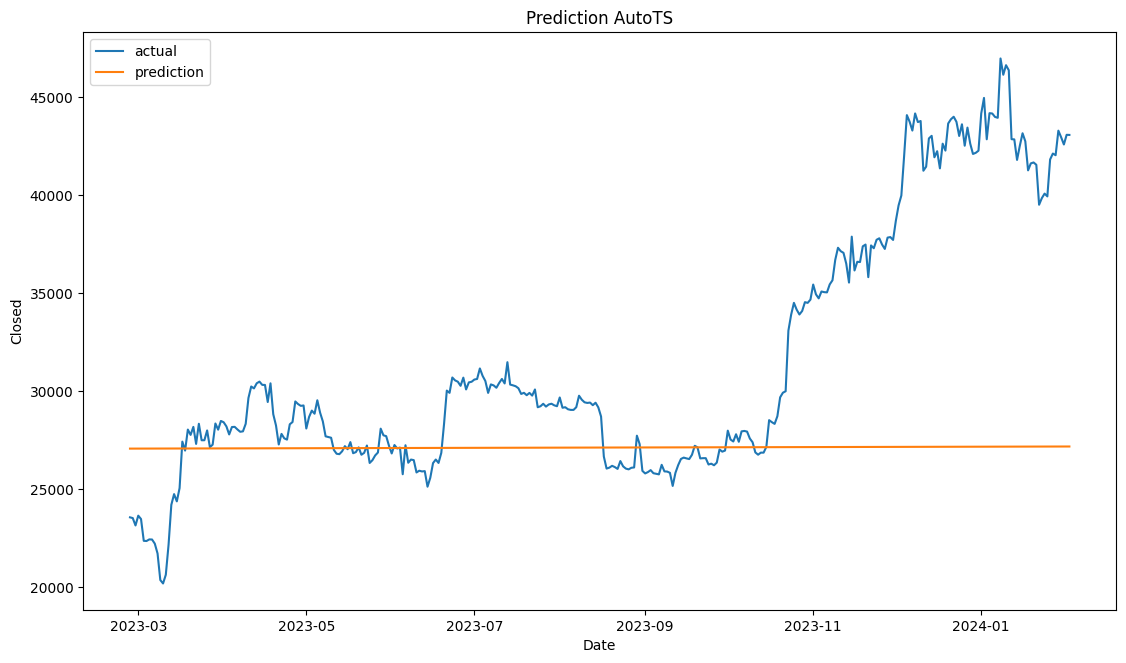

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], prediction.forecast, label="prediction")
ax.set_title("Prediction AutoTS")
ax.set_ylabel("Closed")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

Metrics

In [11]:
max(prediction.forecast[target_column])

27175.048132649477

In [12]:
non_zero = []
import sys
 
for i in prediction.forecast[target_column]:
    if i == 0:
        non_zero.append(i+sys.float_info.min)
    else:
        non_zero.append(i)
print_evaluation_metrics(non_zero, test[target_column])

Evaluation Metrics:
MSE: 58363870.64
RMSE: 7639.63
MAE: 5094.62
MAPE: 13.88
SMAPE: 15.80
